# Project 
Group Members:

*   Yap Mou En - 1191301106
*   Lim Ying Shen - 1191301089
*   Aw Yew Lim - 1171103827

**Link to Heroku: https://data-mining-project-covid19.herokuapp.com/**


In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
path = '/content/drive/Shareddrives/Data Mining/'

In [3]:
# Please install boruata and catboost by running the following code
!pip install boruta
!pip install catboost
!pip install lightgbm
!pip install pmdarima

     |████████████████████████████████| 56 kB 2.4 MB/s 
     |████████████████████████████████| 76.3 MB 20 kB/s 
     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 28.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error, roc_curve, accuracy_score, classification_report, roc_auc_score
from sklearn import metrics
from boruta import BorutaPy
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules
import itertools
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults 
import matplotlib.dates as mdates
import pmdarima as pm
from datetime import date
import datetime
from statsmodels.tsa.stattools import acf
import fbprophet
from sklearn.cluster import KMeans 
import warnings
import pickle
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# 1.0 Exploratory Data Analysis

## 1.1 Cases and Testing


In [5]:
cases_malaysia = pd.read_csv(path + "Datasets/cases_malaysia.csv")
tests_malaysia = pd.read_csv(path + "Datasets/tests_malaysia.csv")
#Missing Value Detection
print(cases_malaysia.isnull().sum(), "\n")
print(tests_malaysia.isnull().sum())

#change to datetime
cases_malaysia['date'] = pd.to_datetime(cases_malaysia['date'])
tests_malaysia['date'] = pd.to_datetime(tests_malaysia['date'])
#handling missing data by filling them with 0
cases_malaysia.fillna(value = 0, inplace = True)

#convert float to int
filter = ['cluster_import','cluster_religious','cluster_community','cluster_highRisk','cluster_education','cluster_detentionCentre','cluster_workplace']
cases_malaysia[filter] = cases_malaysia[filter].astype(int)

date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                1
cases_pvax                   1
cases_fvax                   1
cases_child                  1
cases_adolescent             1
cases_adult                  1
cases_elderly                1
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64 

date      0
rtk-ag    0
pcr       0
dtype: int64


In [6]:
cases_malaysia

date  cases_new  ...  cluster_detentionCentre  cluster_workplace
0   2020-01-25          4  ...                        0                  0
1   2020-01-26          0  ...                        0                  0
2   2020-01-27          0  ...                        0                  0
3   2020-01-28          0  ...                        0                  0
4   2020-01-29          3  ...                        0                  0
..         ...        ...  ...                      ...                ...
635 2021-10-21       6210  ...                        0                193
636 2021-10-22       6630  ...                        0                106
637 2021-10-23       5828  ...                        0                162
638 2021-10-24       5666  ...                        0                 91
639 2021-10-25       4782  ...                        0                 66

[640 rows x 19 columns]

We first used nation level data to visualize the cases and tests done. There are some NaN values in the cluster-related columns in cases_malaysia.csv but we are not going to use them. Therefore, we only pick 'date', 'cases_new' and 'cases_recovered' to do the visualization. We also dropped 'cases_import' because it has been included in cases_new.

For tests_malaysia.csv, we created a new column called 'total_tests' to sum up the total tests(rtk-ag + pcr) done in each day.

Outliers Detection for cases_malaysia.csv

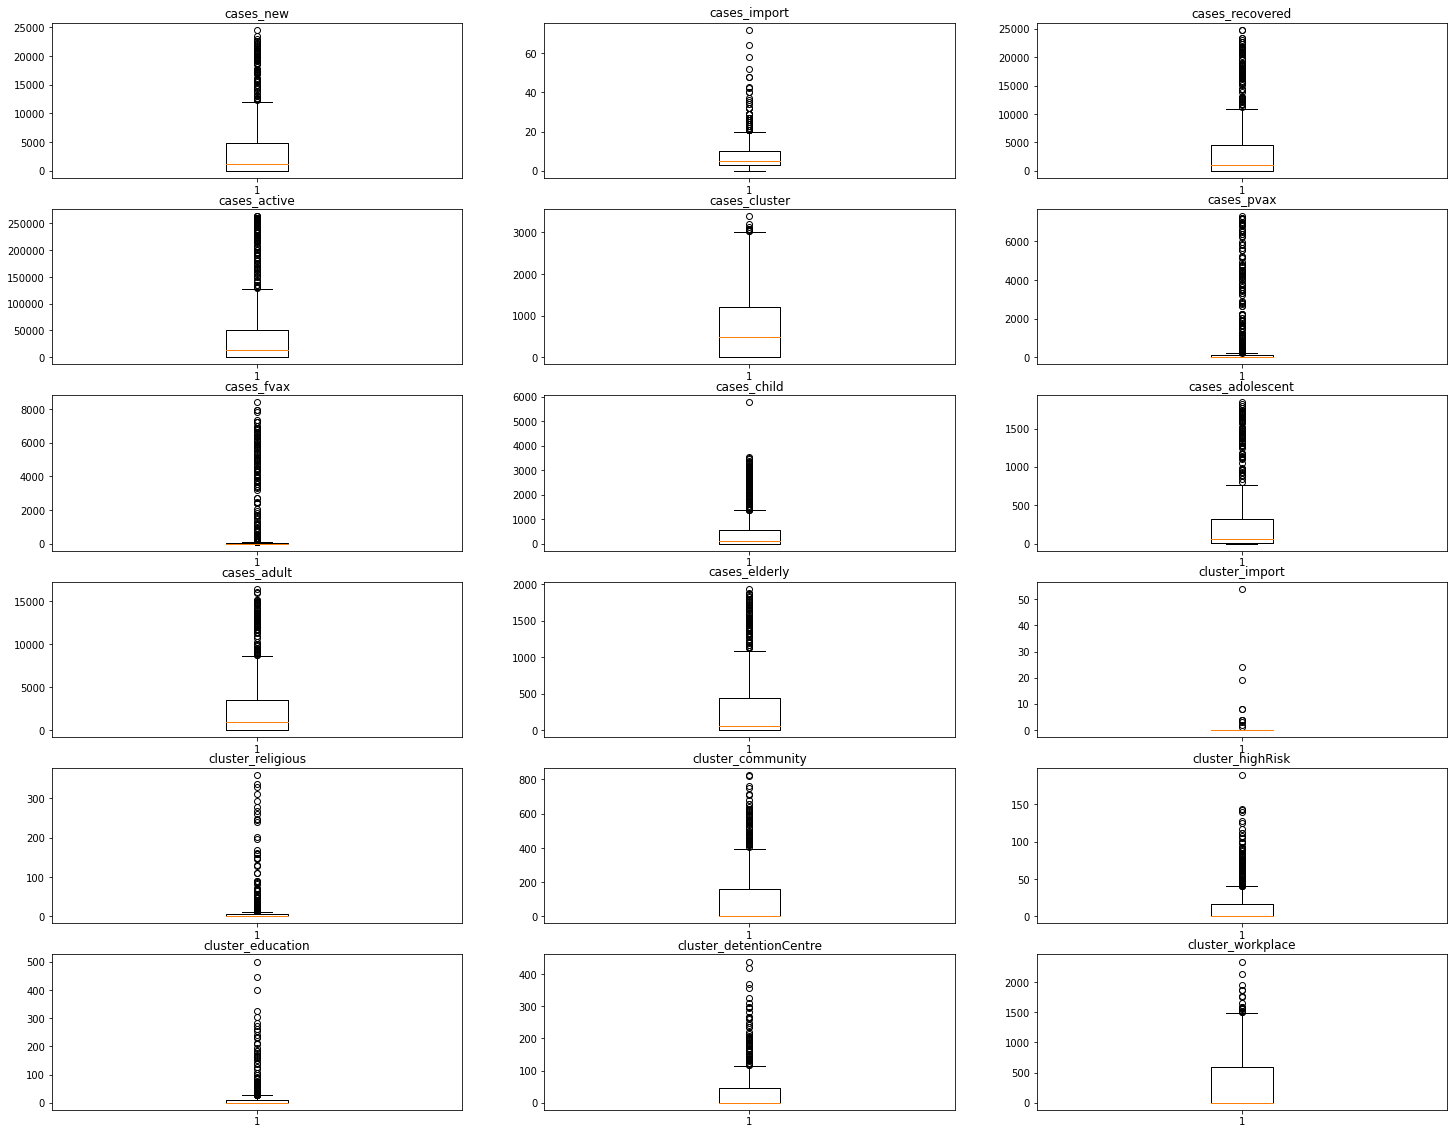

In [7]:
cases_malaysia_boxplot = cases_malaysia.drop(columns=['date'])
plt.figure(figsize=(25,20))
plt.subplot(631),plt.boxplot(cases_malaysia_boxplot.cases_new),plt.title('cases_new')
plt.subplot(632),plt.boxplot(cases_malaysia_boxplot.cases_import),plt.title('cases_import')
plt.subplot(633),plt.boxplot(cases_malaysia_boxplot.cases_recovered),plt.title('cases_recovered')
plt.subplot(634),plt.boxplot(cases_malaysia_boxplot.cases_active),plt.title('cases_active')
plt.subplot(635),plt.boxplot(cases_malaysia_boxplot.cases_cluster),plt.title('cases_cluster')
plt.subplot(636),plt.boxplot(cases_malaysia_boxplot.cases_pvax),plt.title('cases_pvax')
plt.subplot(637),plt.boxplot(cases_malaysia_boxplot.cases_fvax),plt.title('cases_fvax')
plt.subplot(638),plt.boxplot(cases_malaysia_boxplot.cases_child),plt.title('cases_child')
plt.subplot(639),plt.boxplot(cases_malaysia_boxplot.cases_adolescent),plt.title('cases_adolescent')
plt.subplot(6,3,10),plt.boxplot(cases_malaysia_boxplot.cases_adult),plt.title('cases_adult')
plt.subplot(6,3,11),plt.boxplot(cases_malaysia_boxplot.cases_elderly),plt.title('cases_elderly')
plt.subplot(6,3,12),plt.boxplot(cases_malaysia_boxplot.cluster_import),plt.title('cluster_import')
plt.subplot(6,3,13),plt.boxplot(cases_malaysia_boxplot.cluster_religious),plt.title('cluster_religious')
plt.subplot(6,3,14),plt.boxplot(cases_malaysia_boxplot.cluster_community),plt.title('cluster_community')
plt.subplot(6,3,15),plt.boxplot(cases_malaysia_boxplot.cluster_highRisk),plt.title('cluster_highRisk')
plt.subplot(6,3,16),plt.boxplot(cases_malaysia_boxplot.cluster_education),plt.title('cluster_education')
plt.subplot(6,3,17),plt.boxplot(cases_malaysia_boxplot.cluster_detentionCentre),plt.title('cluster_detentionCentre')
plt.subplot(6,3,18),plt.boxplot(cases_malaysia_boxplot.cluster_workplace),plt.title('cluster_workplace')
plt.show()

From the boxplots above, we can observe most of the attributes have a lot of outliers because of the sudden significant increase in the number of positive cases in certain periods. There are only a few outliers in cluster_import as Malaysia has restrictions on entry of foreigners since the outbreak of Covid-19. However, we did not remove these outliers as the nation level data are note used in this project and training model.

Outliers Detection for tests_malaysia.csv

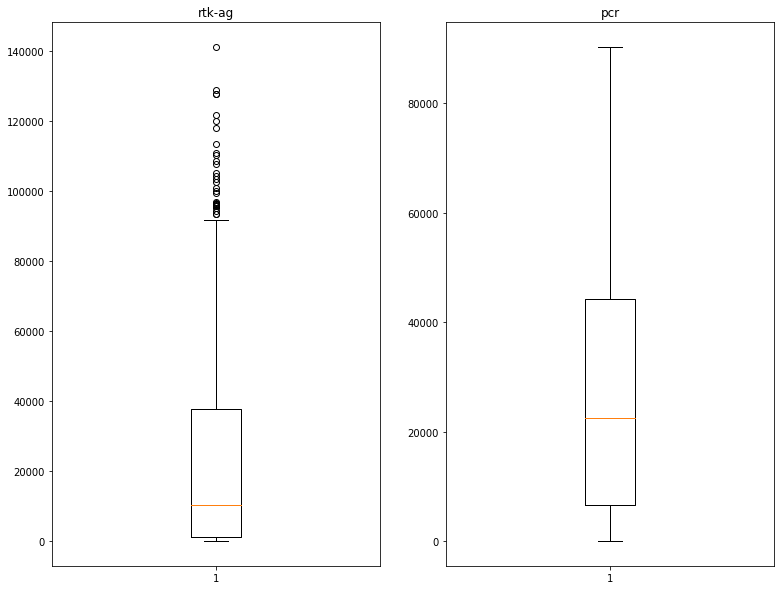

In [8]:
tests_malaysia_boxplot = tests_malaysia.drop(columns=['date'])
plt.figure(figsize=(20,10))
plt.subplot(131),plt.boxplot(tests_malaysia_boxplot['rtk-ag']),plt.title('rtk-ag')
plt.subplot(132),plt.boxplot(tests_malaysia_boxplot.pcr),plt.title('pcr')
plt.show()

From the boxplots above, we can see that there are quite a lot of outliers in rtk-ag while there is no outlier in pcr as pcr has been widely used to test for the positiveness of Covid-19 from the very early stage of this pandemic. However, we did not remove these outliers as the nation level data are not used in this assignment and training model.

In [9]:
new_cases_malaysia = cases_malaysia[['date', 'cases_new', 'cases_recovered']]
tests_malaysia['total_tests'] = tests_malaysia['rtk-ag'] + tests_malaysia['pcr']
df_malaysia = new_cases_malaysia.merge(tests_malaysia, how='left')
df_malaysia['date'] = pd.to_datetime(df_malaysia['date'])
df_malaysia.dropna(inplace=True)

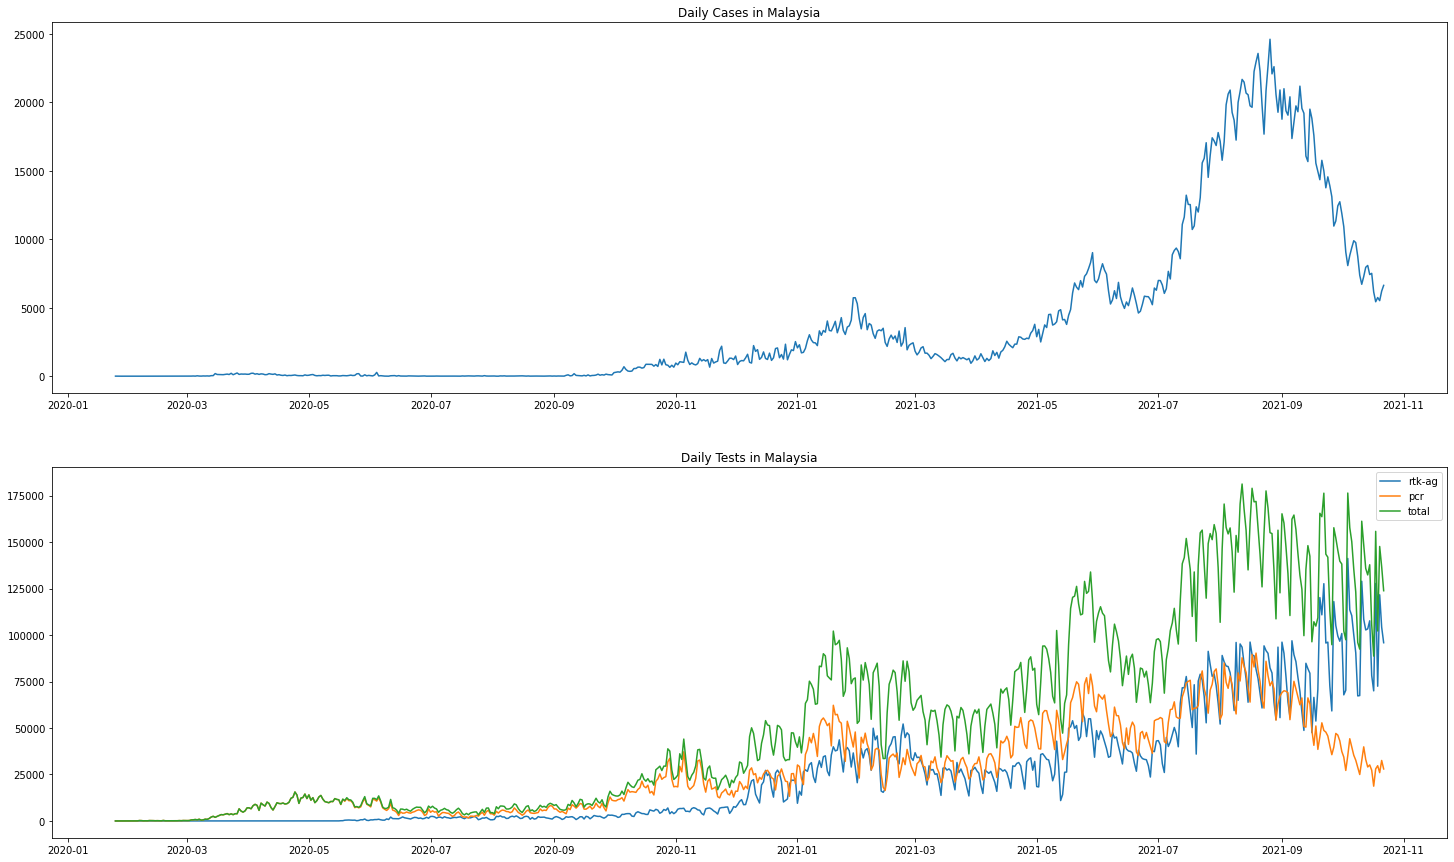

In [10]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(25,15))
ax1.plot(df_malaysia['date'], df_malaysia['cases_new'])
ax1.set_title('Daily Cases in Malaysia')
ax2.plot(df_malaysia['date'], df_malaysia['rtk-ag'], df_malaysia['date'], df_malaysia['pcr'], df_malaysia['date'], df_malaysia['total_tests'])
ax2.set_title('Daily Tests in Malaysia')
ax2.legend(['rtk-ag','pcr','total'],loc="upper right")
plt.show()

From the cases graph above, it is obvious to see that there are three waves of outbreaks occurred during this 21 months. Especially after the second waves, the cases increase significantly in July 2021 and the number of cases breaks through five-digit figure.

From the tests graph above, we can see that pcr test is mostly conducted at the very start of pandemic because the rtk-ag has not been developed yet. Since there are more and more cases arising, rtk-ag is developed to solve the understaffed issue of conducting pcr test.

For state level data, there is a problem in tests_state.csv. It only consists of data from July 2021 onwards. However, we still decided to join the cases_state dataframe and tests_state dataframe by left first to avoid loss of cases data for visualization and training purpose. We will fill the NaN values with 0.

Besides, we also created a new column 'positivity_rate' to see if there is any correlation with other attributes. We also convert the datatype of 'date' for visualizing purpose as well.

We did not drop any attributes here because there will be a feature selection section after this. We therefore tried to keep all the attributes and let the feature selection algorithm choose the top attributes for us.

In [11]:
#Cases and Testing - Aw

cases_state = pd.read_csv(path + "Datasets/cases_state.csv")
tests_state = pd.read_csv(path + "Datasets/tests_state.csv")
print(cases_state.isnull().sum(), "\n")
print(tests_state.isnull().sum(), "\n")

#change to datetime
cases_state['date'] = pd.to_datetime(cases_state['date'])
tests_state['date'] = pd.to_datetime(tests_state['date'])
#handling missing data by filling them with 0
cases_state.fillna(value = 0, inplace = True)
tests_state.fillna(value = 0, inplace = True)

date                 0
state                0
cases_new            0
cases_import         0
cases_recovered      0
cases_active         0
cases_cluster       16
cases_pvax          16
cases_fvax          16
cases_child         16
cases_adolescent    16
cases_adult         16
cases_elderly       16
dtype: int64 

date      0
state     0
rtk-ag    0
pcr       0
dtype: int64 



Outliers Detection for cases_state.csv

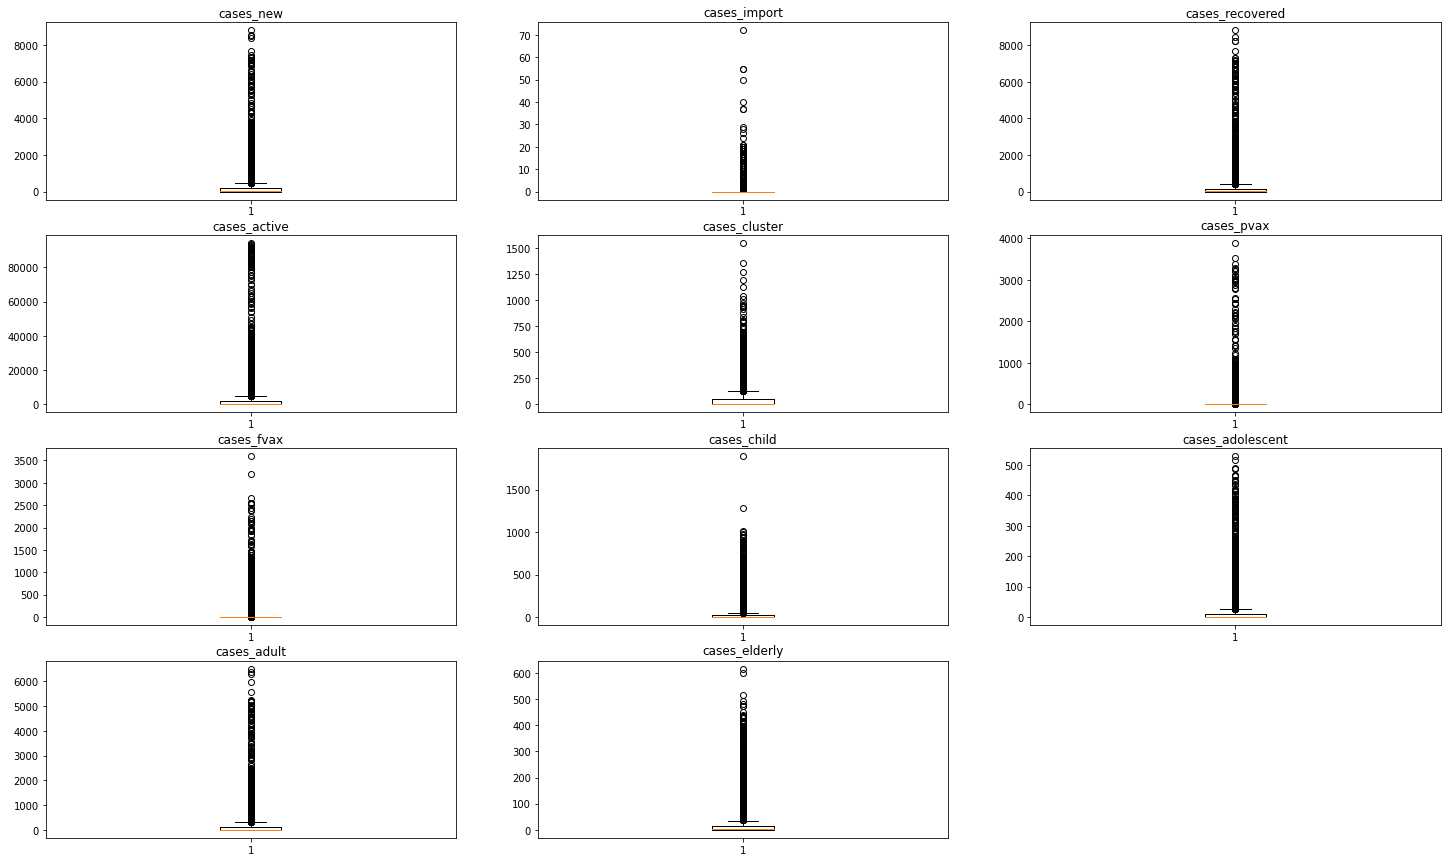

In [12]:
cases_state_boxplot = cases_state.drop(columns=['date','state'])
plt.figure(figsize=(25,15))
plt.subplot(431),plt.boxplot(cases_state_boxplot.cases_new),plt.title('cases_new')
plt.subplot(432),plt.boxplot(cases_state_boxplot.cases_import),plt.title('cases_import')
plt.subplot(433),plt.boxplot(cases_state_boxplot.cases_recovered),plt.title('cases_recovered')
plt.subplot(434),plt.boxplot(cases_state_boxplot.cases_active),plt.title('cases_active')
plt.subplot(435),plt.boxplot(cases_state_boxplot.cases_cluster),plt.title('cases_cluster')
plt.subplot(436),plt.boxplot(cases_state_boxplot.cases_pvax),plt.title('cases_pvax')
plt.subplot(437),plt.boxplot(cases_state_boxplot.cases_fvax),plt.title('cases_fvax')
plt.subplot(438),plt.boxplot(cases_state_boxplot.cases_child),plt.title('cases_child')
plt.subplot(439),plt.boxplot(cases_state_boxplot.cases_adolescent),plt.title('cases_adolescent')
plt.subplot(4,3,10),plt.boxplot(cases_state_boxplot.cases_adult),plt.title('cases_adult')
plt.subplot(4,3,11),plt.boxplot(cases_state_boxplot.cases_elderly),plt.title('cases_elderly')
plt.show()

From the boxplots above, we can observe that there are a lot of outliers in cases_new and cases_recovered while there are fewer outliers in cases_import. It is similar to the reason mentioned in the boxplots of nation level dataset. However, we decided to not remove these outliers as the data are crucial to this assignment and training model.

Outliers Detection for tests_state.csv

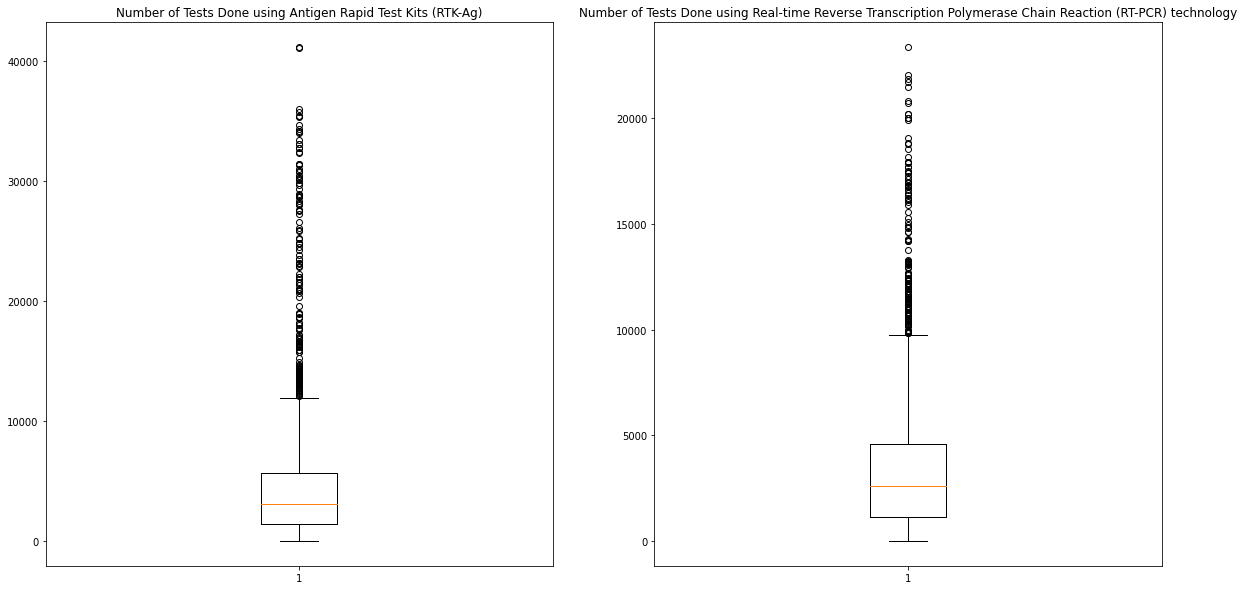

In [13]:
tests_state_boxplot = tests_state.drop(columns=['date','state'])
plt.figure(figsize=(20,10))
plt.subplot(121),plt.boxplot(tests_state_boxplot['rtk-ag']),plt.title('Number of Tests Done using Antigen Rapid Test Kits (RTK-Ag)')
plt.subplot(122),plt.boxplot(tests_state_boxplot.pcr),plt.title('Number of Tests Done using Real-time Reverse Transcription Polymerase Chain Reaction (RT-PCR) technology')
plt.show()

From the boxplots above, we can see that there are quite a lot of outliers in both rtk-ag and pcr. This is because the distribution of the number of tests done in each state is not normal. Some states with more populations will conduct more tests while state with less population like Perlis conducted only a few tests in each month. Therefore, some states with extremely less tests and more tests will be treated as outliers. However, we did not remove these outliers as the nation level data are crucial to this project and training model.

In [14]:
tests_state['total_tests'] = tests_state['rtk-ag'] + tests_state['pcr']
cases_tests_state = cases_state.merge(tests_state, on=['date','state'], how='left')
cases_tests_state['positivity_rate'] = cases_tests_state['cases_new'] / cases_tests_state['total_tests']
#change to datetime
cases_tests_state['date']= pd.to_datetime(cases_tests_state['date'])

# Highest tests by states
#tests_state.groupby(['state']).sum().sort_values(['total_tests'], ascending=False)

#deal with missing data
cases_tests_state.fillna(value = 0, inplace = True)
print(cases_tests_state.isnull().sum())

date                0
state               0
cases_new           0
cases_import        0
cases_recovered     0
cases_active        0
cases_cluster       0
cases_pvax          0
cases_fvax          0
cases_child         0
cases_adolescent    0
cases_adult         0
cases_elderly       0
rtk-ag              0
pcr                 0
total_tests         0
positivity_rate     0
dtype: int64


In [15]:
cases_tests_state
#cases_malaysia.columns

date              state  ...  total_tests  positivity_rate
0     2020-01-25              Johor  ...          0.0              0.0
1     2020-01-25              Kedah  ...          0.0              0.0
2     2020-01-25           Kelantan  ...          0.0              0.0
3     2020-01-25             Melaka  ...          0.0              0.0
4     2020-01-25    Negeri Sembilan  ...          0.0              0.0
...          ...                ...  ...          ...              ...
10235 2021-10-25           Selangor  ...          0.0              0.0
10236 2021-10-25         Terengganu  ...          0.0              0.0
10237 2021-10-25  W.P. Kuala Lumpur  ...          0.0              0.0
10238 2021-10-25        W.P. Labuan  ...          0.0              0.0
10239 2021-10-25     W.P. Putrajaya  ...          0.0              0.0

[10240 rows x 17 columns]

Check correlation between each attribute. Also check every attributes' correlation with 'cases_new' since it is the attribute we want to predict at the end.

In [16]:
cases_tests_state.corr()
#cases_new,cases_recovered,rtk-ag,pcr

cases_new  cases_import  ...  total_tests  positivity_rate
cases_new          1.000000      0.213665  ...     0.807557         0.608164
cases_import       0.213665      1.000000  ...     0.225879         0.062387
cases_recovered    0.885637      0.190602  ...     0.752406         0.578071
cases_active       0.962081      0.219881  ...     0.817756         0.575363
cases_cluster      0.639416      0.147107  ...     0.438257         0.340243
cases_pvax         0.850204      0.180093  ...     0.728914         0.506023
cases_fvax         0.629971      0.101495  ...     0.610940         0.591465
cases_child        0.952379      0.174474  ...     0.800761         0.689647
cases_adolescent   0.930061      0.151612  ...     0.762251         0.688041
cases_adult        0.995270      0.223206  ...     0.801564         0.573615
cases_elderly      0.936788      0.187747  ...     0.749178         0.669942
rtk-ag             0.745535      0.216693  ...     0.971564         0.466480
pcr                0.812941      0.215008  ...     0.933331         0.583194
total_tests        0.807557      0.225879  ...     1.000000         0.536261
positivity_rate    0.608164      0.062387  ...     0.536261         1.000000

[15 rows x 15 columns]

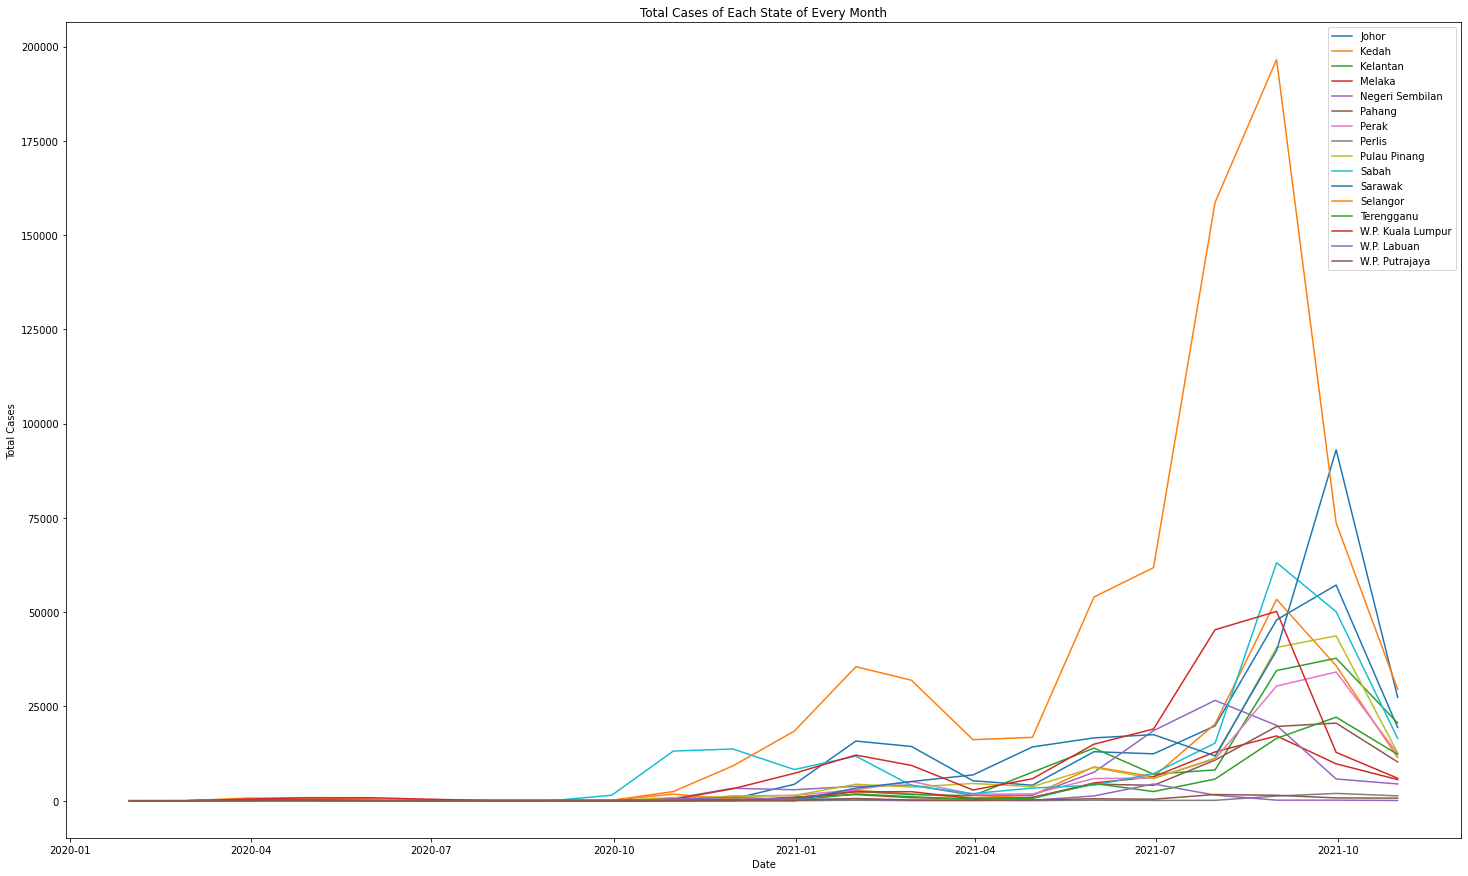

In [17]:
plt.figure(figsize=(25,15))
for state in pd.unique(cases_tests_state['state']):
    data = cases_tests_state[cases_tests_state['state'] == state]
    cases = data.groupby([pd.Grouper(key='date', axis=0, freq='M')]).agg('sum')
    plt.plot(cases.index.values, cases['cases_new'], label = state)

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total Cases of Each State of Every Month')
plt.legend()
plt.show()

From the graph above, it is obvious to see that Selangor has the highest number of cases since December 2020. This might be related to the population as Selangor has the highest population in Malaysia. Before the outbreak in Selangor, the number of cases in Sabah is the highest.

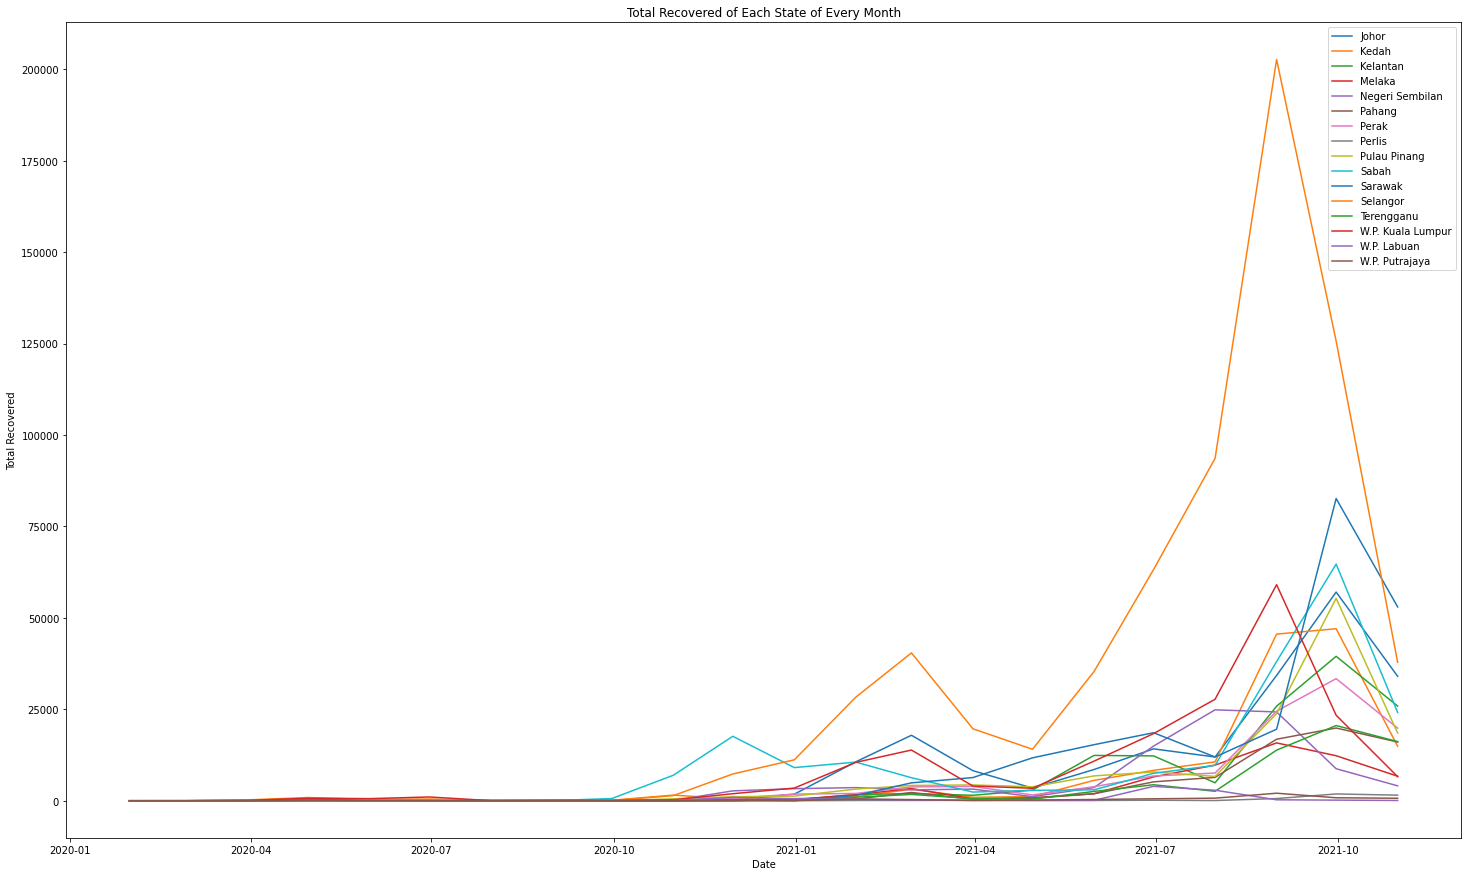

In [18]:
plt.figure(figsize=(25,15))
for state in pd.unique(cases_tests_state['state']):
    data = cases_tests_state[cases_tests_state['state'] == state]
    recover = data.groupby([pd.Grouper(key='date', axis=0, freq='M')]).agg('sum')
    plt.plot(recover.index.values, recover['cases_recovered'], label = state)

plt.xlabel('Date')
plt.ylabel('Total Recovered')
plt.title('Total Recovered of Each State of Every Month')
plt.legend()
plt.show()

From the graph above, it is also obvious to see that Selangor has the highest number of recovered cases in overall because Selangor has the highest cases. With the same reason, Perlis has the lowest recovered cases because they have the lowest new cases every month.

Due to the missing data from the start of this Covid-19 pandemic until July 2021, we temporarily drop all the NaN values to visualize only the available data regarding to the number of tests conducted every day. However, we visualize the data by weekly due to lack of data. 

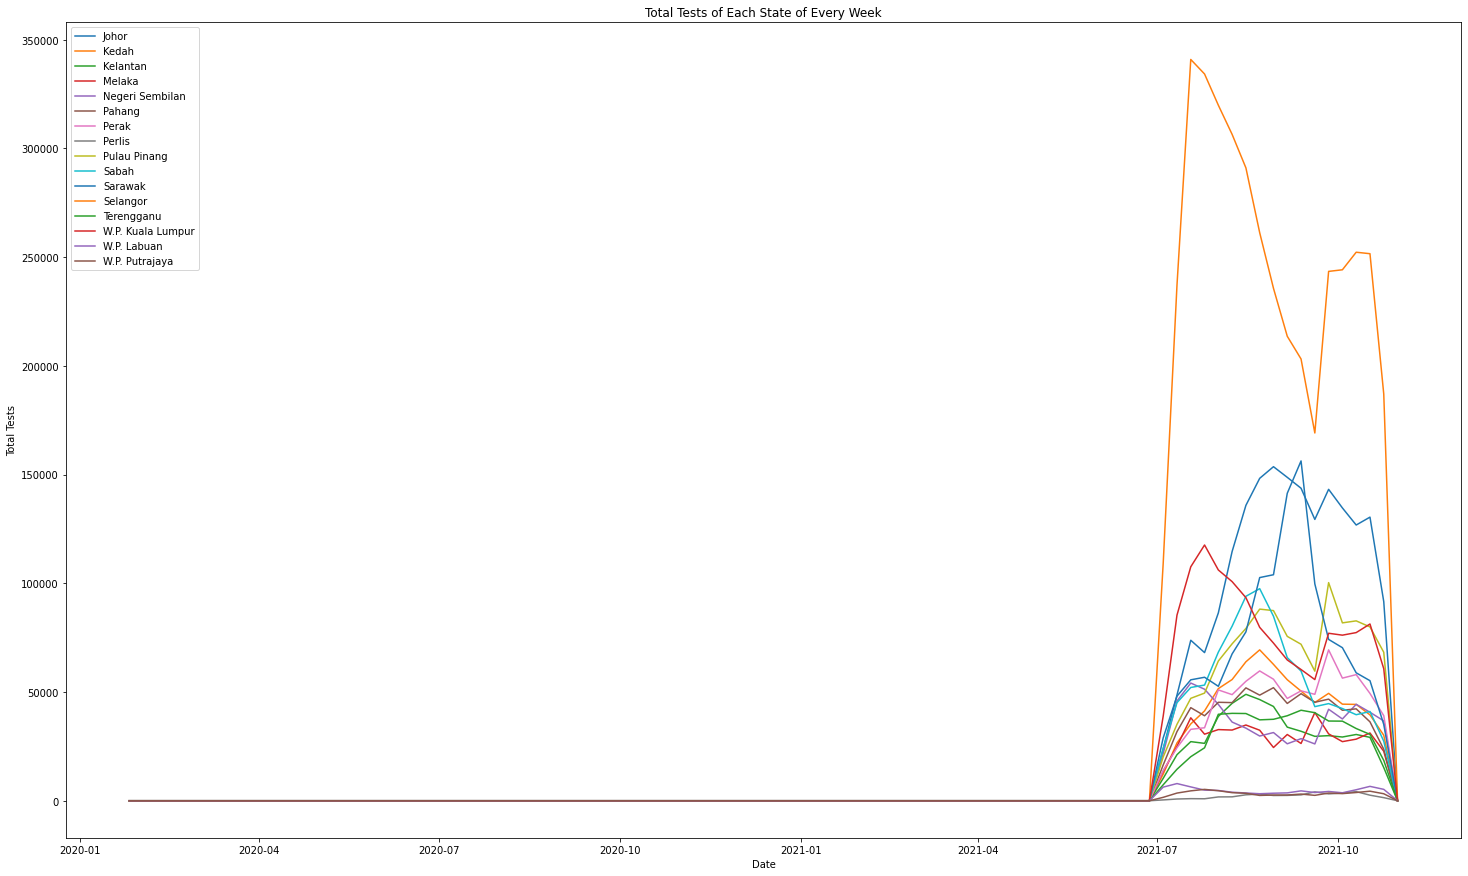

In [19]:
plt.figure(figsize=(25,15))
for state in pd.unique(cases_tests_state['state']):
    data = cases_tests_state[cases_tests_state['state'] == state].dropna()
    tests = data.groupby([pd.Grouper(key='date', axis=0, freq='W')]).agg('sum')
    plt.plot(tests.index.values, tests['total_tests'], label = state)

plt.xlabel('Date')
plt.ylabel('Total Tests')
plt.title('Total Tests of Each State of Every Week')
plt.legend()
plt.show()

From the graph above, we can see that Selangor has conducted more tests compared to other states. This is because the new cases of Selangor is high and the number of medical centres in Selangor is higher than other states.

We also visualize the number of rtk-ag and pcr tests conducted in each state.

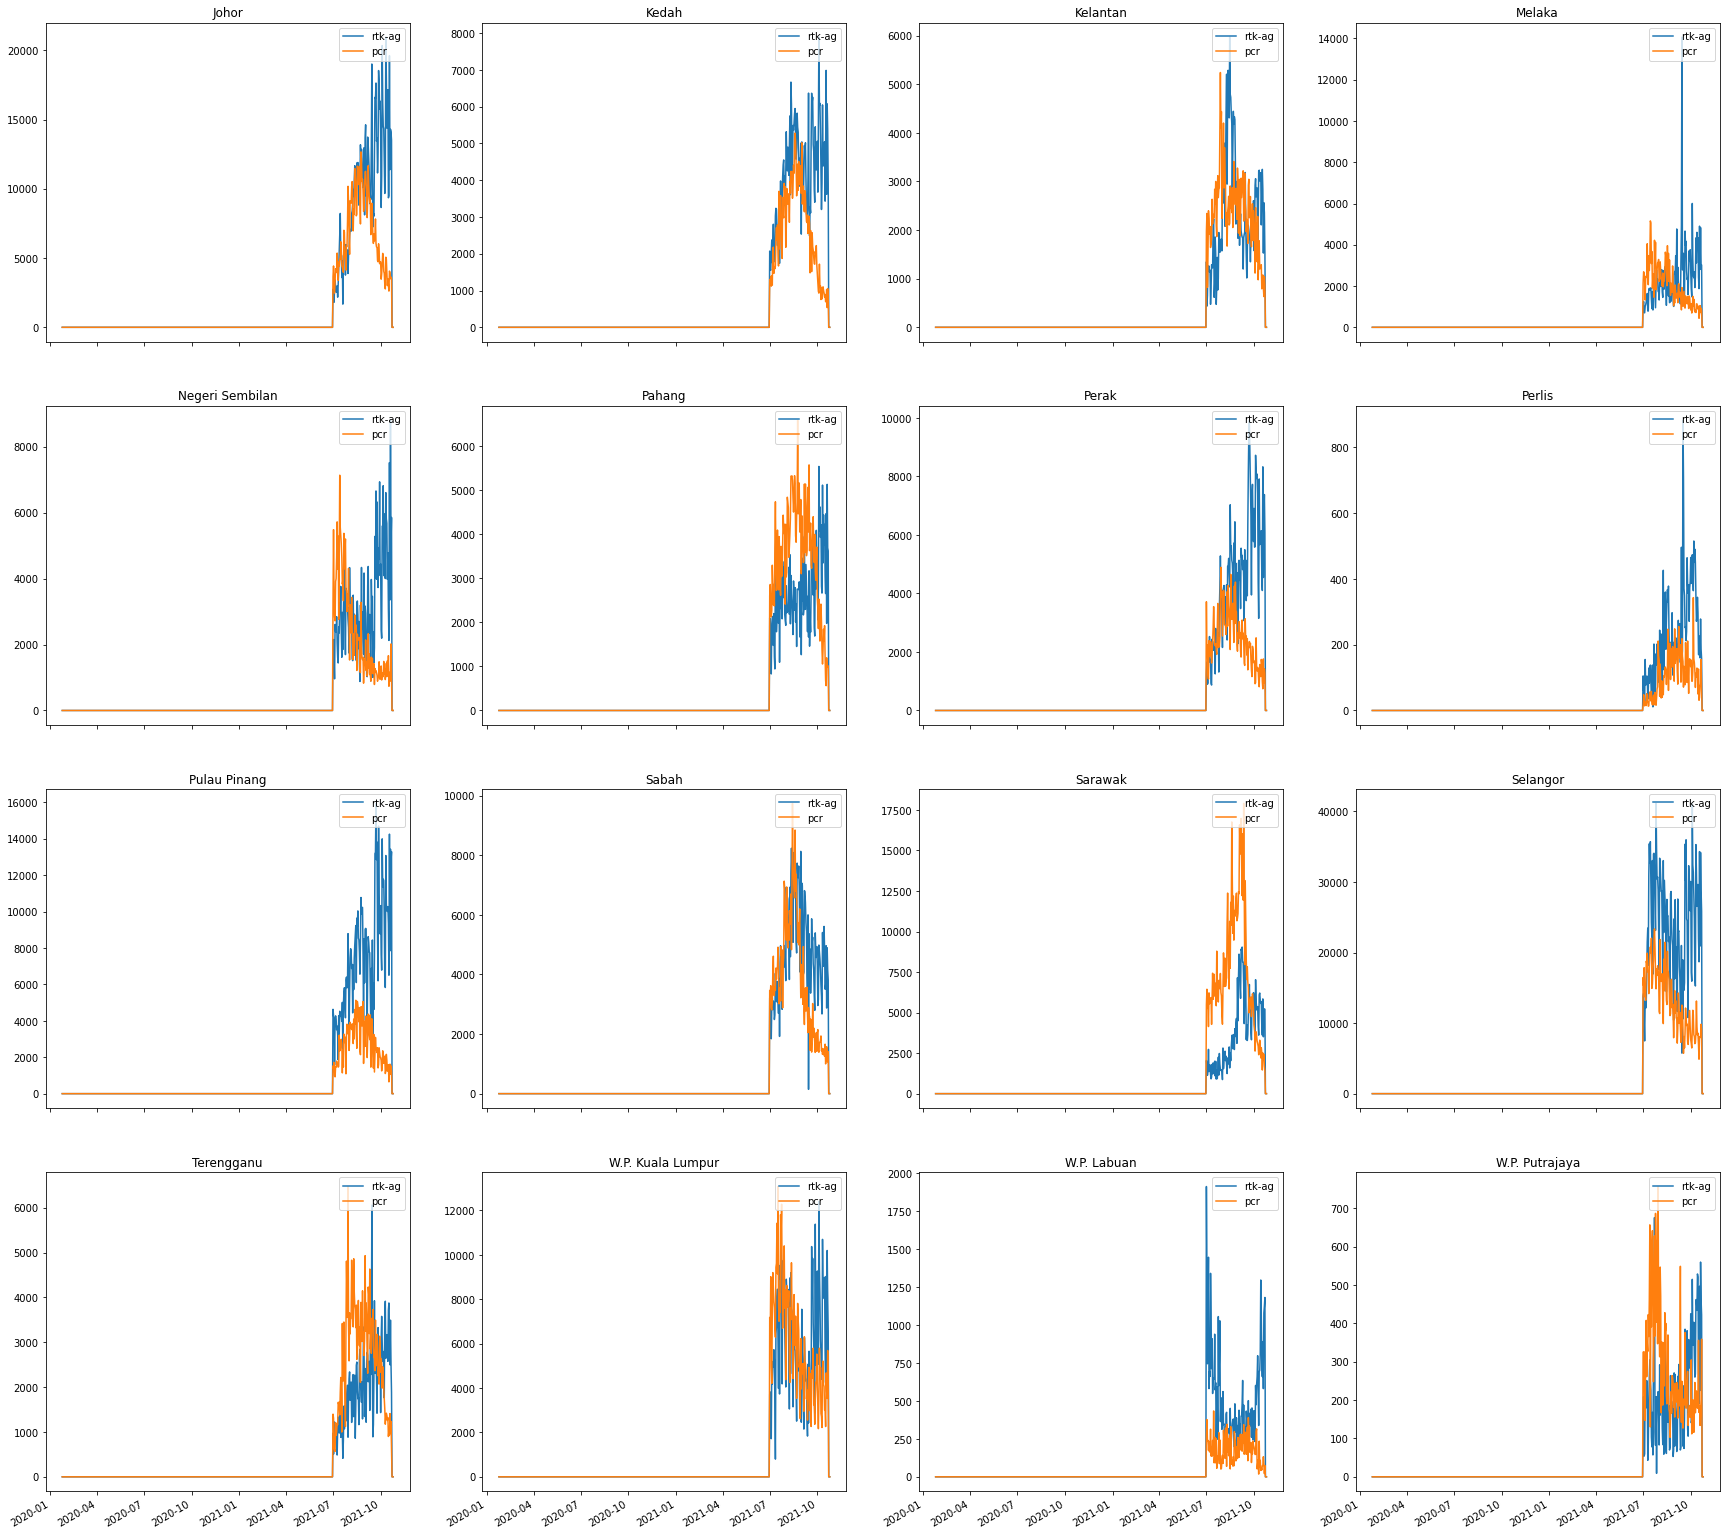

In [20]:
fig, ax = plt.subplots(4, 4, figsize=(30,30))
for i, state in enumerate(pd.unique(cases_tests_state['state'])):
    df_state = cases_tests_state[cases_tests_state['state'] == state]
    ax[i//4][i%4].plot(df_state['date'], df_state['rtk-ag'], df_state['date'], df_state['pcr'])
    ax[i//4][i%4].set_title(state)
    ax[i//4][i%4].legend(['rtk-ag', 'pcr'], loc="upper right")
    fig.autofmt_xdate()

plt.show()

The graphs above are the number of rtk-ag and pcr conducted every month. Overall, we can observe that Sarawak and Pahang has conducted more pcr tests than rtk-ag while Pulau Pinang and W.P. Labuan conducted more rtk-ag than pcr tests.

We only drop the rows of data with NaN value after visualizing the data because dropping the NaN values will remove all the data before 07/2021 due to the missing value in column 'rtk-ag' and 'pcr'.

In [21]:
cases_tests_state.dropna(inplace=True)
cases_tests_state

date              state  ...  total_tests  positivity_rate
0     2020-01-25              Johor  ...          0.0              0.0
1     2020-01-25              Kedah  ...          0.0              0.0
2     2020-01-25           Kelantan  ...          0.0              0.0
3     2020-01-25             Melaka  ...          0.0              0.0
4     2020-01-25    Negeri Sembilan  ...          0.0              0.0
...          ...                ...  ...          ...              ...
10235 2021-10-25           Selangor  ...          0.0              0.0
10236 2021-10-25         Terengganu  ...          0.0              0.0
10237 2021-10-25  W.P. Kuala Lumpur  ...          0.0              0.0
10238 2021-10-25        W.P. Labuan  ...          0.0              0.0
10239 2021-10-25     W.P. Putrajaya  ...          0.0              0.0

[10240 rows x 17 columns]



## 1.2 Deaths



In [22]:
#Death

raw_death_state = pd.read_csv(path + "Datasets/deaths_state.csv")
raw_death_my = pd.read_csv(path + "Datasets/deaths_malaysia.csv")

month = {'2020-03-31 00:00:00':'March', '2020-04-30 00:00:00':'April','2020-05-31 00:00:00':'May','2020-06-30 00:00:00':'June','2020-07-31 00:00:00':'July','2020-08-31 00:00:00':'August','2020-09-30 00:00:00':'September','2020-10-31 00:00:00':'October','2020-11-30 00:00:00':'November','2020-12-31 00:00:00':'December',
         '2021-01-31 00:00:00':'January','2021-02-28 00:00:00':'February','2021-03-31 00:00:00':'March','2021-04-30 00:00:00':'April','2021-05-31 00:00:00':'May','2021-06-30 00:00:00':'June','2021-07-31 00:00:00':'July','2021-08-31 00:00:00':'August','2021-09-30 00:00:00':'September',}

m_state = {'Johor','Kedah','Kelantan','Melaka','Negeri Sembilan','Pahang','Pulau Pinang','Perak','Perlis','Selangor','Terengganu','Sabah','Sarawak','W.P. Kuala Lumpur','W.P. Labuan','W.P. Putrajaya'}
#Missing Value Detection
print(raw_death_state.isna().sum())
raw_death_state['date']= pd.to_datetime(raw_death_state['date'])
final_death = raw_death_state.copy()

group_death = final_death.groupby([pd.Grouper(key='date', axis=0, freq='M'),"state"]).agg('sum')
death_state = final_death.groupby(['state']).sum()
death_month = final_death.groupby(pd.Grouper(key='date', axis=0, freq='M')).sum()
maxMonth = str(death_month['deaths_new'].idxmax())
display(group_death)

date              0
state             0
deaths_new        0
deaths_bid        0
deaths_new_dod    0
deaths_bid_dod    0
deaths_pvax       0
deaths_fvax       0
deaths_tat        0
dtype: int64


deaths_new  deaths_bid  ...  deaths_fvax  deaths_tat
date       state                                      ...                         
2020-03-31 Johor                      12           0  ...            0           0
           Kedah                       1           0  ...            0           0
           Kelantan                    2           0  ...            0           0
           Melaka                      2           0  ...            0           0
           Negeri Sembilan             2           0  ...            0           0
...                                  ...         ...  ...          ...         ...
2021-10-31 Selangor                  215          58  ...           76         156
           Terengganu                 60           7  ...           16          57
           W.P. Kuala Lumpur          55          15  ...           19          98
           W.P. Labuan                 1           0  ...            0           2
           W.P. Putrajaya              1           0  ...            1           4

[320 rows x 7 columns]

In [23]:
print(raw_death_my.isna().sum())
raw_death_my['date']= pd.to_datetime(raw_death_my['date'])
final_death_my = raw_death_my.copy()

date              0
deaths_new        0
deaths_bid        0
deaths_new_dod    0
deaths_bid_dod    0
deaths_pvax       0
deaths_fvax       0
deaths_tat        0
dtype: int64


We decided to use deaths_state.csv as our death dataset because it contains the state info compared to deaths_malaysia.csv. We found out that there are no NaN values in the dataframe. Then, we group the dataframe by time and state for further exploration

Outliers Detection for death_state.csv

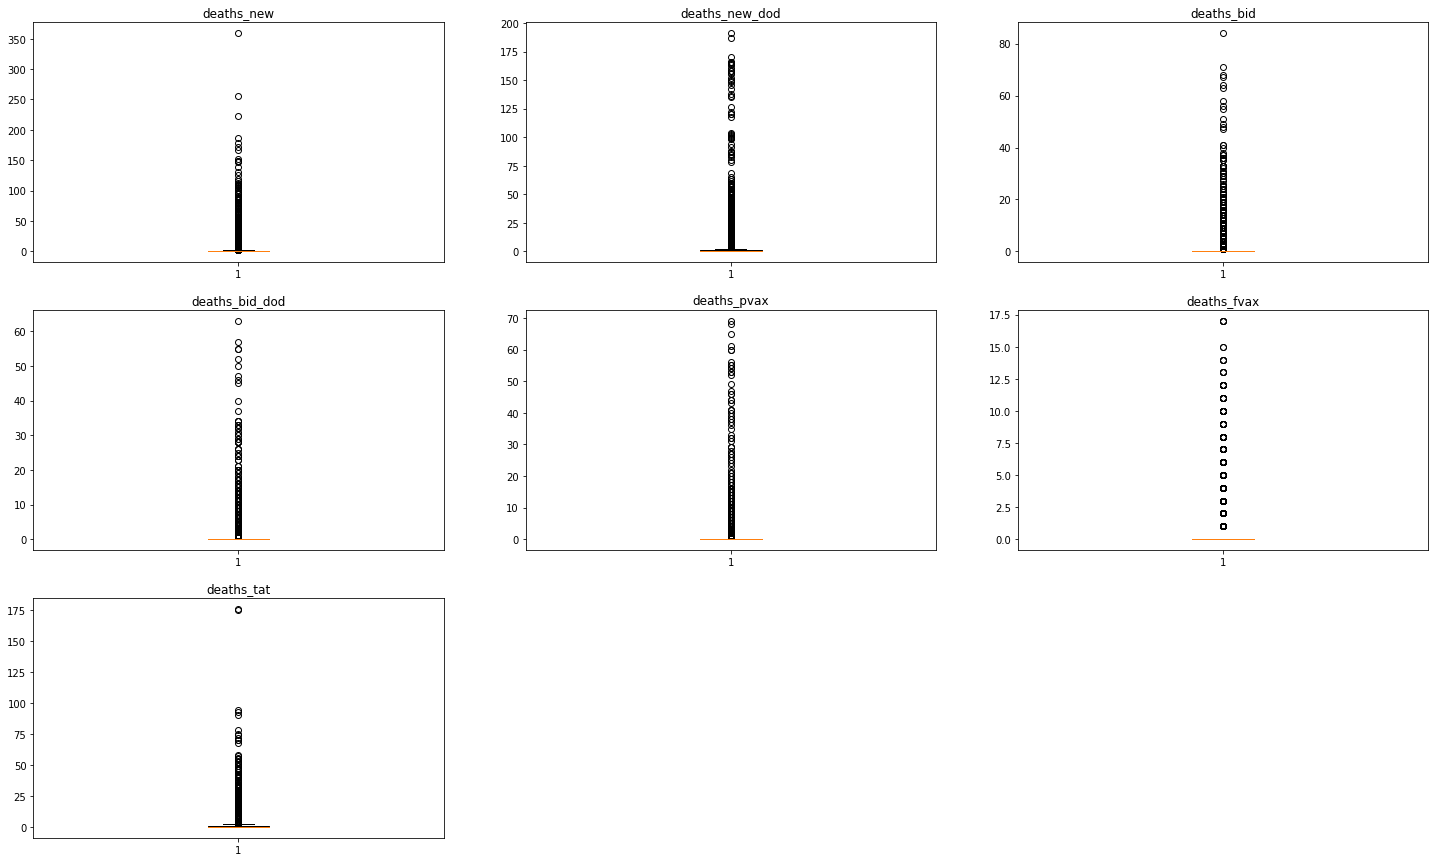

In [24]:
raw_death_boxplot = raw_death_state.drop(columns=['date','state'])
plt.figure(figsize=(25,15))
plt.subplot(331),plt.boxplot(raw_death_boxplot.deaths_new),plt.title('deaths_new')
plt.subplot(332),plt.boxplot(raw_death_boxplot.deaths_new_dod),plt.title('deaths_new_dod')
plt.subplot(333),plt.boxplot(raw_death_boxplot.deaths_bid),plt.title('deaths_bid')
plt.subplot(334),plt.boxplot(raw_death_boxplot.deaths_bid_dod),plt.title('deaths_bid_dod')
plt.subplot(335),plt.boxplot(raw_death_boxplot.deaths_pvax),plt.title('deaths_pvax')
plt.subplot(336),plt.boxplot(raw_death_boxplot.deaths_fvax),plt.title('deaths_fvax')
plt.subplot(337),plt.boxplot(raw_death_boxplot.deaths_tat),plt.title('deaths_tat')
plt.show()

Outliers Detection for death_malaysia.csv

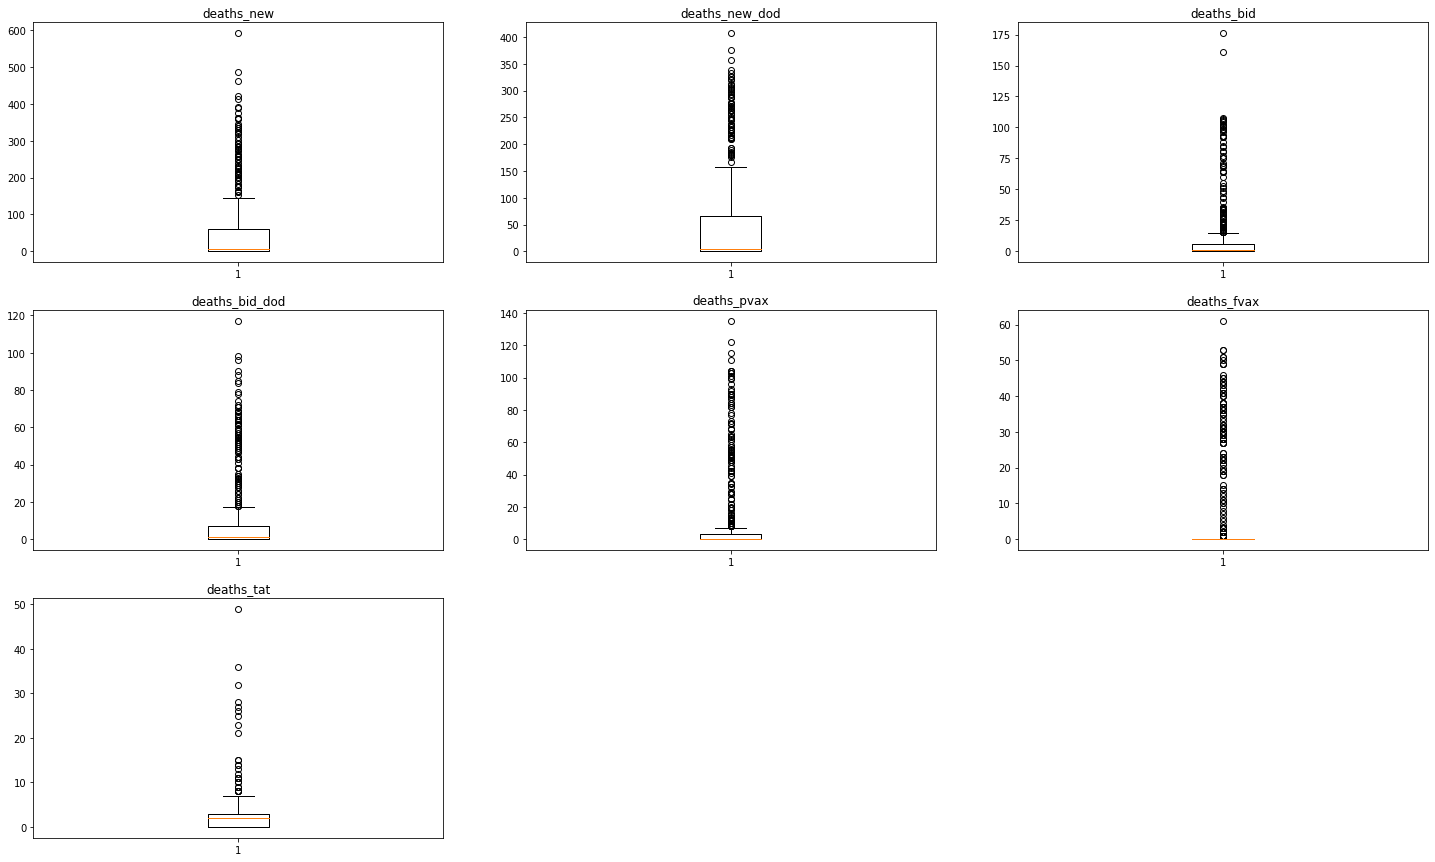

In [25]:
raw_death_boxplot_my = raw_death_my.drop(columns=['date'])
plt.figure(figsize=(25,15))
plt.subplot(331),plt.boxplot(raw_death_boxplot_my.deaths_new),plt.title('deaths_new')
plt.subplot(332),plt.boxplot(raw_death_boxplot_my.deaths_new_dod),plt.title('deaths_new_dod')
plt.subplot(333),plt.boxplot(raw_death_boxplot_my.deaths_bid),plt.title('deaths_bid')
plt.subplot(334),plt.boxplot(raw_death_boxplot_my.deaths_bid_dod),plt.title('deaths_bid_dod')
plt.subplot(335),plt.boxplot(raw_death_boxplot_my.deaths_pvax),plt.title('deaths_pvax')
plt.subplot(336),plt.boxplot(raw_death_boxplot_my.deaths_fvax),plt.title('deaths_fvax')
plt.subplot(337),plt.boxplot(raw_death_boxplot_my.deaths_tat),plt.title('deaths_tat')
plt.show()

From the boxplots, above, we can see that deaths_new, deaths_new_dod, deaths_bid and deaths_bid_dod contain many outliers. This is due to the fact that at the early stage of COVID-19 has very less death occurs. The death surge after several waves of COVID-19 attacked Malaysia. We decided to not remove the outliers as they are very crucial to the assignment and training model.

In [26]:
print("The mean death of Malaysia if divided by state is " + str(death_state['deaths_new'].mean()))
print("The state with the most death is " + str(death_state['deaths_new'].idxmax()) + ' at ' + str(death_state['deaths_new'].max()))
print("The month with the most death is " + month[maxMonth] + ' at ' + str(death_month['deaths_new'].max()))

The mean death of Malaysia if divided by state is 1780.75
The state with the most death is Selangor at 9572
The month with the most death is September at 9671


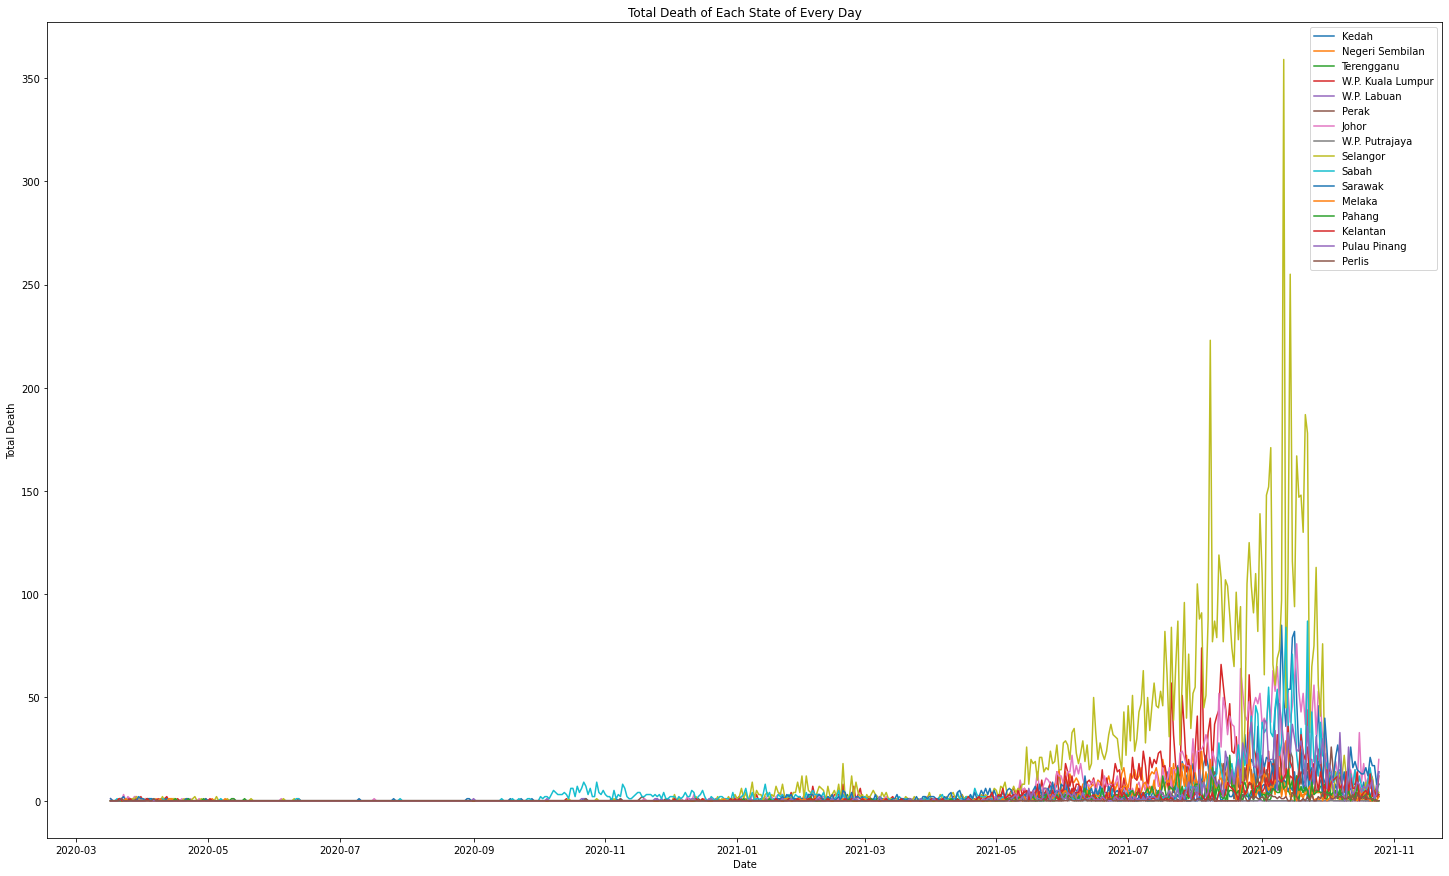

In [27]:
plt.figure(figsize=(25,15))
for i in m_state:
  x = final_death[final_death['state'] == i]
  #s_death = x.groupby([pd.Grouper(key='date', axis=0, freq='M')]).agg('sum')
  plt.plot(x['date'], x['deaths_new'], label = i)

plt.xlabel('Date')
plt.ylabel('Total Death')
plt.title('Total Death of Each State of Every Day')
plt.legend()
plt.show()

The graph above shows the total death of every state in Malaysia every day. We can see that Selangor has the highest amount of total death among other states. We also noticed that the total death surged for every state after May 2021. This may be due to the delta virus that attacks Malaysia around this period.

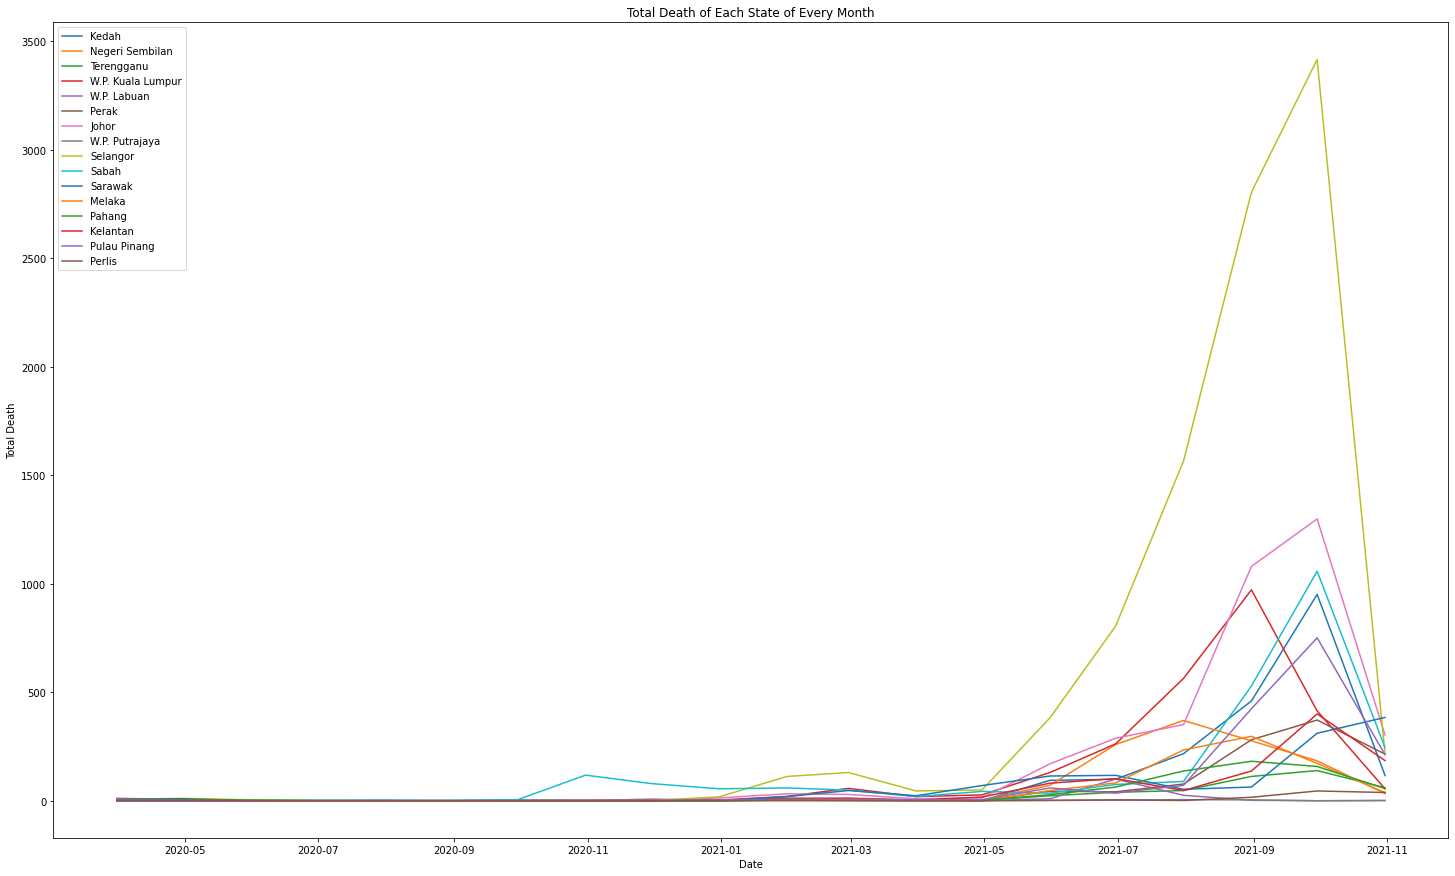

In [28]:
plt.figure(figsize=(25,15))
for i in m_state:
  x = final_death[final_death['state'] == i]
  s_death = x.groupby([pd.Grouper(key='date', axis=0, freq='M')]).agg('sum')
  plt.plot(s_death.index.values, s_death['deaths_new'], label = i)

plt.xlabel('Date')
plt.ylabel('Total Death')
plt.title('Total Death of Each State of Every Month')
plt.legend()
plt.show()

The graph above shows the total death of every state in Malaysia for every month. We can see that Selangor topped the graph with a huge difference compared to other states. 

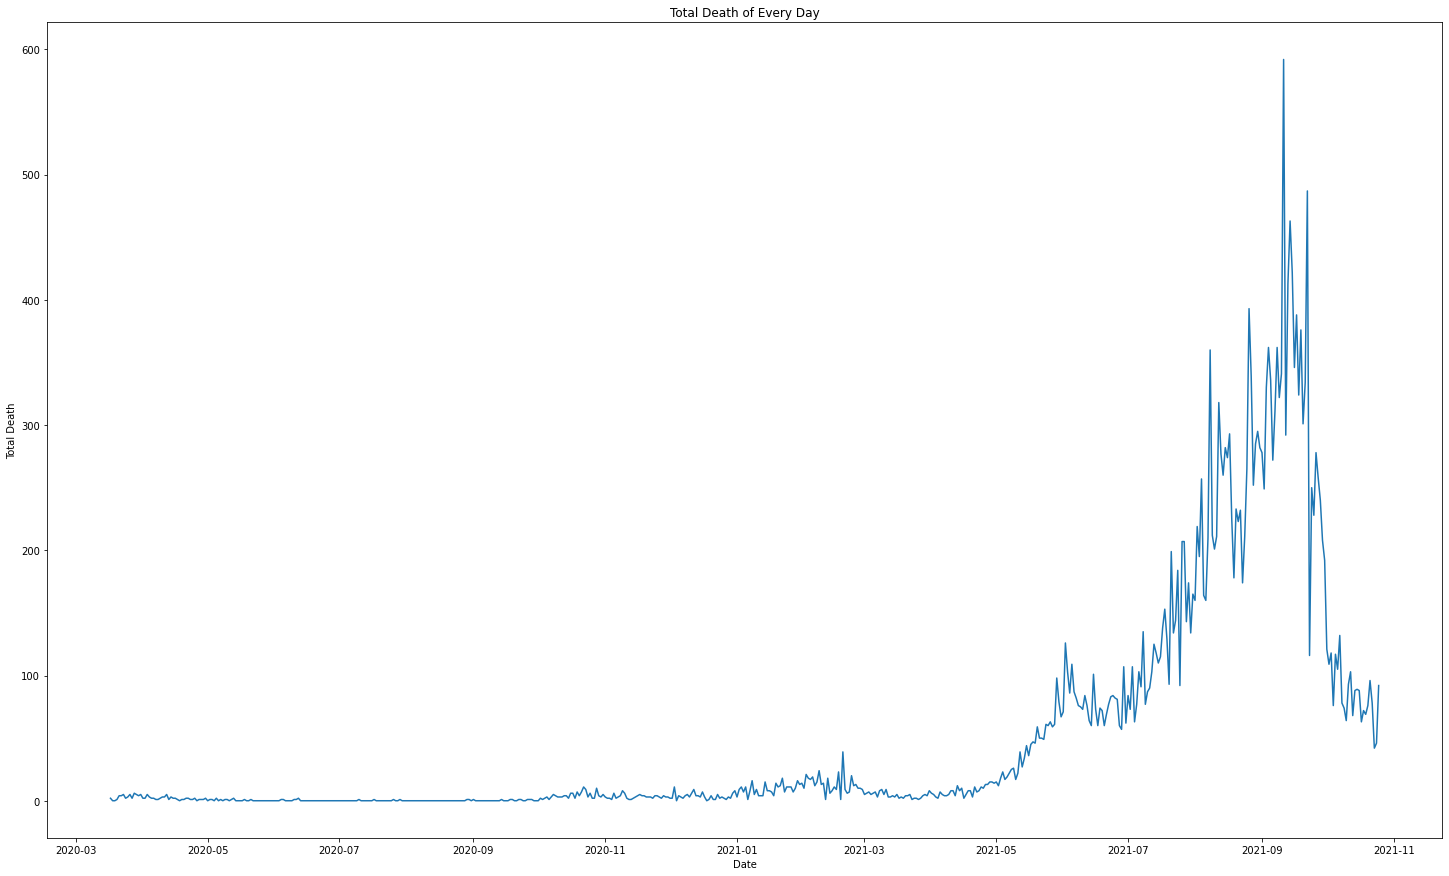

In [29]:
plt.figure(figsize=(25,15))
plt.plot(final_death_my['date'], final_death_my['deaths_new'])
plt.xlabel('Date')
plt.ylabel('Total Death')
plt.title('Total Death of Every Day')
plt.show()

In [30]:
print("The mean death of Malaysia is " + str(final_death_my['deaths_new'].mean()))
final_death_my.iloc[final_death_my['deaths_new'].idxmax()].date
print("The day with the most death is " + str(final_death_my.iloc[final_death_my['deaths_new'].idxmax()].date) + ' at ' + str(final_death_my.iloc[final_death_my['deaths_new'].idxmax()].deaths_new))


The mean death of Malaysia is 48.45578231292517
The day with the most death is 2021-09-11 00:00:00 at 592


The graph above shows the total death since the outbreak of COVID-19 in Malaysia. From the graph above, the total death surge around July 2021 and come to a peak around September 2021. This may cause by the attack of delta virus and lack of vaccination.

## 1.3 Population Data


In [31]:
#population.csv
pop_ori = pd.read_csv(path + 'Datasets/population.csv')
print(pop_ori.isna().sum())
pop = pop_ori.drop(0).copy()
mean = pop["pop"].mean()
mean18 = pop['pop_18'].mean()
mean60 = pop['pop_60'].mean()
print("The mean population of Malaysia is " + str(mean))
print("The mean population of above 18 years old in Malaysia is " + str(mean18))
print("The mean population of above 60 years old in Malaysia is " + str(mean60))

state     0
idxs      0
pop       0
pop_18    0
pop_60    0
dtype: int64
The mean population of Malaysia is 2041087.5
The mean population of above 18 years old in Malaysia is 1463100.0
The mean population of above 60 years old in Malaysia is 218875.0


This dataset tells us about the population of Malaysia. We found out that the dataset does not contain any NaN value. We dropped the first row because it is the population of Malaysia as we only focus on the states.

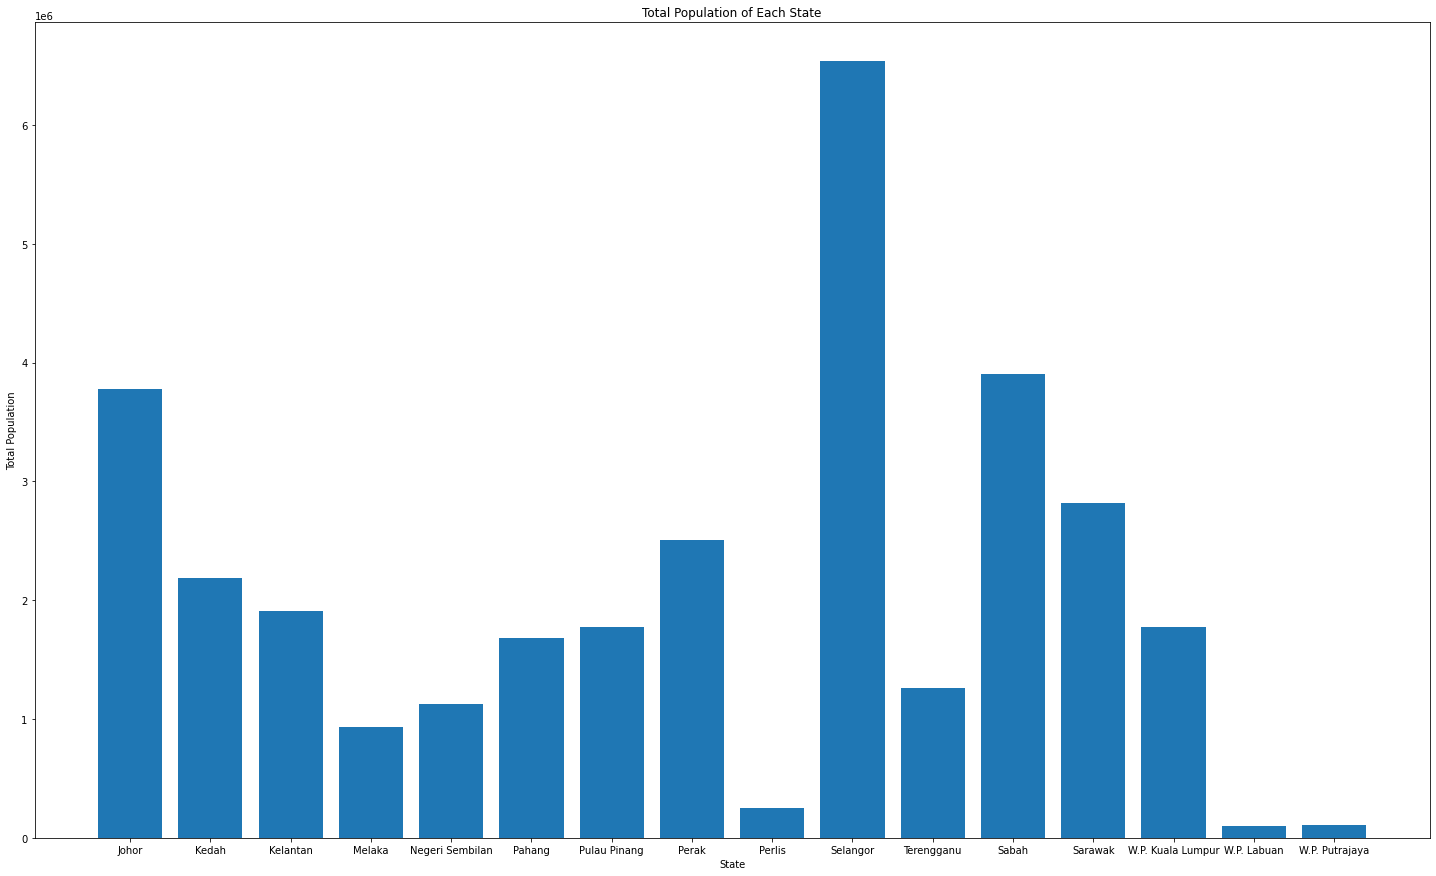

In [32]:
plt.figure(figsize=(25,15))
plt.bar(pop['state'],pop['pop'])
plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Total Population of Each State')
plt.show()

The graph shows the total population of every state in Malaysia. Selangor comes into first place due to it is the main economic center in Malaysia. Johor and Sabah are very similar in terms of the total population. W.P. Labuan and W.P. Putrajaya have the least total population. This is mainly restricted by its land size and proximity to another large state.

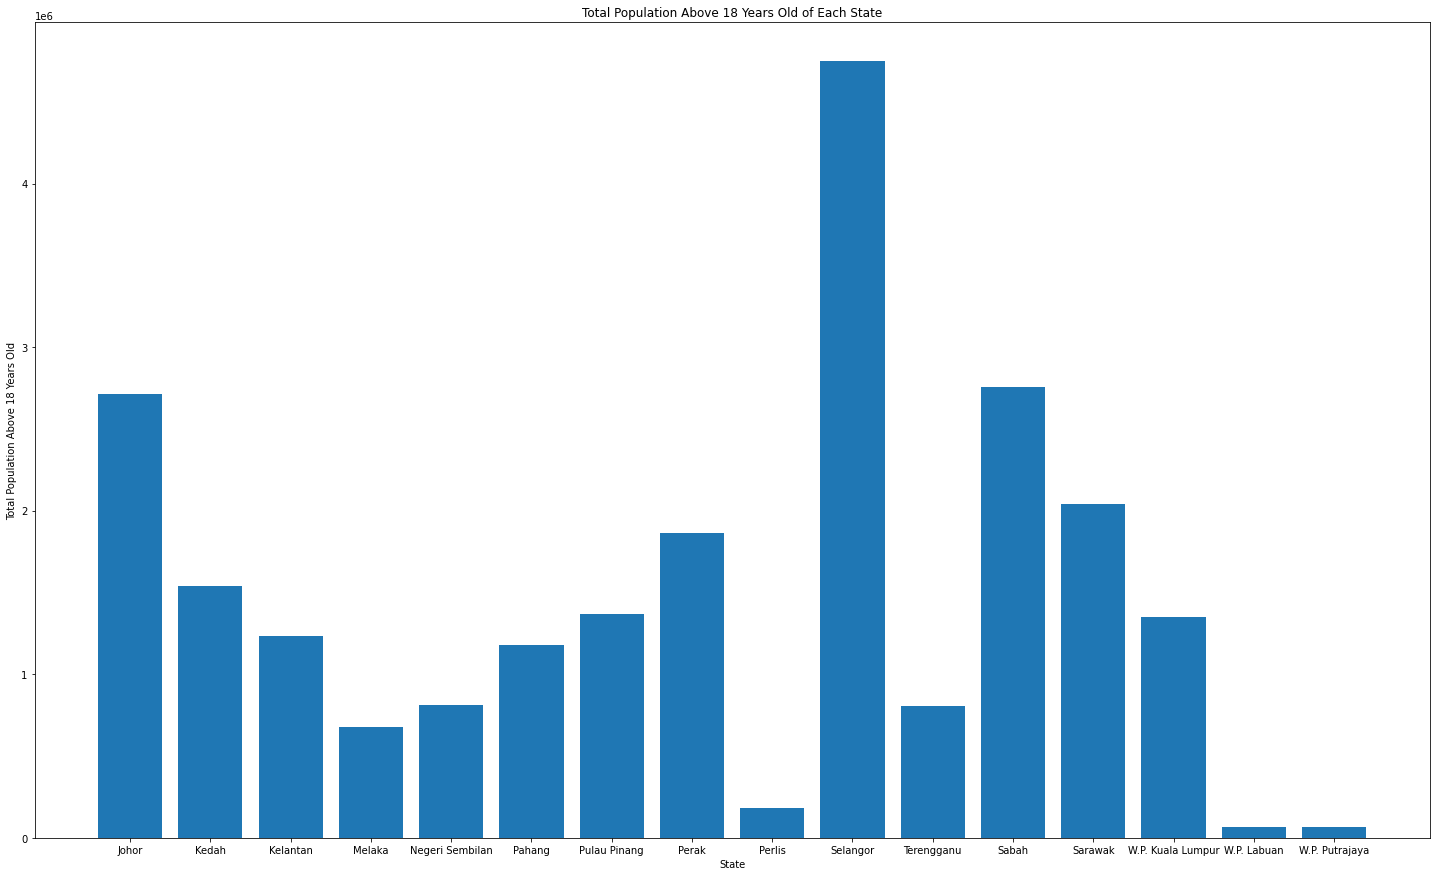

In [33]:
plt.figure(figsize=(25,15))
plt.bar(pop['state'],pop['pop_18'])
plt.xlabel('State')
plt.ylabel('Total Population Above 18 Years Old')
plt.title('Total Population Above 18 Years Old of Each State')
plt.show()

The graph shows the total population of people aged 18 years old and above in Malaysia. We can see that the pattern generally follows the pattern of the total population of every state in Malaysia.

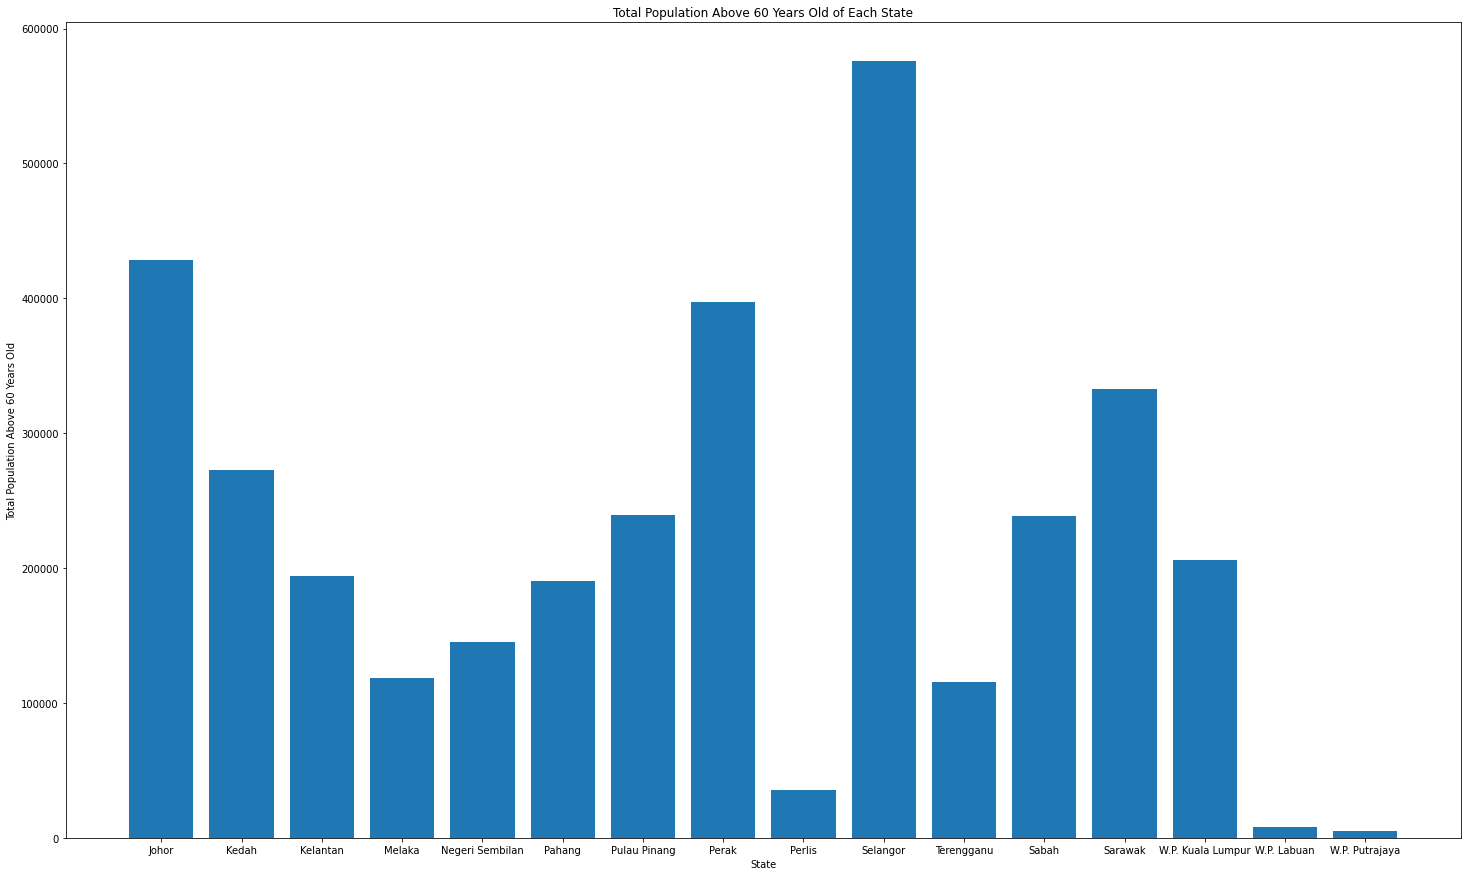

In [34]:
plt.figure(figsize=(25,15))
plt.bar(pop['state'],pop['pop_60'])
plt.xlabel('State')
plt.ylabel('Total Population Above 60 Years Old')
plt.title('Total Population Above 60 Years Old of Each State')
plt.show()

The graph shows the total population of people aged 60 years old and above in Malaysia. We can see that the pattern generally follows the pattern of the total population of every state in Malaysia except Sabah and Sarawak. Sarawak has more senior citizens but its total population is lesser than Sabah. Similarly, Sabah has lesser senior citizens but the total population is more than Sarawak.

## 1.4 Healthcare

### 1.4.1 PKRC


In [35]:
#Healthcare 
#read pkrc.csv

pkrc = pd.read_csv(path + 'Datasets/pkrc.csv')
pkrc['date']= pd.to_datetime(pkrc['date'])

##check for duplicates
#no duplicate row
print("Total duplicated rows:",sum(pkrc.duplicated()))

##deal with missing data
#no missing data
print("Number of null values:\n",pkrc.isnull().sum().sort_values(ascending = False))

pkrc

Total duplicated rows: 0
Number of null values:
 pkrc_noncovid      0
pkrc_pui           0
pkrc_covid         0
discharge_total    0
discharge_covid    0
discharge_pui      0
admitted_total     0
admitted_covid     0
admitted_pui       0
beds               0
state              0
date               0
dtype: int64


date         state  beds  ...  pkrc_covid  pkrc_pui  pkrc_noncovid
0    2020-03-28      Kelantan   147  ...           0        53              0
1    2020-03-28        Perlis    54  ...           8         3              0
2    2020-03-28  Pulau Pinang    58  ...          13         0              0
3    2020-03-28       Sarawak    74  ...          22         0              0
4    2020-03-28      Selangor  1452  ...         145         0              8
...         ...           ...   ...  ...         ...       ...            ...
6794 2021-10-25         Sabah  3512  ...        1023        59              0
6795 2021-10-25       Sarawak  6742  ...        1694       685              0
6796 2021-10-25      Selangor  3156  ...        1410         8              0
6797 2021-10-25    Terengganu  2232  ...         837        51              0
6798 2021-10-25   W.P. Labuan   251  ...          13        10              0

[6799 rows x 12 columns]

In [36]:
#rename columns to avoid confusion 
pkrc.rename(columns=
{
"admitted_pui": "pkrc_admitted_pui",
"admitted_covid": "pkrc_admitted_covid",
"admitted_total": "pkrc_admitted_total",
"discharge_pui": "pkrc_discharged_pui",
"discharge_covid": "pkrc_discharged_covid",
"discharge_total": "pkrc_discharged_total"
}, inplace=True)

pkrc

date         state  beds  ...  pkrc_covid  pkrc_pui  pkrc_noncovid
0    2020-03-28      Kelantan   147  ...           0        53              0
1    2020-03-28        Perlis    54  ...           8         3              0
2    2020-03-28  Pulau Pinang    58  ...          13         0              0
3    2020-03-28       Sarawak    74  ...          22         0              0
4    2020-03-28      Selangor  1452  ...         145         0              8
...         ...           ...   ...  ...         ...       ...            ...
6794 2021-10-25         Sabah  3512  ...        1023        59              0
6795 2021-10-25       Sarawak  6742  ...        1694       685              0
6796 2021-10-25      Selangor  3156  ...        1410         8              0
6797 2021-10-25    Terengganu  2232  ...         837        51              0
6798 2021-10-25   W.P. Labuan   251  ...          13        10              0

[6799 rows x 12 columns]

The pkrc.csv tells us about the COVID-19 Quarantine and Treament Centre in every state in Malaysia. There is no duplicated and NaN value in this dataset. After that, we decided to rename some columns because they may clash with the names from other datasets.

Outliers Detection for pkrc.csv

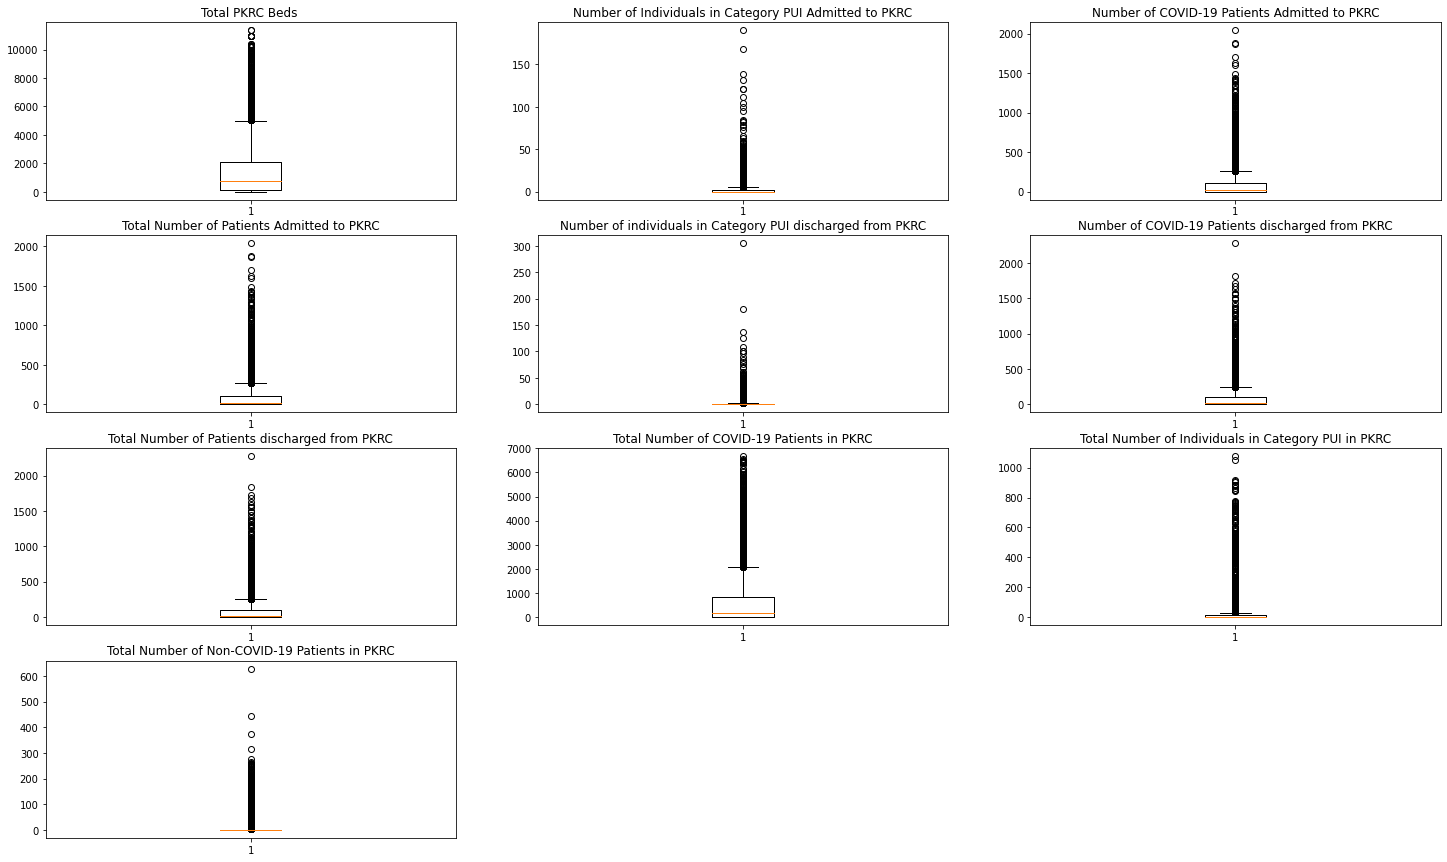

In [37]:
#Outlier Detection
pkrc_boxplot = pkrc.drop(columns=['date','state'])
plt.figure(figsize=(25,15))
plt.subplot(431),plt.boxplot(pkrc_boxplot.beds),plt.title('Total PKRC Beds ')
plt.subplot(432),plt.boxplot(pkrc_boxplot.pkrc_admitted_pui),plt.title('Number of Individuals in Category PUI Admitted to PKRC')
plt.subplot(433),plt.boxplot(pkrc_boxplot.pkrc_admitted_covid),plt.title('Number of COVID-19 Patients Admitted to PKRC')
plt.subplot(434),plt.boxplot(pkrc_boxplot.pkrc_admitted_total),plt.title('Total Number of Patients Admitted to PKRC')
plt.subplot(435),plt.boxplot(pkrc_boxplot.pkrc_discharged_pui),plt.title('Number of individuals in Category PUI discharged from PKRC')
plt.subplot(436),plt.boxplot(pkrc_boxplot.pkrc_discharged_covid),plt.title('Number of COVID-19 Patients discharged from PKRC')
plt.subplot(437),plt.boxplot(pkrc_boxplot.pkrc_discharged_total),plt.title('Total Number of Patients discharged from PKRC')
plt.subplot(438),plt.boxplot(pkrc_boxplot.pkrc_covid),plt.title('Total Number of COVID-19 Patients in PKRC')
plt.subplot(439),plt.boxplot(pkrc_boxplot.pkrc_pui),plt.title('Total Number of Individuals in Category PUI in PKRC')
plt.subplot(4,3,10),plt.boxplot(pkrc_boxplot.pkrc_noncovid),plt.title('Total Number of Non-COVID-19 Patients in PKRC')
plt.show()

Based on the boxplot above, we can see that every column in the 'pkrc.csv' dataset contains a lot of outliers. All of the boxplots showed that the data is positively skewed. This may be due to the slow start of the COVID-19 pandemic which contains a low number of COVID-19 cases, followed by a sudden increase of high number COVID-19 cases that caused a high number of patients admitted to the PKRC. However, we decided to not remove these outliers as the data are crucial to this assignment and training model.

In [38]:
#group by state
state_pkrc = pkrc.groupby(['state']).sum()
state_pkrc.reset_index(inplace = True)
state_pkrc 

state     beds  ...  pkrc_pui  pkrc_noncovid
0             Johor   658824  ...       760            337
1             Kedah   273681  ...       193              0
2          Kelantan   551966  ...      9888           1195
3            Melaka   286216  ...       147             75
4   Negeri Sembilan   415971  ...         0            179
5            Pahang   654894  ...     12780           3541
6             Perak   345488  ...       346          50534
7            Perlis    85366  ...       936              2
8      Pulau Pinang   508276  ...         0            443
9             Sabah  1753601  ...     23273             33
10          Sarawak  2045171  ...    107648          34669
11         Selangor  2266103  ...      5882          15633
12       Terengganu   568825  ...     18476            755
13      W.P. Labuan   149916  ...     13292             14

[14 rows x 11 columns]

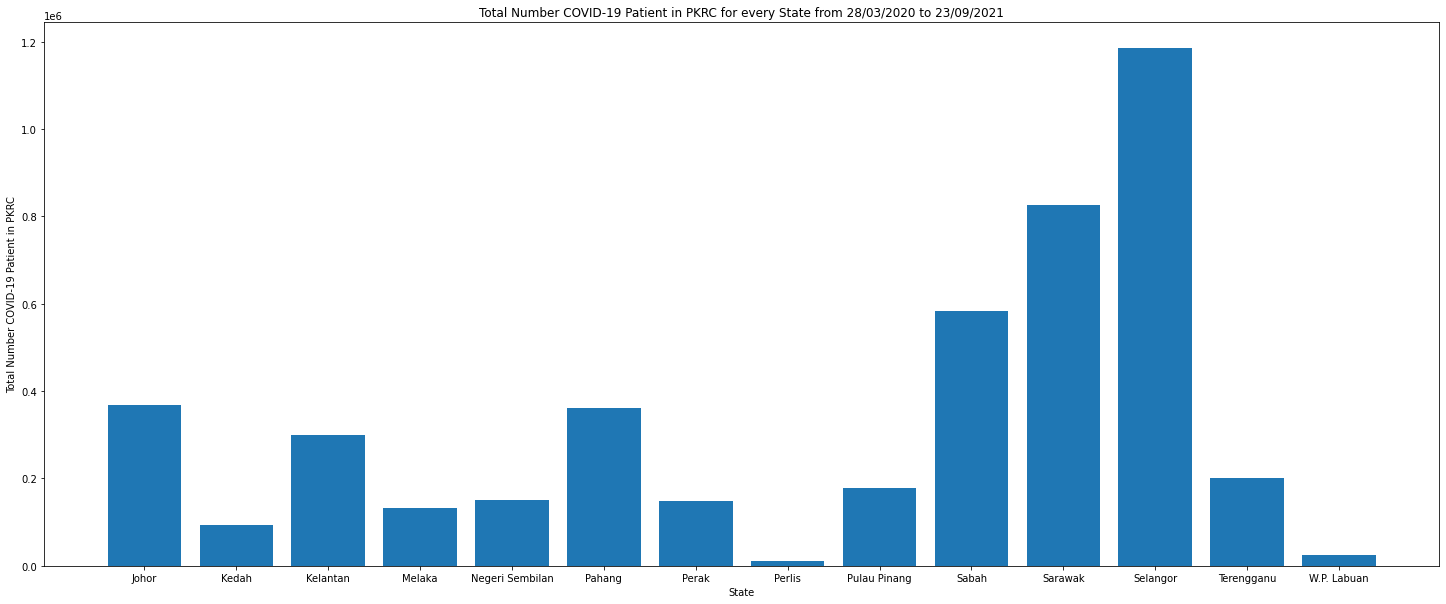

In [39]:
plt.figure(figsize=(25,10))
plt.bar(state_pkrc['state'],state_pkrc['pkrc_covid'])
plt.xlabel('State')
plt.ylabel('Total Number COVID-19 Patient in PKRC')
plt.title('Total Number COVID-19 Patient in PKRC for every State from 28/03/2020 to 23/09/2021')
plt.show()



The bar chart above shows that Selangor recorded the highest number of COVID-19 Patients in the PKRC whereas Perlis recorded the lowest number of COVID-19 Patients in the PKRC from 28/03/2020 to 23/09/2021. This has proven that Selangor is the most severe state in Malaysia.

In [40]:
#group by month and state
month_pkrc = pkrc.copy()
month_pkrc['date'] = pkrc.date.dt.to_period('m')
month_pkrc = month_pkrc.set_index('date')
month_pkrc = month_pkrc.groupby([pd.Grouper(freq='M'), 'state']).sum()
month_pkrc

beds  pkrc_admitted_pui  ...  pkrc_pui  pkrc_noncovid
date    state                                    ...                         
2020-03 Kelantan         588                  8  ...       174              0
        Perak            327                  0  ...         0              0
        Perlis           216                  2  ...        13              0
        Pulau Pinang     232                  0  ...         0              0
        Sarawak          296                  0  ...         0              0
...                      ...                ...  ...       ...            ...
2021-10 Sabah          93072                230  ...      1461              0
        Sarawak       173082                948  ...     14072             11
        Selangor       83220                102  ...       379              0
        Terengganu     55800                451  ...      1637              0
        W.P. Labuan     6275                 24  ...       113              0

[239 rows x 10 columns]

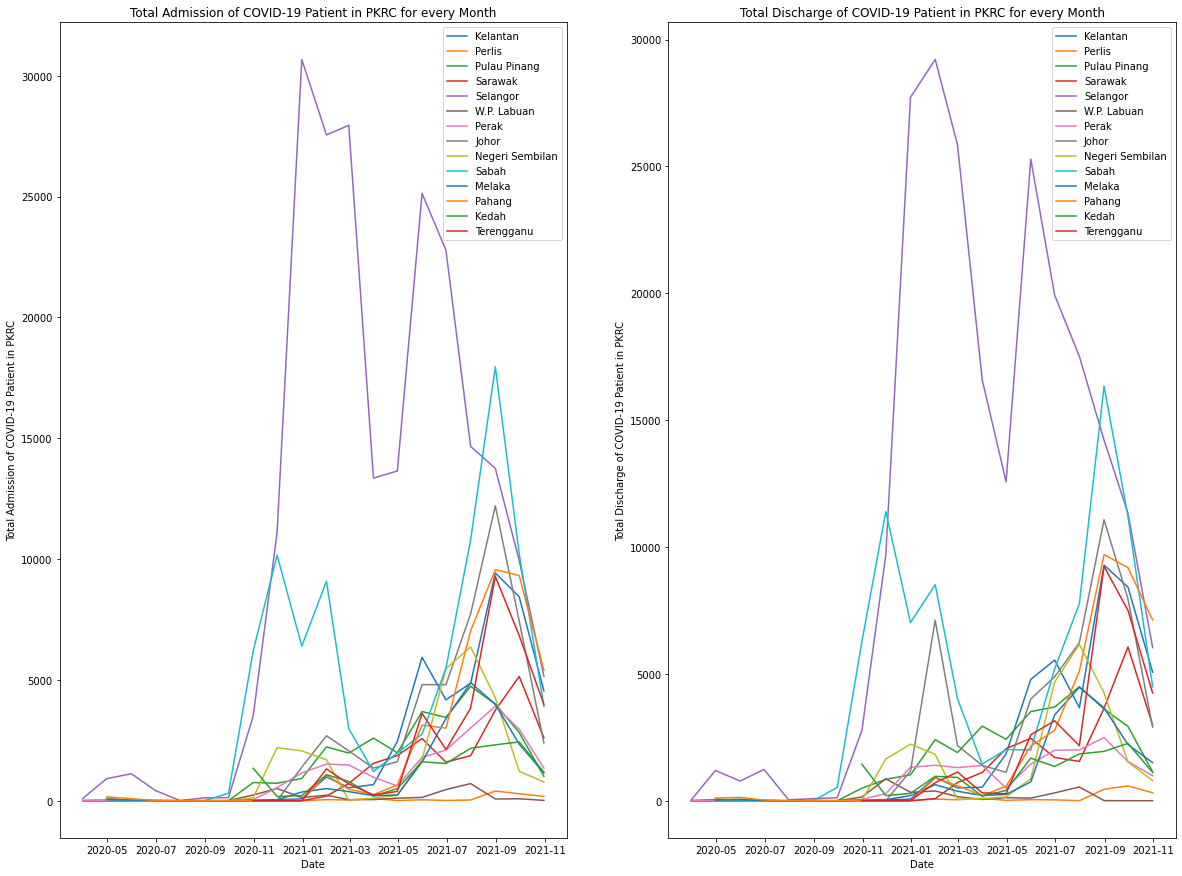

In [41]:
plt.figure(figsize=(20,15))
for state in pd.unique(pkrc['state']):
    data = pkrc[pkrc['state'] == state].dropna()
    months_pkrc = data.groupby([pd.Grouper(key='date', axis=0, freq='M')]).agg('sum')
    plt.subplot(121),plt.plot(months_pkrc.index.values, months_pkrc['pkrc_admitted_covid'], label = state)
    plt.subplot(122),plt.plot(months_pkrc.index.values, months_pkrc['pkrc_discharged_covid'], label = state)

plt.subplot(121),plt.xlabel('Date')
plt.subplot(121),plt.ylabel('Total Admission of COVID-19 Patient in PKRC')
plt.subplot(121),plt.title('Total Admission of COVID-19 Patient in PKRC for every Month')
plt.subplot(121),plt.legend()
plt.subplot(122),plt.xlabel('Date')
plt.subplot(122),plt.ylabel('Total Discharge of COVID-19 Patient in PKRC')
plt.subplot(122),plt.title('Total Discharge of COVID-19 Patient in PKRC for every Month')
plt.subplot(122),plt.legend()

plt.show()

The line graph above has shown that Selangor recorded the highest number of admission and discharge of COVID-19 patients in the PKRC for every month. This has proven that Selangor is the most severe state in Malaysia. However, based on the graphs above, it can be seen that total discharges of COVID-19 patients in PKRC are almost the same as the total admission of COVID-19 patients in PKRC for every month. This can be proven that the recovery rate of COVID-19 patients who undergo quarantine at PKRC is high and death rate is low. <br />

Besides, it can be noticed that there are two peaks in both of the graphs. It can be deduced that the total number of COVID-19 cases for every month was low at the early stages and the COVID-19 cases increased significantly from December 2020 to March 2021. After that, the cases dropped significantly and a second wave started in June 2021.

In [42]:
pkrc_admit_maxMonth = month_pkrc['pkrc_admitted_covid'].idxmax()
pkrc_discharged_maxMonth = month_pkrc['pkrc_discharged_covid'].idxmax()
print("The month with the most COVID-19 patient admission in PKRC(from 2020-2021) is '" + str(pkrc_admit_maxMonth[0]) + "'"' with the amount of ' + str(month_pkrc['pkrc_admitted_total'].max()) + " in " + pkrc_admit_maxMonth[1])
print("The month with the most COVID-19 patient discharge in PKRC(from 2020-2021) is '" + str(pkrc_discharged_maxMonth[0]) + "'"' with the amount of ' + str(month_pkrc['pkrc_discharged_total'].max()) + " in " + pkrc_discharged_maxMonth[1])

The month with the most COVID-19 patient admission in PKRC(from 2020-2021) is '2020-12' with the amount of 30692 in Selangor
The month with the most COVID-19 patient discharge in PKRC(from 2020-2021) is '2021-01' with the amount of 29429 in Selangor


In [43]:
#feature selection
final_pkrc = pkrc.copy()
final_pkrc

date         state  beds  ...  pkrc_covid  pkrc_pui  pkrc_noncovid
0    2020-03-28      Kelantan   147  ...           0        53              0
1    2020-03-28        Perlis    54  ...           8         3              0
2    2020-03-28  Pulau Pinang    58  ...          13         0              0
3    2020-03-28       Sarawak    74  ...          22         0              0
4    2020-03-28      Selangor  1452  ...         145         0              8
...         ...           ...   ...  ...         ...       ...            ...
6794 2021-10-25         Sabah  3512  ...        1023        59              0
6795 2021-10-25       Sarawak  6742  ...        1694       685              0
6796 2021-10-25      Selangor  3156  ...        1410         8              0
6797 2021-10-25    Terengganu  2232  ...         837        51              0
6798 2021-10-25   W.P. Labuan   251  ...          13        10              0

[6799 rows x 12 columns]

### 1.4.2 Hospital


In [44]:
#read hospital.csv
hospital = pd.read_csv(path + 'Datasets/hospital.csv')

#change to datetime format
hospital['date']= pd.to_datetime(hospital['date'])

##check for duplicates
#no duplicate row
print("Total duplicated rows:",sum(hospital.duplicated()))

##deal with missing data
#no missing data
print("Number of null values:\n",hospital.isnull().sum().sort_values(ascending = False))

hospital

Total duplicated rows: 0
Number of null values:
 hosp_noncovid       0
hosp_pui            0
hosp_covid          0
discharged_total    0
discharged_covid    0
discharged_pui      0
admitted_total      0
admitted_covid      0
admitted_pui        0
beds_noncrit        0
beds_covid          0
beds                0
state               0
date                0
dtype: int64


date              state  beds  ...  hosp_covid  hosp_pui  hosp_noncovid
0    2020-03-24              Johor  1440  ...          18         9              1
1    2020-03-24              Kedah  1218  ...          46         5             12
2    2020-03-24           Kelantan  1463  ...          78        58             23
3    2020-03-24             Melaka  1091  ...          19        10             12
4    2020-03-24    Negeri Sembilan  1223  ...          90        13              8
...         ...                ...   ...  ...         ...       ...            ...
8878 2021-10-25           Selangor  5902  ...         649       406           2458
8879 2021-10-25         Terengganu  1557  ...         226        39            883
8880 2021-10-25  W.P. Kuala Lumpur  3963  ...         216        52           1385
8881 2021-10-25        W.P. Labuan   122  ...           0         4             63
8882 2021-10-25     W.P. Putrajaya   609  ...          12        21            305

[8883 rows x 14 columns]

In [45]:
#rename columns to avoid confusion 
hospital.rename(columns=
{
"admitted_pui": "hosp_admitted_pui",
"admitted_covid": "hosp_admitted_covid",
"admitted_total": "hosp_admitted_total",
"discharged_pui": "hosp_discharged_pui",
"discharged_covid": "hosp_discharged_covid",
"discharged_total": "hosp_discharged_total"
}, inplace=True)

hospital

date              state  beds  ...  hosp_covid  hosp_pui  hosp_noncovid
0    2020-03-24              Johor  1440  ...          18         9              1
1    2020-03-24              Kedah  1218  ...          46         5             12
2    2020-03-24           Kelantan  1463  ...          78        58             23
3    2020-03-24             Melaka  1091  ...          19        10             12
4    2020-03-24    Negeri Sembilan  1223  ...          90        13              8
...         ...                ...   ...  ...         ...       ...            ...
8878 2021-10-25           Selangor  5902  ...         649       406           2458
8879 2021-10-25         Terengganu  1557  ...         226        39            883
8880 2021-10-25  W.P. Kuala Lumpur  3963  ...         216        52           1385
8881 2021-10-25        W.P. Labuan   122  ...           0         4             63
8882 2021-10-25     W.P. Putrajaya   609  ...          12        21            305

[8883 rows x 14 columns]

The hospital.csv tells us about the information of hospitals in every state in Malaysia. There is no duplicated and NaN value in this dataset. After that, we decided to rename some columns because they may clash with the names from other datasets.

Outliers Detection for hospital.csv

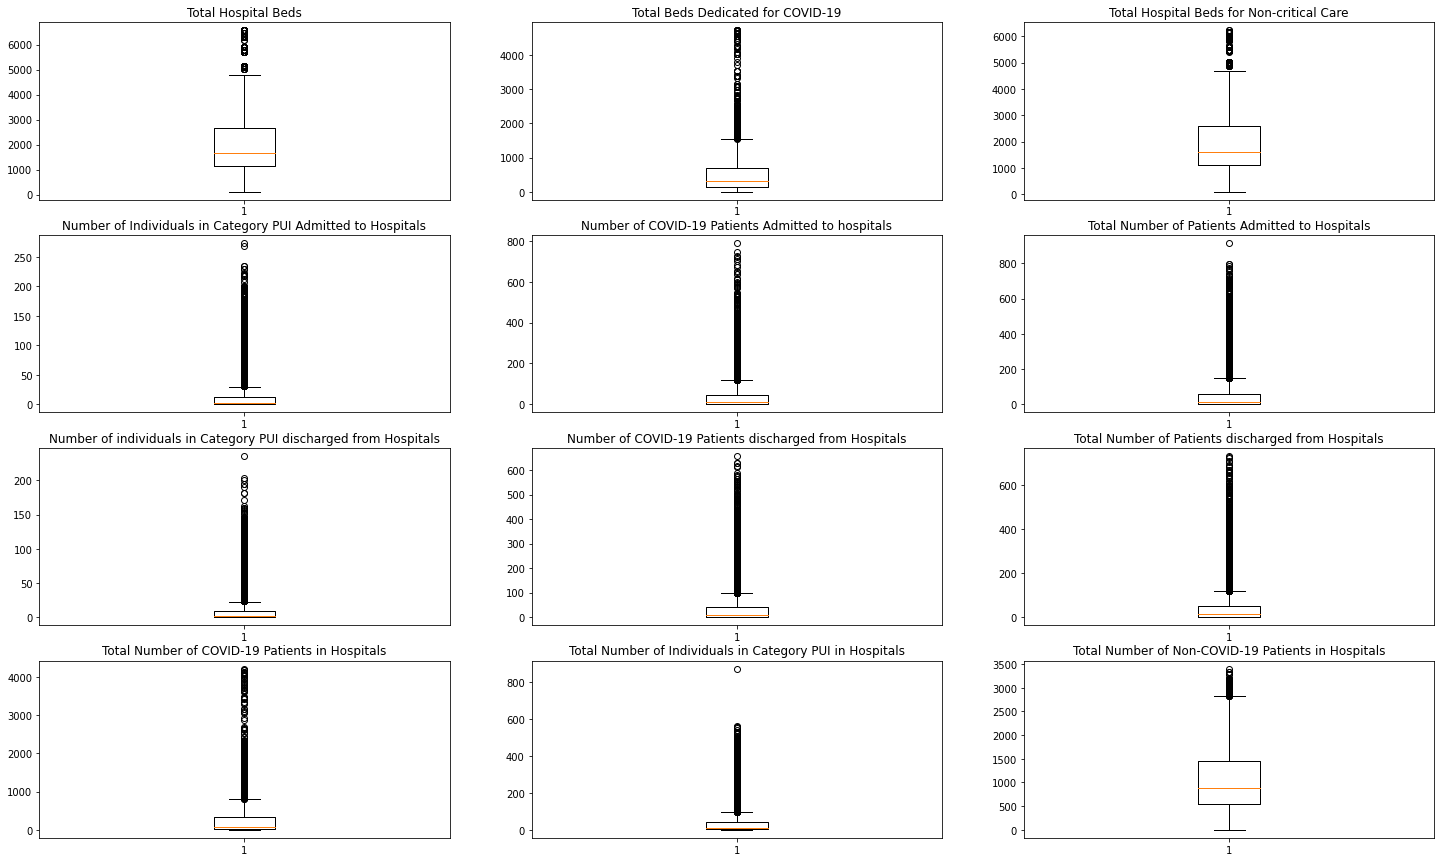

In [46]:
#Outlier Detection
hospital_boxplot = hospital.drop(columns=['date','state'])
plt.figure(figsize=(25,15))
plt.subplot(431),plt.boxplot(hospital_boxplot.beds),plt.title('Total Hospital Beds')
plt.subplot(432),plt.boxplot(hospital_boxplot.beds_covid),plt.title('Total Beds Dedicated for COVID-19')
plt.subplot(433),plt.boxplot(hospital_boxplot.beds_noncrit),plt.title('Total Hospital Beds for Non-critical Care')
plt.subplot(434),plt.boxplot(hospital_boxplot.hosp_admitted_pui),plt.title('Number of Individuals in Category PUI Admitted to Hospitals')
plt.subplot(435),plt.boxplot(hospital_boxplot.hosp_admitted_covid),plt.title('Number of COVID-19 Patients Admitted to hospitals')
plt.subplot(436),plt.boxplot(hospital_boxplot.hosp_admitted_total),plt.title('Total Number of Patients Admitted to Hospitals')
plt.subplot(437),plt.boxplot(hospital_boxplot.hosp_discharged_pui),plt.title('Number of individuals in Category PUI discharged from Hospitals')
plt.subplot(438),plt.boxplot(hospital_boxplot.hosp_discharged_covid),plt.title('Number of COVID-19 Patients discharged from Hospitals')
plt.subplot(439),plt.boxplot(hospital_boxplot.hosp_discharged_total),plt.title('Total Number of Patients discharged from Hospitals')
plt.subplot(4,3,10),plt.boxplot(hospital_boxplot.hosp_covid),plt.title('Total Number of COVID-19 Patients in Hospitals')
plt.subplot(4,3,11),plt.boxplot(hospital_boxplot.hosp_pui),plt.title('Total Number of Individuals in Category PUI in Hospitals')
plt.subplot(4,3,12),plt.boxplot(hospital_boxplot.hosp_noncovid),plt.title('Total Number of Non-COVID-19 Patients in Hospitals')
plt.show()

Based on the boxplots above, we can see that every column in the 'hospital.csv' dataset contains a lot of outliers. All of the boxplots showed that the data is positively skewed. This may be due to the slow start of the COVID-19 pandemic which contains a low number of COVID-19 cases, followed by a sudden increase of high number COVID-19 cases that caused a high number of patients admitted to the hospital. However, we decided to not remove these outliers as the data are crucial to this assignment and training model.

In [47]:
#group by state
state_hos = hospital.groupby(['state']).sum()
state_hos.reset_index(inplace = True)
state_hos

state     beds  beds_covid  ...  hosp_covid  hosp_pui  hosp_noncovid
0               Johor  2184668      568683  ...      320316     58173         719347
1               Kedah  1031924      249004  ...      135776      4489         614036
2            Kelantan  1199743      239795  ...      128565      8216         650329
3              Melaka   659044      126352  ...       73844      7248         423234
4     Negeri Sembilan   794867      373666  ...      153091      3777         384606
5              Pahang  1117429      274955  ...       81811      9788         547909
6               Perak  1591034      248429  ...      106850      7460         937558
7              Perlis   289758       33251  ...       11707      6904         162841
8        Pulau Pinang   778423      135491  ...       91364       907         438395
9               Sabah  1717976      527414  ...      223239     45233         800067
10            Sarawak  1699723      408484  ...      145329     61498         934076
11           Selangor  1849789      767707  ...      444397    120512         688203
12         Terengganu   761360      167517  ...       50299     13129         458591
13  W.P. Kuala Lumpur  2060429      376171  ...      206515     18563         898717
14        W.P. Labuan    70928       22110  ...        4841      1496          39480
15     W.P. Putrajaya    82084       15135  ...        8418      3710          39365

[16 rows x 13 columns]

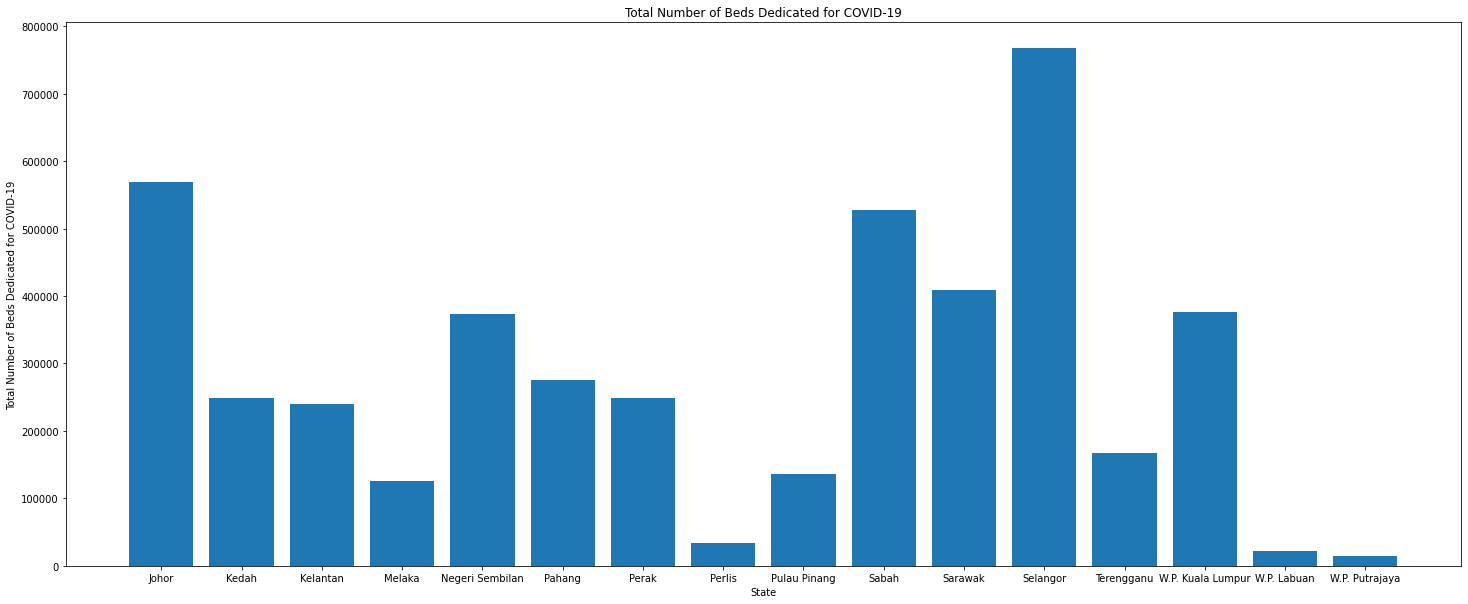

In [48]:
plt.figure(figsize=(25,10))
plt.bar(state_hos['state'],state_hos['beds_covid'])
plt.xlabel('State')
plt.ylabel('Total Number of Beds Dedicated for COVID-19')
plt.title('Total Number of Beds Dedicated for COVID-19')
plt.show()

Based on the bar chart above, it can be seen that Selangor recorded the highest number of beds dedicated to COVID-19. One of the important insights that can be obtained from this chart is that a high demand of beds for COVID-19 are needed for COVID-19 patients which inferred that Selangor is the most severe state with the highest number of COVID-19 cases.

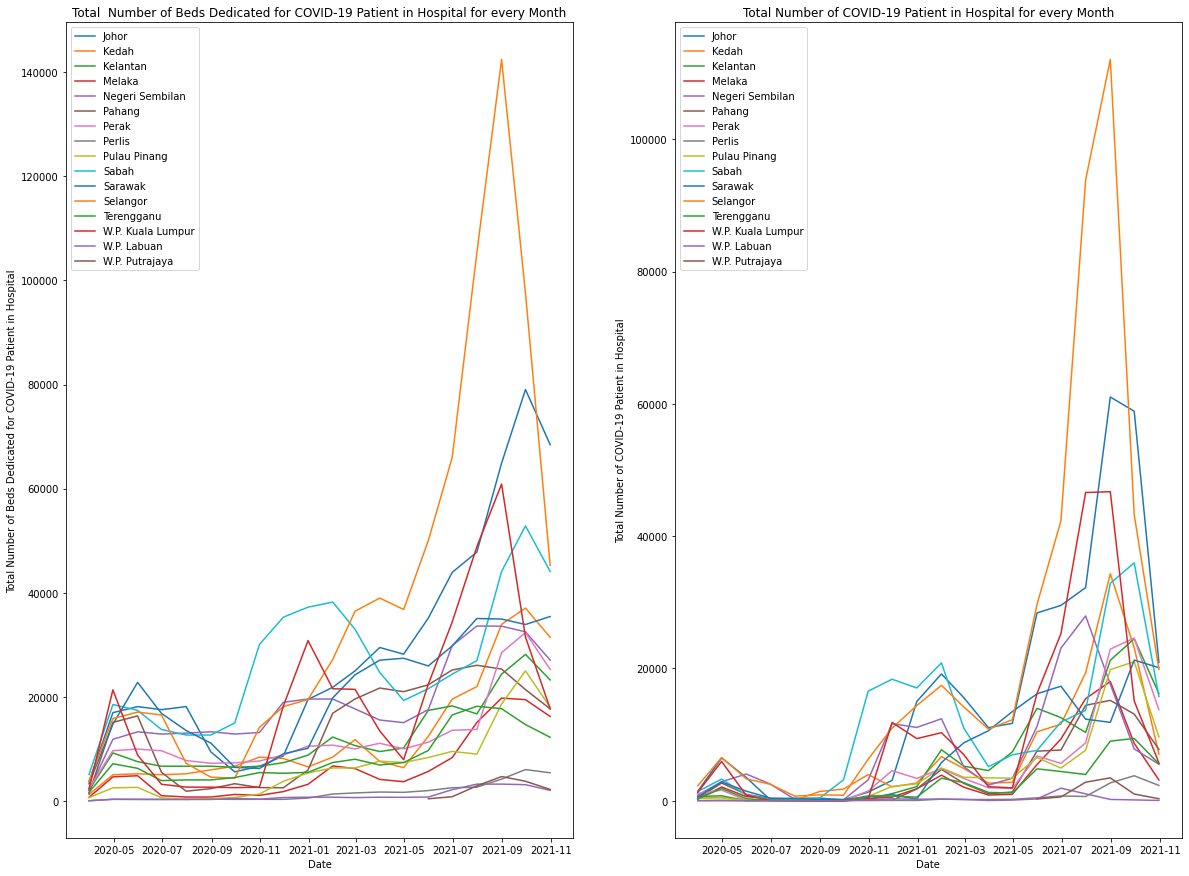

In [49]:
plt.figure(figsize=(20,15))
for state in pd.unique(hospital['state']):
    data = hospital[hospital['state'] == state].dropna()
    months_hospital = data.groupby([pd.Grouper(key='date', axis=0, freq='M')]).agg('sum')
    plt.subplot(121),plt.plot(months_hospital.index.values, months_hospital['beds_covid'], label = state)
    plt.subplot(122),plt.plot(months_hospital.index.values, months_hospital['hosp_covid'], label = state)

plt.subplot(121),plt.xlabel('Date')
plt.subplot(121),plt.ylabel('Total Number of Beds Dedicated for COVID-19 Patient in Hospital')
plt.subplot(121),plt.title('Total  Number of Beds Dedicated for COVID-19 Patient in Hospital for every Month')
plt.subplot(121),plt.legend()
plt.subplot(122),plt.xlabel('Date')
plt.subplot(122),plt.ylabel('Total Number of COVID-19 Patient in Hospital')
plt.subplot(122),plt.title('Total Number of COVID-19 Patient in Hospital for every Month')
plt.subplot(122),plt.legend()
plt.show()

Based on the line graphs above, the graph on the left showed that Selangor recorded the highest number of beds dedicated to COVID-19 in the hospital whereas the graph on the right showed that Selangor recorded the highest number of COVID-19 patients in the hospital  for every month. The total number of COVID-19 patients for every month was low at the early stages but the total number of COVID-19 patients rocketed rapidly starting from May 2021 to September 2021,especially Selangor. <br /> <br />
One of the important insights that can be obtained from this chart is that beds in the hospital are still sufficient for the COVID-19 patients, even though the number of COVID-19 cases are getting higher as the total number of beds dedicated for COVID-19 is always higher than the total number of patients for every month. 


In [50]:
#group by month and state
month_hospital = hospital.copy()
month_hospital['date'] = hospital.date.dt.to_period('m')
month_hospital = month_hospital.set_index('date')
month_hospital = month_hospital.groupby([pd.Grouper(freq='M'), 'state']).sum()
month_hospital

beds  beds_covid  ...  hosp_pui  hosp_noncovid
date    state                                  ...                         
2020-03 Johor               11520        3756  ...       437            733
        Kedah                9744        1298  ...        71           3654
        Kelantan            12430        2130  ...       446           4012
        Melaka               8728         747  ...        74           3202
        Negeri Sembilan      9784        2087  ...        41           2903
...                           ...         ...  ...       ...            ...
2021-10 Selangor           147550       45280  ...      9544          64214
        Terengganu          38925       12275  ...       846          23562
        W.P. Kuala Lumpur  100979       17745  ...      1109          27779
        W.P. Labuan          3050        2086  ...        28           1810
        W.P. Putrajaya      15225        2268  ...       825           7464

[306 rows x 12 columns]

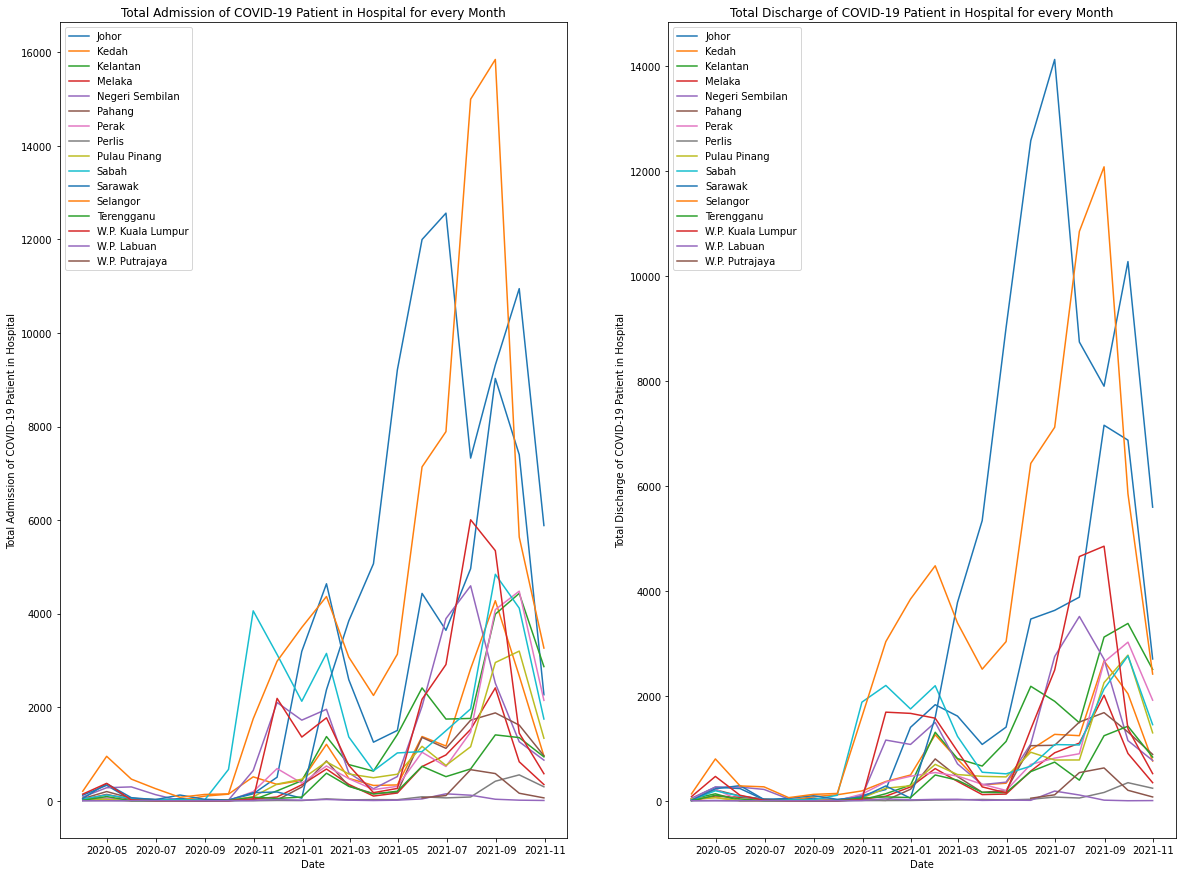

In [51]:
plt.figure(figsize=(20,15))
for state in pd.unique(hospital['state']):
    data = hospital[hospital['state'] == state].dropna()
    months_hospital = data.groupby([pd.Grouper(key='date', axis=0, freq='M')]).agg('sum')
    plt.subplot(121),plt.plot(months_hospital.index.values, months_hospital['hosp_admitted_covid'], label = state)
    plt.subplot(122),plt.plot(months_hospital.index.values, months_hospital['hosp_discharged_covid'], label = state)

plt.subplot(121),plt.xlabel('Date')
plt.subplot(121),plt.ylabel('Total Admission of COVID-19 Patient in Hospital')
plt.subplot(121),plt.title('Total Admission of COVID-19 Patient in Hospital for every Month')
plt.subplot(121),plt.legend()
plt.subplot(122),plt.xlabel('Date')
plt.subplot(122),plt.ylabel('Total Discharge of COVID-19 Patient in Hospital')
plt.subplot(122),plt.title('Total Discharge of COVID-19 Patient in Hospital for every Month')
plt.subplot(122),plt.legend()

plt.show()

Based on both of the graphs, the line graph above has shown that Selangor recorded the most number of admission of COVID-19 patients in the hospital for most of the months while Sarawak has recorded the most number of discharges of COVID-19 patients in the hospital for most of the month. However, based on the graphs above, it can be seen that total discharges of COVID-19 patients in hospital are almost the same as the total admission of COVID-19 patients in hospital for every month. This can be proven that the recovery rate of COVID-19 patients who undergo treatment in the hospital is high and death rate is low. <br /> <br />
Besides, it can be noticed that the total number of admission and discharge of COVID-19 patients in the hospital is slowly increasing. It can be deduced that the total number of COVID-19 cases for every month was low at the early stages and the COVID-19 cases had a slight increase in January 2021. Then, a second wave started in June 2021.


In [52]:
hos_bed_maxMonth = month_hospital['beds_covid'].idxmax()
hos_admit_maxMonth = month_hospital['hosp_covid'].idxmax()

In [53]:
print("The month with the most number of COVID-19 patient(from 2020-2021) is '" + str(hos_admit_maxMonth[0]) + "'"' with the amount of ' + str(month_hospital['hosp_covid'].max()) + " in " + hos_admit_maxMonth[1])
print("The month with the most number of beds dedicated for COVID-19 in Hospital(from 2020-2021) is '" + str(hos_bed_maxMonth[0]) + "'"' with the amount of ' + str(month_hospital['beds_covid'].max()) + " in " + hos_bed_maxMonth[1])


The month with the most number of COVID-19 patient(from 2020-2021) is '2021-08' with the amount of 112062 in Selangor
The month with the most number of beds dedicated for COVID-19 in Hospital(from 2020-2021) is '2021-08' with the amount of 142398 in Selangor


In [54]:
#feature selection
final_hospital = hospital.copy()
final_hospital

date              state  beds  ...  hosp_covid  hosp_pui  hosp_noncovid
0    2020-03-24              Johor  1440  ...          18         9              1
1    2020-03-24              Kedah  1218  ...          46         5             12
2    2020-03-24           Kelantan  1463  ...          78        58             23
3    2020-03-24             Melaka  1091  ...          19        10             12
4    2020-03-24    Negeri Sembilan  1223  ...          90        13              8
...         ...                ...   ...  ...         ...       ...            ...
8878 2021-10-25           Selangor  5902  ...         649       406           2458
8879 2021-10-25         Terengganu  1557  ...         226        39            883
8880 2021-10-25  W.P. Kuala Lumpur  3963  ...         216        52           1385
8881 2021-10-25        W.P. Labuan   122  ...           0         4             63
8882 2021-10-25     W.P. Putrajaya   609  ...          12        21            305

[8883 rows x 14 columns]

### 1.4.3 ICU


In [55]:
#read icu.csv
icu = pd.read_csv(path + 'Datasets/icu.csv')

#change to datetime format
icu['date']= pd.to_datetime(icu['date'])

##check for duplicates
#no duplicate row
print("Total duplicated rows:",sum(icu.duplicated()))

##deal with missing data
#no missing data
print("Number of null values:\n",icu.isnull().sum().sort_values(ascending = False))

icu

Total duplicated rows: 0
Number of null values:
 vent_port_used    0
vent_used         0
vent_noncovid     0
vent_pui          0
vent_covid        0
icu_noncovid      0
icu_pui           0
icu_covid         0
vent_port         0
vent              0
beds_icu_covid    0
beds_icu_total    0
beds_icu_rep      0
beds_icu          0
state             0
date              0
dtype: int64


date              state  ...  vent_used  vent_port_used
0    2020-03-24              Johor  ...          8               0
1    2020-03-24              Kedah  ...         19               0
2    2020-03-24           Kelantan  ...         26               0
3    2020-03-24             Melaka  ...         13               5
4    2020-03-24    Negeri Sembilan  ...          1               6
...         ...                ...  ...        ...             ...
8898 2021-10-25           Selangor  ...        151              11
8899 2021-10-25         Terengganu  ...         33              16
8900 2021-10-25  W.P. Kuala Lumpur  ...         71               0
8901 2021-10-25        W.P. Labuan  ...          3               0
8902 2021-10-25     W.P. Putrajaya  ...         10               0

[8903 rows x 16 columns]

The icu.csv tells us about the information of the Intensive Care Unit (ICU) in hospitals of every state in Malaysia. There is no duplicated and NaN value in this dataset. 

Outliers Detection for icu.csv

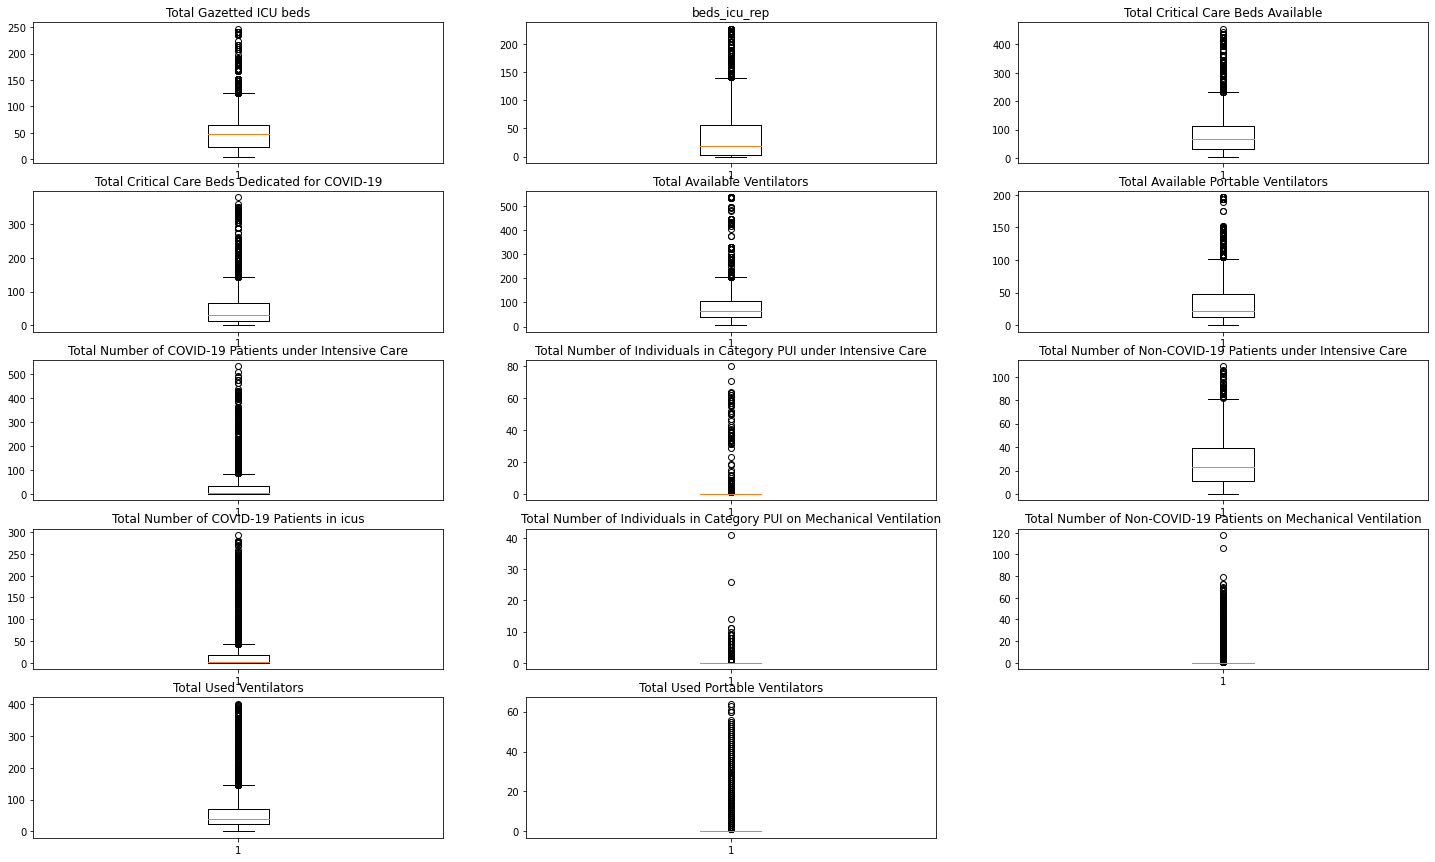

In [56]:
#Outlier Detection
icu_boxplot = icu.drop(columns=['date','state'])
plt.figure(figsize=(25,15))
plt.subplot(531),plt.boxplot(icu_boxplot.beds_icu),plt.title('Total Gazetted ICU beds')
plt.subplot(532),plt.boxplot(icu_boxplot.beds_icu_rep),plt.title('beds_icu_rep')
plt.subplot(533),plt.boxplot(icu_boxplot.beds_icu_total),plt.title('Total Critical Care Beds Available')
plt.subplot(534),plt.boxplot(icu_boxplot.beds_icu_covid),plt.title('Total Critical Care Beds Dedicated for COVID-19')
plt.subplot(535),plt.boxplot(icu_boxplot.vent),plt.title('Total Available Ventilators')
plt.subplot(536),plt.boxplot(icu_boxplot.vent_port),plt.title('Total Available Portable Ventilators')
plt.subplot(537),plt.boxplot(icu_boxplot.icu_covid),plt.title('Total Number of COVID-19 Patients under Intensive Care')
plt.subplot(538),plt.boxplot(icu_boxplot.icu_pui),plt.title('Total Number of Individuals in Category PUI under Intensive Care')
plt.subplot(539),plt.boxplot(icu_boxplot.icu_noncovid),plt.title('Total Number of Non-COVID-19 Patients under Intensive Care')
plt.subplot(5,3,10),plt.boxplot(icu_boxplot.vent_covid),plt.title('Total Number of COVID-19 Patients in icus')
plt.subplot(5,3,11),plt.boxplot(icu_boxplot.vent_pui),plt.title('Total Number of Individuals in Category PUI on Mechanical Ventilation')
plt.subplot(5,3,12),plt.boxplot(icu_boxplot.vent_noncovid),plt.title('Total Number of Non-COVID-19 Patients on Mechanical Ventilation')
plt.subplot(5,3,13),plt.boxplot(icu_boxplot.vent_used),plt.title('Total Used Ventilators')
plt.subplot(5,3,14),plt.boxplot(icu_boxplot.vent_port_used),plt.title('Total Used Portable Ventilators')
plt.show()

Based on the boxplots above, we can see that every column in the 'icu.csv' dataset contains a lot of outliers. All of the boxplots showed that the data is positively skewed. This may be due to the slow start of the COVID-19 pandemic which contains a low number of COVID-19 cases, followed by a sudden increase of high number COVID-19 cases that caused a high number of patients admitted to the ICU. However, we decided to not remove these outliers as the data are crucial to this assignment and training model.

In [57]:
#group by state
state_icu = icu.groupby(['state']).sum()
state_icu.reset_index(inplace = True)
state_icu

state  beds_icu  ...  vent_used  vent_port_used
0               Johor     37534  ...      48076            1842
1               Kedah     27356  ...      39453             472
2            Kelantan     39911  ...      38038             737
3              Melaka     22770  ...      19834              11
4     Negeri Sembilan     13987  ...      19158            1436
5              Pahang     27039  ...      23584             793
6               Perak     39353  ...      51829            1253
7              Perlis      7155  ...       7367             246
8        Pulau Pinang     16553  ...      20200            2203
9               Sabah     43168  ...      38293             771
10            Sarawak     32218  ...      45198            1130
11           Selangor     61697  ...      63230            1975
12         Terengganu     13314  ...      15974             869
13  W.P. Kuala Lumpur     42598  ...      37352              24
14        W.P. Labuan      2905  ...       2356               7
15     W.P. Putrajaya      2386  ...       2594              14

[16 rows x 15 columns]

icu_covid, vent_covid, beds_icu_total, beds_icu_covid

In [58]:
#group by month and state
month_icu = icu.copy()
month_icu['date'] = icu.date.dt.to_period('m')
month_icu = month_icu.set_index('date')
month_icu = month_icu.groupby([pd.Grouper(freq='M'), 'state']).sum()
month_icu

beds_icu  beds_icu_rep  ...  vent_used  vent_port_used
date    state                                      ...                           
2020-03 Johor                   188           208  ...        151               0
        Kedah                   280             0  ...        164               0
        Kelantan                347             0  ...        274               0
        Melaka                  208             0  ...        118               6
        Negeri Sembilan         144             0  ...         29              13
...                             ...           ...  ...        ...             ...
2021-10 Selangor               4379          3109  ...       3724             212
        Terengganu              675           834  ...        870             299
        W.P. Kuala Lumpur      2036          1187  ...       2028               0
        W.P. Labuan             125           384  ...         49               0
        W.P. Putrajaya          350           150  ...        268               0

[310 rows x 14 columns]

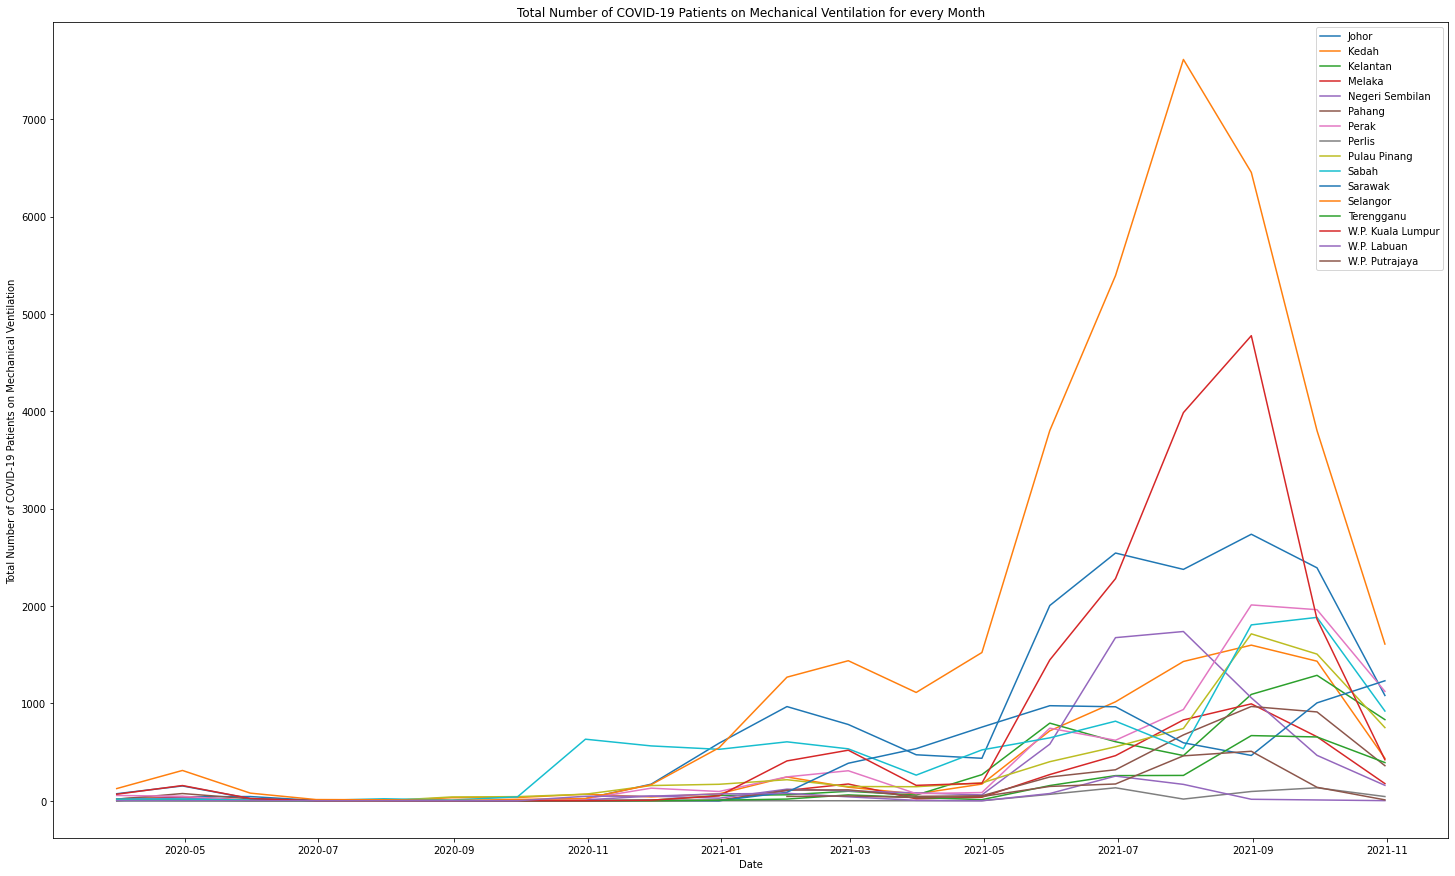

In [59]:
plt.figure(figsize=(25,15))
for state in pd.unique(icu['state']):
    data = icu[icu['state'] == state].dropna()
    months_icu = data.groupby([pd.Grouper(key='date', axis=0, freq='M')]).agg('sum')
    plt.plot(months_icu.index.values, months_icu['vent_covid'], label = state)

plt.xlabel('Date')
plt.ylabel('Total Number of COVID-19 Patients on Mechanical Ventilation')
plt.title('Total Number of COVID-19 Patients on Mechanical Ventilation for every Month')
plt.legend()
plt.show()

Based on the graph, Selangor has showed the highest total number of COVID-19 Patients on Mechanical Ventilation for every month. This has indicated that there are a lot of people suffering from severe COVID-19 diseases in Selangor which needed mechanical ventilation to survive. 

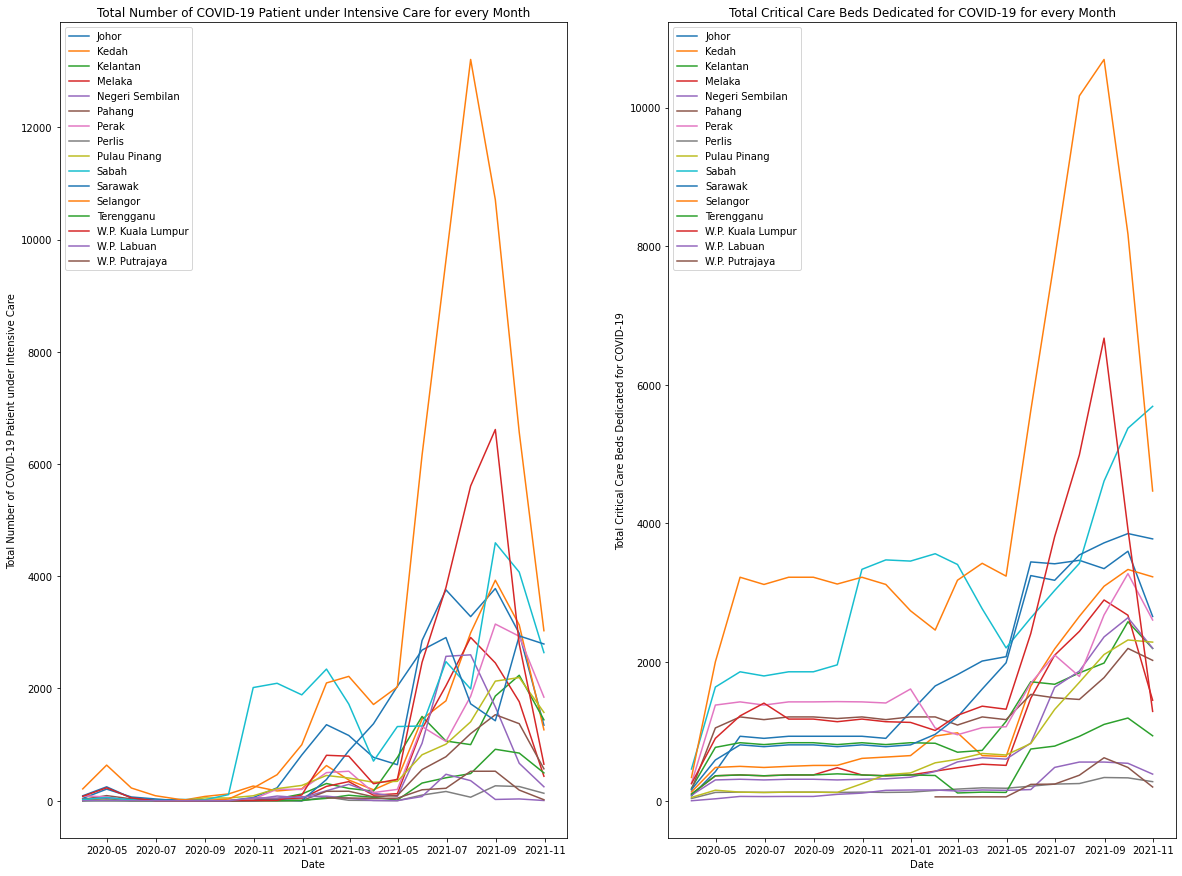

In [60]:
plt.figure(figsize=(20,15))
for state in pd.unique(icu['state']):
    data = icu[icu['state'] == state].dropna()
    months_icu = data.groupby([pd.Grouper(key='date', axis=0, freq='M')]).agg('sum')
    plt.subplot(121), plt.plot(months_icu.index.values, months_icu['icu_covid'], label = state)
    plt.subplot(122), plt.plot(months_icu.index.values, months_icu['beds_icu_covid'], label = state)

plt.subplot(121),plt.xlabel('Date')
plt.subplot(121),plt.ylabel('Total Number of COVID-19 Patient under Intensive Care')
plt.subplot(121),plt.title('Total Number of COVID-19 Patient under Intensive Care for every Month')
plt.subplot(121),plt.legend()
plt.subplot(122),plt.xlabel('Date')
plt.subplot(122),plt.ylabel('Total Critical Care Beds Dedicated for COVID-19')
plt.subplot(122),plt.title('Total Critical Care Beds Dedicated for COVID-19 for every Month')
plt.subplot(122),plt.legend()

plt.show()

Based on the line graphs above,  the graph on the top showed that Selangor recorded the highest number of COVID-19 patients under iIntensive care for every month while the graph on the bottom showed that Selangor recorded the highest total number of critical care beds dedicated for COVID-19 in the ICU. The total number of COVID-19 patients under intensive care for every month was low at the early stages but the total number of COVID-19 patients rocketed rapidly starting from May(2021) to around September(2021),especially Selangor.
<br/> <br/>
One of the important insights that can be obtained from this chart is that the total critical care beds in the icu are still sufficient for the COVID-19 patients, even though the number of COVID-19 cases are getting higher as the total number of critical care beds dedicated for COVID-19 is always higher than the total number of patients for every month. 


In [61]:
icu_covid_maxMonth = month_icu['icu_covid'].idxmax()
print("The month with the most number of COVID-19 patient in ICU(from 2020-2021) is '" + str(icu_covid_maxMonth[0]) + "'"' with the amount of ' + str(month_icu['icu_covid'].max()) + " in " + icu_covid_maxMonth[1])

The month with the most number of COVID-19 patient in ICU(from 2020-2021) is '2021-07' with the amount of 13209 in Selangor


In [62]:
#feature selection
final_icu = icu.copy()
final_icu

date              state  ...  vent_used  vent_port_used
0    2020-03-24              Johor  ...          8               0
1    2020-03-24              Kedah  ...         19               0
2    2020-03-24           Kelantan  ...         26               0
3    2020-03-24             Melaka  ...         13               5
4    2020-03-24    Negeri Sembilan  ...          1               6
...         ...                ...  ...        ...             ...
8898 2021-10-25           Selangor  ...        151              11
8899 2021-10-25         Terengganu  ...         33              16
8900 2021-10-25  W.P. Kuala Lumpur  ...         71               0
8901 2021-10-25        W.P. Labuan  ...          3               0
8902 2021-10-25     W.P. Putrajaya  ...         10               0

[8903 rows x 16 columns]

## 1.5 Vaccination


###1.5.1 Vaccination (Malaysia)

In [63]:
#read vax_malaysia.csv
vax_my = pd.read_csv(path + 'Datasets/vax_malaysia.csv')

#change to datetime format
vax_my['date']= pd.to_datetime(vax_my['date'])

##check for duplicates
#no duplicate row
print("Total duplicated rows:",sum(vax_my.duplicated()))

##deal with missing data
#no missing data
print("\nNumber of null values:\n",vax_my.isnull().sum().sort_values(ascending = True))


Total duplicated rows: 0

Number of null values:
 date                   0
astra2                 0
astra1                 0
sinovac2               0
sinovac1               0
pfizer2                0
pfizer1                0
cumul_booster          0
cumul_full_child       0
cansino                0
cumul_partial_child    0
cumul_full             0
cumul_partial          0
daily_booster          0
daily_full_child       0
daily_partial_child    0
daily                  0
daily_full             0
daily_partial          0
cumul                  0
pending                0
dtype: int64


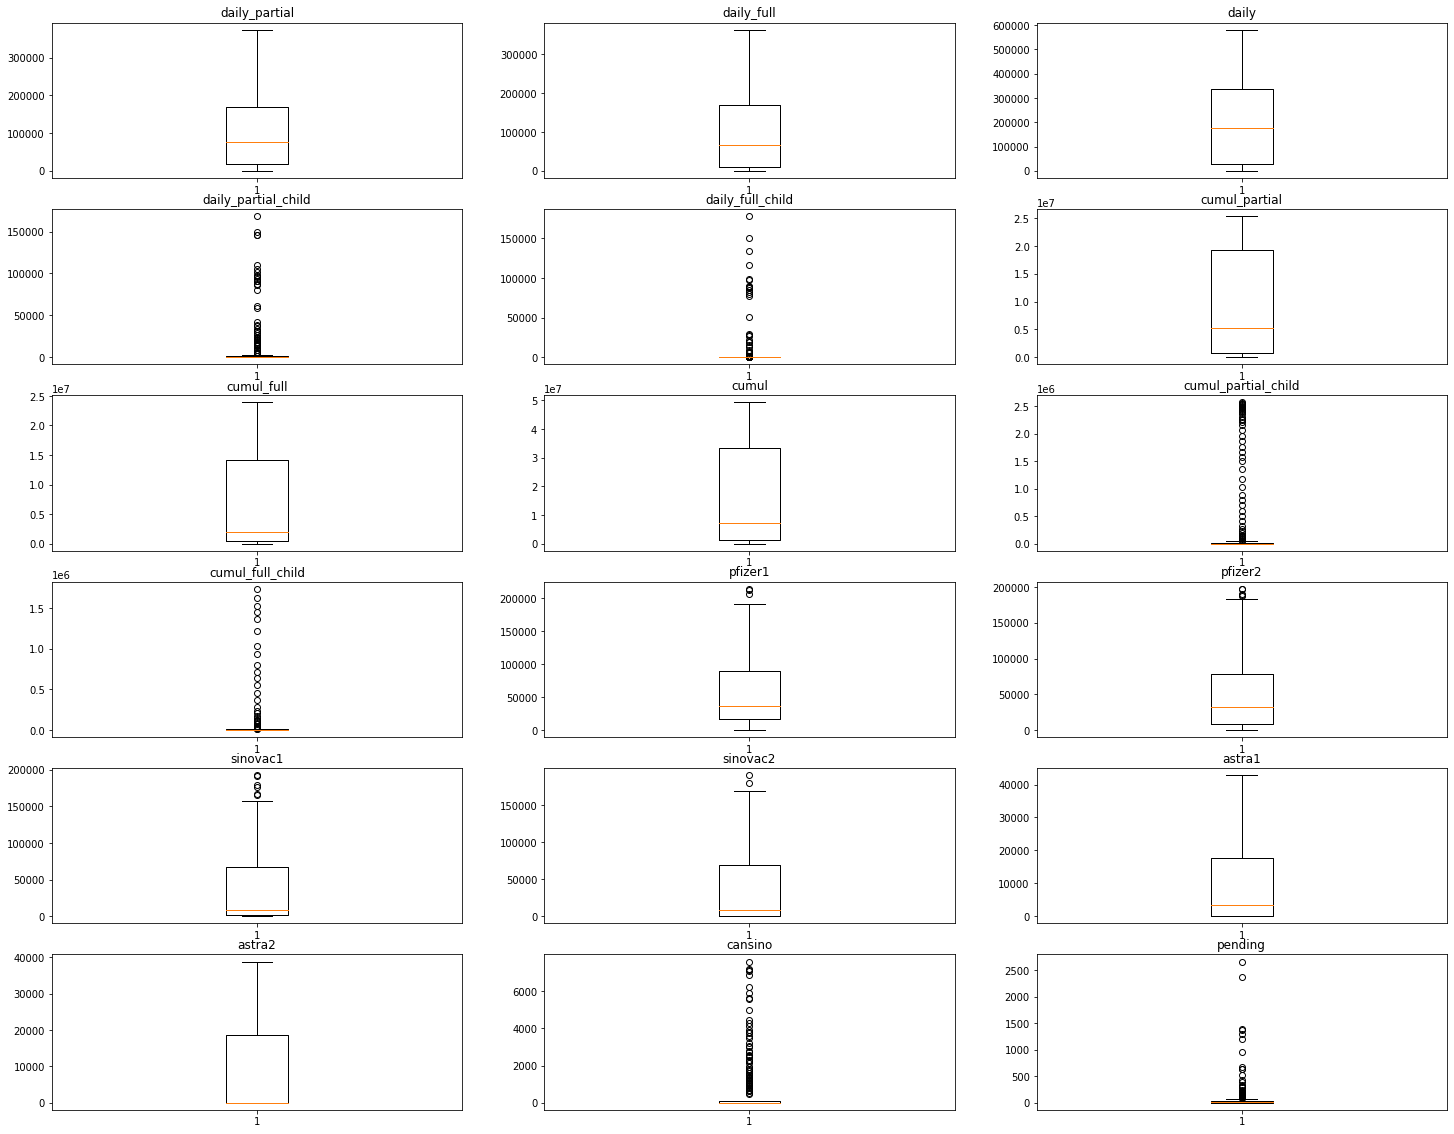

In [64]:
#Outlier Detection
vax_my_boxplot = vax_my.drop(columns=['date'])
plt.figure(figsize=(25,20))
plt.subplot(631),plt.boxplot(vax_my_boxplot.daily_partial),plt.title('daily_partial')
plt.subplot(632),plt.boxplot(vax_my_boxplot.daily_full),plt.title('daily_full')
plt.subplot(633),plt.boxplot(vax_my_boxplot.daily),plt.title('daily')
plt.subplot(634),plt.boxplot(vax_my_boxplot.daily_partial_child),plt.title('daily_partial_child')
plt.subplot(635),plt.boxplot(vax_my_boxplot.daily_full_child),plt.title('daily_full_child')
plt.subplot(636),plt.boxplot(vax_my_boxplot.cumul_partial),plt.title('cumul_partial')
plt.subplot(637),plt.boxplot(vax_my_boxplot.cumul_full),plt.title('cumul_full')
plt.subplot(638),plt.boxplot(vax_my_boxplot.cumul),plt.title('cumul')
plt.subplot(639),plt.boxplot(vax_my_boxplot.cumul_partial_child),plt.title('cumul_partial_child')
plt.subplot(6,3,10),plt.boxplot(vax_my_boxplot.cumul_full_child),plt.title('cumul_full_child')
plt.subplot(6,3,11),plt.boxplot(vax_my_boxplot.pfizer1),plt.title('pfizer1')
plt.subplot(6,3,12),plt.boxplot(vax_my_boxplot.pfizer2),plt.title('pfizer2')
plt.subplot(6,3,13),plt.boxplot(vax_my_boxplot.sinovac1),plt.title('sinovac1')
plt.subplot(6,3,14),plt.boxplot(vax_my_boxplot.sinovac2),plt.title('sinovac2')
plt.subplot(6,3,15),plt.boxplot(vax_my_boxplot.astra1),plt.title('astra1')
plt.subplot(6,3,16),plt.boxplot(vax_my_boxplot.astra2),plt.title('astra2')
plt.subplot(6,3,17),plt.boxplot(vax_my_boxplot.cansino),plt.title('cansino')
plt.subplot(6,3,18),plt.boxplot(vax_my_boxplot.pending),plt.title('pending')
plt.show()

In [65]:
vax_my

date  daily_partial  daily_full  ...  astra2  cansino  pending
0   2021-02-24             60           0  ...       0        0        0
1   2021-02-25           1146           0  ...       0        0        0
2   2021-02-26           4115           1  ...       0        0        0
3   2021-02-27           6723           1  ...       0        0        0
4   2021-02-28           6699           3  ...       0        0        0
..         ...            ...         ...  ...     ...      ...      ...
239 2021-10-21          30197      186362  ...   11223     1372     1381
240 2021-10-22          25743      113989  ...    6693     1388     1301
241 2021-10-23          11015       94354  ...    6226      469      642
242 2021-10-24           9831      106261  ...    6345      870     2364
243 2021-10-25          21927      140054  ...    5788      655     2662

[244 rows x 21 columns]

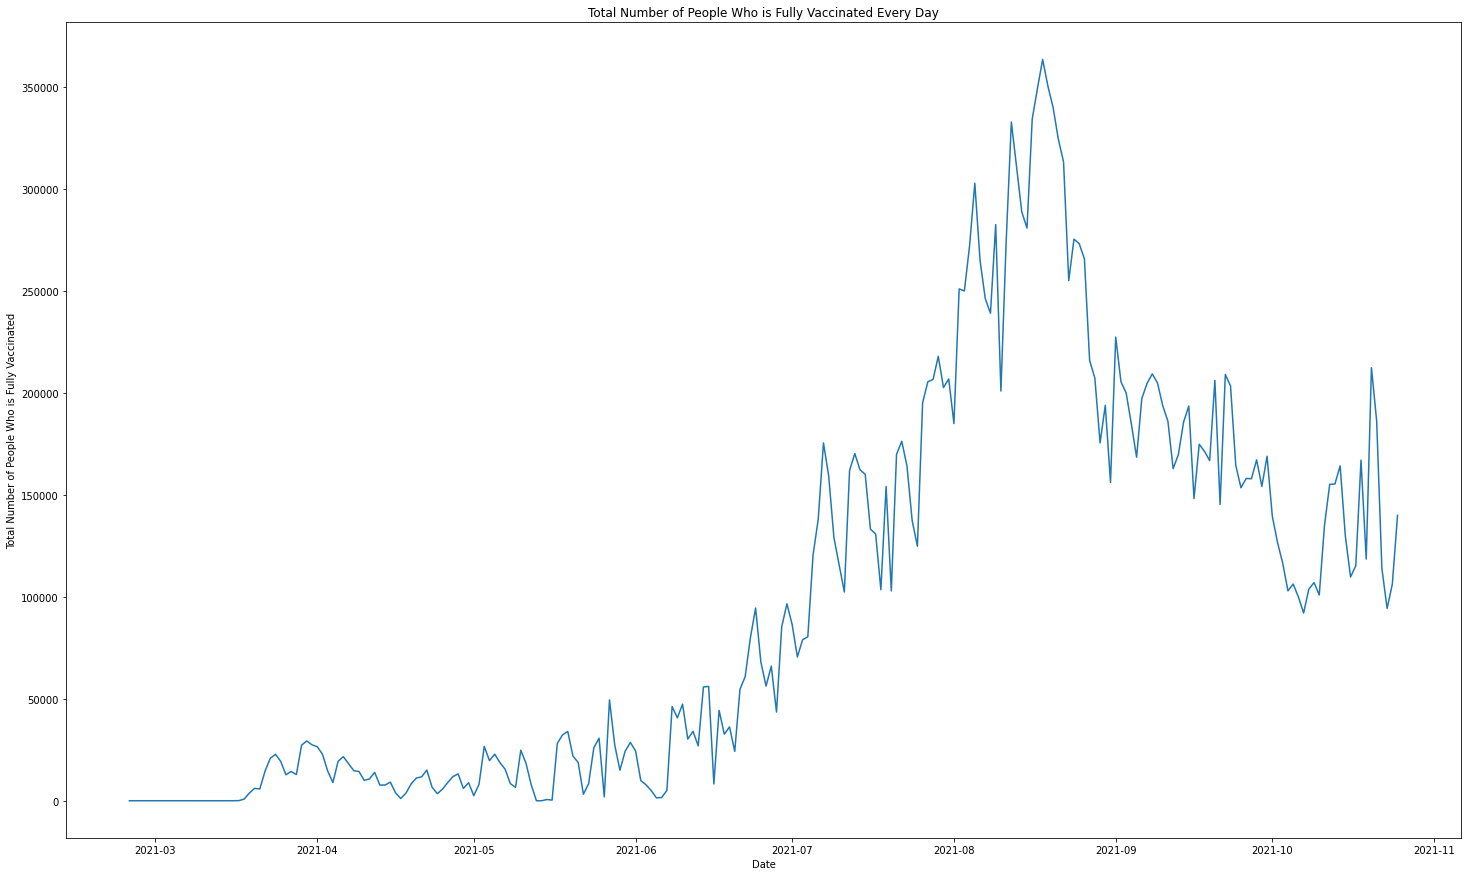

In [66]:
plt.figure(figsize=(25,15))
plt.plot(vax_my['date'], vax_my['daily_full'])
plt.xlabel('Date')
plt.ylabel('Total Number of People Who is Fully Vaccinated')
plt.title('Total Number of People Who is Fully Vaccinated Every Day')
plt.show()

### 1.5.2 Vaccination (State)

In [67]:
#read vax_state.csv
vax_state = pd.read_csv(path + 'Datasets/vax_state.csv')

#change to datetime format
vax_state['date']= pd.to_datetime(vax_state['date'])

##check for duplicates
#no duplicate row
print("Total duplicated rows:",sum(vax_state.duplicated()))

##deal with missing data
#no missing data
print("\nNumber of null values:\n",vax_state.isnull().sum().sort_values(ascending = True))

Total duplicated rows: 0

Number of null values:
 date                   0
astra2                 0
astra1                 0
sinovac2               0
sinovac1               0
pfizer2                0
pfizer1                0
cumul_booster          0
cumul_full_child       0
cumul_partial_child    0
cumul                  0
cumul_full             0
cumul_partial          0
daily_booster          0
daily_full_child       0
daily_partial_child    0
daily                  0
daily_full             0
daily_partial          0
state                  0
cansino                0
pending                0
dtype: int64


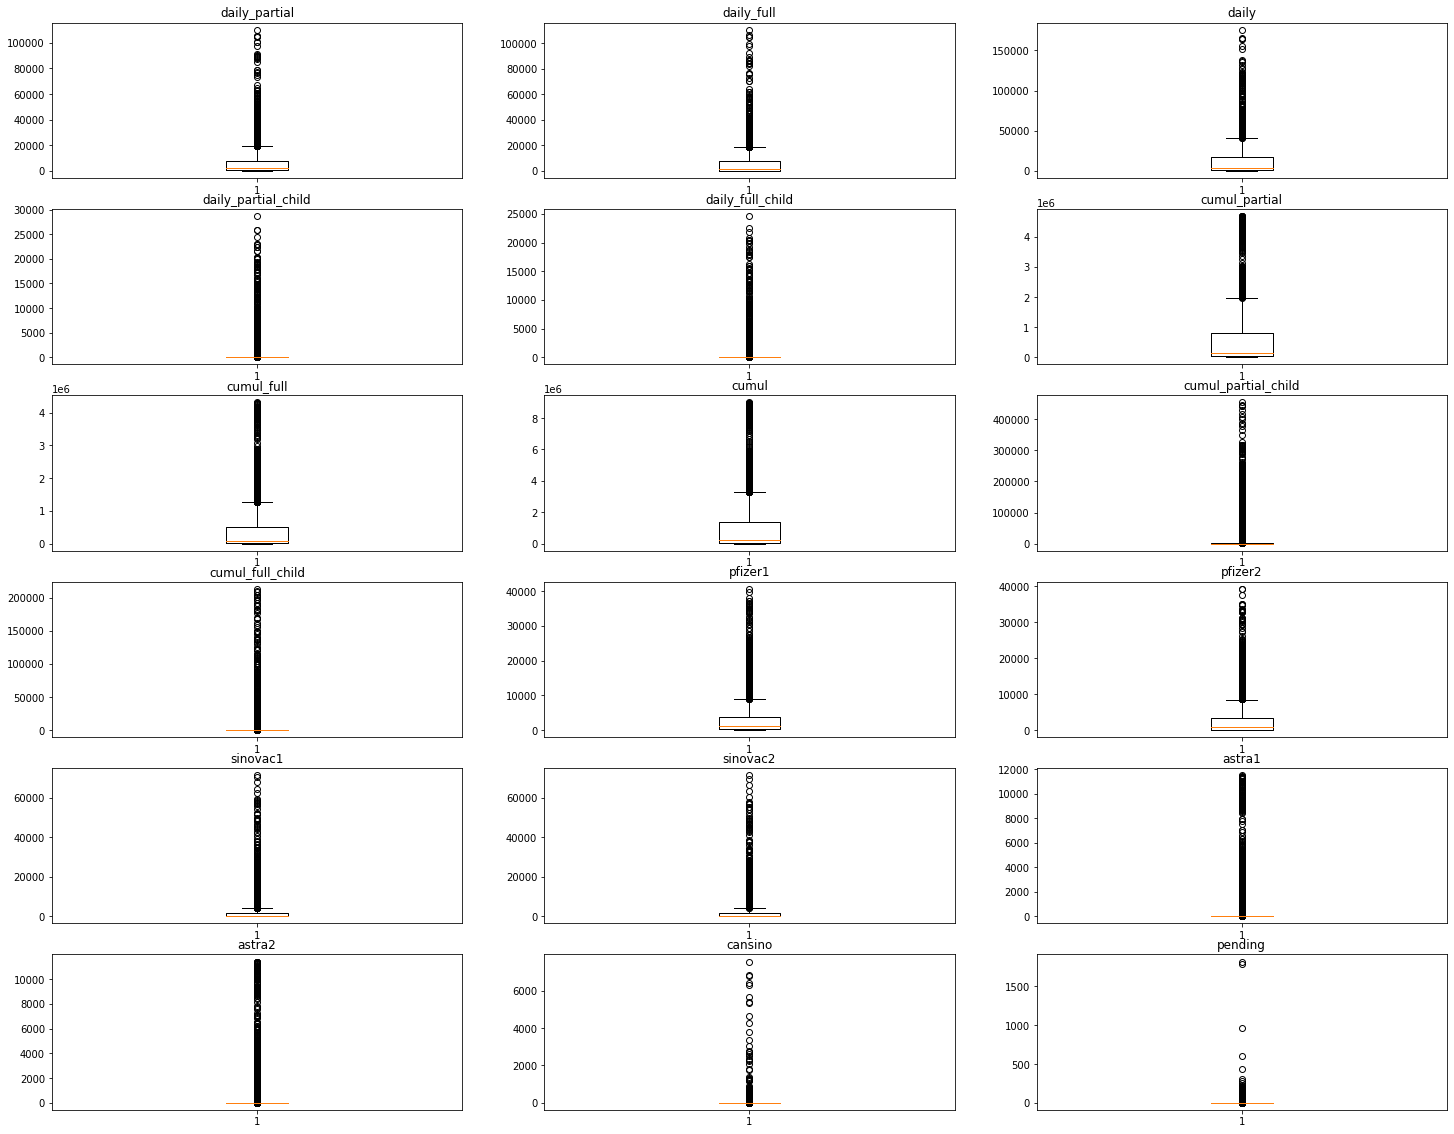

In [68]:
#Outlier Detection
vax_state_boxplot = vax_state.drop(columns=['date','state'])
plt.figure(figsize=(25,20))
plt.subplot(631),plt.boxplot(vax_state_boxplot.daily_partial),plt.title('daily_partial')
plt.subplot(632),plt.boxplot(vax_state_boxplot.daily_full),plt.title('daily_full')
plt.subplot(633),plt.boxplot(vax_state_boxplot.daily),plt.title('daily')
plt.subplot(634),plt.boxplot(vax_state_boxplot.daily_partial_child),plt.title('daily_partial_child')
plt.subplot(635),plt.boxplot(vax_state_boxplot.daily_full_child),plt.title('daily_full_child')
plt.subplot(636),plt.boxplot(vax_state_boxplot.cumul_partial),plt.title('cumul_partial')
plt.subplot(637),plt.boxplot(vax_state_boxplot.cumul_full),plt.title('cumul_full')
plt.subplot(638),plt.boxplot(vax_state_boxplot.cumul),plt.title('cumul')
plt.subplot(639),plt.boxplot(vax_state_boxplot.cumul_partial_child),plt.title('cumul_partial_child')
plt.subplot(6,3,10),plt.boxplot(vax_state_boxplot.cumul_full_child),plt.title('cumul_full_child')
plt.subplot(6,3,11),plt.boxplot(vax_state_boxplot.pfizer1),plt.title('pfizer1')
plt.subplot(6,3,12),plt.boxplot(vax_state_boxplot.pfizer2),plt.title('pfizer2')
plt.subplot(6,3,13),plt.boxplot(vax_state_boxplot.sinovac1),plt.title('sinovac1')
plt.subplot(6,3,14),plt.boxplot(vax_state_boxplot.sinovac2),plt.title('sinovac2')
plt.subplot(6,3,15),plt.boxplot(vax_state_boxplot.astra1),plt.title('astra1')
plt.subplot(6,3,16),plt.boxplot(vax_state_boxplot.astra2),plt.title('astra2')
plt.subplot(6,3,17),plt.boxplot(vax_state_boxplot.cansino),plt.title('cansino')
plt.subplot(6,3,18),plt.boxplot(vax_state_boxplot.pending),plt.title('pending')
plt.show()

In [69]:
vax_state

date              state  daily_partial  ...  astra2  cansino  pending
0    2021-02-24              Johor              0  ...       0        0        0
1    2021-02-24              Kedah              0  ...       0        0        0
2    2021-02-24           Kelantan              0  ...       0        0        0
3    2021-02-24             Melaka              0  ...       0        0        0
4    2021-02-24    Negeri Sembilan              0  ...       0        0        0
...         ...                ...            ...  ...     ...      ...      ...
3899 2021-10-25           Selangor          10108  ...     107       99      149
3900 2021-10-25         Terengganu            585  ...     222        0        6
3901 2021-10-25  W.P. Kuala Lumpur           2036  ...      17        4       43
3902 2021-10-25        W.P. Labuan             45  ...       0        0       18
3903 2021-10-25     W.P. Putrajaya            148  ...       0        0        1

[3904 rows x 22 columns]

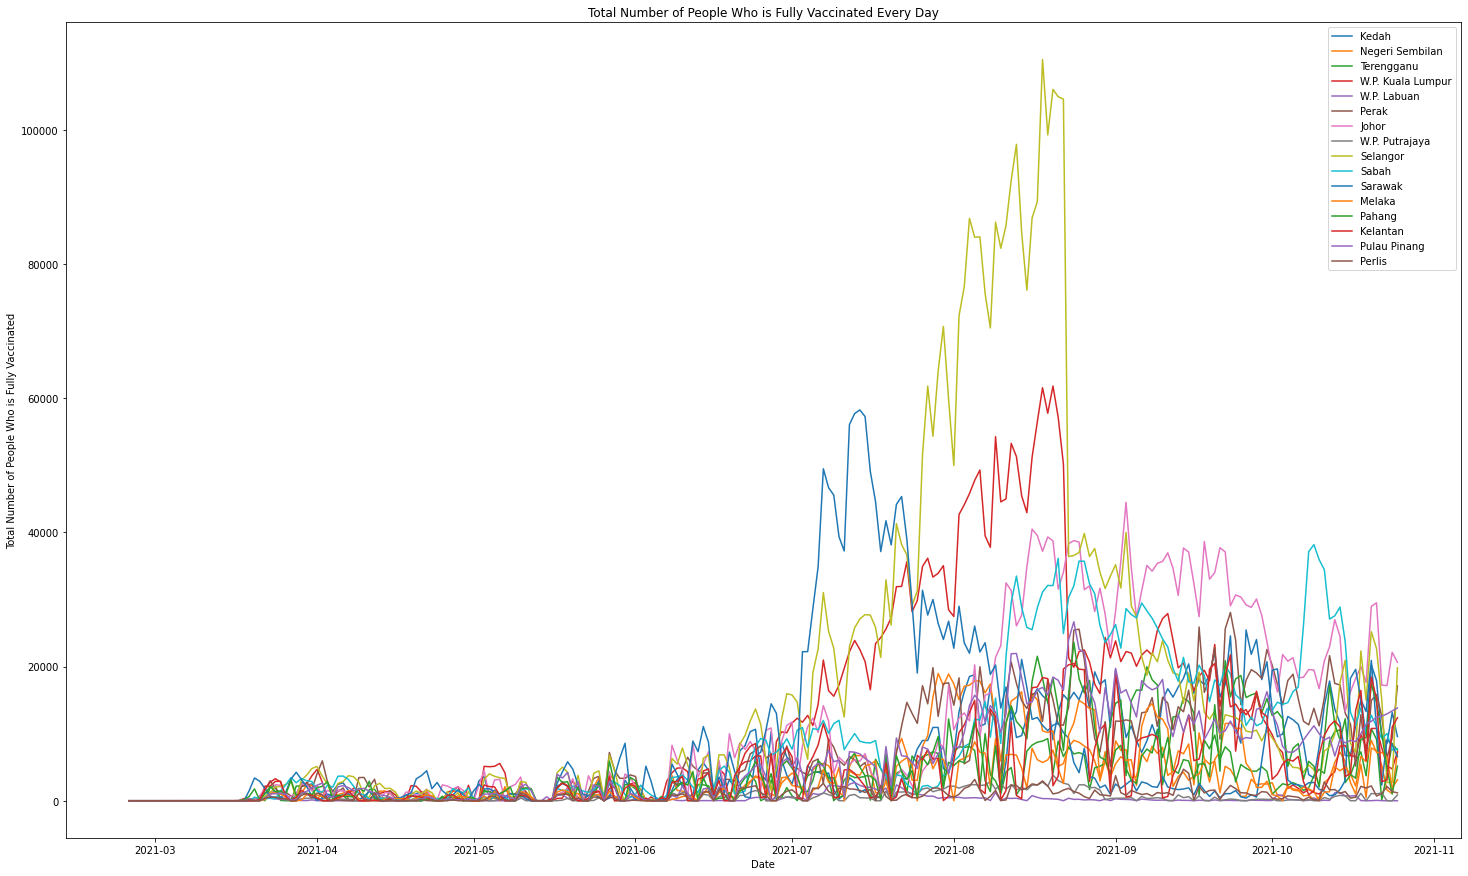

In [70]:
plt.figure(figsize=(25,15))
for i in m_state:
  x = vax_state[vax_state['state'] == i]
  plt.plot(x['date'], x['daily_full'], label = i)

plt.xlabel('Date')
plt.ylabel('Total Number of People Who is Fully Vaccinated')
plt.title('Total Number of People Who is Fully Vaccinated Every Day')
plt.legend()
plt.show()

## 1.6 Merged Dataframe


In [71]:
cases_test_death_merged = cases_tests_state.merge(final_death, on=['date','state'], how='inner')
merged_pkrc = cases_test_death_merged.merge(final_pkrc, on=['date','state'], how='inner')
merged_hospital = merged_pkrc.merge(final_hospital, on=['date','state'], how='inner')
merged_icu = merged_hospital.merge(final_icu, on=['date','state'], how='inner')
final_merged_state = merged_icu.merge(vax_state, on=['date','state'], how='inner')
final_merged_malaysia = merged_icu.groupby('date').agg('sum')
final_merged_malaysia = final_merged_malaysia.merge(vax_my, on=['date'], how='inner')
final_merged_malaysia
#final_merged_state

date  cases_new  cases_import  ...  astra2  cansino  pending
0   2021-02-24       3163             1  ...       0        0        0
1   2021-02-25       1704             3  ...       0        0        0
2   2021-02-26       2131             3  ...       0        0        0
3   2021-02-27       2243             0  ...       0        0        0
4   2021-02-28       2097             1  ...       0        0        0
..         ...        ...           ...  ...     ...      ...      ...
239 2021-10-21       5838            26  ...   11223     1372     1381
240 2021-10-22       6264             8  ...    6693     1388     1301
241 2021-10-23       5556             5  ...    6226      469      642
242 2021-10-24       5474            14  ...    6345      870     2364
243 2021-10-25       4593            11  ...    5788      655     2662

[244 rows x 79 columns]

Before continuing to the next section, we decided to merge all the dataframe we cleaned and explored into one dataframe called final_merged. The time frame of this dataframe is from 1/7/2021 to 21/9/2021. We choose this time frame is due to the cases and testing dataset only contains data from this time frame.

In [72]:
#Export csv
#final_merged_state.to_csv(path +'final_merged_state.csv', index = False, header=True)

In [73]:
#check for correlation
final_merged_malaysia.corr()

cases_new  cases_import  ...   cansino   pending
cases_new         1.000000      0.192669  ...  0.534020 -0.011776
cases_import      0.192669      1.000000  ...  0.086311  0.187763
cases_recovered   0.909394      0.185866  ...  0.690692  0.093880
cases_active      0.976613      0.204071  ...  0.617051  0.039860
cases_cluster     0.723576      0.069734  ...  0.099710 -0.267840
...                    ...           ...  ...       ...       ...
sinovac2          0.787063      0.176006  ...  0.162623 -0.101775
astra1            0.332185      0.064196  ... -0.210618 -0.182499
astra2            0.776149      0.260002  ...  0.549575  0.135791
cansino           0.534020      0.086311  ...  1.000000  0.129607
pending          -0.011776      0.187763  ...  0.129607  1.000000

[78 rows x 78 columns]

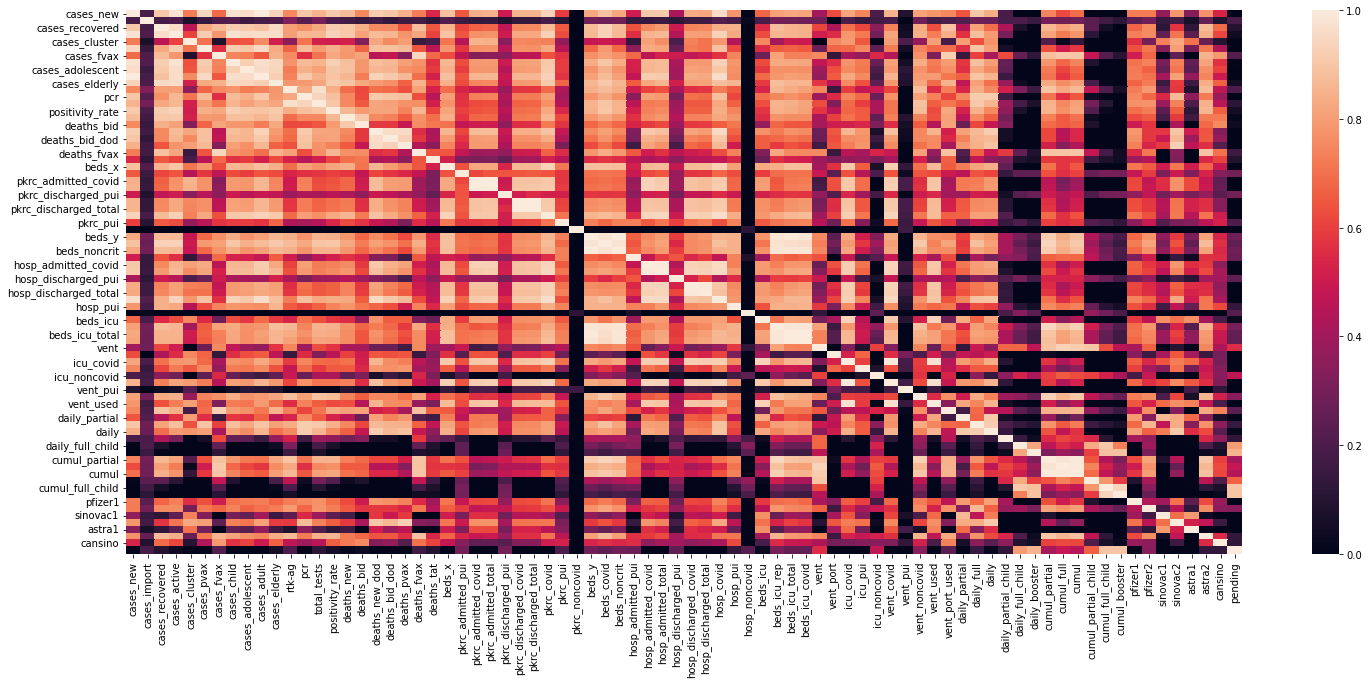

In [74]:
plt.figure(figsize=(25,10))
sns.heatmap(final_merged_malaysia.corr(), vmin=0, vmax=1)

We have plotted a correlation map to check the correlation of the new final_merged dataframe

In [75]:
#Aw
cases_tests_state_q2 = cases_tests_state.merge(final_death, on=['date','state'], how='inner')
cases = pd.pivot_table(cases_tests_state_q2, values='cases_new', index=['date'], columns=['state'])
recover = pd.pivot_table(cases_tests_state_q2, values='cases_recovered', index=['date'], columns=['state'])
tests = pd.pivot_table(cases_tests_state_q2, values='total_tests', index=['date'], columns=['state'])
death = pd.pivot_table(cases_tests_state_q2, values='deaths_new', index=['date'], columns=['state'])

In [76]:
cases

state       Johor  Kedah  ...  W.P. Labuan  W.P. Putrajaya
date                      ...                             
2020-03-17     25      2  ...            0               0
2020-03-18     13      6  ...            1               1
2020-03-19     13      4  ...            0               0
2020-03-20     13      1  ...            0               0
2020-03-21     16      6  ...            0               2
...           ...    ...  ...          ...             ...
2021-10-21    595    319  ...            2              29
2021-10-22    548    432  ...            2              44
2021-10-23    503    345  ...            3              20
2021-10-24    566    421  ...            7              30
2021-10-25    504    333  ...            0              13

[588 rows x 16 columns]

In [77]:
recover

state       Johor  Kedah  ...  W.P. Labuan  W.P. Putrajaya
date                      ...                             
2020-03-17      0      0  ...            0               0
2020-03-18      0      0  ...            0               0
2020-03-19      0      0  ...            0               0
2020-03-20      1      0  ...            0               0
2020-03-21      0      0  ...            0               0
...           ...    ...  ...          ...             ...
2021-10-21    958    506  ...            1              47
2021-10-22    838    430  ...            1              45
2021-10-23    846    342  ...            0              16
2021-10-24    694    398  ...            2              34
2021-10-25   1633    576  ...            1              37

[588 rows x 16 columns]

In [78]:
tests

state         Johor   Kedah  ...  W.P. Labuan  W.P. Putrajaya
date                         ...                             
2020-03-17      0.0     0.0  ...          0.0             0.0
2020-03-18      0.0     0.0  ...          0.0             0.0
2020-03-19      0.0     0.0  ...          0.0             0.0
2020-03-20      0.0     0.0  ...          0.0             0.0
2020-03-21      0.0     0.0  ...          0.0             0.0
...             ...     ...  ...          ...             ...
2021-10-21  17741.0  6432.0  ...       1145.0           661.0
2021-10-22  17006.0  4684.0  ...       1256.0           781.0
2021-10-23      0.0     0.0  ...          0.0             0.0
2021-10-24      0.0     0.0  ...          0.0             0.0
2021-10-25      0.0     0.0  ...          0.0             0.0

[588 rows x 16 columns]

In [79]:
death

state       Johor  Kedah  ...  W.P. Labuan  W.P. Putrajaya
date                      ...                             
2020-03-17      1      0  ...            0               0
2020-03-18      0      0  ...            0               0
2020-03-19      0      0  ...            0               0
2020-03-20      0      0  ...            0               0
2020-03-21      0      0  ...            0               0
...           ...    ...  ...          ...             ...
2021-10-21      8      1  ...            0               0
2021-10-22      9      6  ...            0               0
2021-10-23      2      0  ...            0               0
2021-10-24      5      8  ...            0               0
2021-10-25     20      2  ...            0               0

[588 rows x 16 columns]

## 1.7 Additional Datasets

This additional dataset is mainly used for association rule mining.

In [80]:
symptoms= pd.read_csv(path + 'Datasets/COVID Dataset.csv')
symptoms

Breathing Problem Fever  ... Sanitization from Market COVID-19
0                  Yes   Yes  ...                       No      Yes
1                  Yes   Yes  ...                       No      Yes
2                  Yes   Yes  ...                       No      Yes
3                  Yes   Yes  ...                       No      Yes
4                  Yes   Yes  ...                       No      Yes
...                ...   ...  ...                      ...      ...
5429               Yes   Yes  ...                       No      Yes
5430               Yes   Yes  ...                       No      Yes
5431               Yes   Yes  ...                       No       No
5432               Yes   Yes  ...                       No       No
5433               Yes   Yes  ...                       No       No

[5434 rows x 21 columns]

In [81]:
##check for duplicates
#no duplicate row
print("Total duplicated rows:",sum(symptoms.duplicated()))

##deal with missing data
#no missing data
print("\nNumber of null values:\n",symptoms.isnull().sum().sort_values(ascending = True))

Total duplicated rows: 4968

Number of null values:
 Breathing Problem                          0
Wearing Masks                              0
Family working in Public Exposed Places    0
Visited Public Exposed Places              0
Attended Large Gathering                   0
Contact with COVID Patient                 0
Abroad travel                              0
Gastrointestinal                           0
Fatigue                                    0
Sanitization from Market                   0
Hyper Tension                              0
Heart Disease                              0
Headache                                   0
Chronic Lung Disease                       0
Asthma                                     0
Running Nose                               0
Sore throat                                0
Dry Cough                                  0
Fever                                      0
Diabetes                                   0
COVID-19                                   0
dt

No duplicated rows and missing data has been found.

## 1.8 Project Findings

### 1.8.1 Finding 1

Question 1: Which age group contributes the highest number of COVID-19 cases?

In [82]:
q8_cases_malaysia = cases_malaysia[['date','cases_child','cases_adolescent','cases_adult','cases_elderly']]


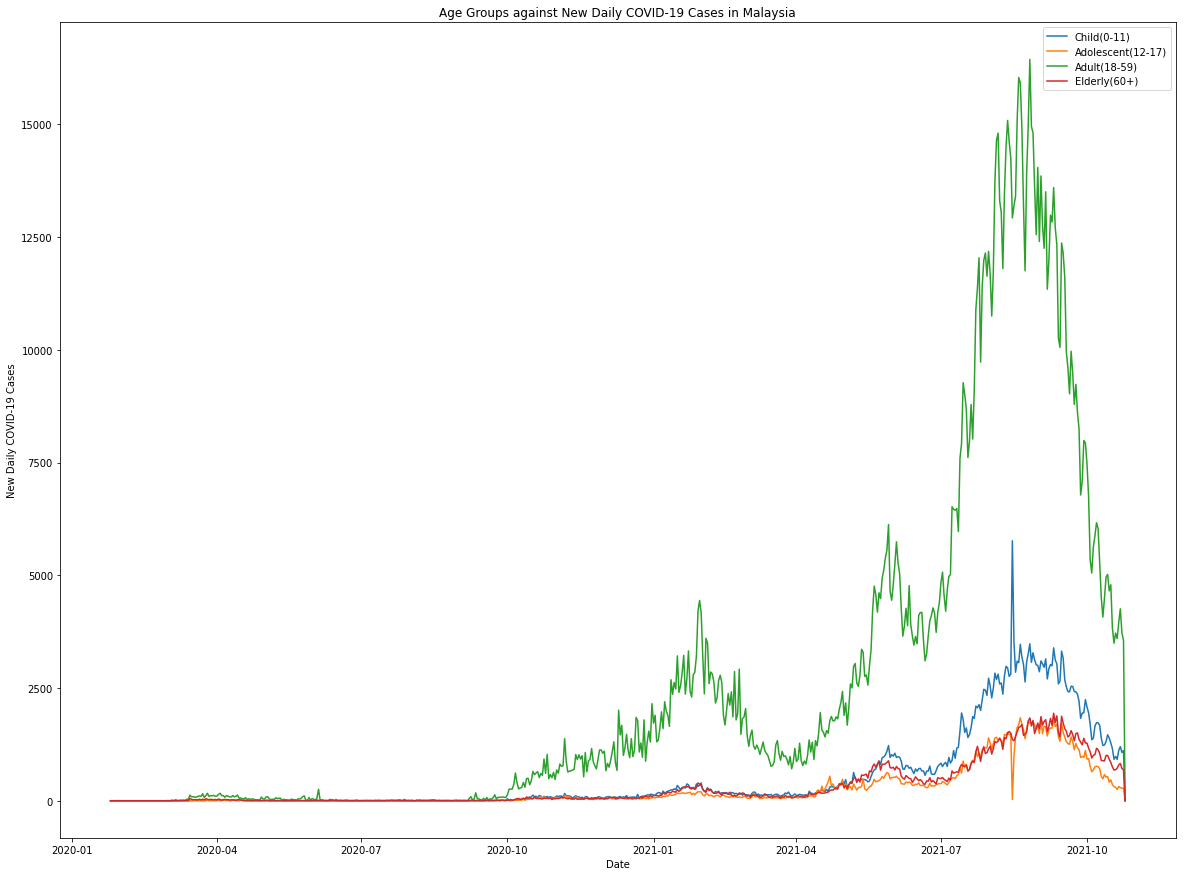

In [83]:
plt.figure(figsize=(20,15))
x = q8_cases_malaysia['date']
y1 = q8_cases_malaysia['cases_child']
y2 = q8_cases_malaysia['cases_adolescent']
y3 = q8_cases_malaysia['cases_adult']
y4 = q8_cases_malaysia['cases_elderly']
plt.plot(x, y1, label = "Child(0-11)")
plt.plot(x, y2, label = "Adolescent(12-17)")
plt.plot(x, y3, label = "Adult(18-59)")
plt.plot(x, y4, label = "Elderly(60+)")
plt.xlabel('Date')
plt.ylabel('New Daily COVID-19 Cases')
plt.title('Age Groups against New Daily COVID-19 Cases in Malaysia')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

States

In [84]:
q8_cases_states = cases_tests_state[['date','state','cases_child','cases_adolescent','cases_adult','cases_elderly']]
q8_cases_states

date              state  ...  cases_adult  cases_elderly
0     2020-01-25              Johor  ...          1.0            0.0
1     2020-01-25              Kedah  ...          0.0            0.0
2     2020-01-25           Kelantan  ...          0.0            0.0
3     2020-01-25             Melaka  ...          0.0            0.0
4     2020-01-25    Negeri Sembilan  ...          0.0            0.0
...          ...                ...  ...          ...            ...
10235 2021-10-25           Selangor  ...          0.0            0.0
10236 2021-10-25         Terengganu  ...          0.0            0.0
10237 2021-10-25  W.P. Kuala Lumpur  ...          0.0            0.0
10238 2021-10-25        W.P. Labuan  ...          0.0            0.0
10239 2021-10-25     W.P. Putrajaya  ...          0.0            0.0

[10240 rows x 6 columns]

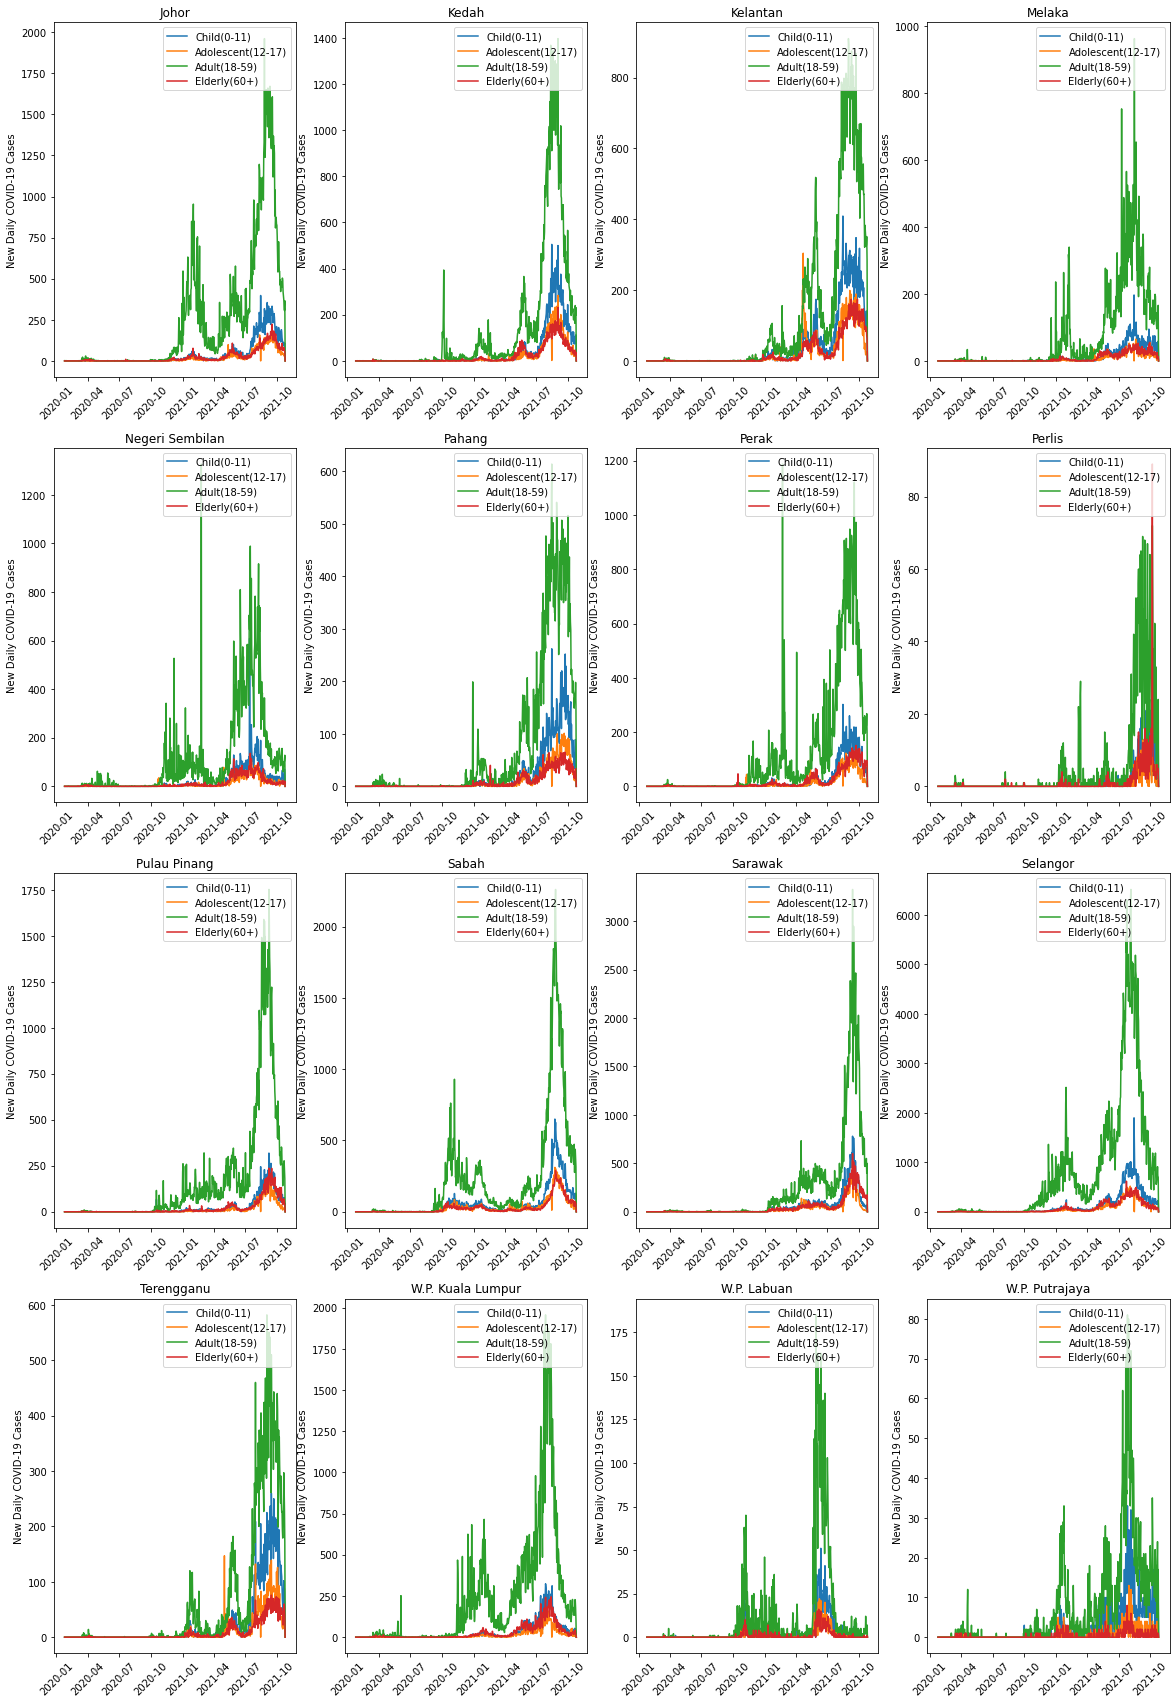

In [85]:
fig, ax = plt.subplots(4, 4, figsize=(20,30))

for i, state in enumerate(pd.unique(cases_tests_state['state'])):
    df_state = cases_tests_state[cases_tests_state['state'] == state]
    ax[i//4][i%4].plot(df_state['date'], df_state['cases_child'],df_state['date'], df_state['cases_adolescent'], df_state['date'], df_state['cases_adult'], df_state['date'], df_state['cases_elderly'])   
    ax[i//4][i%4].set_title(state)
    ax[i//4][i%4].set_ylabel('New Daily COVID-19 Cases')
    ax[i//4][i%4].legend(['Child(0-11)', 'Adolescent(12-17)','Adult(18-59)','Elderly(60+)'], loc="upper right")
    ax[i//4][i%4].xaxis.set_tick_params(rotation=45)
plt.show()

Based on the graph above, it can be seen that adults have contributed the highest number of COVID-19 cases, followed by the children. This is because adults have the highest risk being infected by coronavirus as majority of the working adults work in areas at high risk for exposure to the coronavirus. College students who stay in the campus can be affected by campus outbreaks and spread the coronavirus when they return home. Children have contributed the second hghest number of COVID-19 cases. This may be due to the weak immune system of the individuals especially the babies.

### 1.8.2 Finding 2

**Question 2 <br/>**
Which vaccine is the most widely used in Malaysia?

In [86]:
vax_my

date  daily_partial  daily_full  ...  astra2  cansino  pending
0   2021-02-24             60           0  ...       0        0        0
1   2021-02-25           1146           0  ...       0        0        0
2   2021-02-26           4115           1  ...       0        0        0
3   2021-02-27           6723           1  ...       0        0        0
4   2021-02-28           6699           3  ...       0        0        0
..         ...            ...         ...  ...     ...      ...      ...
239 2021-10-21          30197      186362  ...   11223     1372     1381
240 2021-10-22          25743      113989  ...    6693     1388     1301
241 2021-10-23          11015       94354  ...    6226      469      642
242 2021-10-24           9831      106261  ...    6345      870     2364
243 2021-10-25          21927      140054  ...    5788      655     2662

[244 rows x 21 columns]

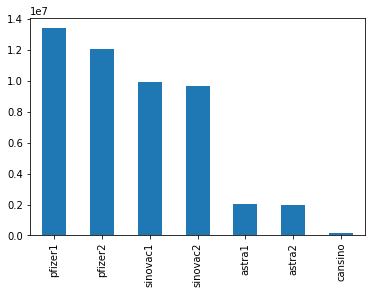

In [87]:
# pfizer, sinovac, astra, cansino
vax = vax_my[['pfizer1', 'pfizer2', 'sinovac1', 'sinovac2', 'astra1', 'astra2', 'cansino']]
vax.cumsum().iloc[-1].plot(kind='bar')

### 1.8.3 Finding 3

**Question 3 <br/>**
Is there any correlation between vaccination and daily cases for Malaysia and every states in Malaysia?



(<matplotlib.axes._subplots.AxesSubplot at 0x7f329fcee4d0>,
 Text(0.5, 1.0, 'Malaysia'))

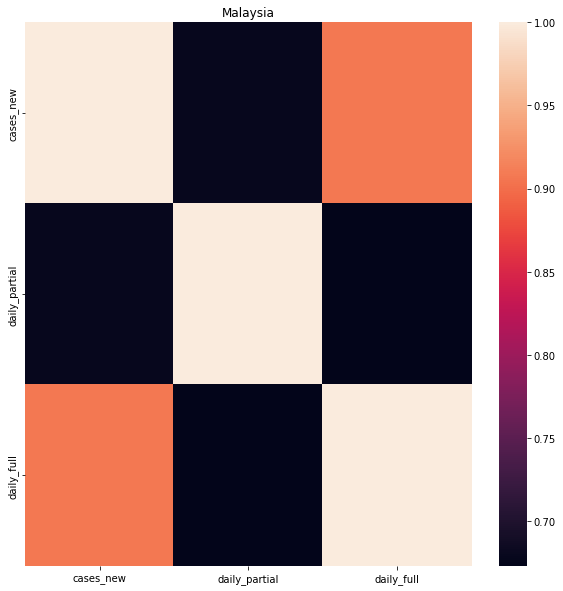

In [88]:
#Malaysia - All
cases_malaysia['date']= pd.to_datetime(cases_malaysia['date'])

q4_cases = cases_malaysia[cases_malaysia['date'] > '2021-02-23']
q4_cases_my = q4_cases[['date','cases_new']].copy()
q4_cases_my = q4_cases_my.reset_index(drop=True)

q4_vax_my = vax_my[['daily_partial', 'daily_full']].copy()

q4_my = pd.concat([q4_cases_my,q4_vax_my], axis=1)
corr_my = q4_my.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_my),plt.title('Malaysia')

The cases_new is highly correlated to daily_partial and daily_full. This indicates that the vaccine can affects the number of daily new cases in Malaysia

(<matplotlib.axes._subplots.AxesSubplot at 0x7f32a0ac3a10>,
 Text(0.5, 1.0, 'Malaysia-Child'))

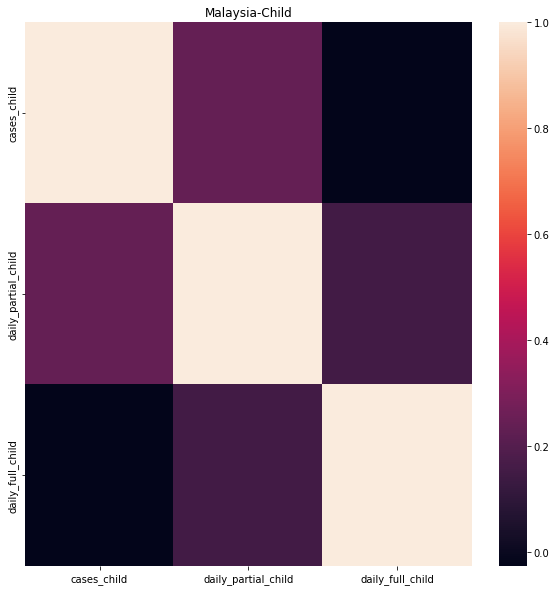

In [89]:
#Malaysia - Child
q4_cases_my_child = q4_cases[['date','cases_child']].copy()
q4_cases_my_child['cases_child'] = q4_cases_my_child['cases_child'].fillna(0)
q4_cases_my_child = q4_cases_my_child.reset_index(drop=True)

q4_vax_my_child = vax_my[['daily_partial_child', 'daily_full_child']].copy()

q4_my_child = pd.concat([q4_cases_my_child,q4_vax_my_child], axis=1)
corr_child = q4_my_child.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_child),plt.title('Malaysia-Child')

The cases_child is not highly correlated as shown in the graph above. This may due to the child vaccination just started so there is less child got vaccinated. There are not much data to support the correlation between the daily new case and vaccination of the child.

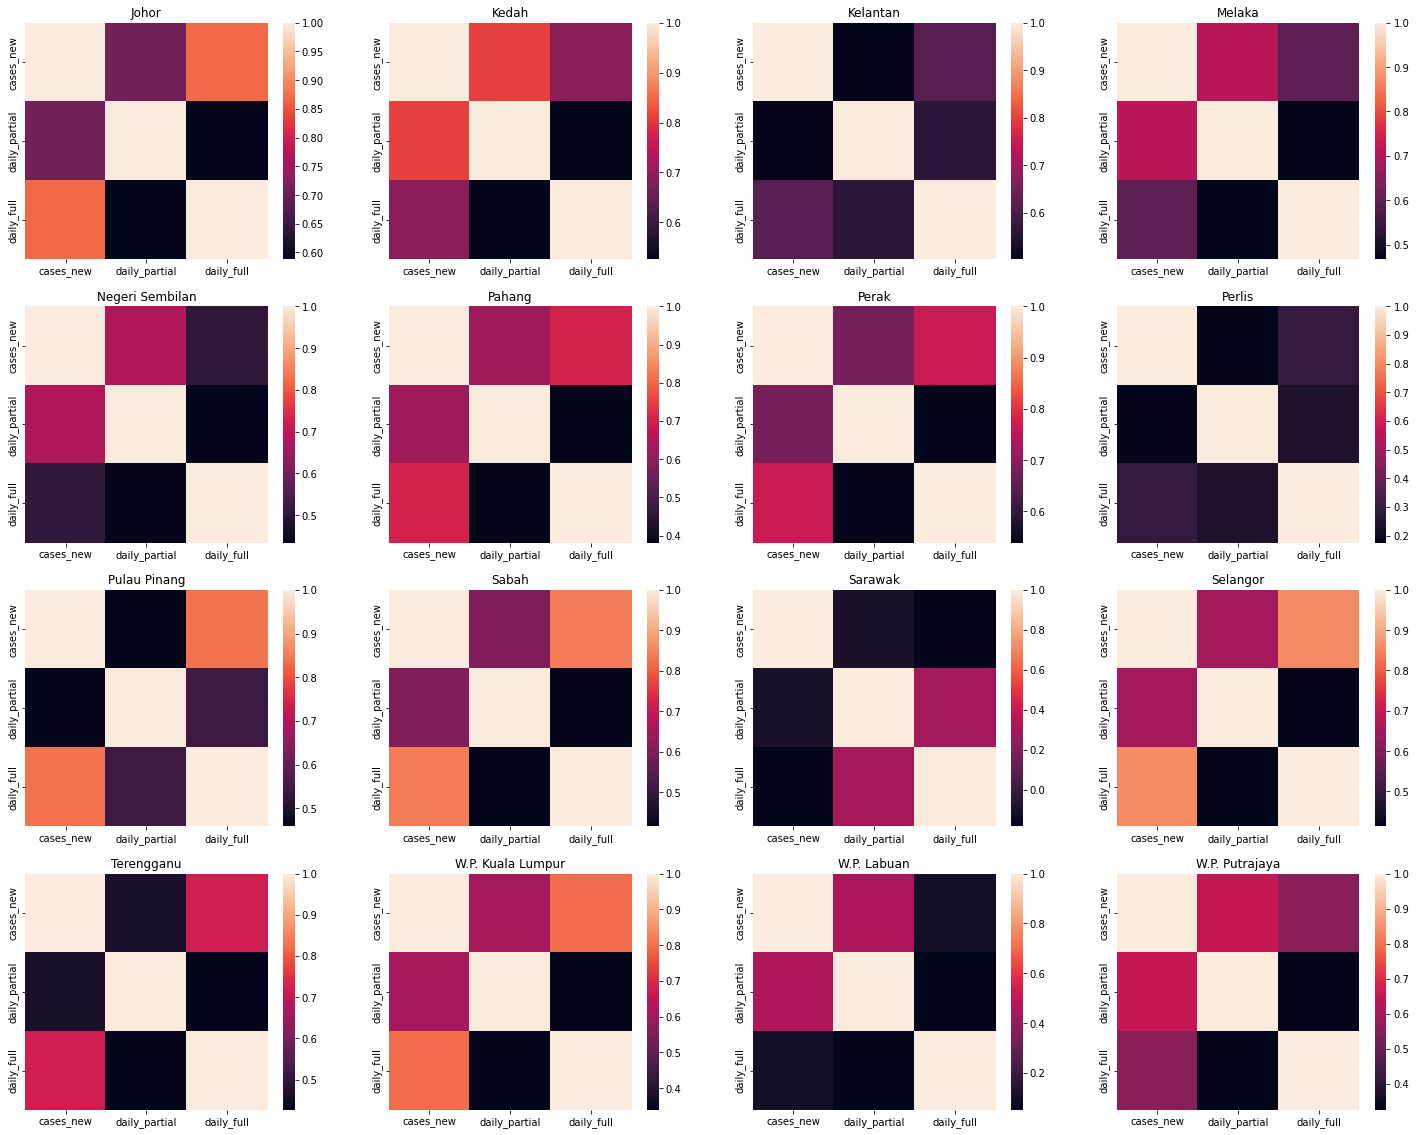

In [90]:
#States - All
states = ['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 
          'Sabah', 'Sarawak', 'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan', 'W.P. Putrajaya']
cases_state['date']= pd.to_datetime(cases_state['date'])

q4_cases = cases_state[cases_state['date'] > '2021-02-23']
q4_cases_daily = q4_cases[['date','state','cases_new']].copy()
q4_cases_daily = q4_cases_daily.reset_index(drop=True)

q4_vax_daily = vax_state[['daily_partial', 'daily_full']].copy()

q4_daily = pd.concat([q4_cases_daily,q4_vax_daily], axis=1)

q4_states = []
for i in states:
    q4_temp = q4_daily[q4_daily['state'] == i]
    q4_temp = q4_temp.corr()
    q4_states.append(q4_temp)

plt.figure(figsize=(25,20))
x = 1
for i in range(16):
    plt.subplot(4,4,x),sns.heatmap(q4_states[i]),plt.title(states[i])
    x = x+1

In general, the daily new cases correlates with the number of vaccination except for Perlis and Sarawak. Perlis has a lower number of daily new cases so it may affects the correlation. On the other hand, Sarawak has a lower vaccination rate hence the correlation between daily new cases and daily_full is low

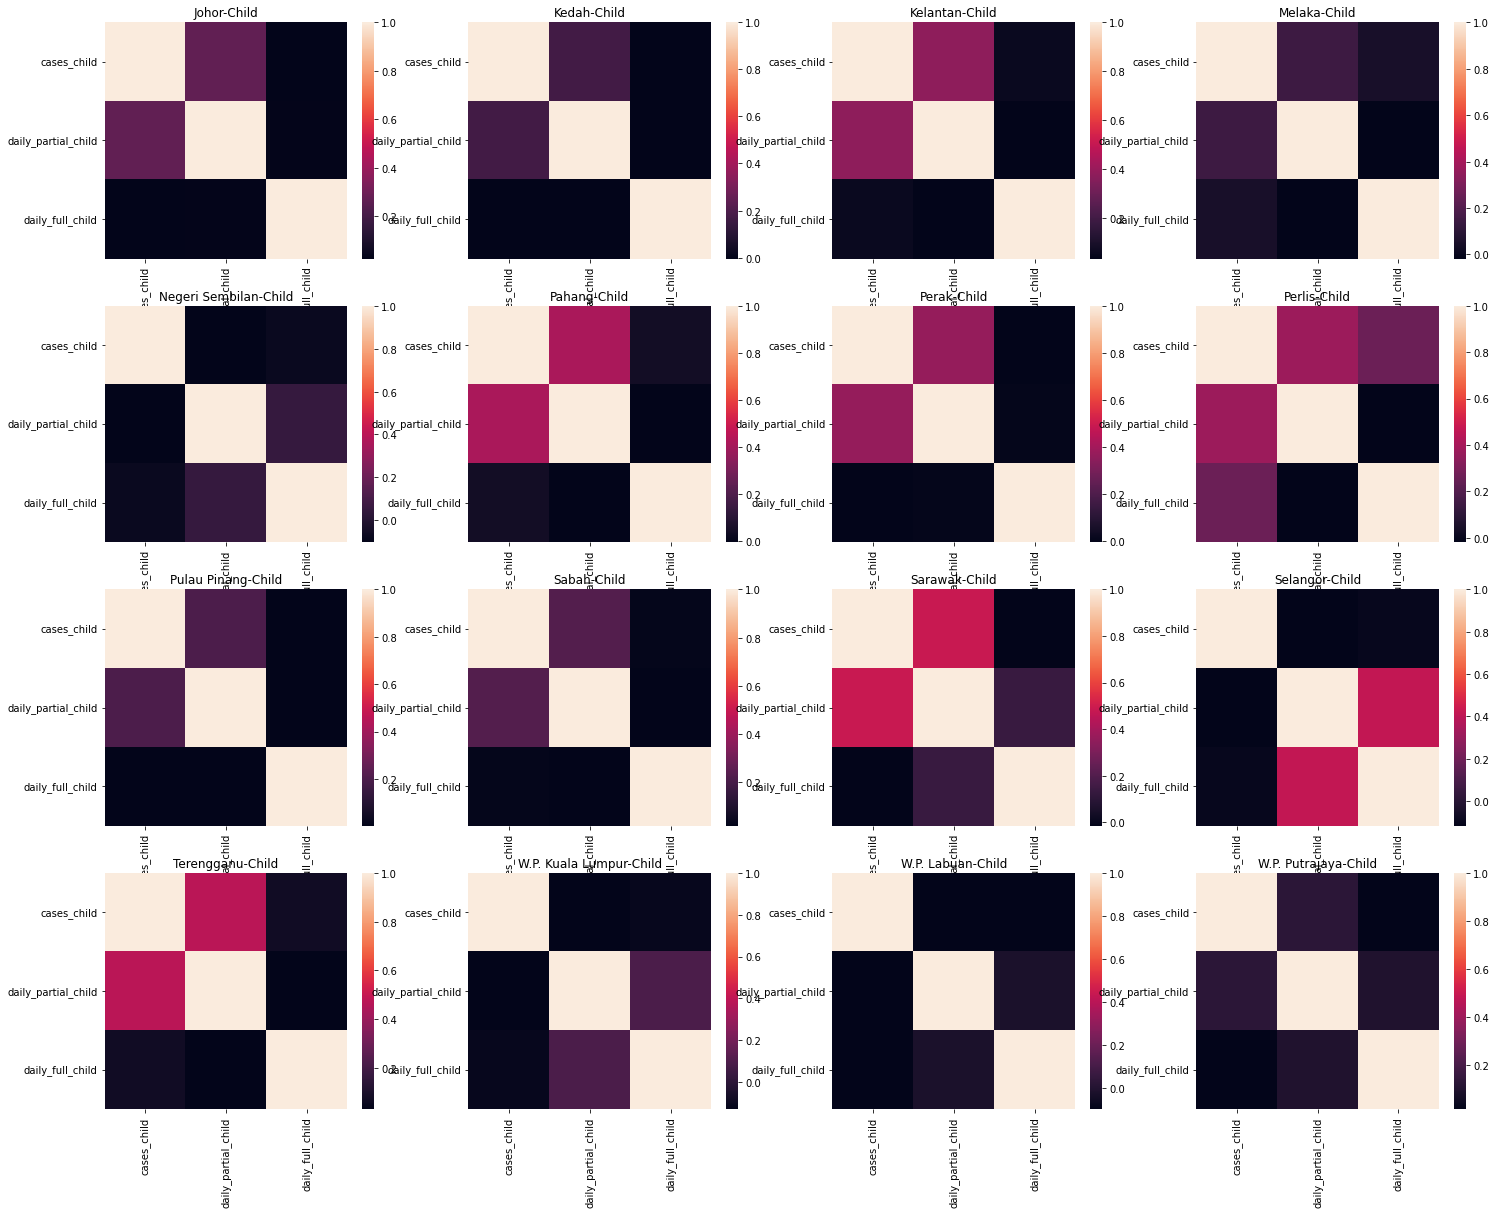

In [91]:
#States - Child Only
q4_cases_daily_child = q4_cases[['date','state','cases_child']].copy()
q4_cases_daily_child['cases_child'] = q4_cases_daily_child['cases_child'].fillna(0)
q4_cases_daily_child = q4_cases_daily_child.reset_index(drop=True)

q4_vax_daily_child = vax_state[['daily_partial_child', 'daily_full_child']].copy()

q4_daily_child = pd.concat([q4_cases_daily_child,q4_vax_daily_child], axis=1)

q4_states_child = []
for i in states:
    q4_temp = q4_daily_child[q4_daily_child['state'] == i]
    q4_temp = q4_temp.corr()
    q4_states_child.append(q4_temp)

plt.figure(figsize=(25,20))
x = 1
for i in range(16):
    plt.subplot(4,4,x),sns.heatmap(q4_states_child[i]),plt.title(states[i] + '-Child')
    x = x+1

In general, new case of children COVID-19 does not correlated in the state level. This shows the same results as the national level as the child vaccination programme just started. Hence, there is not much of data to support the correlation.

### 1.8.4 Finding 4

Question 4: Has vaccination helped reduce the daily cases? What states have shown the effect of vaccination?

In [92]:
q6_vax_my = vax_my[['date','daily_partial', 'daily_full','daily','cumul_partial','cumul_full']]
q6_cases_malaysia = cases_malaysia[['date','cases_new']]
q6_merge_my = q6_cases_malaysia.merge(q6_vax_my, on=['date'], how='inner')
q6_merge_my

date  cases_new  daily_partial  ...   daily  cumul_partial  cumul_full
0   2021-02-24       3545             60  ...      60             60           0
1   2021-02-25       1924           1146  ...    1146           1206           0
2   2021-02-26       2253           4115  ...    4116           5321           1
3   2021-02-27       2364           6723  ...    6724          12044           2
4   2021-02-28       2437           6699  ...    6702          18743           5
..         ...        ...            ...  ...     ...            ...         ...
239 2021-10-21       6210          30197  ...  235607       25317037    23451810
240 2021-10-22       6630          25743  ...  157999       25344168    23565799
241 2021-10-23       5828          11015  ...  113547       25355652    23660153
242 2021-10-24       5666           9831  ...  124530       25366353    23766414
243 2021-10-25       4782          21927  ...  184162       25388935    23906468

[244 rows x 7 columns]

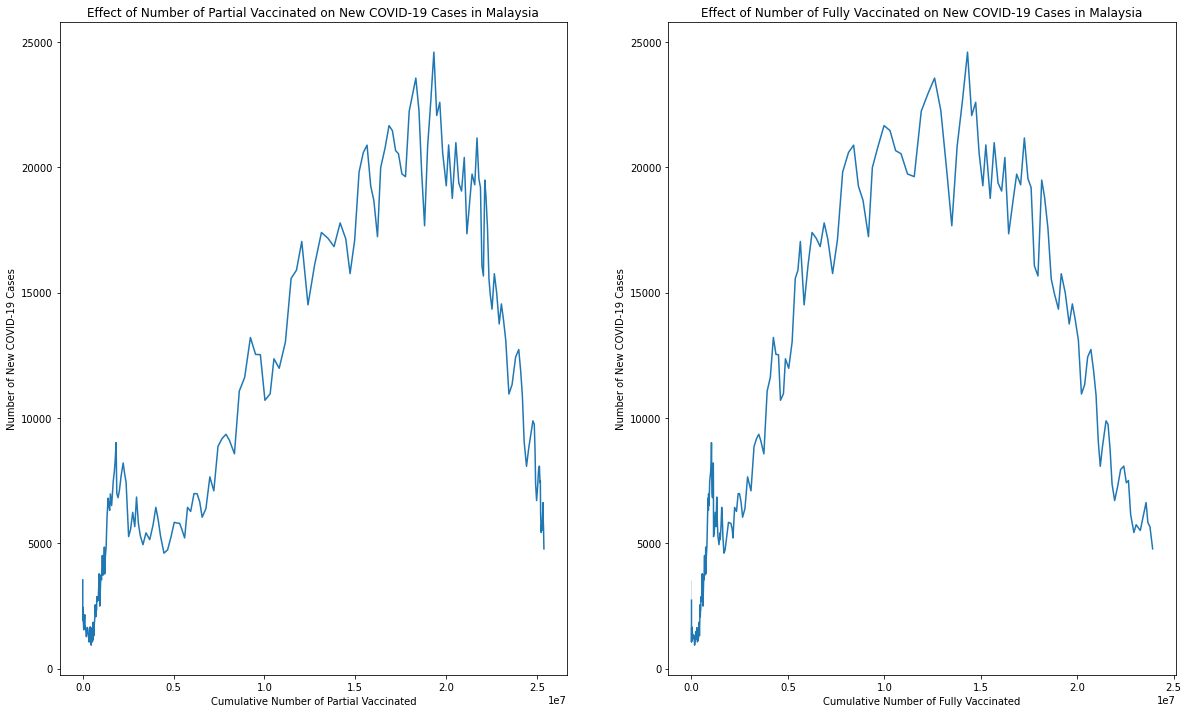

In [93]:
plt.figure(figsize=(20,12))
plt.subplot(121),sns.lineplot(x="cumul_partial", y="cases_new",data=q6_merge_my)
plt.subplot(121),plt.title('Effect of Number of Partial Vaccinated on New COVID-19 Cases in Malaysia')
plt.subplot(121),plt.xlabel('Cumulative Number of Partial Vaccinated')
plt.subplot(121),plt.ylabel('Number of New COVID-19 Cases')

plt.subplot(122),sns.lineplot(x="cumul_full", y="cases_new",data=q6_merge_my)
plt.subplot(122),plt.title('Effect of Number of Fully Vaccinated on New COVID-19 Cases in Malaysia')
plt.subplot(122),plt.xlabel('Cumulative Number of Fully Vaccinated')
plt.subplot(122),plt.ylabel('Number of New COVID-19 Cases')
plt.show()

Based on the graph above, it can be seen that total number of new COVID-19 cases have started to reduce after a certain number of vaccinated people has been reached. This has proven that vaccine is effective against COVID-19 and helps to reduce the number of COVID-19 cases. Besides, individuals may not have the best protection until 7–14 days after their second dose of the vaccine. Therefore, the total number of new COVID-19 cases does not drop immediately.

State

In [94]:
q6_cases_states = cases_tests_state[['date','state','cases_new']]
q6_vax_states = vax_state[['date','state','daily_partial', 'daily_full','daily','cumul_partial','cumul_full']]
q6_merge_state = q6_cases_states.merge(q6_vax_states, on=['date','state'], how='inner')
q6_merge_state

date              state  cases_new  ...  daily  cumul_partial  cumul_full
0    2021-02-24              Johor        318  ...      0              0           0
1    2021-02-24              Kedah         17  ...      0              0           0
2    2021-02-24           Kelantan         53  ...      0              0           0
3    2021-02-24             Melaka         26  ...      0              0           0
4    2021-02-24    Negeri Sembilan       1392  ...      0              0           0
...         ...                ...        ...  ...    ...            ...         ...
3899 2021-10-25           Selangor        756  ...  31391        4685507     4311254
3900 2021-10-25         Terengganu        298  ...   8920         874469      816438
3901 2021-10-25  W.P. Kuala Lumpur        176  ...  11978        3012593     2898813
3902 2021-10-25        W.P. Labuan          0  ...    177          81669       76118
3903 2021-10-25     W.P. Putrajaya         13  ...   1099         146682      135766

[3904 rows x 8 columns]

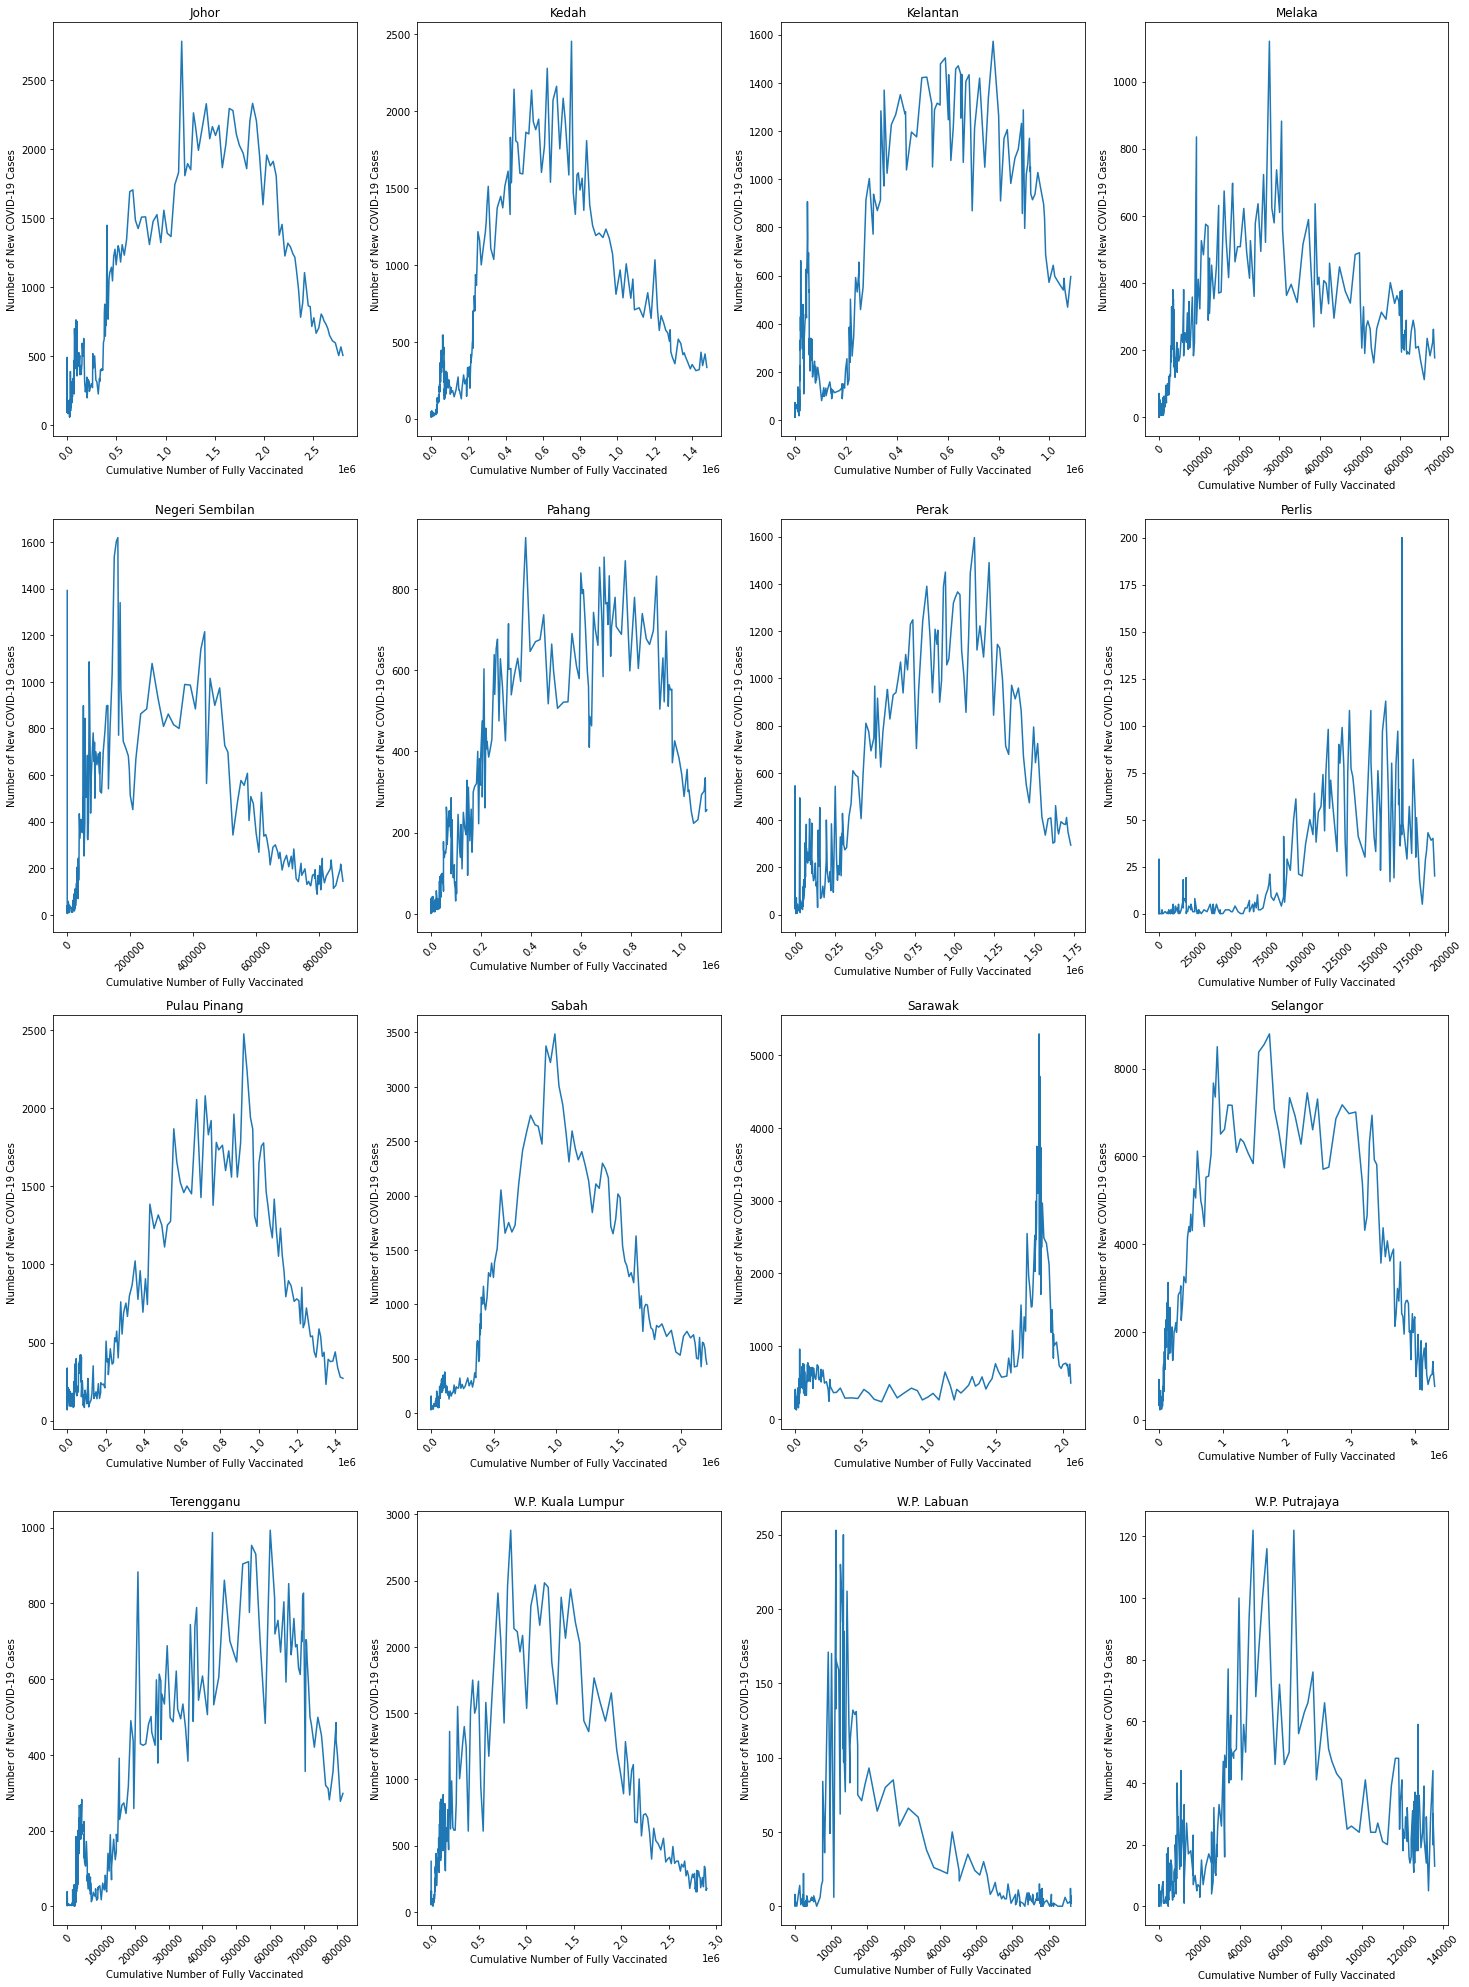

In [95]:
fig, ax = plt.subplots(4, 4, figsize=(25,35))

for i, state in enumerate(pd.unique(q6_merge_state['state'])):
    single_q6_merge_state = q6_merge_state[q6_merge_state['state'] == state]
    ax[i//4][i%4].plot(single_q6_merge_state['cumul_full'], single_q6_merge_state['cases_new'])
    ax[i//4][i%4].set_title(state)
    ax[i//4][i%4].set_xlabel('Cumulative Number of Fully Vaccinated')
    ax[i//4][i%4].set_ylabel('Number of New COVID-19 Cases')
    ax[i//4][i%4].xaxis.set_tick_params(rotation=45)
plt.show()

Based on the graph above, it can be seen that total number of new COVID-19 cases for every state has started to drop after a certain number of vaccinated people has been reached. Besides, every state has shown that vaccination has helped to reduce the daily cases after some times. This has proven that vaccine is effective against COVID-19.

### 1.8.5 Finding 5

Question 5: Does the child vaccination rate have any effects on the new COVID-19 daily cases in Malaysia?

In [96]:
q7_vax_my = vax_my[['date','daily_partial_child','daily_full_child','cumul_partial_child','cumul_full_child']]
q7_cases_malaysia = cases_malaysia[['date','cases_child','cases_adolescent','cases_adult','cases_elderly']]
q7_merge_my = q7_cases_malaysia.merge(q7_vax_my, on=['date'], how='inner')
q7_merge_my

date  cases_child  ...  cumul_partial_child  cumul_full_child
0   2021-02-24        145.0  ...                    0                 0
1   2021-02-25        158.0  ...                    0                 0
2   2021-02-26        124.0  ...                    0                 0
3   2021-02-27        147.0  ...                    0                 0
4   2021-02-28        132.0  ...                    0                 0
..         ...          ...  ...                  ...               ...
239 2021-10-21       1118.0  ...              2524156           1367216
240 2021-10-22       1200.0  ...              2540794           1456265
241 2021-10-23       1069.0  ...              2547162           1533774
242 2021-10-24       1112.0  ...              2552468           1622869
243 2021-10-25          0.0  ...              2566922           1739835

[244 rows x 9 columns]

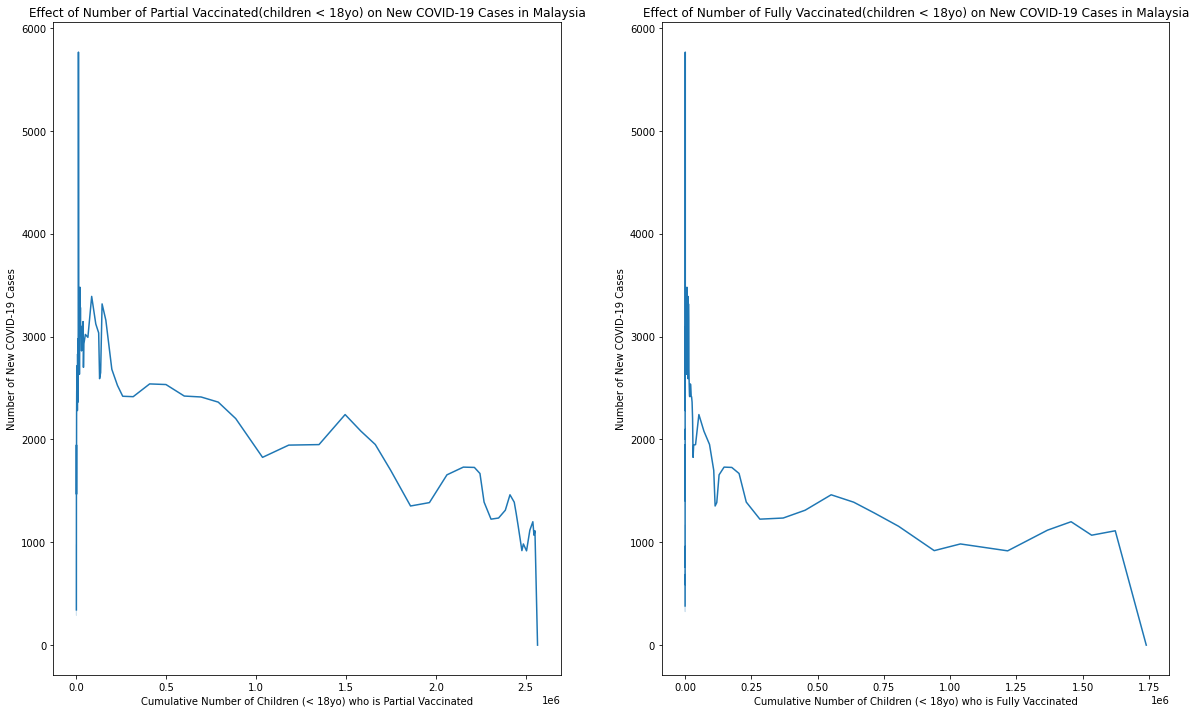

In [97]:
plt.figure(figsize=(20,12))
plt.subplot(121),sns.lineplot(x="cumul_partial_child", y="cases_child",data=q7_merge_my)
plt.subplot(121),plt.title('Effect of Number of Partial Vaccinated(children < 18yo) on New COVID-19 Cases in Malaysia')
plt.subplot(121),plt.xlabel('Cumulative Number of Children (< 18yo) who is Partial Vaccinated')
plt.subplot(121),plt.ylabel('Number of New COVID-19 Cases')

plt.subplot(122),sns.lineplot(x="cumul_full_child", y="cases_child",data=q7_merge_my)
plt.subplot(122),plt.title('Effect of Number of Fully Vaccinated(children < 18yo) on New COVID-19 Cases in Malaysia')
plt.subplot(122),plt.xlabel('Cumulative Number of Children (< 18yo) who is Fully Vaccinated')
plt.subplot(122),plt.ylabel('Number of New COVID-19 Cases')
plt.show()

Based on the graph above, it can be seen that total number of new COVID-19 cases have started to reduce after a certain number of vaccinated people has been reached. This has proven that vaccine is effective against COVID-19 for children under 18 years old.

### 1.8.6 Finding 6

**Question 6 <br/>**
Which states have the highest vaccination rate?

In [98]:
population = pd.read_csv(path + 'Datasets/population.csv')
population.drop(['idxs'], axis=1, inplace=True)
population = population.drop(0).set_index('state')
population['pop_adult'] = population['pop_18'] + population['pop_60']
population['pop_child'] = population['pop'] - population['pop_adult']
population

pop   pop_18  pop_60  pop_adult  pop_child
state                                                            
Johor              3781000  2711900  428700    3140600     640400
Kedah              2185100  1540600  272500    1813100     372000
Kelantan           1906700  1236200  194100    1430300     476400
Melaka              932700   677400  118500     795900     136800
Negeri Sembilan    1128800   814400  145000     959400     169400
Pahang             1678700  1175800  190200    1366000     312700
Pulau Pinang       1773600  1367200  239200    1606400     167200
Perak              2510300  1862700  397300    2260000     250300
Perlis              254900   181200   35100     216300      38600
Selangor           6538000  4747900  575800    5323700    1214300
Terengganu         1259300   808400  115200     923600     335700
Sabah              3908500  2758400  238900    2997300     911200
Sarawak            2816500  2042700  332800    2375500     441000
W.P. Kuala Lumpur  1773700  1348600  205800    1554400     219300
W.P. Labuan          99600    68500    7900      76400      23200
W.P. Putrajaya      110000    67700    5000      72700      37300

In [99]:
population['adult_partial'] = vax_state.groupby('state').sum()['daily_partial']
population['adult_fully'] = vax_state.groupby('state').sum()['daily_full']
population['child_partial'] = vax_state.groupby('state').sum()['daily_partial_child']
population['child_fully'] = vax_state.groupby('state').sum()['daily_full_child']
population['all_partial'] = population['adult_partial'] + population['child_partial']
population['all_fully'] = population['adult_fully'] + population['child_fully']
population

pop   pop_18  ...  all_partial  all_fully
state                                ...                        
Johor              3781000  2711900  ...      3321690    3004582
Kedah              2185100  1540600  ...      1724503    1639184
Kelantan           1906700  1236200  ...      1327778    1206010
Melaka              932700   677400  ...       791026     752788
Negeri Sembilan    1128800   814400  ...      1039795     930325
Pahang             1678700  1175800  ...      1293861    1216027
Pulau Pinang       1773600  1367200  ...      1632643    1537902
Perak              2510300  1862700  ...      2024459    1867247
Perlis              254900   181200  ...       225066     210108
Selangor           6538000  4747900  ...      5131964    4479446
Terengganu         1259300   808400  ...       990283     898410
Sabah              3908500  2758400  ...      2514636    2422779
Sarawak            2816500  2042700  ...      2363806    2265394
W.P. Kuala Lumpur  1773700  1348600  ...      3158353    2990333
W.P. Labuan          99600    68500  ...        89799      82821
W.P. Putrajaya      110000    67700  ...       160474     142947

[16 rows x 11 columns]

Index(['W.P. Putrajaya', 'W.P. Kuala Lumpur', 'W.P. Labuan', 'Negeri Sembilan',
       'Pulau Pinang', 'Johor', 'Perlis', 'Terengganu', 'Sarawak', 'Melaka',
       'Kedah', 'Selangor', 'Pahang', 'Perak', 'Kelantan', 'Sabah'],
      dtype='object', name='state')
Index(['Pulau Pinang', 'Perak', 'Melaka', 'Sarawak', 'Perlis', 'Kedah',
       'W.P. Kuala Lumpur', 'Pahang', 'Negeri Sembilan', 'Johor',
       'W.P. Labuan', 'Kelantan', 'Terengganu', 'Sabah', 'W.P. Putrajaya',
       'Selangor'],
      dtype='object', name='state')
Index(['W.P. Kuala Lumpur', 'W.P. Putrajaya', 'Pulau Pinang', 'W.P. Labuan',
       'Perlis', 'Negeri Sembilan', 'Melaka', 'Sarawak', 'Johor', 'Kedah',
       'Perak', 'Pahang', 'Terengganu', 'Selangor', 'Kelantan', 'Sabah'],
      dtype='object', name='state')


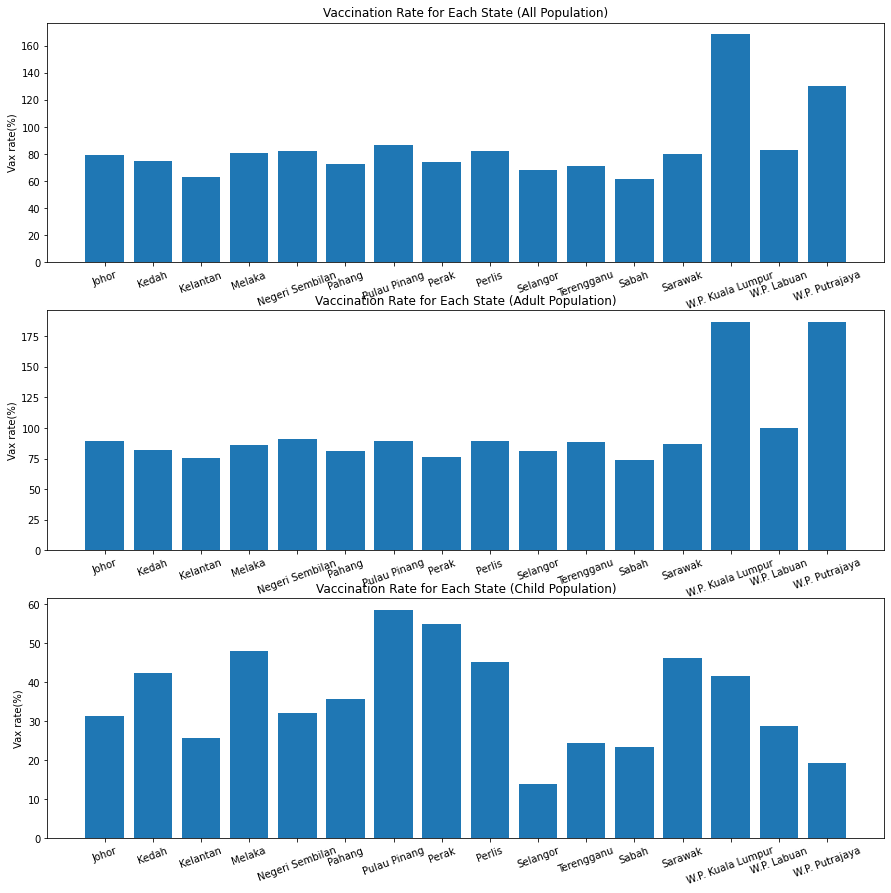

In [100]:
population['adult_partially_vax(%)'] = population['adult_partial'] / population['pop_adult'] * 100
population['adult_fully_vax(%)'] = population['adult_fully'] / population['pop_adult'] * 100
population['child_partially_vax(%)'] = population['child_partial'] / population['pop_child'] * 100
population['child_fully_vax(%)'] = population['child_fully'] / population['pop_child'] * 100
population['all_partially_vax(%)'] = population['all_partial'] / population['pop'] * 100
population['all_fully_vax(%)'] = population['all_fully'] / population['pop'] * 100
print(population.sort_values('adult_fully_vax(%)', ascending=False).index)
print(population.sort_values('child_fully_vax(%)', ascending=False).index)
print(population.sort_values('all_fully_vax(%)', ascending=False).index)
#population.sort_values('all_fully_vax(%)', ascending=False)
fig, ax = plt.subplots(3,figsize=(15,15))

ax[0].bar(population.index, population['all_fully_vax(%)'])
ax[0].set_ylabel('Vax rate(%)')
ax[0].set_title('Vaccination Rate for Each State (All Population)')
ax[0].xaxis.set_tick_params(rotation=20)

ax[1].bar(population.index, population['adult_fully_vax(%)'])
ax[1].set_ylabel('Vax rate(%)')
ax[1].set_title('Vaccination Rate for Each State (Adult Population)')
ax[1].xaxis.set_tick_params(rotation=20)

ax[2].bar(population.index, population['child_fully_vax(%)'])
ax[2].set_ylabel('Vax rate(%)')
ax[2].set_title('Vaccination Rate for Each State (Child Population)')
ax[2].xaxis.set_tick_params(rotation=20)

plt.show()

### 1.8.7 Finding 7

**Question 7 <br/>**
What state(s) require attention now?

In our opinion, we think that the states with low vaccination rate but higher amount of cases require attentions. From the data above, we can see that Sabah with 1240 cases per day in average has only 61.79% of population (lowest rate) has been fully vaccinated. Hence, Sabah should speed up the vaccination process to increase the vaccination rate so that the amount of new cases can be reduced.

On the other hand, Sarawak has 80% of vaccination rate but also having the highest amount of new cases in average in the past month. Hence, Sarawak is also required more attentions to lower the amount of new cases.

In [101]:
import datetime

end_date = pd.to_datetime('today').date()
days = datetime.timedelta(30)
start_date = end_date-days

cases_state.set_index('date').loc[str(start_date):str(end_date)].groupby('state').mean()

cases_new  cases_import  ...  cases_adult  cases_elderly
state                                       ...                            
Johor               663.0000        1.7500  ...     402.8750        71.0000
Kedah               388.6875        0.2500  ...     195.1250        38.0000
Kelantan            711.0000        0.0625  ...     385.0625        98.9375
Melaka              209.7500        0.8125  ...     127.7500        17.6250
Negeri Sembilan     175.6250        0.8750  ...     101.6250        14.7500
Pahang              307.6250        0.1250  ...     174.3750        27.1875
Perak               383.6875        1.1250  ...     216.0625        74.3750
Perlis               38.1250        0.0000  ...      19.8750         3.8125
Pulau Pinang        409.3750        0.4375  ...     243.1250        66.0000
Sabah               597.5000        0.5625  ...     362.3750        57.8750
Sarawak             846.3750        0.8125  ...     561.1875       163.5625
Selangor           1120.2500        4.1875  ...     731.3750        69.2500
Terengganu          395.1875        0.1875  ...     220.7500        42.3125
W.P. Kuala Lumpur   241.8125        3.8750  ...     154.9375        23.3750
W.P. Labuan           2.8125        0.0000  ...       2.5625         0.1250
W.P. Putrajaya       26.5000        0.1250  ...      14.5625         0.9375

[16 rows x 11 columns]

In [102]:
population['average_cases'] = cases_state.set_index('date').loc[str(start_date):str(end_date)].groupby('state').mean()['cases_new']
population.sort_values('average_cases', ascending=False)

pop   pop_18  ...  all_fully_vax(%)  average_cases
state                                ...                                 
Selangor           6538000  4747900  ...         68.514010      1120.2500
Sarawak            2816500  2042700  ...         80.432949       846.3750
Kelantan           1906700  1236200  ...         63.251167       711.0000
Johor              3781000  2711900  ...         79.465274       663.0000
Sabah              3908500  2758400  ...         61.987438       597.5000
Pulau Pinang       1773600  1367200  ...         86.710758       409.3750
Terengganu         1259300   808400  ...         71.342015       395.1875
Kedah              2185100  1540600  ...         75.016429       388.6875
Perak              2510300  1862700  ...         74.383420       383.6875
Pahang             1678700  1175800  ...         72.438613       307.6250
W.P. Kuala Lumpur  1773700  1348600  ...        168.592941       241.8125
Melaka              932700   677400  ...         80.710625       209.7500
Negeri Sembilan    1128800   814400  ...         82.417169       175.6250
Perlis              254900   181200  ...         82.427619        38.1250
W.P. Putrajaya      110000    67700  ...        129.951818        26.5000
W.P. Labuan          99600    68500  ...         83.153614         2.8125

[16 rows x 18 columns]

### 1.8.8 Finding 8

**Question 8** <br/> 
Does the National Recovery Plan have any effects on the daily cases for Kedah, Perak, Selangor, and Negeri Sembilan? 

In [103]:
q5_cases = cases_state[['date', 'state', 'cases_new']].copy()
q5_cases = q5_cases[q5_cases['date'] > '2021-06-14']
q5_kedah = q5_cases[q5_cases['state'] == 'Kedah']
q5_kedah = q5_kedah.reset_index(drop=True)
q5_perak = q5_cases[q5_cases['state'] == 'Perak']
q5_perak = q5_perak.reset_index(drop=True)
q5_selangor = q5_cases[q5_cases['state'] == 'Selangor']
q5_selangor = q5_selangor.reset_index(drop=True)
q5_ns = q5_cases[q5_cases['state'] == 'Negeri Sembilan']
q5_ns = q5_ns.reset_index(drop=True)

kedah_phase = []
p3_kedah = len(q5_kedah) - 124
for i in range(108):
    kedah_phase.append('Phase 1')
for i in range(17):
    kedah_phase.append('Phase 2')
for i in range(p3_kedah):
    kedah_phase.append('Phase 3')
kedah_phase = pd.DataFrame(kedah_phase, columns=['National Recovery Plan'])
    
perak_phase = []
p3_perak = len(q5_perak) - 124
for i in range(20):
    perak_phase.append('Phase 1')
for i in range(105):
    perak_phase.append('Phase 2')
for i in range(p3_perak):
    perak_phase.append('Phase 3')
perak_phase = pd.DataFrame(perak_phase, columns=['National Recovery Plan'])

selangor_phase = []
p4_selangor = len(q5_selangor) - 124
for i in range(87):
    selangor_phase.append('Phase 1')
for i in range(21):
    selangor_phase.append('Phase 2')
for i in range(17):
    selangor_phase.append('Phase 3')
for i in range(p4_selangor):
    selangor_phase.append('Phase 4')
selangor_phase = pd.DataFrame(selangor_phase, columns=['National Recovery Plan'])
    
ns_phase = []
p4_ns = len(q5_ns) - 101
for i in range(72):
    ns_phase.append('Phase 1')
for i in range(9):
    ns_phase.append('Phase 2')
for i in range(20):
    ns_phase.append('Phase 3')
for i in range(p4_ns):
    ns_phase.append('Phase 4')
ns_phase = pd.DataFrame(ns_phase, columns=['National Recovery Plan'])

q5_kedah = pd.concat([q5_kedah,kedah_phase], axis=1)
q5_perak = pd.concat([q5_perak,perak_phase], axis=1)
q5_selangor = pd.concat([q5_selangor,selangor_phase], axis=1)
q5_ns = pd.concat([q5_ns,ns_phase], axis=1)

Text(0.5, 1.0, 'New Cases during National Recovery Plan in Kedah')

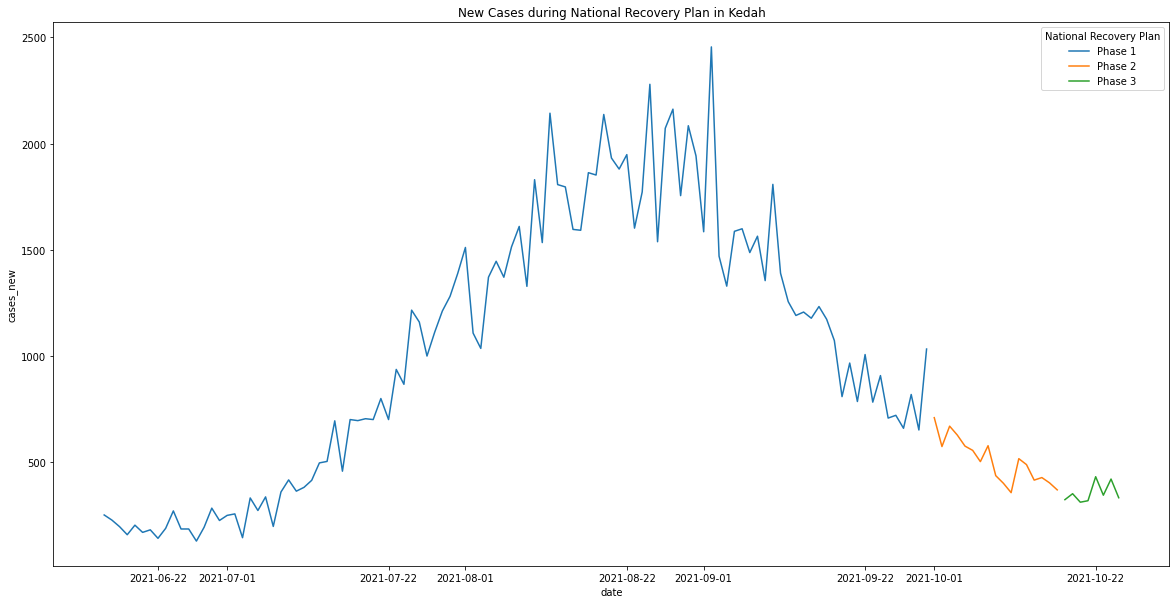

In [104]:
# Kedah 
plt.figure(figsize=(20,10))
sns.lineplot(x="date", y="cases_new", hue="National Recovery Plan", data=q5_kedah)
plt.title('New Cases during National Recovery Plan in Kedah')

Text(0.5, 1.0, 'New Cases during National Recovery Plan in Perak')

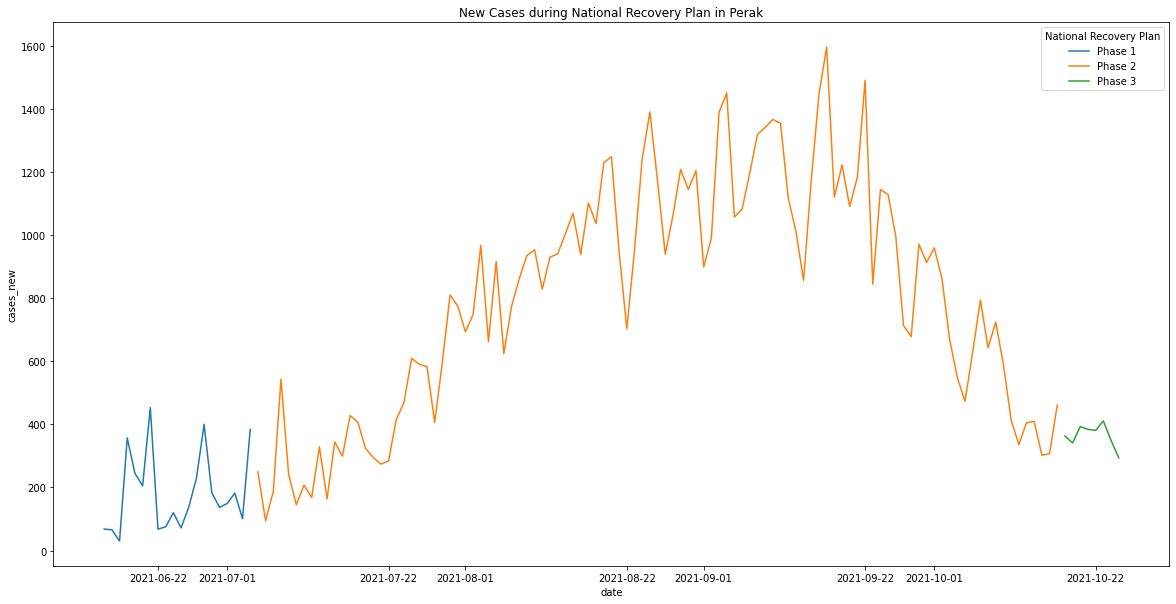

In [105]:
# Perak
plt.figure(figsize=(20,10))
sns.lineplot(x="date", y="cases_new", hue="National Recovery Plan", data=q5_perak)
plt.title('New Cases during National Recovery Plan in Perak')

Text(0.5, 1.0, 'New Cases during National Recovery Plan in Selangor')

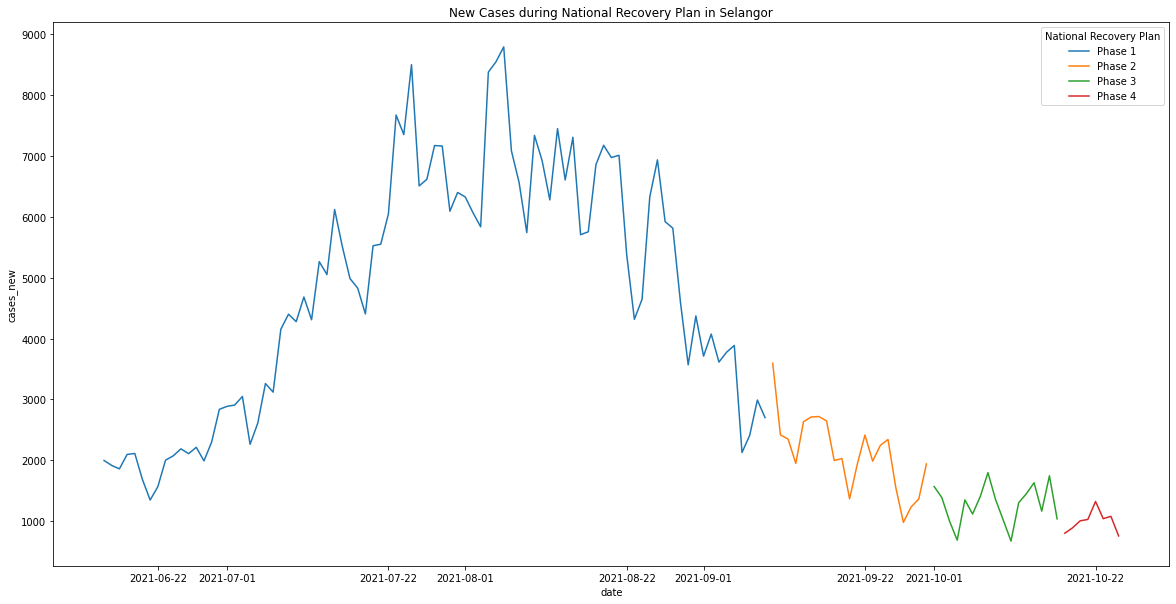

In [106]:
# Selangor
plt.figure(figsize=(20,10))
sns.lineplot(x="date", y="cases_new", hue="National Recovery Plan", data=q5_selangor)
plt.title('New Cases during National Recovery Plan in Selangor')

Text(0.5, 1.0, 'New Cases during National Recovery Plan in Negeri Sembilan')

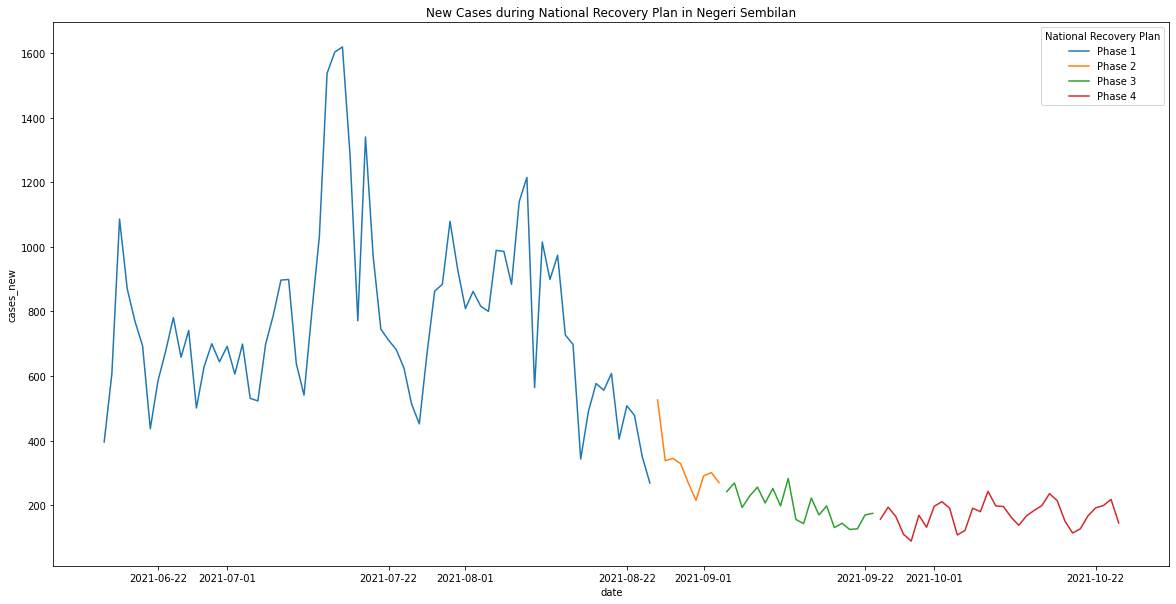

In [107]:
# Negeri Sembilan
plt.figure(figsize=(20,10))
sns.lineplot(x="date", y="cases_new", hue="National Recovery Plan", data=q5_ns)
plt.title('New Cases during National Recovery Plan in Negeri Sembilan')

The NRP does not affects the daily new cases. This can be shown as the phase progresses, the number of daily cases is reduced. This can also prove that the vaccination does help in reducing the total number of daily cases in Malaysia

# 2.0 Feature Selection

## 2.1 BORUTA

In [108]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [109]:
X_boruta_cases = final_merged_malaysia.drop(columns=['cases_new','date'])
y_boruta_cases = final_merged_malaysia['cases_new']
y_boruta_cases = pd.cut(y_boruta_cases, 3, labels=['Low','Medium','High'])
colnames = X_boruta_cases.columns
colnames

Index(['cases_import', 'cases_recovered', 'cases_active', 'cases_cluster',
       'cases_pvax', 'cases_fvax', 'cases_child', 'cases_adolescent',
       'cases_adult', 'cases_elderly', 'rtk-ag', 'pcr', 'total_tests',
       'positivity_rate', 'deaths_new', 'deaths_bid', 'deaths_new_dod',
       'deaths_bid_dod', 'deaths_pvax', 'deaths_fvax', 'deaths_tat', 'beds_x',
       'pkrc_admitted_pui', 'pkrc_admitted_covid', 'pkrc_admitted_total',
       'pkrc_discharged_pui', 'pkrc_discharged_covid', 'pkrc_discharged_total',
       'pkrc_covid', 'pkrc_pui', 'pkrc_noncovid', 'beds_y', 'beds_covid',
       'beds_noncrit', 'hosp_admitted_pui', 'hosp_admitted_covid',
       'hosp_admitted_total', 'hosp_discharged_pui', 'hosp_discharged_covid',
       'hosp_discharged_total', 'hosp_covid', 'hosp_pui', 'hosp_noncovid',
       'beds_icu', 'beds_icu_rep', 'beds_icu_total', 'beds_icu_covid', 'vent',
       'vent_port', 'icu_covid', 'icu_pui', 'icu_noncovid', 'vent_covid',
       'vent_pui', 'vent_noncovi

In [110]:
#Using Boruta
rfc = RandomForestClassifier(max_depth=4)
feat_selector = BorutaPy(rfc, n_estimators = 'auto',max_iter=10,verbose=2,random_state=1)
feat_selector.fit(X_boruta_cases.values,y_boruta_cases.values.ravel())#


Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	59
Tentative: 	18
Rejected: 	0
Iteration: 	9 / 10
Confirmed: 	59
Tentative: 	13
Rejected: 	5


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	59
Tentative: 	8
Rejected: 	5


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=4, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=310, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F32A0164270,
                                          verbose=0, warm_start=False),
         max_iter=10, n_estimators='au

In [111]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)
boruta_score


Features  Score
38  hosp_discharged_covid   1.00
60    daily_partial_child   1.00
32             beds_covid   1.00
33           beds_noncrit   1.00
71               sinovac1   1.00
..                    ...    ...
62          daily_booster   0.36
0            cases_import   0.36
20             deaths_tat   0.18
53               vent_pui   0.09
68          cumul_booster   0.00

[77 rows x 2 columns]

In [112]:
boruta_strong_features_cases = boruta_score[boruta_score['Score']>0.75].Features.values.tolist()
boruta_strong_features_cases

['hosp_discharged_covid',
 'daily_partial_child',
 'beds_covid',
 'beds_noncrit',
 'sinovac1',
 'hosp_admitted_covid',
 'hosp_admitted_total',
 'pfizer1',
 'cases_recovered',
 'hosp_discharged_total',
 'hosp_covid',
 'cumul_full_child',
 'cumul_partial_child',
 'cumul',
 'beds_icu_rep',
 'beds_icu_total',
 'beds_icu_covid',
 'vent',
 'vent_port',
 'icu_covid',
 'cumul_full',
 'cumul_partial',
 'vent_covid',
 'daily_full_child',
 'vent_noncovid',
 'vent_used',
 'vent_port_used',
 'daily_partial',
 'daily_full',
 'beds_y',
 'sinovac2',
 'pkrc_pui',
 'deaths_new',
 'cases_active',
 'cases_cluster',
 'cases_pvax',
 'cases_fvax',
 'cases_child',
 'cases_adolescent',
 'cases_adult',
 'cases_elderly',
 'rtk-ag',
 'pcr',
 'total_tests',
 'positivity_rate',
 'deaths_bid',
 'pkrc_covid',
 'deaths_new_dod',
 'deaths_bid_dod',
 'deaths_pvax',
 'deaths_fvax',
 'astra2',
 'beds_x',
 'pkrc_admitted_covid',
 'pkrc_admitted_total',
 'pkrc_discharged_pui',
 'pkrc_discharged_covid',
 'pkrc_discharged_tot

In [113]:
print('---------Top 30----------')
display(boruta_score.head(30))

print('---------Bottom 30----------')
display(boruta_score.tail(30))

---------Top 30----------


Features  Score
38  hosp_discharged_covid    1.0
60    daily_partial_child    1.0
32             beds_covid    1.0
33           beds_noncrit    1.0
71               sinovac1    1.0
35    hosp_admitted_covid    1.0
36    hosp_admitted_total    1.0
69                pfizer1    1.0
1         cases_recovered    1.0
39  hosp_discharged_total    1.0
40             hosp_covid    1.0
67       cumul_full_child    1.0
66    cumul_partial_child    1.0
65                  cumul    1.0
44           beds_icu_rep    1.0
45         beds_icu_total    1.0
46         beds_icu_covid    1.0
47                   vent    1.0
48              vent_port    1.0
49              icu_covid    1.0
64             cumul_full    1.0
63          cumul_partial    1.0
52             vent_covid    1.0
61       daily_full_child    1.0
54          vent_noncovid    1.0
55              vent_used    1.0
56         vent_port_used    1.0
57          daily_partial    1.0
58             daily_full    1.0
31                 beds_y    1.0

---------Bottom 30----------


Features  Score
16         deaths_new_dod   1.00
17         deaths_bid_dod   1.00
18            deaths_pvax   1.00
19            deaths_fvax   1.00
74                 astra2   1.00
21                 beds_x   1.00
23    pkrc_admitted_covid   1.00
24    pkrc_admitted_total   1.00
25    pkrc_discharged_pui   1.00
26  pkrc_discharged_covid   1.00
27  pkrc_discharged_total   1.00
59                  daily   1.00
73                 astra1   0.91
76                pending   0.91
50                icu_pui   0.91
43               beds_icu   0.91
42          hosp_noncovid   0.91
34      hosp_admitted_pui   0.91
30          pkrc_noncovid   0.91
22      pkrc_admitted_pui   0.91
41               hosp_pui   0.82
70                pfizer2   0.73
75                cansino   0.73
51           icu_noncovid   0.55
37    hosp_discharged_pui   0.45
62          daily_booster   0.36
0            cases_import   0.36
20             deaths_tat   0.18
53               vent_pui   0.09
68          cumul_booster   0.00

The strong features are: 
 ['hosp_discharged_covid' 'daily_partial_child' 'beds_covid' 'beds_noncrit'
 'sinovac1' 'hosp_admitted_covid' 'hosp_admitted_total' 'pfizer1'
 'cases_recovered' 'hosp_discharged_total' 'hosp_covid' 'cumul_full_child'
 'cumul_partial_child' 'cumul' 'beds_icu_rep' 'beds_icu_total'
 'beds_icu_covid' 'vent' 'vent_port' 'icu_covid' 'cumul_full'
 'cumul_partial' 'vent_covid' 'daily_full_child' 'vent_noncovid'
 'vent_used' 'vent_port_used' 'daily_partial' 'daily_full' 'beds_y']


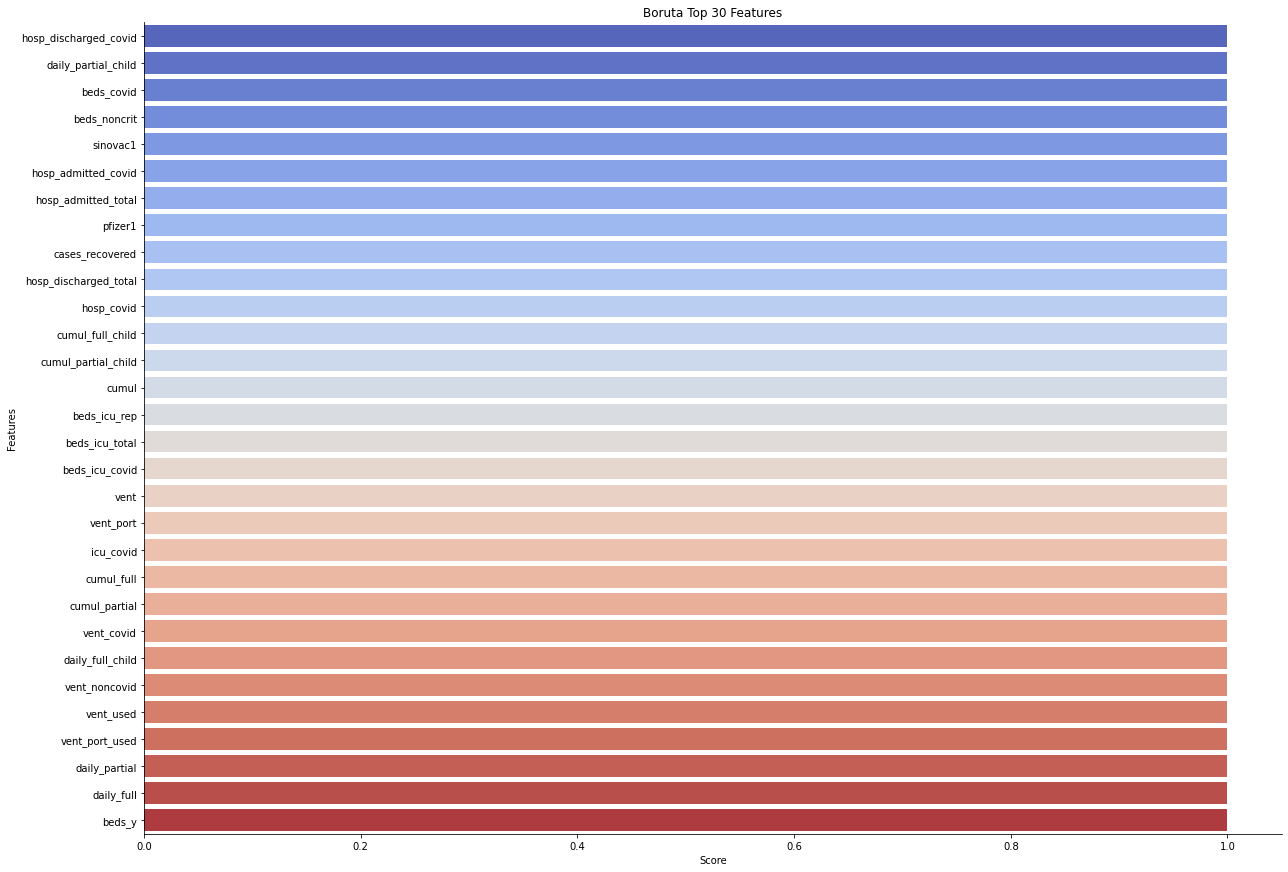

In [114]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:30], kind = "bar", 
               height=12, aspect=1.5, palette='coolwarm')
plt.title("Boruta Top 30 Features")

print("The strong features are: \n",boruta_score['Features'].head(30).values)

In [115]:
X_boruta_deaths = final_merged_malaysia.drop(columns=['deaths_new','date'])
y_boruta_deaths = final_merged_malaysia['deaths_new']
y_boruta_deaths = pd.cut(y_boruta_deaths, 3, labels=['Low','Medium','High'])
colnames = X_boruta_deaths.columns
colnames

Index(['cases_new', 'cases_import', 'cases_recovered', 'cases_active',
       'cases_cluster', 'cases_pvax', 'cases_fvax', 'cases_child',
       'cases_adolescent', 'cases_adult', 'cases_elderly', 'rtk-ag', 'pcr',
       'total_tests', 'positivity_rate', 'deaths_bid', 'deaths_new_dod',
       'deaths_bid_dod', 'deaths_pvax', 'deaths_fvax', 'deaths_tat', 'beds_x',
       'pkrc_admitted_pui', 'pkrc_admitted_covid', 'pkrc_admitted_total',
       'pkrc_discharged_pui', 'pkrc_discharged_covid', 'pkrc_discharged_total',
       'pkrc_covid', 'pkrc_pui', 'pkrc_noncovid', 'beds_y', 'beds_covid',
       'beds_noncrit', 'hosp_admitted_pui', 'hosp_admitted_covid',
       'hosp_admitted_total', 'hosp_discharged_pui', 'hosp_discharged_covid',
       'hosp_discharged_total', 'hosp_covid', 'hosp_pui', 'hosp_noncovid',
       'beds_icu', 'beds_icu_rep', 'beds_icu_total', 'beds_icu_covid', 'vent',
       'vent_port', 'icu_covid', 'icu_pui', 'icu_noncovid', 'vent_covid',
       'vent_pui', 'vent_noncovid

In [116]:
#Using Boruta
rfc = RandomForestClassifier(max_depth=4)
feat_selector = BorutaPy(rfc, n_estimators = 'auto',max_iter=10,verbose=2,random_state=1)
feat_selector.fit(X_boruta_deaths.values,y_boruta_deaths.values.ravel())#

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	77
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	21
Tentative: 	37
Rejected: 	19
Iteration: 	9 / 10
Confirmed: 	21
Tentative: 	37
Rejected: 	19


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	21
Tentative: 	19
Rejected: 	19


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=4, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=269, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F32A01646B0,
                                          verbose=0, warm_start=False),
         max_iter=10, n_estimators='au

In [117]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)
boruta_score

Features  Score
31               beds_y   1.00
56       vent_port_used   1.00
33         beds_noncrit   1.00
28           pkrc_covid   1.00
21               beds_x   1.00
..                  ...    ...
53             vent_pui   0.08
1          cases_import   0.05
37  hosp_discharged_pui   0.05
62        daily_booster   0.00
68        cumul_booster   0.00

[77 rows x 2 columns]

In [118]:
boruta_strong_features_deaths = boruta_score[boruta_score['Score']>0.75].Features.values.tolist()
boruta_strong_features_deaths

['beds_y',
 'vent_port_used',
 'beds_noncrit',
 'pkrc_covid',
 'beds_x',
 'vent_port',
 'cumul_partial_child',
 'cumul',
 'beds_covid',
 'deaths_bid',
 'positivity_rate',
 'cumul_partial',
 'cases_elderly',
 'cases_adult',
 'cases_adolescent',
 'cases_child',
 'cases_recovered',
 'cases_fvax',
 'cases_pvax',
 'astra2',
 'cases_active',
 'daily_full',
 'cumul_full_child',
 'hosp_covid',
 'hosp_pui',
 'vent',
 'beds_icu_rep',
 'beds_icu_total',
 'beds_icu_covid',
 'daily_partial_child',
 'vent_covid',
 'cumul_full',
 'cases_new',
 'pkrc_noncovid',
 'pkrc_discharged_total',
 'deaths_pvax',
 'deaths_fvax',
 'deaths_tat',
 'pkrc_discharged_covid',
 'daily_full_child',
 'cansino',
 'hosp_admitted_total',
 'icu_pui',
 'icu_covid',
 'daily_partial',
 'astra1',
 'hosp_admitted_covid',
 'vent_used',
 'hosp_noncovid']

In [119]:
print('---------Top 30----------')
display(boruta_score.head(30))

print('---------Bottom 30----------')
display(boruta_score.tail(30))

---------Top 30----------


Features  Score
31               beds_y   1.00
56       vent_port_used   1.00
33         beds_noncrit   1.00
28           pkrc_covid   1.00
21               beds_x   1.00
48            vent_port   1.00
66  cumul_partial_child   1.00
65                cumul   1.00
32           beds_covid   1.00
15           deaths_bid   1.00
14      positivity_rate   1.00
63        cumul_partial   1.00
10        cases_elderly   1.00
9           cases_adult   1.00
8      cases_adolescent   1.00
7           cases_child   1.00
2       cases_recovered   1.00
6            cases_fvax   1.00
5            cases_pvax   1.00
74               astra2   1.00
3          cases_active   1.00
58           daily_full   0.97
67     cumul_full_child   0.97
40           hosp_covid   0.97
41             hosp_pui   0.97
47                 vent   0.97
44         beds_icu_rep   0.97
45       beds_icu_total   0.97
46       beds_icu_covid   0.97
60  daily_partial_child   0.97

---------Bottom 30----------


Features  Score
55              vent_used   0.76
42          hosp_noncovid   0.76
39  hosp_discharged_total   0.70
16         deaths_new_dod   0.70
17         deaths_bid_dod   0.65
29               pkrc_pui   0.65
70                pfizer2   0.59
34      hosp_admitted_pui   0.57
72               sinovac2   0.57
71               sinovac1   0.51
12                    pcr   0.49
13            total_tests   0.46
59                  daily   0.46
23    pkrc_admitted_covid   0.41
69                pfizer1   0.38
38  hosp_discharged_covid   0.35
54          vent_noncovid   0.35
24    pkrc_admitted_total   0.30
22      pkrc_admitted_pui   0.27
76                pending   0.24
25    pkrc_discharged_pui   0.22
11                 rtk-ag   0.19
43               beds_icu   0.16
4           cases_cluster   0.14
51           icu_noncovid   0.11
53               vent_pui   0.08
1            cases_import   0.05
37    hosp_discharged_pui   0.05
62          daily_booster   0.00
68          cumul_booster   0.00

The strong features are: 
 ['beds_y' 'vent_port_used' 'beds_noncrit' 'pkrc_covid' 'beds_x'
 'vent_port' 'cumul_partial_child' 'cumul' 'beds_covid' 'deaths_bid'
 'positivity_rate' 'cumul_partial' 'cases_elderly' 'cases_adult'
 'cases_adolescent' 'cases_child' 'cases_recovered' 'cases_fvax'
 'cases_pvax' 'astra2' 'cases_active' 'daily_full' 'cumul_full_child'
 'hosp_covid' 'hosp_pui' 'vent' 'beds_icu_rep' 'beds_icu_total'
 'beds_icu_covid' 'daily_partial_child']


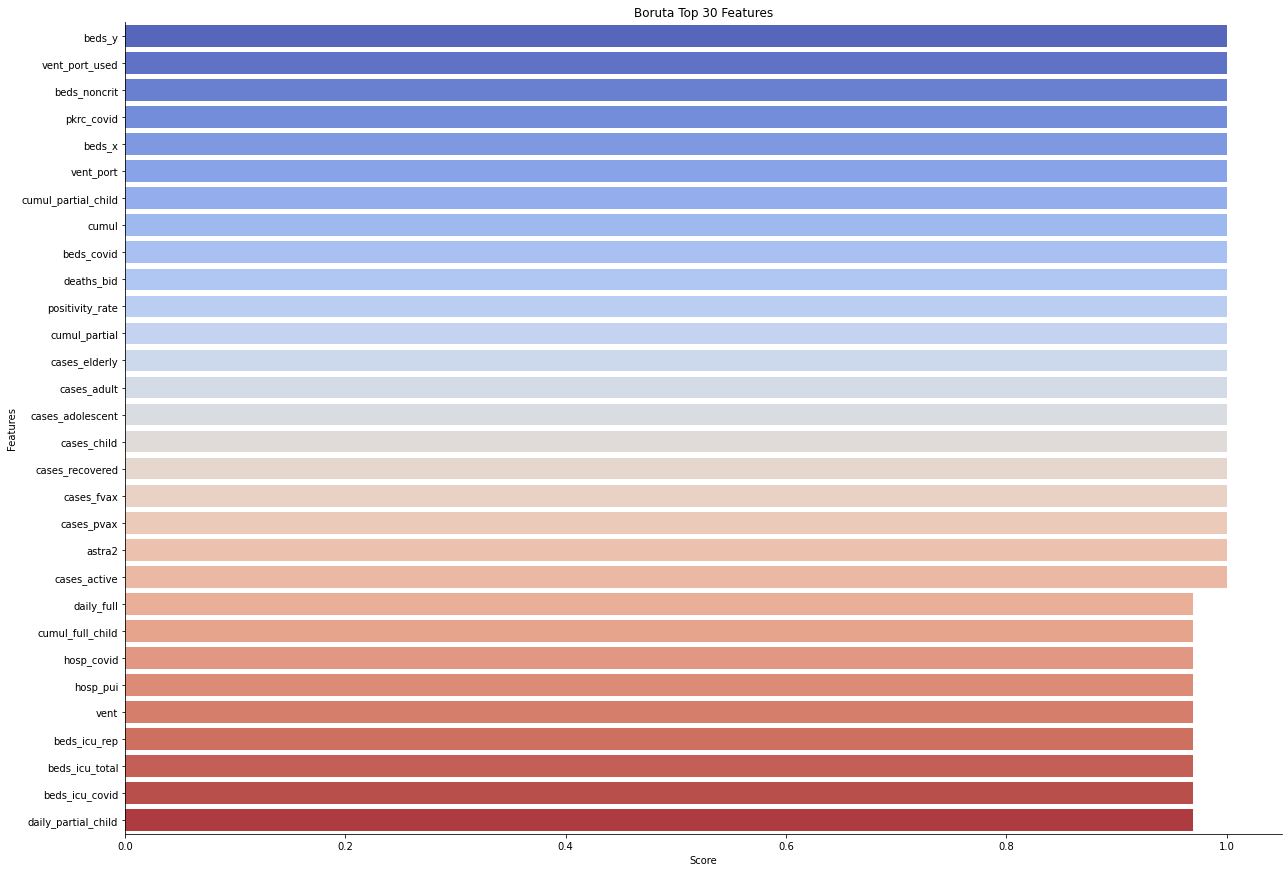

In [120]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:30], kind = "bar", 
               height=12, aspect=1.5, palette='coolwarm')
plt.title("Boruta Top 30 Features")

print("The strong features are: \n",boruta_score['Features'].head(30).values)

In [121]:
X_boruta_state = final_merged_state.drop(columns=['state','date'])
y_boruta_state = final_merged_state['state']
colnames = X_boruta_state.columns
colnames

Index(['cases_new', 'cases_import', 'cases_recovered', 'cases_active',
       'cases_cluster', 'cases_pvax', 'cases_fvax', 'cases_child',
       'cases_adolescent', 'cases_adult', 'cases_elderly', 'rtk-ag', 'pcr',
       'total_tests', 'positivity_rate', 'deaths_new', 'deaths_bid',
       'deaths_new_dod', 'deaths_bid_dod', 'deaths_pvax', 'deaths_fvax',
       'deaths_tat', 'beds_x', 'pkrc_admitted_pui', 'pkrc_admitted_covid',
       'pkrc_admitted_total', 'pkrc_discharged_pui', 'pkrc_discharged_covid',
       'pkrc_discharged_total', 'pkrc_covid', 'pkrc_pui', 'pkrc_noncovid',
       'beds_y', 'beds_covid', 'beds_noncrit', 'hosp_admitted_pui',
       'hosp_admitted_covid', 'hosp_admitted_total', 'hosp_discharged_pui',
       'hosp_discharged_covid', 'hosp_discharged_total', 'hosp_covid',
       'hosp_pui', 'hosp_noncovid', 'beds_icu', 'beds_icu_rep',
       'beds_icu_total', 'beds_icu_covid', 'vent', 'vent_port', 'icu_covid',
       'icu_pui', 'icu_noncovid', 'vent_covid', 'vent_pui', 

In [122]:
#Using Boruta
rfc = RandomForestClassifier(max_depth=4)
feat_selector = BorutaPy(rfc, n_estimators = 'auto',max_iter=10,verbose=2,random_state=1)
feat_selector.fit(X_boruta_state.values,y_boruta_state.values.ravel())#

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	71
Tentative: 	7
Rejected: 	0
Iteration: 	9 / 10
Confirmed: 	71
Tentative: 	7
Rejected: 	0


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	71
Tentative: 	4
Rejected: 	0


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=4, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=312, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F32A01649E0,
                                          verbose=0, warm_start=False),
         max_iter=10, n_estimators='au

In [123]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)
boruta_score

Features  Score
0       cases_new   1.00
56      vent_used   1.00
54       vent_pui   1.00
53     vent_covid   1.00
52   icu_noncovid   1.00
..            ...    ...
20    deaths_fvax   0.67
1    cases_import   0.67
77        pending   0.33
69  cumul_booster   0.00
63  daily_booster   0.00

[78 rows x 2 columns]

In [124]:
boruta_strong_features_state = boruta_score[boruta_score['Score']>0.75].Features.values.tolist()
boruta_strong_features_state

['cases_new',
 'vent_used',
 'vent_pui',
 'vent_covid',
 'icu_noncovid',
 'icu_pui',
 'icu_covid',
 'vent_port',
 'vent',
 'beds_icu_covid',
 'beds_icu_total',
 'beds_icu_rep',
 'beds_icu',
 'hosp_noncovid',
 'hosp_pui',
 'hosp_covid',
 'hosp_discharged_total',
 'vent_noncovid',
 'vent_port_used',
 'hosp_admitted_total',
 'daily_partial',
 'cansino',
 'astra2',
 'astra1',
 'sinovac1',
 'pfizer2',
 'pfizer1',
 'cumul_full_child',
 'cumul_partial_child',
 'cumul',
 'cumul_full',
 'cumul_partial',
 'daily_full_child',
 'daily_partial_child',
 'daily',
 'daily_full',
 'hosp_discharged_pui',
 'hosp_discharged_covid',
 'hosp_admitted_covid',
 'cases_adult',
 'deaths_new',
 'positivity_rate',
 'total_tests',
 'pcr',
 'rtk-ag',
 'cases_elderly',
 'cases_adolescent',
 'deaths_bid_dod',
 'cases_child',
 'cases_fvax',
 'cases_pvax',
 'cases_cluster',
 'cases_active',
 'cases_recovered',
 'deaths_bid',
 'deaths_new_dod',
 'pkrc_discharged_total',
 'beds_y',
 'hosp_admitted_pui',
 'deaths_tat',
 'b

In [125]:
print('---------Top 30----------')
display(boruta_score.head(30))

print('---------Bottom 30----------')
display(boruta_score.tail(30))

---------Top 30----------


Features  Score
0               cases_new    1.0
56              vent_used    1.0
54               vent_pui    1.0
53             vent_covid    1.0
52           icu_noncovid    1.0
51                icu_pui    1.0
50              icu_covid    1.0
49              vent_port    1.0
48                   vent    1.0
47         beds_icu_covid    1.0
46         beds_icu_total    1.0
45           beds_icu_rep    1.0
44               beds_icu    1.0
43          hosp_noncovid    1.0
42               hosp_pui    1.0
41             hosp_covid    1.0
40  hosp_discharged_total    1.0
55          vent_noncovid    1.0
57         vent_port_used    1.0
37    hosp_admitted_total    1.0
58          daily_partial    1.0
76                cansino    1.0
75                 astra2    1.0
74                 astra1    1.0
72               sinovac1    1.0
71                pfizer2    1.0
70                pfizer1    1.0
68       cumul_full_child    1.0
67    cumul_partial_child    1.0
66                  cumul    1.0

---------Bottom 30----------


Features  Score
7             cases_child   1.00
6              cases_fvax   1.00
5              cases_pvax   1.00
4           cases_cluster   1.00
3            cases_active   1.00
2         cases_recovered   1.00
16             deaths_bid   1.00
17         deaths_new_dod   1.00
28  pkrc_discharged_total   1.00
32                 beds_y   1.00
35      hosp_admitted_pui   1.00
21             deaths_tat   1.00
22                 beds_x   1.00
23      pkrc_admitted_pui   1.00
24    pkrc_admitted_covid   1.00
34           beds_noncrit   1.00
25    pkrc_admitted_total   1.00
26    pkrc_discharged_pui   1.00
27  pkrc_discharged_covid   1.00
33             beds_covid   1.00
29             pkrc_covid   1.00
30               pkrc_pui   1.00
31          pkrc_noncovid   1.00
73               sinovac2   0.67
19            deaths_pvax   0.67
20            deaths_fvax   0.67
1            cases_import   0.67
77                pending   0.33
69          cumul_booster   0.00
63          daily_booster   0.00

The strong features are: 
 ['cases_new' 'vent_used' 'vent_pui' 'vent_covid' 'icu_noncovid' 'icu_pui'
 'icu_covid' 'vent_port' 'vent' 'beds_icu_covid' 'beds_icu_total'
 'beds_icu_rep' 'beds_icu' 'hosp_noncovid' 'hosp_pui' 'hosp_covid'
 'hosp_discharged_total' 'vent_noncovid' 'vent_port_used'
 'hosp_admitted_total' 'daily_partial' 'cansino' 'astra2' 'astra1'
 'sinovac1' 'pfizer2' 'pfizer1' 'cumul_full_child' 'cumul_partial_child'
 'cumul']


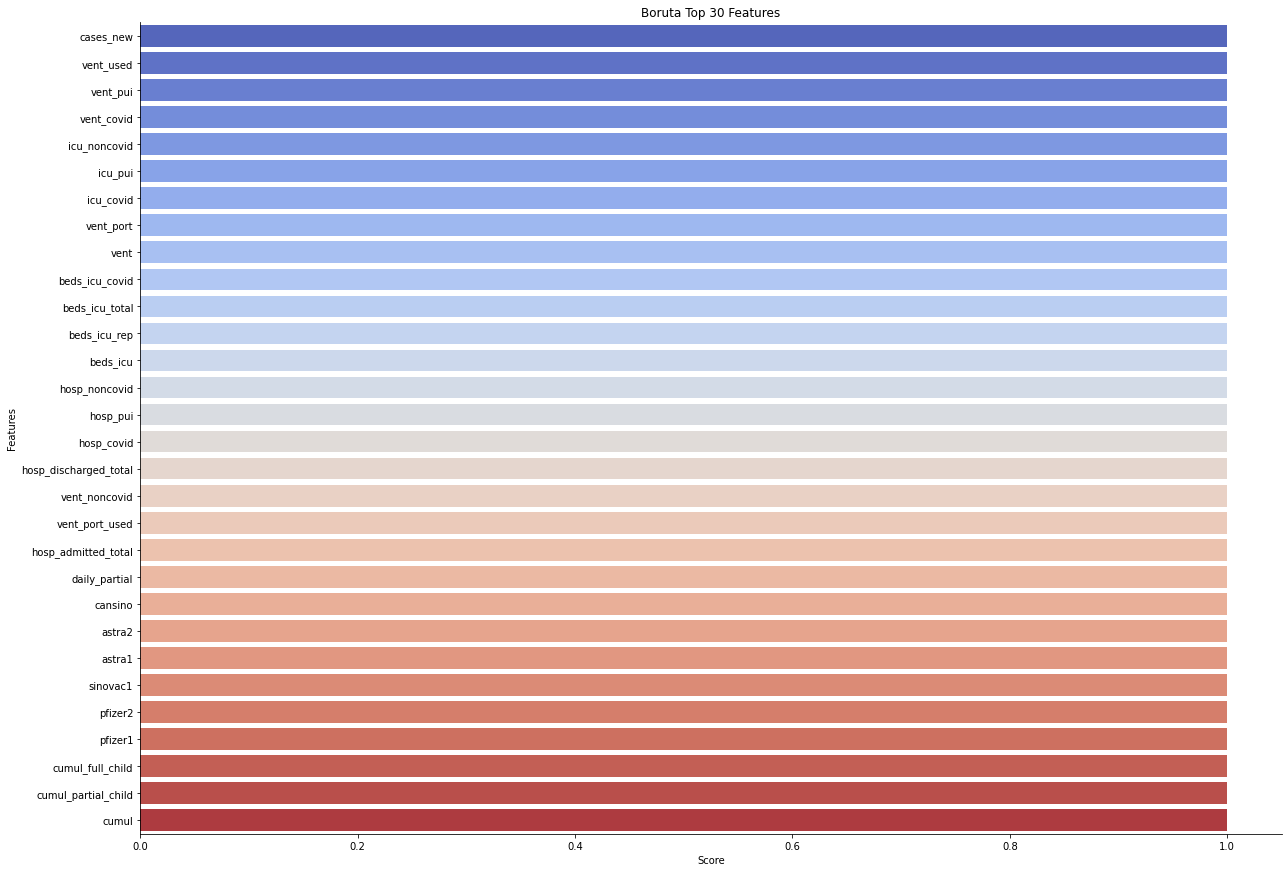

In [126]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:30], kind = "bar", 
               height=12, aspect=1.5, palette='coolwarm')
plt.title("Boruta Top 30 Features")

print("The strong features are: \n",boruta_score['Features'].head(30).values)

## 2.2 LASSO

In [127]:
X_lasso_cases = final_merged_malaysia.drop(columns=['cases_new','date']).copy()
y_lasso_cases = final_merged_malaysia['cases_new'].copy()

X_train, X_test, y_train, y_test = train_test_split(X_lasso_cases, y_lasso_cases, test_size=0.3, random_state=1)
pipeline = Pipeline([('scaler',StandardScaler()),('model',Lasso())])
search = GridSearchCV(pipeline,{'model__alpha':np.arange(1,10,1)}, cv = 5, scoring="neg_mean_squared_error",verbose=3)
search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] model__alpha=1 ..................................................
[CV] ................. model__alpha=1, score=-19797.461, total=   0.0s
[CV] model__alpha=1 ..................................................
[CV] ................. model__alpha=1, score=-44598.694, total=   0.0s
[CV] model__alpha=1 ..................................................
[CV] ................. model__alpha=1, score=-32163.447, total=   0.0s
[CV] model__alpha=1 ..................................................
[CV] ................. model__alpha=1, score=-25238.800, total=   0.0s
[CV] model__alpha=1 ..................................................
[CV] ................. model__alpha=1, score=-39148.053, total=   0.0s
[CV] model__alpha=2 ..................................................
[CV] ................. model__alpha=2, score=-13950.032, total=   0.0s
[CV] model__alpha=2 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................. model__alpha=2, score=-19156.141, total=   0.0s
[CV] model__alpha=2 ..................................................
[CV] ................. model__alpha=2, score=-21040.162, total=   0.0s
[CV] model__alpha=2 ..................................................
[CV] .................. model__alpha=2, score=-9953.659, total=   0.0s
[CV] model__alpha=2 ..................................................
[CV] ................. model__alpha=2, score=-36799.257, total=   0.0s
[CV] model__alpha=3 ..................................................
[CV] .................. model__alpha=3, score=-9091.716, total=   0.0s
[CV] model__alpha=3 ..................................................
[CV] ................. model__alpha=3, score=-11804.225, total=   0.0s
[CV] model__alpha=3 ..................................................
[CV] ................. model__alpha=3, score=-16577.582, total=   0.0s
[CV] model__alpha=3 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             pa

In [128]:
features = list(X_lasso_cases.columns)

coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
feature_selected = np.array(features)[importance > 0]

print("The strong features are ")
for x in feature_selected:
    print(x, end = ', ')
print('\nThere are ' + str(len(feature_selected)) + ' strong features in final_merged dataframe')
lasso_strong_features_cases = feature_selected.copy()

The strong features are 
cases_cluster, cases_pvax, cases_child, cases_adolescent, cases_adult, cases_elderly, pkrc_admitted_pui, pkrc_noncovid, beds_y, beds_covid, beds_noncrit, hosp_admitted_pui, hosp_discharged_covid, beds_icu, icu_pui, vent_port_used, daily_booster, pfizer2, 
There are 18 strong features in final_merged dataframe


In [129]:
X_lasso_deaths = final_merged_malaysia.drop(columns=['deaths_new','date']).copy()
y_lasso_deaths = final_merged_malaysia['deaths_new'].copy()

X_train, X_test, y_train, y_test = train_test_split(X_lasso_deaths, y_lasso_deaths, test_size=0.3, random_state=1)
pipeline = Pipeline([('scaler',StandardScaler()),('model',Lasso())])
search = GridSearchCV(pipeline,{'model__alpha':np.arange(1,10,1)}, cv = 5, scoring="neg_mean_squared_error",verbose=3)
search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] model__alpha=1 ..................................................
[CV] ................... model__alpha=1, score=-663.966, total=   0.0s
[CV] model__alpha=1 ..................................................
[CV] .................. model__alpha=1, score=-2452.063, total=   0.0s
[CV] model__alpha=1 ..................................................
[CV] .................. model__alpha=1, score=-1203.557, total=   0.0s
[CV] model__alpha=1 ..................................................
[CV] ................... model__alpha=1, score=-587.706, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] model__alpha=1 ..................................................
[CV] ................... model__alpha=1, score=-619.629, total=   0.0s
[CV] model__alpha=2 ..................................................
[CV] ................... model__alpha=2, score=-601.992, total=   0.0s
[CV] model__alpha=2 ..................................................
[CV] .................. model__alpha=2, score=-2484.875, total=   0.0s
[CV] model__alpha=2 ..................................................
[CV] .................. model__alpha=2, score=-1151.611, total=   0.0s
[CV] model__alpha=2 ..................................................
[CV] ................... model__alpha=2, score=-619.286, total=   0.0s
[CV] model__alpha=2 ..................................................
[CV] ................... model__alpha=2, score=-640.515, total=   0.0s
[CV] model__alpha=3 ..................................................
[CV] ................... model__alpha=3, score=-538.974, total=   0.0s
[CV] m

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             pa

In [130]:
features = list(X_lasso_deaths.columns)

coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
feature_selected = np.array(features)[importance > 0]

print("The strong features are ")
for x in feature_selected:
    print(x, end = ', ')
print('\nThere are ' + str(len(feature_selected)) + ' strong features in final_merged dataframe')
lasso_strong_features_deaths = feature_selected.copy()

The strong features are 
cases_recovered, cases_child, deaths_bid, deaths_tat, beds_x, pkrc_covid, vent_port, cansino, 
There are 8 strong features in final_merged dataframe


In [131]:
'''
X_lasso_state = final_merged_state.drop(columns=['state','date']).copy()
y_lasso_state = final_merged_state['state'].copy()

X_train, X_test, y_train, y_test = train_test_split(X_lasso_state, y_lasso_state, test_size=0.3, random_state=1)
pipeline = Pipeline([('scaler',StandardScaler()),('model',Lasso())])
search = GridSearchCV(pipeline,{'model__alpha':np.arange(1,10,1)}, cv = 5, scoring="neg_mean_squared_error",verbose=3)
search.fit(X_train,y_train)
'''

'\nX_lasso_state = final_merged_state.drop(columns=[\'state\',\'date\']).copy()\ny_lasso_state = final_merged_state[\'state\'].copy()\n\nX_train, X_test, y_train, y_test = train_test_split(X_lasso_state, y_lasso_state, test_size=0.3, random_state=1)\npipeline = Pipeline([(\'scaler\',StandardScaler()),(\'model\',Lasso())])\nsearch = GridSearchCV(pipeline,{\'model__alpha\':np.arange(1,10,1)}, cv = 5, scoring="neg_mean_squared_error",verbose=3)\nsearch.fit(X_train,y_train)\n'

In [132]:
'''
features = list(X_lasso_state.columns)

coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
feature_selected = np.array(features)[importance > 0]

print("The strong features are ")
for x in feature_selected:
    print(x, end = ', ')
print('\nThere are ' + str(len(feature_selected)) + ' strong features in final_merged dataframe')
lasso_strong_features_state = feature_selected.copy()
'''

'\nfeatures = list(X_lasso_state.columns)\n\ncoefficients = search.best_estimator_.named_steps[\'model\'].coef_\nimportance = np.abs(coefficients)\nfeature_selected = np.array(features)[importance > 0]\n\nprint("The strong features are ")\nfor x in feature_selected:\n    print(x, end = \', \')\nprint(\'\nThere are \' + str(len(feature_selected)) + \' strong features in final_merged dataframe\')\nlasso_strong_features_state = feature_selected.copy()\n'

## 2.3 RFE

In [133]:
X_RFE_cases = final_merged_malaysia.drop(columns=['cases_new', 'date']).copy()
y_RFE_cases = final_merged_malaysia['cases_new'].copy()
y_RFE_cases = pd.cut(y_RFE_cases, 3, labels=['Low','Medium','High'])

colnames = X_RFE_cases.columns

rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=6, n_estimators=50)

rfe = RFECV(rf, min_features_to_select = 1, cv=3, verbose=1)
rfe.fit(X_RFE_cases,y_RFE_cases)

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
rfe_strong_features_cases = rfe_score[rfe_score['Score']>0.75].Features.values.tolist()
rfe_strong_features_cases

Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 fe

['cases_pvax',
 'cases_adolescent',
 'cases_adult',
 'cases_child',
 'cases_active',
 'hosp_covid',
 'pfizer1',
 'vent_port',
 'deaths_bid_dod',
 'hosp_admitted_total',
 'pkrc_covid',
 'beds_covid',
 'cumul_partial_child',
 'pkrc_discharged_total',
 'beds_icu_rep',
 'cumul_full_child',
 'pkrc_discharged_covid',
 'positivity_rate',
 'deaths_pvax',
 'daily_partial',
 'cumul_partial']

Text(0.5, 1.0, 'RFE Cases Top Features')

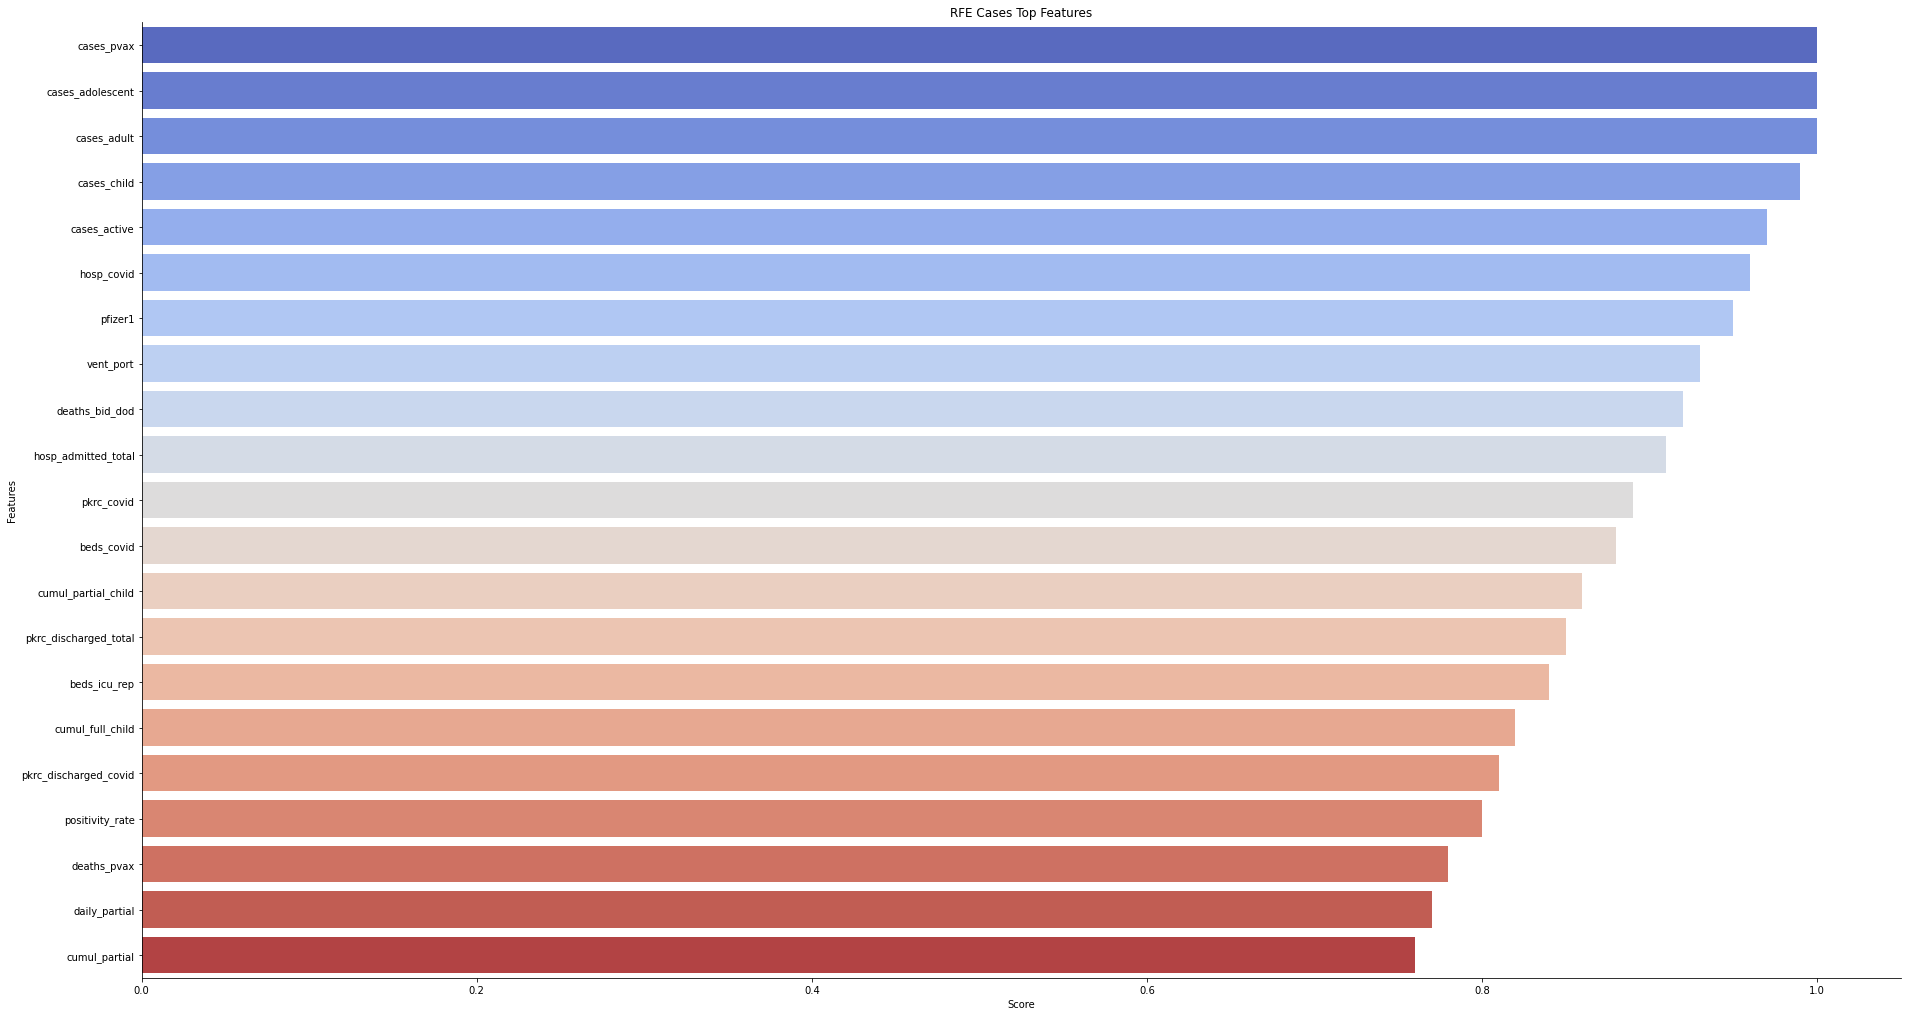

In [134]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[rfe_score['Score']>0.75], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Cases Top Features")

In [135]:
print('---------Top 10----------')
display(rfe_score.head(10))

print('---------Bottom 10----------')
rfe_score.tail(10)

---------Top 10----------


Features  Score
4            cases_pvax   1.00
7      cases_adolescent   1.00
8           cases_adult   1.00
6           cases_child   0.99
2          cases_active   0.97
40           hosp_covid   0.96
69              pfizer1   0.95
48            vent_port   0.93
17       deaths_bid_dod   0.92
36  hosp_admitted_total   0.91

---------Bottom 10----------


Features  Score
1         cases_recovered   0.12
75                cansino   0.11
51           icu_noncovid   0.09
34      hosp_admitted_pui   0.08
37    hosp_discharged_pui   0.07
54          vent_noncovid   0.05
43               beds_icu   0.04
31                 beds_y   0.03
0            cases_import   0.01
38  hosp_discharged_covid   0.00

In [136]:
X_RFE_deaths = final_merged_malaysia.drop(columns=['deaths_new', 'date']).copy()
y_RFE_deaths = final_merged_malaysia['deaths_new'].copy()
y_RFE_deaths = pd.cut(y_RFE_deaths, 3, labels=['Low','Medium','High'])

colnames = X_RFE_deaths.columns

rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=6, n_estimators=50)

rfe = RFECV(rf, min_features_to_select = 1, cv=3, verbose=1)
rfe.fit(X_RFE_deaths,y_RFE_deaths)

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
rfe_strong_features_deaths = rfe_score[rfe_score['Score']>0.75].Features.values.tolist()
rfe_strong_features_deaths

Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 fe

['hosp_discharged_covid',
 'pkrc_noncovid',
 'daily',
 'pkrc_admitted_covid',
 'daily_full',
 'pkrc_discharged_covid',
 'pkrc_discharged_total',
 'pkrc_covid',
 'daily_partial',
 'beds_y',
 'hosp_covid',
 'beds_covid',
 'vent_port_used',
 'vent_used',
 'icu_covid',
 'hosp_admitted_total',
 'beds_icu_covid',
 'hosp_noncovid',
 'beds_x',
 'deaths_tat',
 'cumul_partial',
 'deaths_pvax',
 'cases_recovered',
 'cases_active',
 'cansino',
 'cases_pvax',
 'astra2',
 'cases_child',
 'astra1',
 'cases_elderly',
 'cumul_partial_child',
 'positivity_rate',
 'deaths_bid',
 'cumul',
 'hosp_pui',
 'pkrc_admitted_total',
 'pcr',
 'sinovac1',
 'cumul_full_child',
 'deaths_new_dod',
 'cases_new',
 'hosp_admitted_covid',
 'pkrc_pui',
 'beds_noncrit',
 'cumul_full']

Text(0.5, 1.0, 'RFE Deaths Top Features')

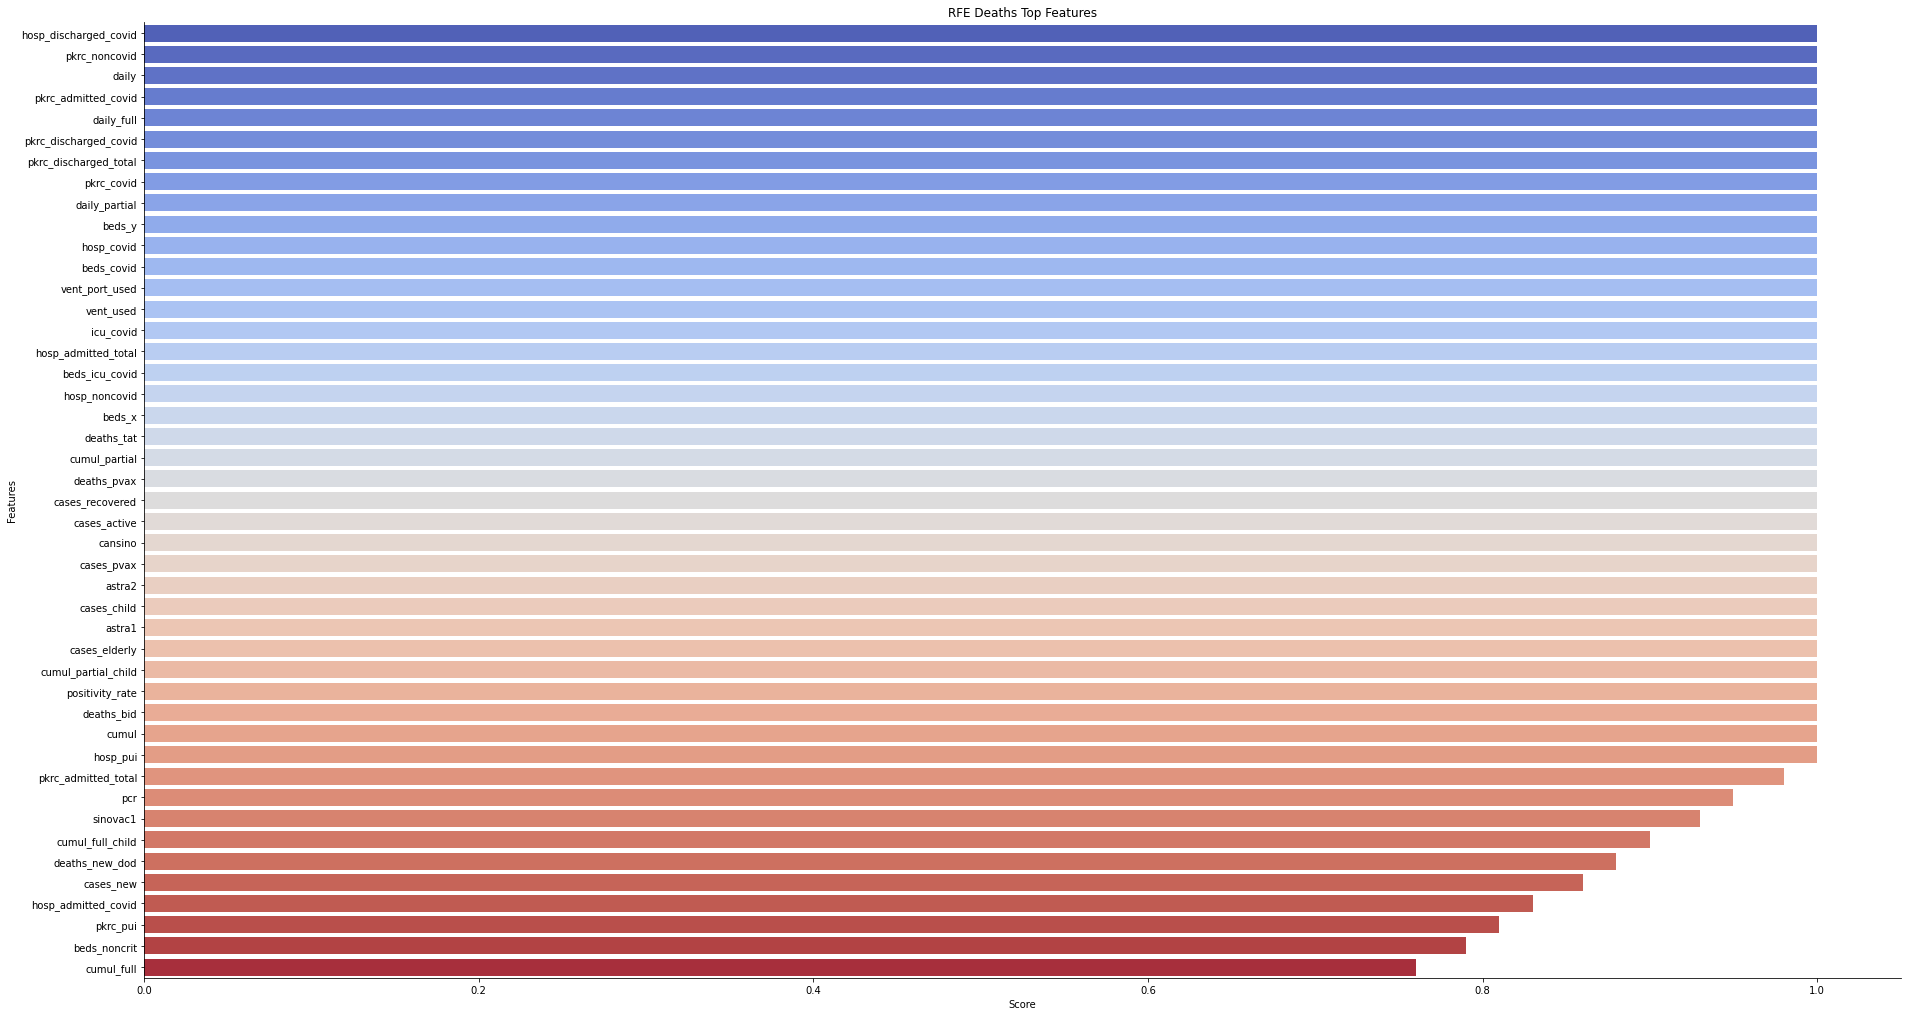

In [137]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[rfe_score['Score']>0.75], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Deaths Top Features")

In [138]:
print('---------Top 10----------')
display(rfe_score.head(10))

print('---------Bottom 10----------')
rfe_score.tail(10)

---------Top 10----------


Features  Score
38  hosp_discharged_covid    1.0
30          pkrc_noncovid    1.0
59                  daily    1.0
23    pkrc_admitted_covid    1.0
58             daily_full    1.0
26  pkrc_discharged_covid    1.0
27  pkrc_discharged_total    1.0
28             pkrc_covid    1.0
57          daily_partial    1.0
31                 beds_y    1.0

---------Bottom 10----------


Features  Score
6      cases_fvax   0.21
69        pfizer1   0.19
4   cases_cluster   0.17
72       sinovac2   0.14
43       beds_icu   0.12
48      vent_port   0.10
11         rtk-ag   0.07
62  daily_booster   0.05
68  cumul_booster   0.02
1    cases_import   0.00

In [139]:
X_RFE_state = final_merged_state.drop(columns=['state', 'date']).copy()
y_RFE_state = final_merged_state['state'].copy()

colnames = X_RFE_state.columns

rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=6, n_estimators=50)

rfe = RFECV(rf, min_features_to_select = 1, cv=3, verbose=1)
rfe.fit(X_RFE_state,y_RFE_state)

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
rfe_strong_features_state = rfe_score[rfe_score['Score']>0.75].Features.values.tolist()
rfe_strong_features_state

Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 fe

['hosp_discharged_covid',
 'vent',
 'pkrc_discharged_pui',
 'pkrc_discharged_covid',
 'pkrc_discharged_total',
 'pkrc_covid',
 'pkrc_pui',
 'pkrc_noncovid',
 'beds_y',
 'beds_covid',
 'beds_noncrit',
 'hosp_admitted_pui',
 'hosp_admitted_covid',
 'hosp_admitted_total',
 'hosp_discharged_pui',
 'vent_port',
 'hosp_discharged_total',
 'hosp_covid',
 'hosp_pui',
 'hosp_noncovid',
 'beds_icu',
 'beds_icu_rep',
 'beds_icu_total',
 'pkrc_admitted_total',
 'pkrc_admitted_covid',
 'pkrc_admitted_pui',
 'total_tests',
 'cases_active',
 'cases_pvax',
 'cumul_partial_child',
 'cumul',
 'rtk-ag',
 'beds_x',
 'beds_icu_covid',
 'cumul_partial',
 'vent_used',
 'vent_noncovid',
 'vent_covid',
 'icu_noncovid',
 'icu_covid',
 'cases_adult',
 'cansino',
 'cumul_full',
 'cases_cluster',
 'cases_fvax',
 'positivity_rate',
 'deaths_new',
 'cases_child',
 'cases_new']

In [140]:
len(rfe_strong_features_state)

49

Text(0.5, 1.0, 'RFE Deaths Top Features')

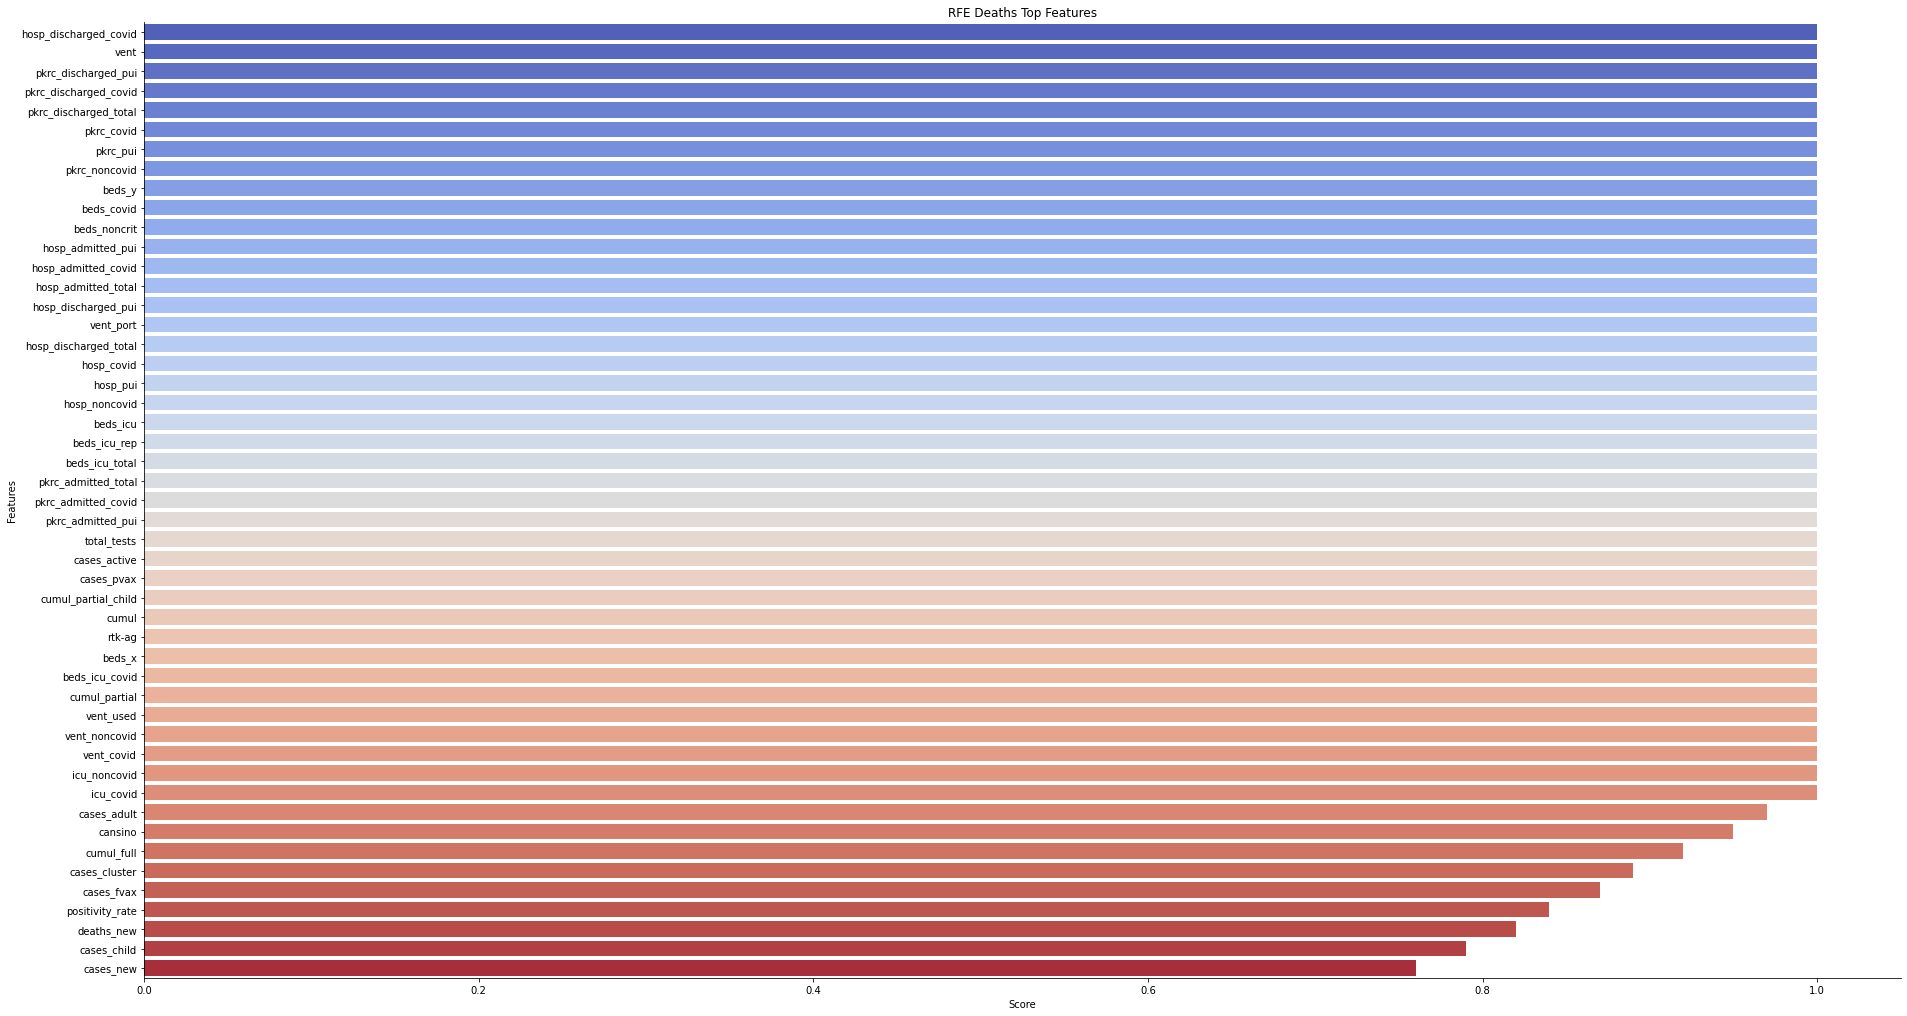

In [141]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[rfe_score['Score']>0.75], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Deaths Top Features")

In [142]:
print('---------Top 10----------')
display(rfe_score.head(10))

print('---------Bottom 10----------')
rfe_score.tail(10)

---------Top 10----------


Features  Score
39  hosp_discharged_covid    1.0
48                   vent    1.0
26    pkrc_discharged_pui    1.0
27  pkrc_discharged_covid    1.0
28  pkrc_discharged_total    1.0
29             pkrc_covid    1.0
30               pkrc_pui    1.0
31          pkrc_noncovid    1.0
32                 beds_y    1.0
33             beds_covid    1.0

---------Bottom 10----------


Features  Score
20          deaths_fvax   0.24
16           deaths_bid   0.21
19          deaths_pvax   0.18
72             sinovac1   0.16
51              icu_pui   0.13
73             sinovac2   0.11
61  daily_partial_child   0.08
77              pending   0.05
63        daily_booster   0.03
1          cases_import   0.00

## 2.4 Comparison

### 2.4.1 Cases


In [143]:
X_boruta_cases = X_boruta_cases[boruta_strong_features_cases].copy()
X_train, X_test, y_train, y_test = train_test_split(X_boruta_cases, y_boruta_cases, test_size=0.3, random_state=1)

#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)

y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

LGBM Classifier
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        15
         Low       0.98      1.00      0.99        47
      Medium       1.00      0.92      0.96        12

    accuracy                           0.99        74
   macro avg       0.99      0.97      0.98        74
weighted avg       0.99      0.99      0.99        74

---------------------------

Random Forest Classifier
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        15
         Low       0.98      1.00      0.99        47
      Medium       1.00      0.92      0.96        12

    accuracy                           0.99        74
   macro avg       0.99      0.97      0.98        74
weighted avg       0.99      0.99      0.99        74



In [144]:
X_lasso_cases = X_lasso_cases[lasso_strong_features_cases].copy()
y_lasso_cases = pd.cut(y_lasso_cases, 3, labels=['Low','Medium','High'])
X_train, X_test, y_train, y_test = train_test_split(X_lasso_cases, y_lasso_cases, test_size=0.3, random_state=1)

#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)

y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

LGBM Classifier
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        15
         Low       1.00      1.00      1.00        47
      Medium       1.00      1.00      1.00        12

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

---------------------------

Random Forest Classifier
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        15
         Low       1.00      1.00      1.00        47
      Medium       1.00      1.00      1.00        12

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [145]:
X_RFE_cases = X_RFE_cases[rfe_strong_features_cases].copy()
X_train, X_test, y_train, y_test = train_test_split(X_RFE_cases, y_RFE_cases, test_size=0.3, random_state=1)

#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)

y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

LGBM Classifier
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        15
         Low       0.98      1.00      0.99        47
      Medium       1.00      0.92      0.96        12

    accuracy                           0.99        74
   macro avg       0.99      0.97      0.98        74
weighted avg       0.99      0.99      0.99        74

---------------------------

Random Forest Classifier
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        15
         Low       0.98      1.00      0.99        47
      Medium       1.00      0.92      0.96        12

    accuracy                           0.99        74
   macro avg       0.99      0.97      0.98        74
weighted avg       0.99      0.99      0.99        74



### 2.4.2 Deaths

In [146]:
X_boruta_deaths = X_boruta_deaths[boruta_strong_features_deaths].copy()
X_train, X_test, y_train, y_test = train_test_split(X_boruta_deaths, y_boruta_deaths, test_size=0.3, random_state=1)

#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)

y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

LGBM Classifier
              precision    recall  f1-score   support

        High       1.00      0.50      0.67         2
         Low       1.00      0.95      0.97        59
      Medium       0.76      1.00      0.87        13

    accuracy                           0.95        74
   macro avg       0.92      0.82      0.84        74
weighted avg       0.96      0.95      0.95        74

---------------------------

Random Forest Classifier
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         2
         Low       1.00      0.97      0.98        59
      Medium       0.76      1.00      0.87        13

    accuracy                           0.95        74
   macro avg       0.59      0.66      0.62        74
weighted avg       0.93      0.95      0.94        74



In [147]:
X_lasso_deaths = X_lasso_deaths[lasso_strong_features_deaths].copy()
y_lasso_deaths = pd.cut(y_lasso_deaths, 3, labels=['Low','Medium','High'])
X_train, X_test, y_train, y_test = train_test_split(X_lasso_deaths, y_lasso_deaths, test_size=0.3, random_state=1)

#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)

y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

LGBM Classifier
              precision    recall  f1-score   support

        High       1.00      0.50      0.67         2
         Low       1.00      0.95      0.97        59
      Medium       0.76      1.00      0.87        13

    accuracy                           0.95        74
   macro avg       0.92      0.82      0.84        74
weighted avg       0.96      0.95      0.95        74

---------------------------

Random Forest Classifier
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         2
         Low       1.00      0.97      0.98        59
      Medium       0.76      1.00      0.87        13

    accuracy                           0.95        74
   macro avg       0.59      0.66      0.62        74
weighted avg       0.93      0.95      0.94        74



In [148]:
X_RFE_deaths = X_RFE_deaths[rfe_strong_features_deaths].copy()
X_train, X_test, y_train, y_test = train_test_split(X_RFE_deaths, y_RFE_deaths, test_size=0.3, random_state=1)

#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)

y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

LGBM Classifier
              precision    recall  f1-score   support

        High       1.00      0.50      0.67         2
         Low       0.98      0.95      0.97        59
      Medium       0.75      0.92      0.83        13

    accuracy                           0.93        74
   macro avg       0.91      0.79      0.82        74
weighted avg       0.94      0.93      0.93        74

---------------------------

Random Forest Classifier
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         2
         Low       1.00      0.97      0.98        59
      Medium       0.76      1.00      0.87        13

    accuracy                           0.95        74
   macro avg       0.59      0.66      0.62        74
weighted avg       0.93      0.95      0.94        74



### 2.4.3 State

In [149]:
X_boruta_state = X_boruta_state[boruta_strong_features_state].copy()
X_train, X_test, y_train, y_test = train_test_split(X_boruta_state, y_boruta_state, test_size=0.3, random_state=1)

#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)

y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

LGBM Classifier
                 precision    recall  f1-score   support

          Johor       1.00      1.00      1.00        75
          Kedah       1.00      1.00      1.00        64
       Kelantan       1.00      1.00      1.00        64
         Melaka       1.00      1.00      1.00        75
Negeri Sembilan       1.00      1.00      1.00        65
         Pahang       1.00      1.00      1.00        79
          Perak       1.00      1.00      1.00        74
         Perlis       1.00      1.00      1.00        81
   Pulau Pinang       1.00      1.00      1.00        74
          Sabah       1.00      1.00      1.00        79
        Sarawak       1.00      1.00      1.00        73
       Selangor       1.00      1.00      1.00        69
     Terengganu       1.00      1.00      1.00        78
    W.P. Labuan       1.00      1.00      1.00        75

       accuracy                           1.00      1025
      macro avg       1.00      1.00      1.00      1025
   weighted a

In [150]:
'''
X_lasso_state = X_lasso_state[lasso_strong_features_state].copy()
X_train, X_test, y_train, y_test = train_test_split(X_lasso_state, y_lasso_state, test_size=0.3, random_state=1)

#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)

y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
'''

"\nX_lasso_state = X_lasso_state[lasso_strong_features_state].copy()\nX_train, X_test, y_train, y_test = train_test_split(X_lasso_state, y_lasso_state, test_size=0.3, random_state=1)\n\n#model 1: LGBM Classifier\nprint('=================')\nprint('LGBM Classifier')\nprint('=================')\nlgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,\n                                learning_rate=0.52, n_estimators=15, max_depth=12,\n                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)\nlgbm.fit(X_train, y_train)\n\ny_pred_lgbm  = lgbm.predict(X_test)\nprint(classification_report(y_test, y_pred_lgbm))\nprint('---------------------------\n')\n\n#model 2: Random Forest Classifier\nprint('=================')\nprint('Random Forest Classifier')\nprint('=================')\nrfc = RandomForestClassifier(n_estimators=500)\nrfc.fit(X_train, y_train)\ny_pred_rfc = rfc.predict(X_test)\nprint(classification_report(y_test, y_pred_rfc))\n"

In [151]:
X_RFE_state = X_RFE_state[rfe_strong_features_state].copy()
X_train, X_test, y_train, y_test = train_test_split(X_RFE_state, y_RFE_state, test_size=0.3, random_state=1)

#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)

y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

LGBM Classifier
                 precision    recall  f1-score   support

          Johor       1.00      1.00      1.00        75
          Kedah       1.00      1.00      1.00        64
       Kelantan       1.00      1.00      1.00        64
         Melaka       1.00      1.00      1.00        75
Negeri Sembilan       1.00      1.00      1.00        65
         Pahang       1.00      1.00      1.00        79
          Perak       1.00      1.00      1.00        74
         Perlis       1.00      1.00      1.00        81
   Pulau Pinang       1.00      1.00      1.00        74
          Sabah       1.00      1.00      1.00        79
        Sarawak       1.00      1.00      1.00        73
       Selangor       1.00      1.00      1.00        69
     Terengganu       1.00      1.00      1.00        78
    W.P. Labuan       1.00      1.00      1.00        75

       accuracy                           1.00      1025
      macro avg       1.00      1.00      1.00      1025
   weighted a

# 3.0 Regression

## 3.1 Does the current vaccination rate allow herd immunity to be achieved by 30 November 2021? Assume that herd immunity can be achieved with 80% of population has been vaccinated

### 3.1.1 ARIMA Model

#### 3.1.1.1 Time Series Data Analysis

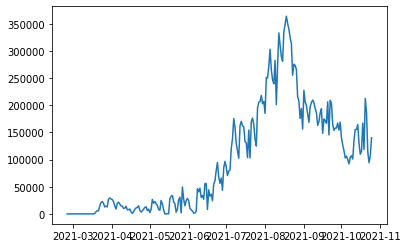

In [152]:
reg_q1 = vax_my[['date','daily_full']].copy()
reg_q1 = reg_q1.set_index('date')
plt.plot(reg_q1)

In [153]:
df_log = np.log(reg_q1)
df_log = df_log.replace(-np.inf, np.nan)
df_log = df_log.replace(np.inf, np.nan)
df_log = df_log.dropna()

In [154]:
result = adfuller(df_log.daily_full.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.650654
p-value: 0.000104


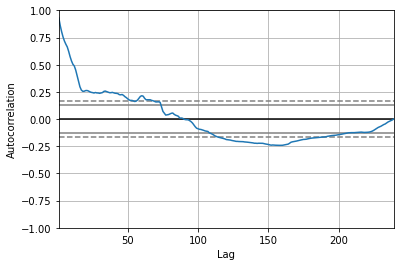

In [155]:
autocorrelation_plot(df_log['daily_full'])
plt.show()

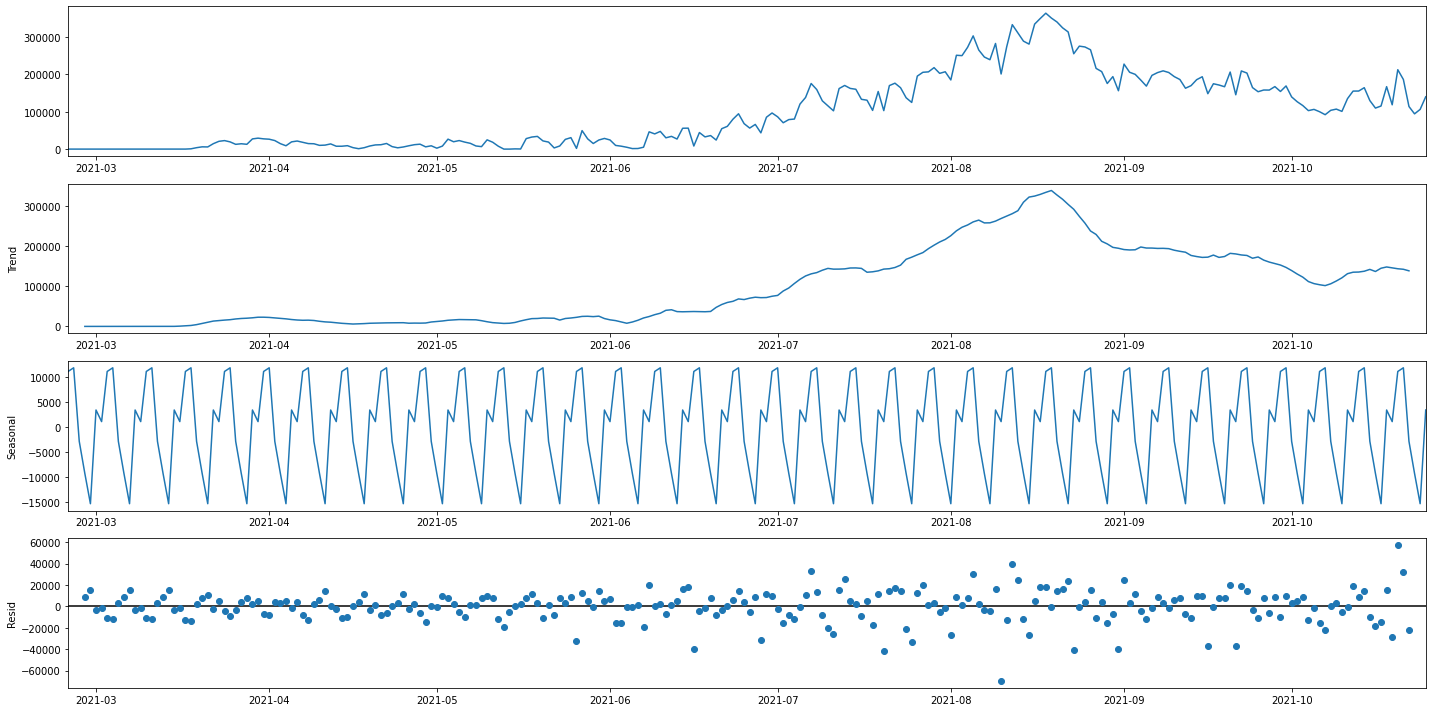

In [156]:
result_reg_q1 = seasonal_decompose(reg_q1,model='add')
plt.rcParams.update({'figure.figsize': (20, 10)})
result_reg_q1.plot().suptitle('', fontsize=15)
plt.show()

# res = seasonal_decompose(df_cases, model = "add")

# fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(30,20))
# res.trend.plot(ax=ax1)
# res.resid.plot(ax=ax2)
# res.seasonal.plot(ax=ax3)

In [157]:
model_regq1 = ARIMA(df_log['daily_full'], order=(5,1,0))
model_fit_regq1 = model_regq1.fit()
print(model_fit_regq1.summary())

                               SARIMAX Results                                
Dep. Variable:             daily_full   No. Observations:                  239
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -302.634
Date:                Tue, 09 Nov 2021   AIC                            617.267
Time:                        02:55:41   BIC                            638.101
Sample:                             0   HQIC                           625.664
                                - 239                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0032      0.052     -0.061      0.951      -0.105       0.098
ar.L2         -0.1261      0.029     -4.386      0.000      -0.182      -0.070
ar.L3         -0.0837      0.062     -1.344      0.1

#### 3.1.1.2 Out-of-Time Cross Validation

In Out-of-Time cross-validation, few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

To do out-of-time cross-validation, the training and testing dataset will be created by splitting the time series into 2 contiguous parts.

In [158]:
train_regq1 = df_log[:(len(reg_q1)-30)].copy()
test_regq1 = df_log[(len(reg_q1)-30):].copy()
print(train_regq1.shape)
print(test_regq1.shape)

(214, 1)
(25, 1)


In [159]:
# Build Model 
#auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.
model_arima_regq1 = pm.auto_arima(train_regq1, start_p=1, start_q=1,
                                  test='adf',       # use adftest to find optimal 'd'
                                  max_p=10, max_q=3, # maximum p and q
                                  m=1,              # frequency of series
                                  d=0,           # let model determine 'd'
                                  seasonal=False,   # No Seasonality
                                  start_P=0, 
                                  D=0, 
                                  trace=True,
                                  error_action='ignore',  
                                  suppress_warnings=True, 
                                  stepwise=True)

model_arima_regq1.fit(train_regq1)

print(model_arima_regq1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=586.634, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1611.978, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1340.317, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=585.675, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1148.063, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=585.633, Time=0.16 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1007.860, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=589.540, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=585.655, Time=0.30 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 2.163 seconds
                               SARIMAX Results                                
Dep. Variable:               

In [160]:
# with open(path +'Model/arima_cases_q1', 'wb') as file:  
#    pickle.dump(model_arima_regq1, file)

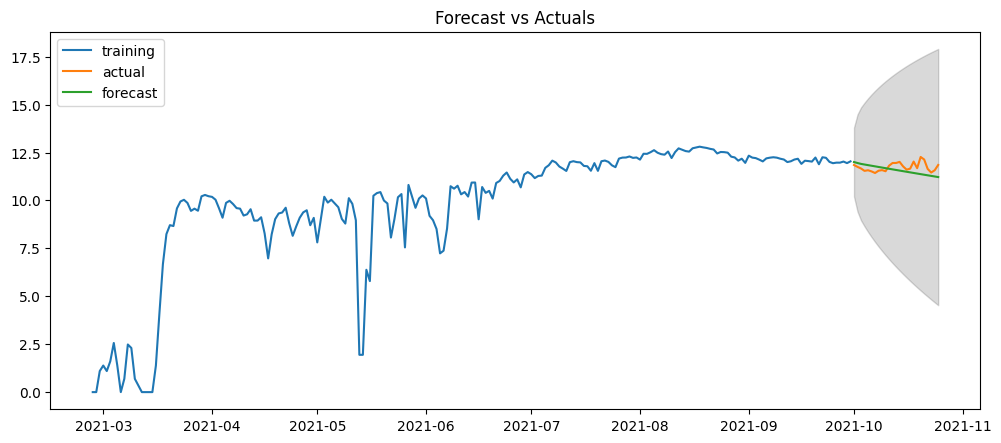

In [161]:
# Forecast
regq1_fc, regq1_conf = model_arima_regq1.predict(25, return_conf_int=True)  # 95% conf

# Make as pandas series
regq1_fc_series = pd.Series(regq1_fc, index=test_regq1.index)
regq1_lower_series = pd.Series(regq1_conf[:, 0], index=test_regq1.index)
regq1_upper_series = pd.Series(regq1_conf[:, 1], index=test_regq1.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_regq1, label='training')
plt.plot(test_regq1, label='actual')
plt.plot(regq1_fc_series, label='forecast')
plt.fill_between(regq1_lower_series.index, regq1_lower_series, regq1_upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [162]:
# Load specific evaluation tools
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(regq1_fc-test_regq1['daily_full'])[1]   # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(regq1_fc, test_regq1['daily_full'].values)

{'acf1': 0.7510436616911015,
 'corr': -0.2766270653171317,
 'mae': 0.3287129351590587,
 'mape': 0.027794415040594413,
 'me': -0.1427596416175569,
 'minmax': 0.027621284007521063,
 'mpe': -0.011732219550811029,
 'rmse': 0.38407174103475494}

#### 3.1.1.3 Forecasting

In [163]:
lastday = date(2021,10,25)
vac_80 = date(2021,11,30)
daysbetween = vac_80 - lastday
print(lastday)
print(vac_80)
print(daysbetween.days)

regq1_forecast = model_arima_regq1.predict(n_periods=25+daysbetween.days)
regq1_forecast = regq1_forecast[25:]
regq1_forecast
# forecast_arr_length = len(forecast_arr)
# forecast = forecast_arr[forecast_arr_length - 1]

2021-10-25
2021-11-30
36


array([11.1887927 , 11.15863773, 11.12856403, 11.09857138, 11.06865957,
       11.03882837, 11.00907757, 10.97940695, 10.94981629, 10.92030539,
       10.89087402, 10.86152197, 10.83224903, 10.80305498, 10.77393962,
       10.74490272, 10.71594408, 10.68706348, 10.65826072, 10.62953559,
       10.60088788, 10.57231737, 10.54382387, 10.51540716, 10.48706703,
       10.45880328, 10.43061571, 10.40250411, 10.37446827, 10.34650799,
       10.31862306, 10.29081329, 10.26307847, 10.23541839, 10.20783287,
       10.18032169])

In [164]:
my_pop = pop_ori[pop_ori['state'] == 'Malaysia']
my_pop = my_pop['pop']

results = np.exp(regq1_forecast)
x = 0
for i in results:
  x = x + i
cumul = vax_my.loc[len(vax_my)-1].cumul_full
cumul = cumul +x
herd = (cumul/my_pop[0])*100

if herd >= 80:
  print('Herd Imunity is archived at {:.2f} %'.format(herd))
else:
  print('Herd Imunity is not archived at {:.2f} %'.format(herd))

Herd Imunity is not archived at 78.20 %


In [165]:
results = pd.Series(results)
results

0     72315.422805
1     70167.304347
2     68088.528801
3     66076.694445
4     64129.488018
5     62244.681273
6     60420.127682
7     58653.759264
8     56943.583553
9     55287.680682
10    53684.200588
11    52131.360329
12    50627.441510
13    49170.787812
14    47759.802624
15    46392.946765
16    45068.736299
17    43785.740439
18    42542.579535
19    41337.923138
20    40170.488146
21    39039.037022
22    37942.376077
23    36879.353833
24    35848.859439
25    34849.821155
26    33881.204894
27    32942.012821
28    32031.282010
29    31148.083150
30    30291.519299
31    29460.724694
32    28654.863603
33    27873.129220
34    27114.742602
35    26378.951657
dtype: float64

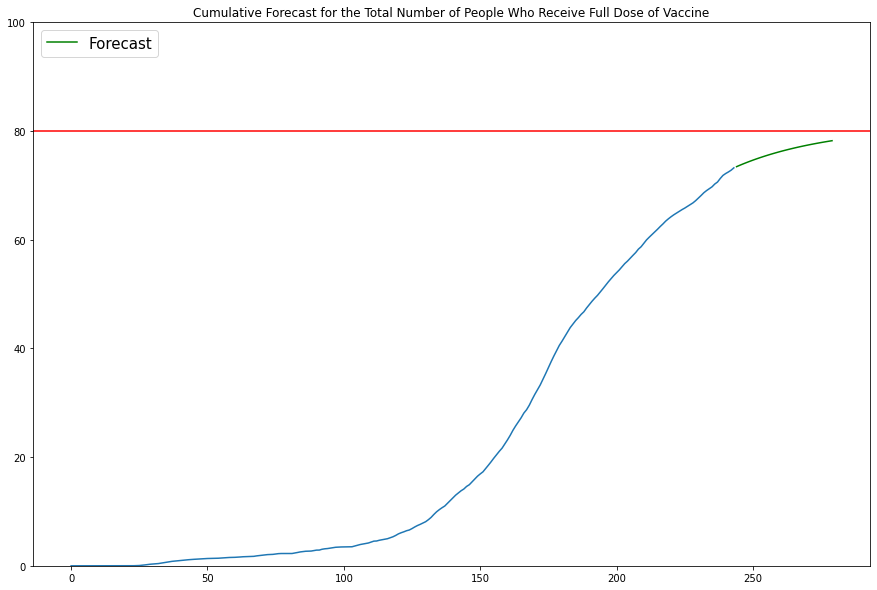

In [166]:
dailyfull = vax_my['daily_full'].copy()
dailyfull = dailyfull.append(results)
dailyfull= dailyfull.reset_index()
dailyfull['cumul'] = dailyfull[0].cumsum()
dailyfull

percentage_vac = (dailyfull['cumul'] / my_pop[0])*100
percentage_vac = percentage_vac.to_frame()

plt.figure(figsize=(15,10))
plt.plot(percentage_vac[:len(reg_q1)])
plt.plot(percentage_vac[len(reg_q1):], color='green',label='Forecast')
plt.axhline(y=80, color='r', linestyle='-')
plt.ylim(0,100)
plt.legend(loc='upper left', fontsize=15)
plt.title("Cumulative Forecast for the Total Number of People Who Receive Full Dose of Vaccine")
plt.show()

### 3.1.2 Prophet

In [167]:
df_prophet_q1 = vax_my[['date','daily_full']].copy()
df_prophet_q1

date  daily_full
0   2021-02-24           0
1   2021-02-25           0
2   2021-02-26           1
3   2021-02-27           1
4   2021-02-28           3
..         ...         ...
239 2021-10-21      186362
240 2021-10-22      113989
241 2021-10-23       94354
242 2021-10-24      106261
243 2021-10-25      140054

[244 rows x 2 columns]

In [168]:
df_prophet_q1.columns = ['ds', 'y']
df_prophet_q1['ds']= pd.to_datetime(df_prophet_q1['ds'])
df_prophet_q1

ds       y
0   2021-02-24       0
1   2021-02-25       0
2   2021-02-26       1
3   2021-02-27       1
4   2021-02-28       3
..         ...     ...
239 2021-10-21  186362
240 2021-10-22  113989
241 2021-10-23   94354
242 2021-10-24  106261
243 2021-10-25  140054

[244 rows x 2 columns]

#### 3.1.2.1 Out-of-Time Cross Validation

In Out-of-Time cross-validation, few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

To do out-of-time cross-validation, the training and testing dataset will be created by splitting the time series into 2 contiguous parts.

In [169]:
train_regq1_2 = df_prophet_q1[:214].copy()
test_regq1_2 = df_prophet_q1[214:].copy()
print(train_regq1_2.shape)
print(test_regq1_2.shape)

(214, 2)
(30, 2)


In [170]:
model_prop_q1 = fbprophet.Prophet()
model_prop_q1.fit(train_regq1_2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [171]:
with open(path +'Model/prophet_cases_q1', 'wb') as file:  
 pickle.dump(model_prop_q1 , file)

In [172]:
test_dates_q1 = model_prop_q1.make_future_dataframe(periods=30)
test_prediction = model_prop_q1.predict(test_dates_q1)

In [173]:
test_yhat = test_prediction['yhat']
test_yhat = test_yhat[214:]

In [174]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(test_yhat-test_regq1_2['y'].values)[1]   # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [175]:
forecast_accuracy(test_yhat, test_regq1_2['y'].values)

{'acf1': 0.556302070824202,
 'corr': 0.3523615745642078,
 'mae': 44163.33025900726,
 'mape': 0.37821966910312926,
 'me': 40635.197697814045,
 'minmax': 0.2523751700531034,
 'mpe': 0.36101675849345854,
 'rmse': 49613.2259465093}

#### 3.1.2.2 Forecasting

In [176]:
future_dates_q1 = model_prop_q1.make_future_dataframe(periods=30+daysbetween.days)
future_dates_q1

ds
0   2021-02-24
1   2021-02-25
2   2021-02-26
3   2021-02-27
4   2021-02-28
..         ...
275 2021-11-26
276 2021-11-27
277 2021-11-28
278 2021-11-29
279 2021-11-30

[280 rows x 1 columns]

In [177]:
prediction_prophet = model_prop_q1.predict(future_dates_q1)
prediction_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds           yhat    yhat_lower     yhat_upper
0   2021-02-24    8045.430919 -29491.137769   46731.493964
1   2021-02-25    8955.418333 -28383.057171   48998.198155
2   2021-02-26   -3204.251876 -41900.590703   34983.809324
3   2021-02-27  -10102.228964 -49532.509503   28334.292533
4   2021-02-28  -15365.189225 -54396.791618   20553.269448
..         ...            ...           ...            ...
275 2021-11-26  118541.497080  53121.338656  183923.607099
276 2021-11-27  110263.108772  44134.061228  173814.143646
277 2021-11-28  103619.737292  33112.867011  168111.905334
278 2021-11-29  121175.865694  50789.084371  185898.591956
279 2021-11-30  117494.895445  51025.393955  185178.291201

[280 rows x 4 columns]

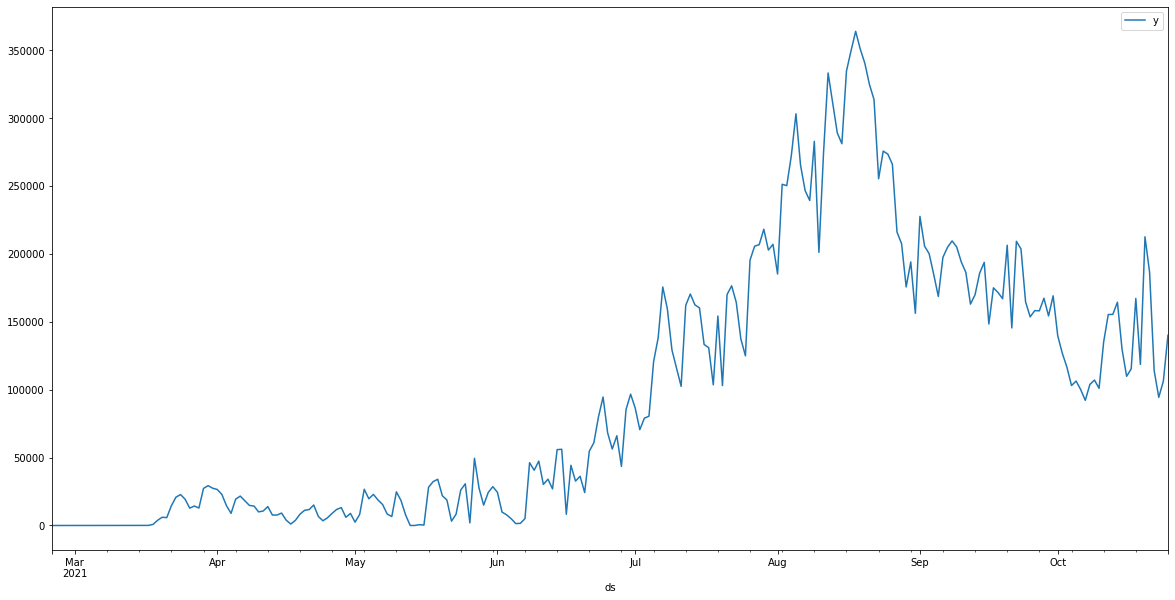

In [178]:
df_original_q1 = df_prophet_q1.set_index('ds')
df_original_q1.plot()

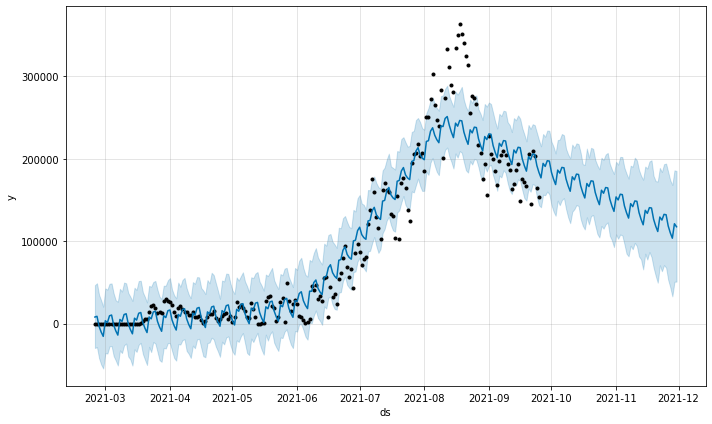

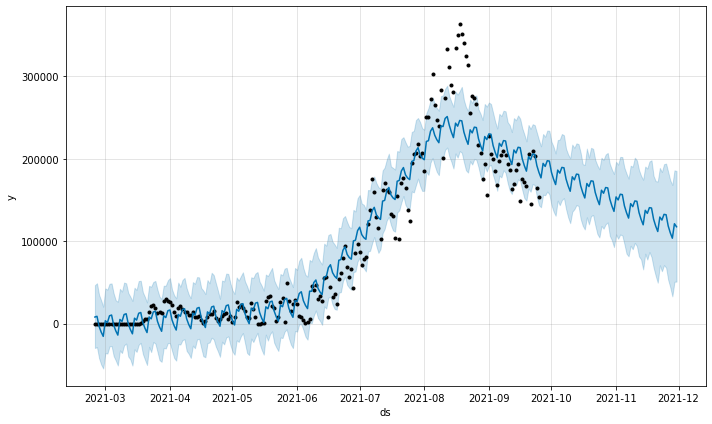

In [179]:
model_prop_q1.plot(prediction_prophet)

In [180]:
vac_80_q2 = prediction_prophet[prediction_prophet['ds'] > '2021-10-25'].yhat

In [181]:
x = 0
for i in vac_80_q2:
  x = x + i
cumul = vax_my.loc[len(vax_my)-1].cumul_full
cumul = cumul +x
herd = (cumul/my_pop[0])*100

if herd >= 80:
  print('Herd Imunity is archived at {:.2f} %'.format(herd))
else:
  print('Herd Imunity is not archived at {:.2f} %'.format(herd))

Herd Imunity is archived at 88.23 %


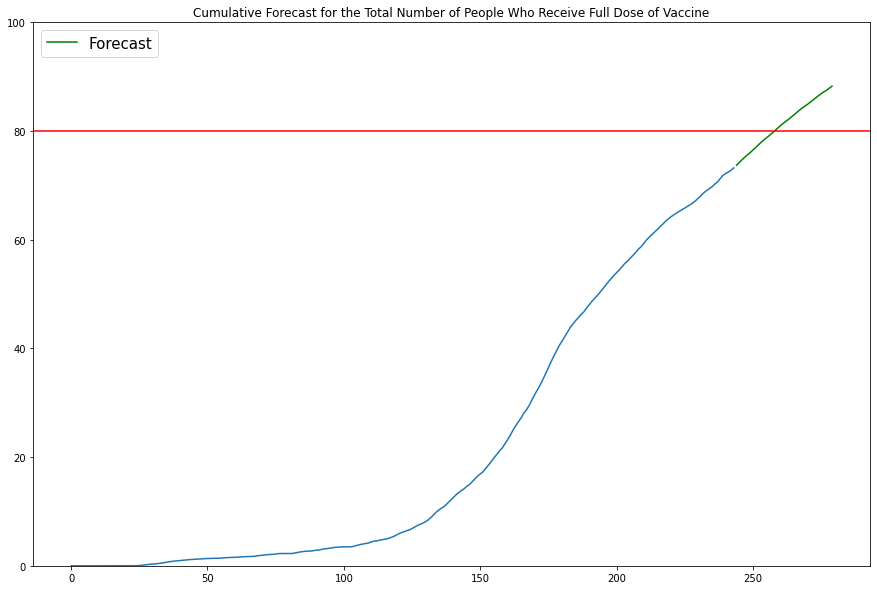

In [182]:
dailyfull2 = vax_my['daily_full'].copy()
dailyfull2 = dailyfull2.append(vac_80_q2)
dailyfull2 = dailyfull2.to_frame()
dailyfull2['cumul'] = dailyfull2[0].cumsum()

percentage_vac2 = (dailyfull2['cumul'] / my_pop[0])*100
percentage_vac2 = percentage_vac2.to_frame()

plt.figure(figsize=(15,10))
plt.plot(percentage_vac2[:len(reg_q1)])
plt.plot(percentage_vac2[len(reg_q1):], color='green',label='Forecast')
plt.axhline(y=80, color='r', linestyle='-')
plt.ylim(0,100)
plt.legend(loc='upper left', fontsize=15)
plt.title("Cumulative Forecast for the Total Number of People Who Receive Full Dose of Vaccine")
plt.show()

##3.2 When will the total number of COVID-19 cases drop below 1000 cases per day?

### 3.2.1 ARIMA Model

#### 3.2.2.1 Time Series Data Analysis

In [183]:
df_cases = cases_malaysia[['date','cases_new']]
df_cases['date'] = pd.to_datetime(df_cases['date'])

#filter for year 2021
df_cases = df_cases[df_cases['date'] > '2020-12-31']
df_cases = df_cases.set_index('date')
df_cases

cases_new
date                 
2021-01-01       2068
2021-01-02       2295
2021-01-03       1704
2021-01-04       1741
2021-01-05       2027
...               ...
2021-10-21       6210
2021-10-22       6630
2021-10-23       5828
2021-10-24       5666
2021-10-25       4782

[298 rows x 1 columns]

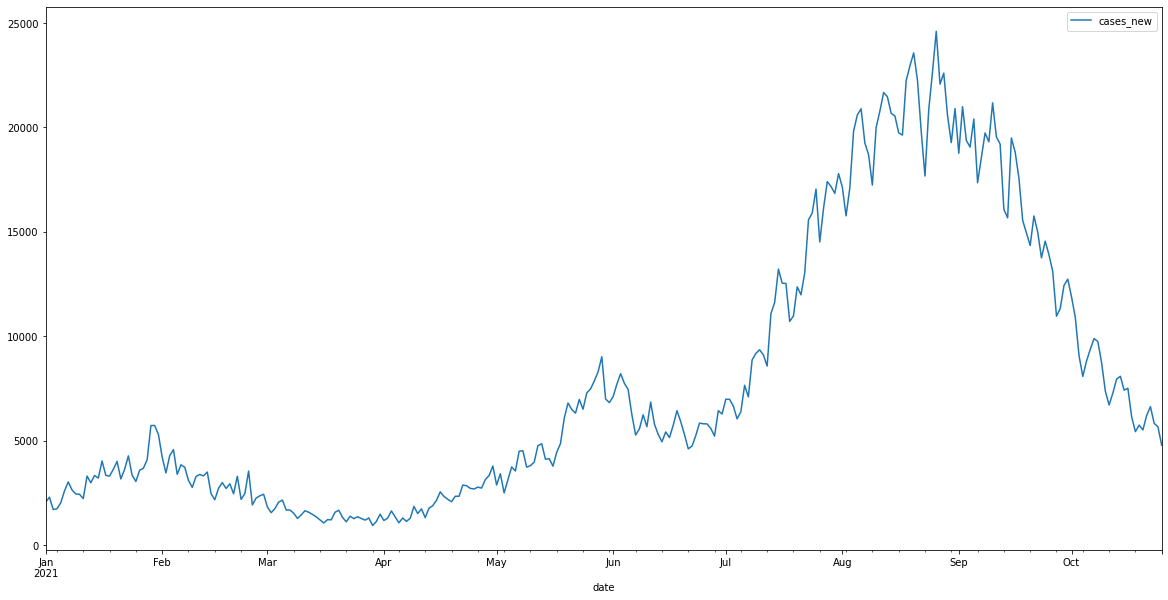

In [184]:
df_cases.plot()

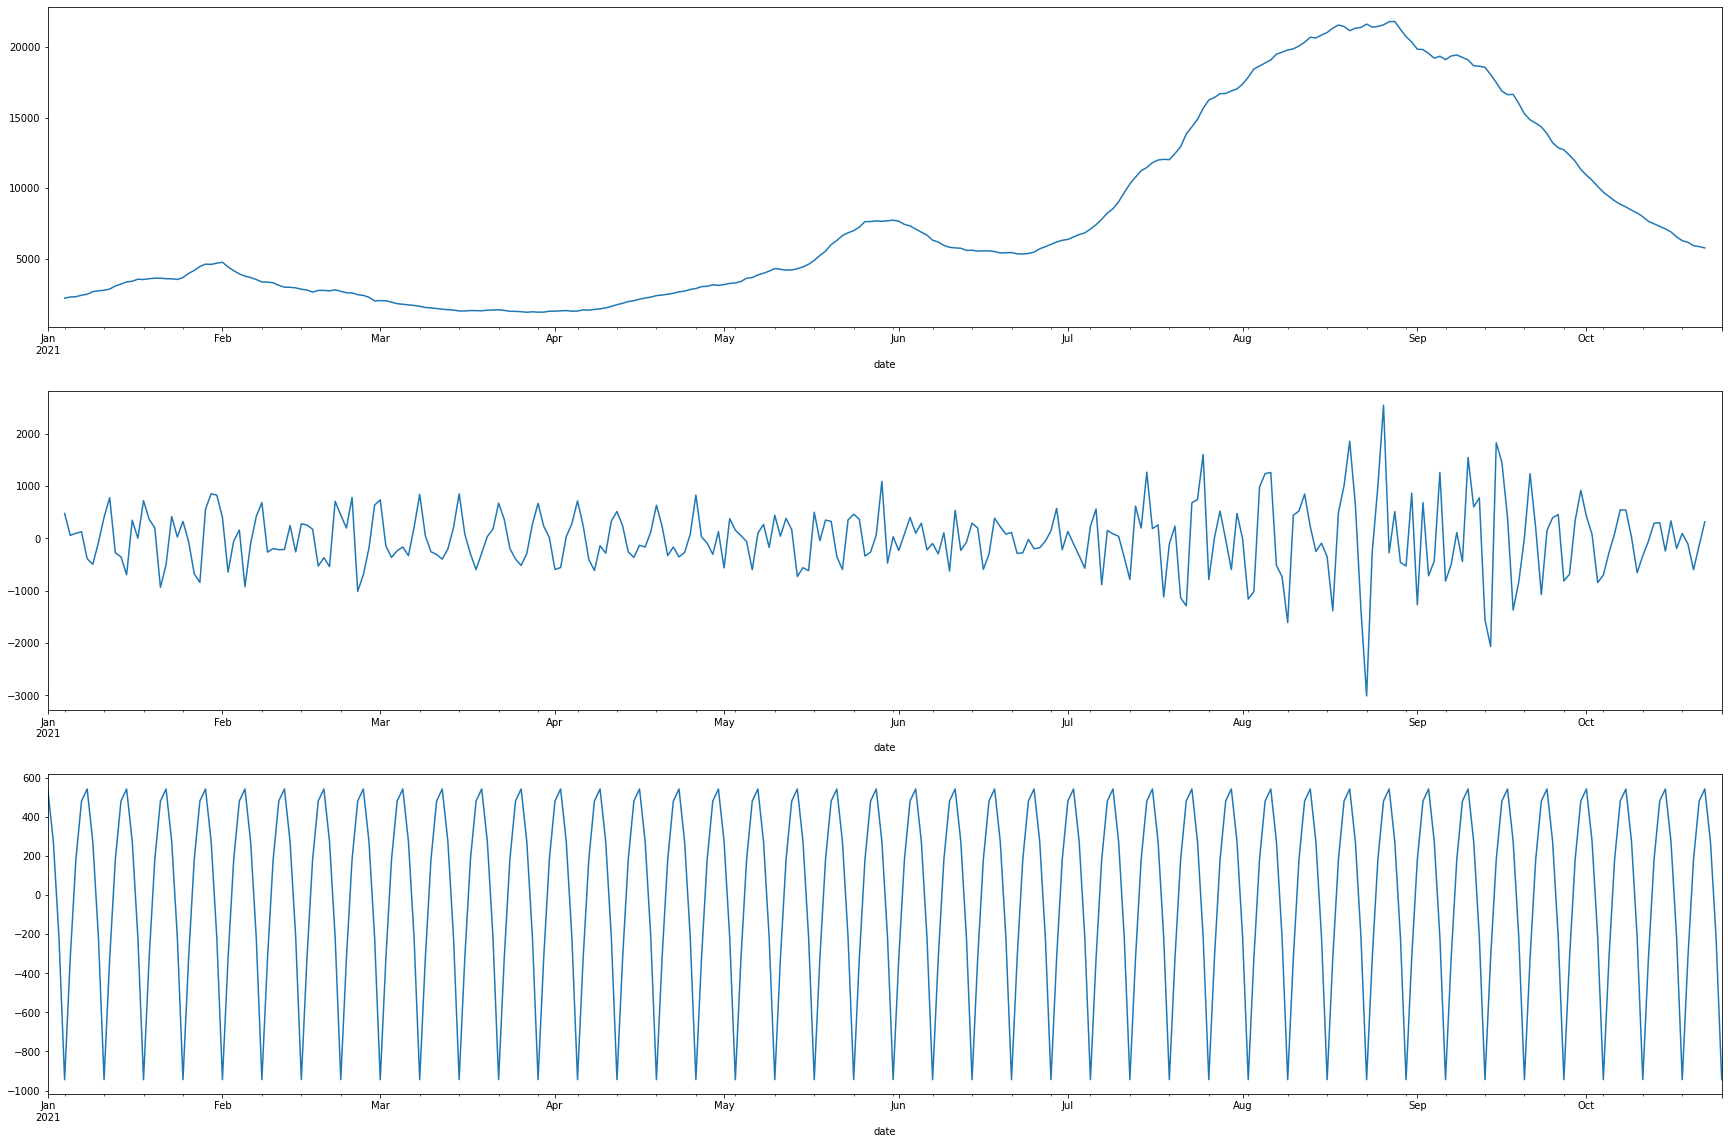

In [185]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df_cases, model = "add")

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(30,20))
res.trend.plot(ax=ax1)
res.resid.plot(ax=ax2)
res.seasonal.plot(ax=ax3)

In [186]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(cases_new):
    result=adfuller(cases_new)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df_cases['cases_new'])

ADF Test Statistic : -2.4299853639081705
p-value : 0.13345146976082412
#Lags Used : 16
Number of Observations : 281
weak evidence against null hypothesis,indicating it is non-stationary 


In [187]:
temp_df_cases = df_cases.copy()
temp_df_cases['First Order Differencing'] = df_cases['cases_new'].diff()
adfuller_test(temp_df_cases['First Order Differencing'].dropna())
#df_cases['Seasonal First Difference']=df_cases['cases_new']-df_cases['cases_new'].shift(12)

ADF Test Statistic : -1.6027804242268986
p-value : 0.4821966286223954
#Lags Used : 15
Number of Observations : 281
weak evidence against null hypothesis,indicating it is non-stationary 


First Order Differencing is able to change the time series data to stationary.

In [188]:
#temp_df_cases['Second Order Differencing'] = temp_df_cases['First Order Differencing'].diff()
#adfuller_test(temp_df_cases['Second Order Differencing'].dropna())

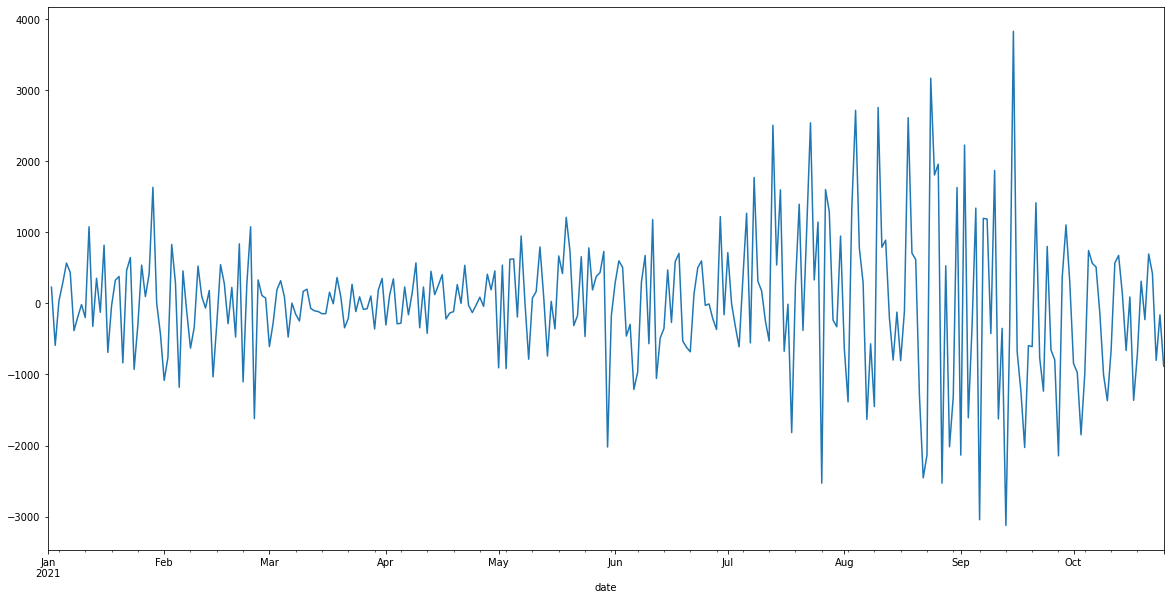

In [189]:
temp_df_cases['First Order Differencing'].plot()

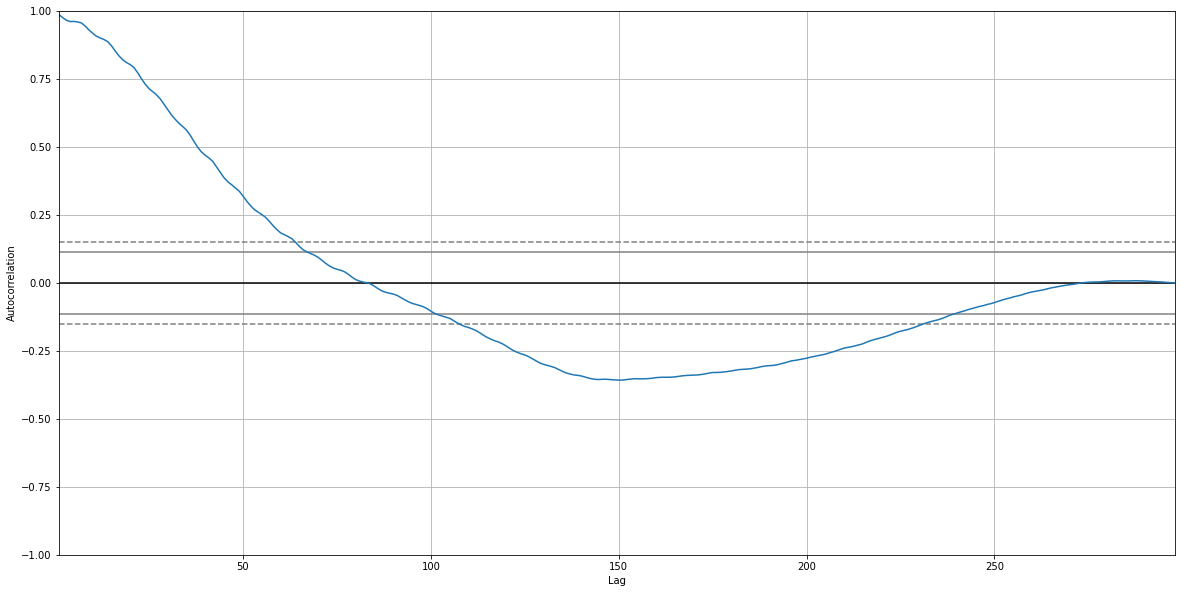

In [190]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(temp_df_cases['cases_new'])
plt.show()

In [191]:
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults 
model = ARIMA(df_cases, order=(10,2,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
print(model_fit.aic)

                               SARIMAX Results                                
Dep. Variable:              cases_new   No. Observations:                  298
Model:                ARIMA(10, 2, 1)   Log Likelihood               -2399.579
Date:                Tue, 09 Nov 2021   AIC                           4823.159
Time:                        02:55:58   BIC                           4867.443
Sample:                    01-01-2021   HQIC                          4840.889
                         - 10-25-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3936      0.125     -3.149      0.002      -0.639      -0.149
ar.L2         -0.3883      0.144     -2.696      0.007      -0.671      -0.106
ar.L3         -0.4558      0.155     -2.933      0.0

In [192]:
#model_fit.plot_predict(dynamic=False)
#plt.show()

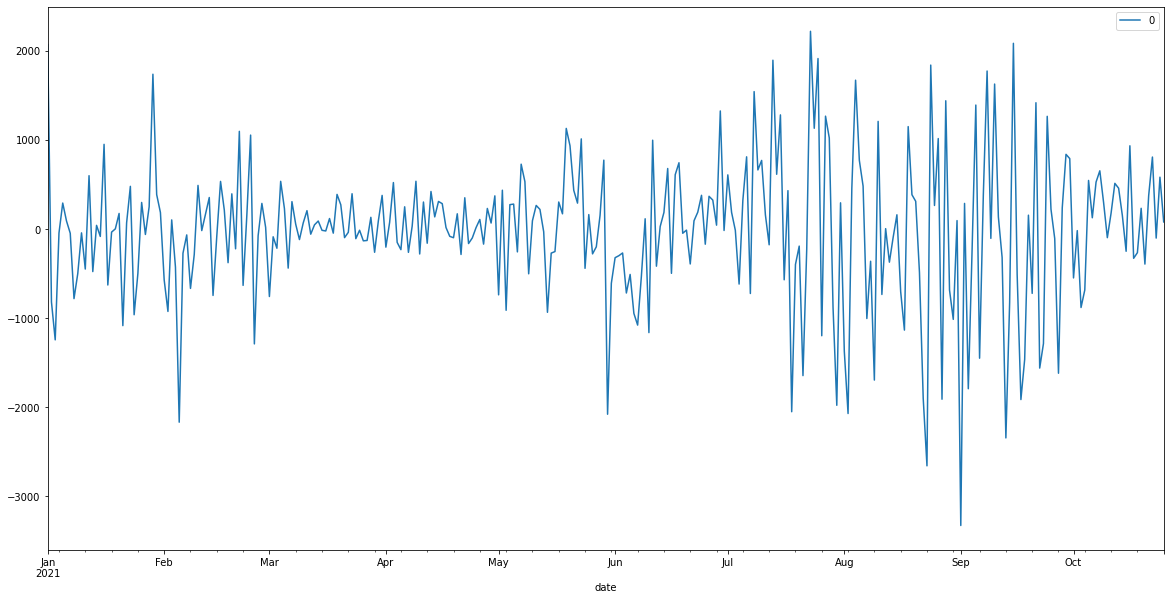

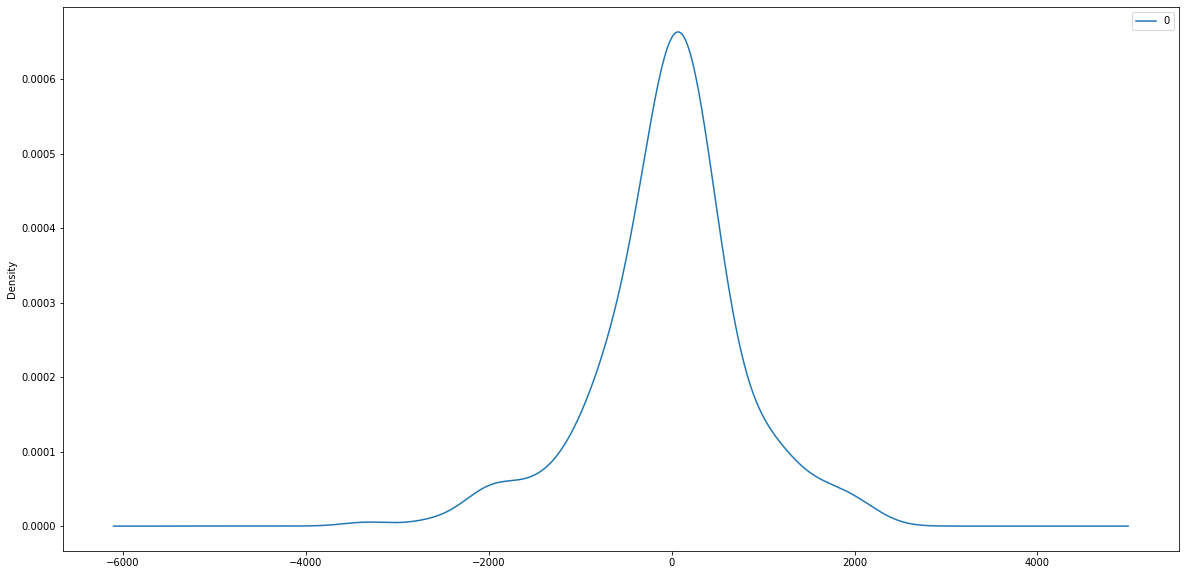

                 0
count   298.000000
mean    -22.539643
std     808.149189
min   -3327.398196
25%    -377.038416
50%      22.650350
75%     370.101701
max    2217.774923


In [193]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

#### 3.2.2.2 Out-of-Time Cross validation

In Out-of-Time cross-validation, few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

To do out-of-time cross-validation, the training and testing dataset will be created by splitting the time series into 2 contiguous parts. 

In [194]:
df_arima = df_cases.copy()
train_arima = df_arima[:293]
test_arima = df_arima[293:]
print(train_arima.shape)
print(test_arima.shape)

(293, 1)
(5, 1)


In [195]:
# Build Model 
#auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.
model_arima_reg2 = pm.auto_arima(train_arima, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

model_arima_reg2.fit(train_arima)

print(model_arima_reg2.summary())


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5037.724, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4961.557, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5035.731, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4946.184, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4937.859, Time=0.10 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=4883.253, Time=0.16 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=4858.818, Time=0.28 sec
 ARIMA(6,2,0)(0,0,0)[0] intercept   : AIC=4800.590, Time=0.28 sec
 ARIMA(7,2,0)(0,0,0)[0] intercept   : AIC=4767.639, Time=0.38 sec
 ARIMA(8,2,0)(0,0,0)[0] intercept   : AIC=4763.227, Time=0.52 sec
 ARIMA(9,2,0)(0,0,0)[0] intercept   : AIC=4750.264, Time=0.57 sec
 ARIMA(10,2,0)(0,0,0)[0] intercept   : AIC=4750.783, Time=0.59 sec
 ARIMA(9,2,1)(0,0,0)[0] intercept   : AIC=

In [196]:
with open(path +'Model/arima_cases', 'wb') as file:  
  pickle.dump(model_arima_reg2, file)

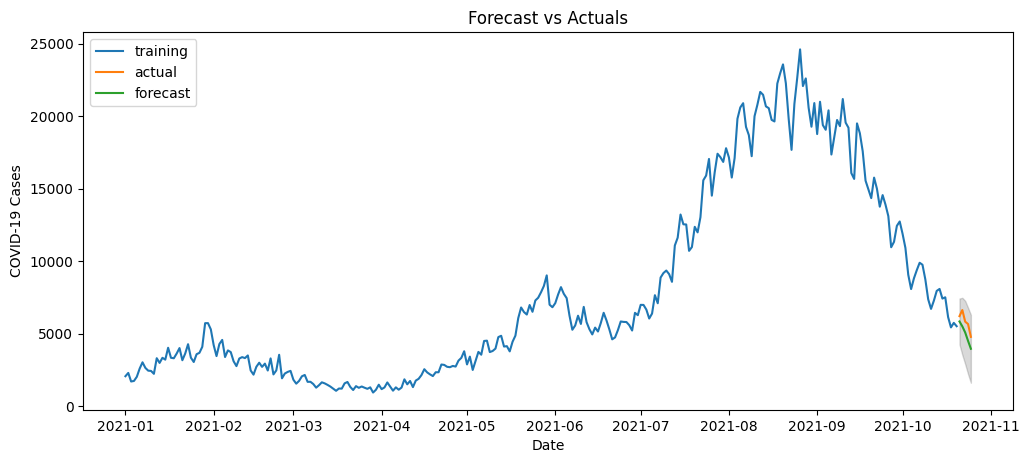

In [197]:
# Forecast
fc, conf = model_arima_reg2.predict(5, return_conf_int=True)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_arima.index)
lower_series = pd.Series(conf[:, 0], index=test_arima.index)
upper_series = pd.Series(conf[:, 1], index=test_arima.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_arima, label='training')
plt.plot(test_arima, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('COVID-19 Cases') 
plt.legend(loc='upper left', fontsize=10)
plt.show()

Evaluation Metrics:

- Mean Absolute Percentage Error (MAPE)
- Mean Error (ME)
- Mean Absolute Error (MAE)
- Mean Percentage Error (MPE)
- Root Mean Squared Error (RMSE)
- Lag 1 Autocorrelation of Error (ACF1)
- Correlation between the Actual and the Forecast (corr)
- Min-Max Error (minmax)

In [198]:
# Accuracy metrics
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test_arima['cases_new'])[1]   # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test_arima['cases_new'].values)


{'acf1': -0.48276981894856397,
 'corr': 0.9048633473504505,
 'mae': 844.4081547478834,
 'mape': 0.14674739108915064,
 'me': -844.4081547478834,
 'minmax': 0.14674739108915058,
 'mpe': -0.14674739108915064,
 'rmse': 892.2691475817525}

#### 3.2.2.3 Forecasting

In [199]:
from datetime import timedelta
time_steps = 1

while True:
  
  forecast_arr = model_arima_reg2.predict(n_periods=time_steps)
  forecast_arr_length = len(forecast_arr)
  forecast = forecast_arr[forecast_arr_length - 1]
  
  if(forecast < 1000):
    break
  time_steps += 1
 

print('The total number of COVID-19 cases will drop below 1000 cases per day on',(train_arima.index+timedelta(days=time_steps))[-1])


The total number of COVID-19 cases will drop below 1000 cases per day on 2021-11-07 00:00:00


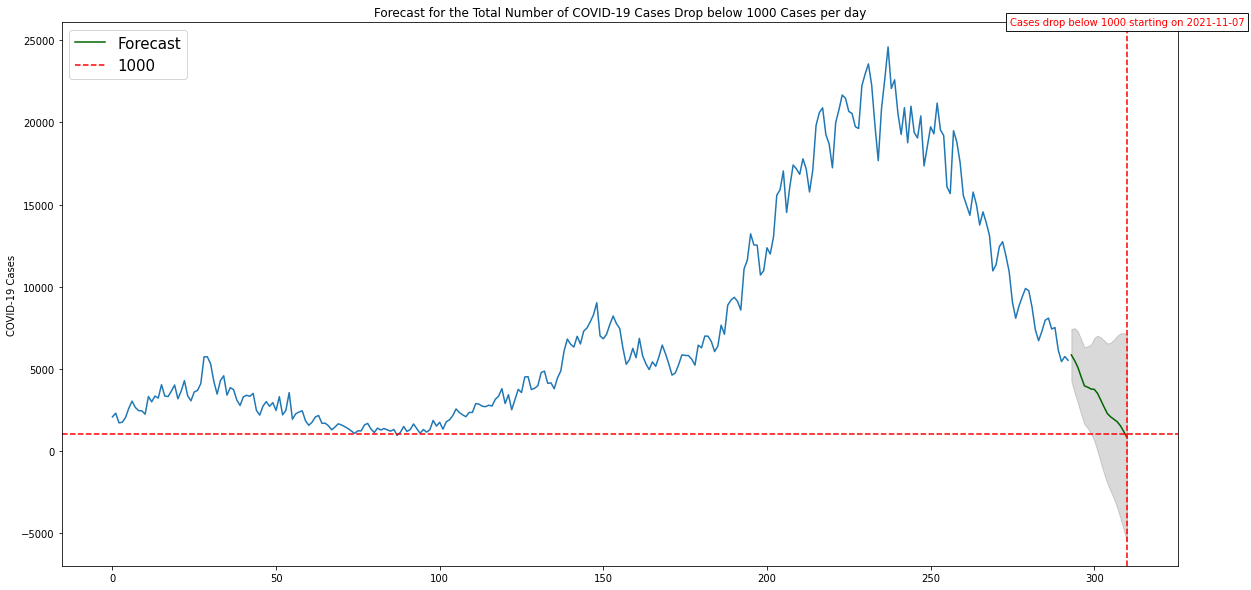

In [200]:
# Forecast
n_periods = time_steps
fc, confint = model_arima_reg2.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train_arima.values), len(train_arima.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train_arima.values)
plt.plot(fc_series, color='darkgreen',label='Forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.axhline(y=1000, color='r', linestyle='--',label='1000')

label_list = [
    (310, 'Cases drop below 1000 starting on 2021-11-07', 'r'),
 
]

ax = plt.gca()

for date_point, label, clr in label_list:
    plt.axvline(x=date_point, color=clr,linestyle='--')
    plt.text(date_point, ax.get_ylim()[1]-4, label,
             horizontalalignment='center',
             verticalalignment='center',
             color=clr,
             bbox=dict(facecolor='white', alpha=0.9))
plt.legend(loc='upper left', fontsize=15)
plt.ylabel('COVID-19 Cases') 

plt.title("Forecast for the Total Number of COVID-19 Cases Drop below 1000 Cases per day")
plt.show()

### 3.2.2 Prophet


In [201]:
# check prophet version
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [202]:
df_prophet = cases_malaysia[['date','cases_new']]
#df_prophet['date'] = pd.to_datetime(prophet['date'])

#filter for year 2021
df_prophet = df_prophet[df_prophet['date'] > '2020-12-31']
#df_cases = df_cases.set_index('date')
df_prophet

date  cases_new
342 2021-01-01       2068
343 2021-01-02       2295
344 2021-01-03       1704
345 2021-01-04       1741
346 2021-01-05       2027
..         ...        ...
635 2021-10-21       6210
636 2021-10-22       6630
637 2021-10-23       5828
638 2021-10-24       5666
639 2021-10-25       4782

[298 rows x 2 columns]

In [203]:
# prepare expected column names
df_prophet.columns = ['ds', 'y']
df_prophet['ds']= pd.to_datetime(df_prophet['ds'])
df_prophet

ds     y
342 2021-01-01  2068
343 2021-01-02  2295
344 2021-01-03  1704
345 2021-01-04  1741
346 2021-01-05  2027
..         ...   ...
635 2021-10-21  6210
636 2021-10-22  6630
637 2021-10-23  5828
638 2021-10-24  5666
639 2021-10-25  4782

[298 rows x 2 columns]

#### 3.2.2.1 Out-of-Time Cross Validation


In Out-of-Time cross-validation, few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

To do out-of-time cross-validation, the training and testing dataset will be created by splitting the time series into 2 contiguous parts.

In [204]:
train_regq2_2 = df_prophet[:293].copy()
test_regq2_2 = df_prophet[293:].copy()
print(train_regq2_2.shape)
print(test_regq2_2.shape)

(293, 2)
(5, 2)


In [205]:
## Apply Box-Cox Transform to value column and assign to new column y
#df_prophet['y'], lam = boxcox(df_prophet['y'])

In [206]:
# define the model
model_prophet_reg2 = fbprophet.Prophet()
# fit the model
model_prophet_reg2.fit(train_regq2_2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [207]:
with open(path +'Model/prophet_cases', 'wb') as file:  
  pickle.dump(model_prophet_reg2 , file)

In [208]:
test_future_dates = model_prophet_reg2.make_future_dataframe(periods=5)
test_forecast = model_prophet_reg2.predict(test_future_dates)
test_forecast

ds        trend  ...  multiplicative_terms_upper         yhat
0   2021-01-01  3510.208880  ...                         0.0  4026.665550
1   2021-01-02  3489.312052  ...                         0.0  3756.828096
2   2021-01-03  3468.415223  ...                         0.0  3240.011358
3   2021-01-04  3447.518395  ...                         0.0  2500.341557
4   2021-01-05  3426.621567  ...                         0.0  3109.883073
..         ...          ...  ...                         ...          ...
293 2021-10-21  6683.261631  ...                         0.0  7200.715344
294 2021-10-22  6432.487442  ...                         0.0  6948.944113
295 2021-10-23  6181.713253  ...                         0.0  6449.229298
296 2021-10-24  5930.939064  ...                         0.0  5702.535199
297 2021-10-25  5680.164875  ...                         0.0  4732.988038

[298 rows x 16 columns]

In [209]:
test_future_dates.shape

(298, 1)

In [210]:
test_yhat_q2 = test_forecast['yhat']
test_yhat_q2 = test_yhat_q2[293:]
test_yhat_q2.shape

(5,)

In [211]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1_2 = acf(test_yhat_q2-test_regq2_2['y'].values)[1]   # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1_2, 
            'corr':corr, 'minmax':minmax})

In [212]:
forecast_accuracy(test_yhat_q2, test_regq2_2['y'].values)

{'acf1': 0.01773542386005151,
 'corr': 0.9373541647364317,
 'mae': 403.28718332780755,
 'mape': 0.06618659969658217,
 'me': 383.68239838405407,
 'minmax': 0.059293224119258525,
 'mpe': 0.06208689560964083,
 'rmse': 542.7531804528517}

#### 3.2.2.2 Forecasting

In [213]:
future_dates = model_prophet_reg2.make_future_dataframe(periods=365)
future_dates

ds
0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
..         ...
653 2022-10-16
654 2022-10-17
655 2022-10-18
656 2022-10-19
657 2022-10-20

[658 rows x 1 columns]

In [214]:
forecast = model_prophet_reg2.predict(future_dates)

In [215]:
# Apply inverse Box-Cox transform to specific forecast columns
#forecast[['yhat','yhat_upper','yhat_lower']] = forecast[['yhat','yhat_upper','yhat_lower']].apply(lambda x: inv_boxcox(x, lam))


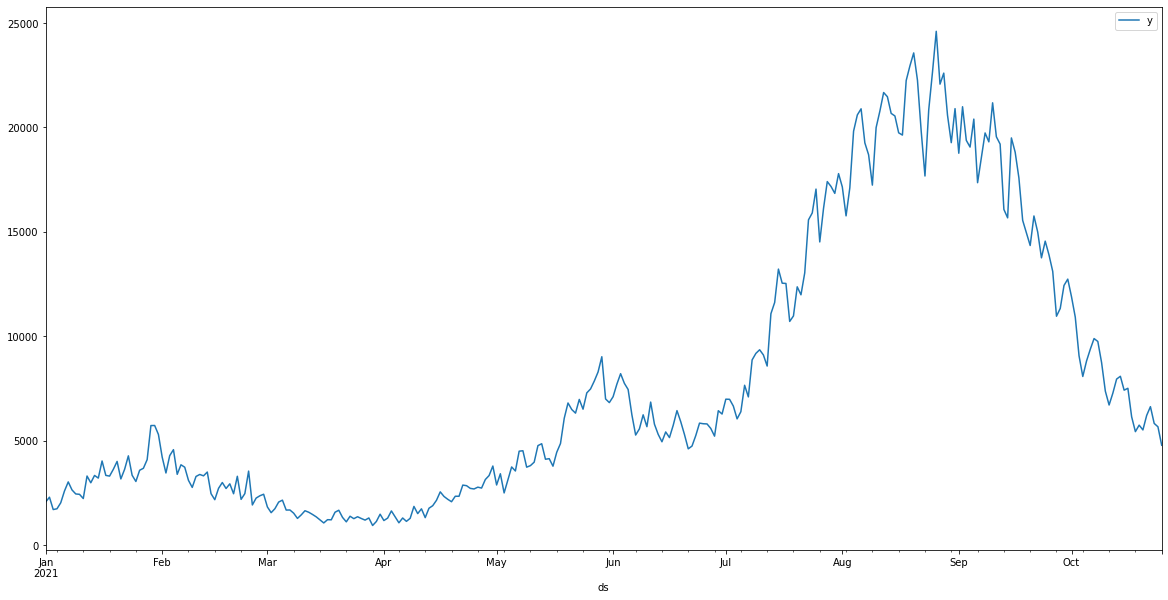

In [216]:
df_original = df_prophet.set_index('ds')
df_original.plot()

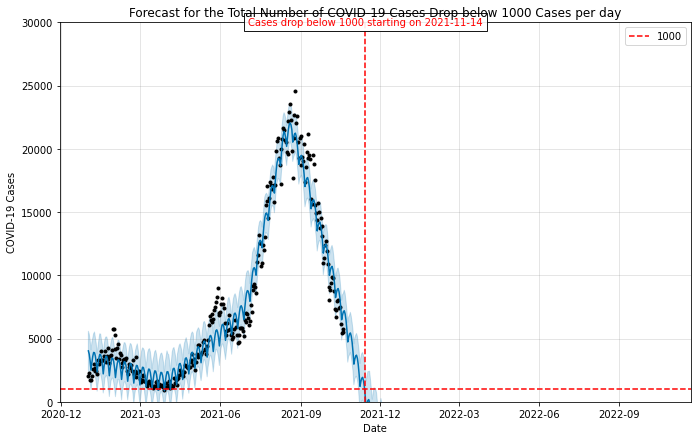

In [217]:
model_prophet_reg2.plot(forecast)
plt.ylim(0,30000)
plt.title("Forecast for the Total Number of COVID-19 Cases Drop below 1000 Cases per day")
plt.xlabel('Date')
plt.axhline(y=1000, color='r', linestyle='--',label='1000')

label_list = [
    (pd.to_datetime("2021-11-14"), 'Cases drop below 1000 starting on 2021-11-14', 'r'),
 
]

ax = plt.gca()

for date_point, label, clr in label_list:
    plt.axvline(x=date_point, color=clr,linestyle='--')
    plt.text(date_point, ax.get_ylim()[1]-4, label,
             horizontalalignment='center',
             verticalalignment='center',
             color=clr,
             bbox=dict(facecolor='white', alpha=0.9))
       
plt.ylabel('COVID-19 Cases') 
plt.legend()
plt.show()

In [218]:
below_1000 = (forecast['yhat']<1000) & (forecast['ds']>'2021-10-20')
print('The total number of COVID-19 cases drop below 1000 cases per day on', forecast[below_1000]['ds'].head(1).values)

The total number of COVID-19 cases drop below 1000 cases per day on ['2021-11-14T00:00:00.000000000']


In [219]:
fil = forecast['ds']> '2021-03-01'
forecast[fil]

ds         trend  ...  multiplicative_terms_upper          yhat
60  2021-03-02   2256.397208  ...                         0.0   1939.658714
61  2021-03-03   2235.500295  ...                         0.0   2426.393064
62  2021-03-04   2214.603382  ...                         0.0   2732.057095
63  2021-03-05   2193.706469  ...                         0.0   2710.163140
64  2021-03-06   2172.809556  ...                         0.0   2440.325601
..         ...           ...  ...                         ...           ...
653 2022-10-16 -83595.446393  ...                         0.0 -83823.850258
654 2022-10-17 -83846.220582  ...                         0.0 -84793.397420
655 2022-10-18 -84096.994771  ...                         0.0 -84413.733265
656 2022-10-19 -84347.768960  ...                         0.0 -84156.876191
657 2022-10-20 -84598.543149  ...                         0.0 -84081.089436

[598 rows x 16 columns]

### 3.2.3 Model Comparison

The result has shown that Prophet has outperformed the ARIMA model in many aspects. ARIMA has a larger MAE, ME, RMSE compared to Prophet. This means the prediction value much deviates from the real answer. With the result of 6.6% MAPE in the Prophet model, it implies the model is about 93.4% accurate in predicting the next few observations. However, with the result of 14.7% in the Prophet model, it implies that the model is only about 85.3% accurate in predicting the next few observations. After comparing the results in different aspects, Prophet is a better model to achieve the optimal accuracy in this time series problem. 

Both of the models have been used to perform forecasting the date in which the total number of COVID-19 cases drop below 1000 cases. Prophet has predicted that the total number of COVID-19 cases will drop below 1000 cases per day starting on 2021-11-14 whereas the ARIMA model predicted that the total number of COVID-19 cases will drop below 1000 cases per day starting on 2021-11-07. However, Prophet outperformed ARIMA in this time series problem. The forecasting result from Prophet is more promising compared to ARIMA. Therefore, it can be concluded that the total number of COVID-19 cases will drop below 1000 cases per day starting on 2021-11-14.

# 4.0 Classification

## 4.1 Cases

In [220]:
X_RFE_cases = X_RFE_cases[rfe_strong_features_cases].copy()
X_RFE_cases

cases_pvax  cases_adolescent  ...  daily_partial  cumul_partial
0           0.0              79.0  ...             60             60
1           0.0              65.0  ...           1146           1206
2           0.0              73.0  ...           4115           5321
3           0.0              94.0  ...           6723          12044
4           0.0              78.0  ...           6699          18743
..          ...               ...  ...            ...            ...
239       419.0             293.0  ...          30197       25317037
240       444.0             282.0  ...          25743       25344168
241       386.0             268.0  ...          11015       25355652
242       351.0             275.0  ...           9831       25366353
243         0.0               0.0  ...          21927       25388935

[244 rows x 21 columns]

In [221]:
y_RFE_cases.value_counts()

Low       157
Medium     45
High       42
Name: cases_new, dtype: int64

### 4.1.1 Before SMOTE


In [222]:
X_train, X_test, y_train, y_test = train_test_split(X_RFE_cases, y_RFE_cases, test_size=0.3, random_state=1)

In [223]:
#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)
#with open(path +'Model/lgbm_cases_1', 'wb') as file:  
#    pickle.dump(lgbm, file)

y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

LGBM Classifier
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        15
         Low       0.98      1.00      0.99        47
      Medium       1.00      0.92      0.96        12

    accuracy                           0.99        74
   macro avg       0.99      0.97      0.98        74
weighted avg       0.99      0.99      0.99        74

---------------------------



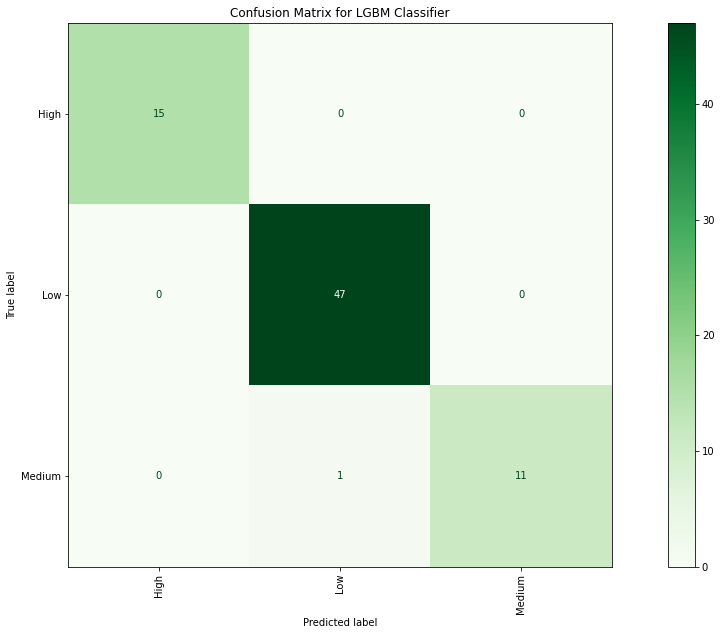

In [224]:
#confusion matrix plot
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for LGBM Classifier")
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lgbm,display_labels = lgbm.classes_)
lgbm_display.plot(cmap = 'Greens',xticks_rotation ='vertical',ax=ax1)

In [225]:
#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
#with open(path +'Model/rfc_cases_1', 'wb') as file:  
#    pickle.dump(rfc, file)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

Random Forest Classifier
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        15
         Low       0.98      1.00      0.99        47
      Medium       1.00      0.92      0.96        12

    accuracy                           0.99        74
   macro avg       0.99      0.97      0.98        74
weighted avg       0.99      0.99      0.99        74



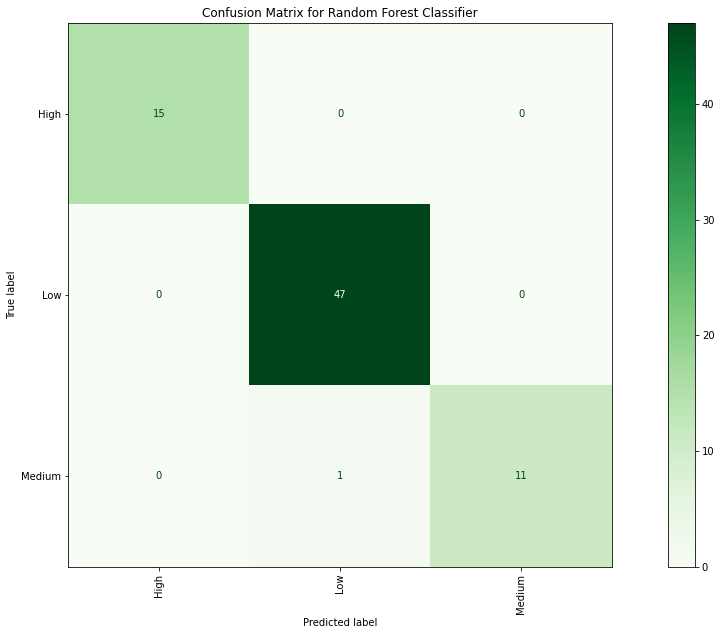

In [226]:
#confusion matrix plot
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for Random Forest Classifier")
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc,display_labels = rfc.classes_)
lgbm_display.plot(cmap = 'Greens', xticks_rotation ='vertical', ax=ax1)

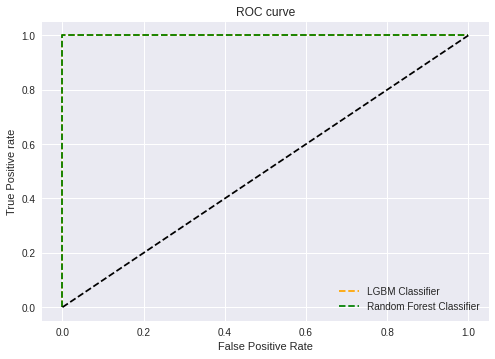

In [227]:
#ROC curve
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
#predict probability
pred_prob1 = lgbm.predict_proba(X_test)[:,1]
pred_prob2 = rfc.predict_proba(X_test)[:,1]
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LGBM Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

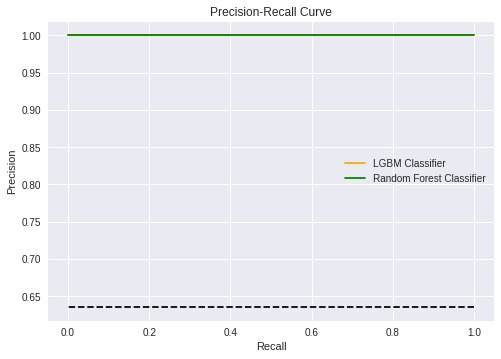

In [228]:
#Precision-Recall Curve
prec_lgbm, rec_lgbm, threshold_lgbm = precision_recall_curve(y_test, pred_prob1, pos_label=1)
prec_rfc, rec_rfc, threshold_rfc = precision_recall_curve(y_test, pred_prob2, pos_label=1)
plt.plot(rec_lgbm,prec_lgbm, color='orange', label='LGBM Classifier') 
plt.plot(rec_rfc, prec_rfc, color='green', label='Random Forest Classifier') 
baseline1 = len(y_test[y_test==1]) / len(y_test)
plt.plot([1, 0], [baseline1,baseline1], color='black', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

### 4.1.2 After SMOTE

In [229]:
X_resampled, y_resampled = SMOTE().fit_resample(X_RFE_cases, y_RFE_cases)
print(sorted(Counter(y_resampled).items()))

[('High', 157), ('Low', 157), ('Medium', 157)]


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [231]:
#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)
#with open(path +'Model/lgbm_cases_2', 'wb') as file:  
#    pickle.dump(lgbm, file)

y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

LGBM Classifier
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        51
         Low       1.00      1.00      1.00        44
      Medium       1.00      1.00      1.00        47

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

---------------------------



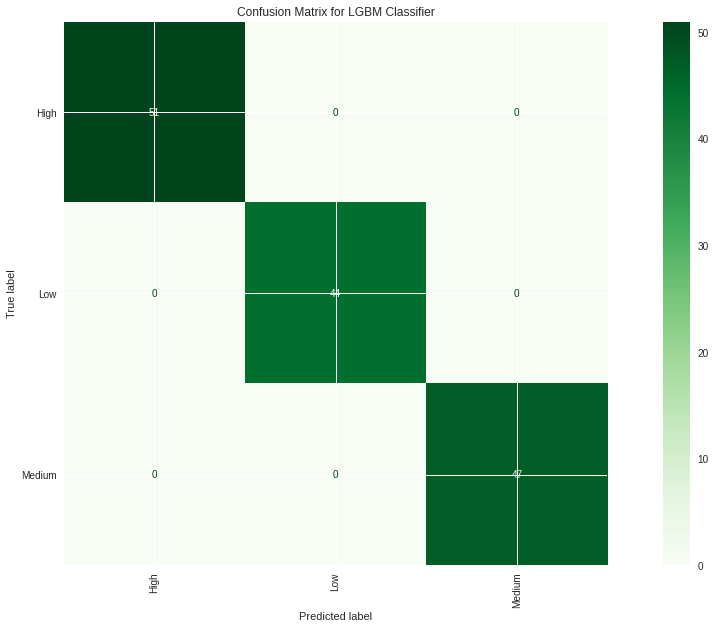

In [232]:
#confusion matrix plot
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for LGBM Classifier")
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lgbm,display_labels = lgbm.classes_)
lgbm_display.plot(cmap = 'Greens',xticks_rotation ='vertical',ax=ax1)

In [233]:
#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
#with open(path +'Model/rfc_cases_2', 'wb') as file:  
#    pickle.dump(rfc, file)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

Random Forest Classifier
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        51
         Low       1.00      1.00      1.00        44
      Medium       1.00      1.00      1.00        47

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



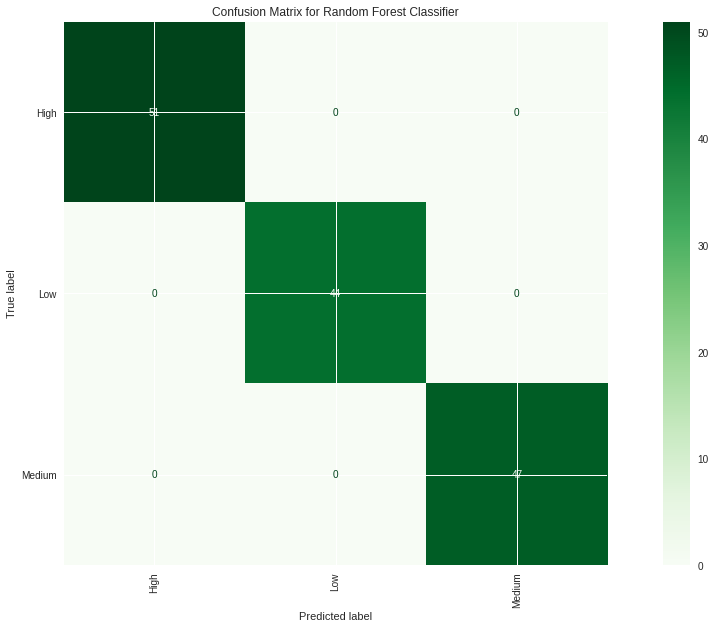

In [234]:
#confusion matrix plot
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for Random Forest Classifier")
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc,display_labels = rfc.classes_)
lgbm_display.plot(cmap = 'Greens', xticks_rotation ='vertical', ax=ax1)

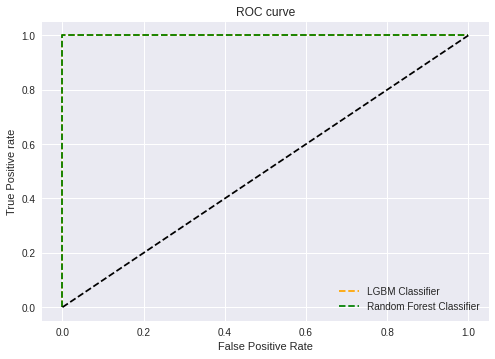

In [235]:
#ROC curve
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
#predict probability
pred_prob1 = lgbm.predict_proba(X_test)[:,1]
pred_prob2 = rfc.predict_proba(X_test)[:,1]
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LGBM Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

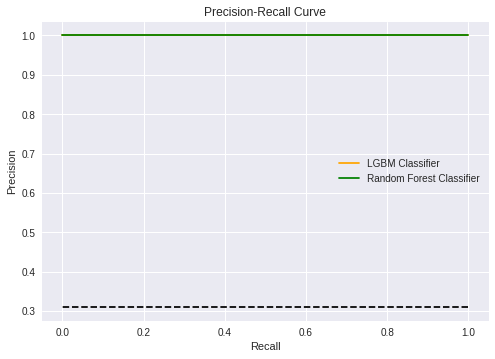

In [236]:
#Precision-Recall Curve
prec_lgbm, rec_lgbm, threshold_lgbm = precision_recall_curve(y_test, pred_prob1, pos_label=1)
prec_rfc, rec_rfc, threshold_rfc = precision_recall_curve(y_test, pred_prob2, pos_label=1)
plt.plot(rec_lgbm,prec_lgbm, color='orange', label='LGBM Classifier') 
plt.plot(rec_rfc, prec_rfc, color='green', label='Random Forest Classifier') 
baseline1 = len(y_test[y_test==1]) / len(y_test)
plt.plot([1, 0], [baseline1,baseline1], color='black', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

## 4.2 Deaths

In [237]:
X_RFE_deaths = X_RFE_deaths[rfe_strong_features_deaths].copy()
X_RFE_deaths

hosp_discharged_covid  pkrc_noncovid  ...  beds_noncrit  cumul_full
0                      422            252  ...         29756           0
1                      541            233  ...         29753           0
2                      366            253  ...         29753           1
3                      462            240  ...         29757           2
4                      428            227  ...         29755           5
..                     ...            ...  ...           ...         ...
239                    819             98  ...         35367    23451810
240                    775             91  ...         35287    23565799
241                    706            106  ...         35415    23660153
242                    551             12  ...         34125    23766414
243                    646              0  ...         35423    23906468

[244 rows x 45 columns]

In [238]:
y_RFE_deaths.value_counts()

Low       197
Medium     42
High        5
Name: deaths_new, dtype: int64

### 4.2.1 Before SMOTE

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X_RFE_deaths, y_RFE_deaths, test_size=0.3, random_state=1)

In [240]:
#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)
#with open(path +'Model/lgbm_deaths_1', 'wb') as file:  
#    pickle.dump(lgbm, file)
y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

LGBM Classifier
              precision    recall  f1-score   support

        High       1.00      0.50      0.67         2
         Low       0.98      0.95      0.97        59
      Medium       0.75      0.92      0.83        13

    accuracy                           0.93        74
   macro avg       0.91      0.79      0.82        74
weighted avg       0.94      0.93      0.93        74

---------------------------



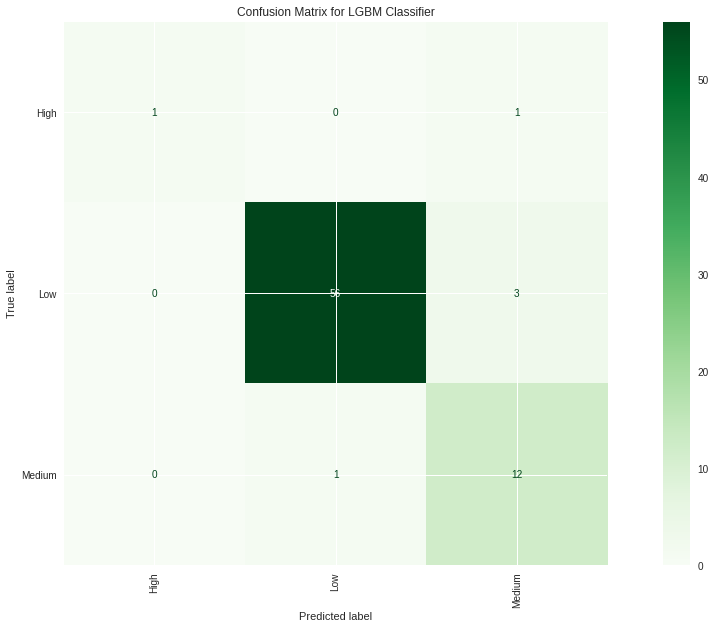

In [241]:
#confusion matrix plot
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for LGBM Classifier")
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lgbm,display_labels = lgbm.classes_)
lgbm_display.plot(cmap = 'Greens',xticks_rotation ='vertical',ax=ax1)

In [242]:
#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
#with open(path +'Model/rfc_deaths_1', 'wb') as file:  
#    pickle.dump(rfc, file)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

Random Forest Classifier
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         2
         Low       1.00      0.97      0.98        59
      Medium       0.76      1.00      0.87        13

    accuracy                           0.95        74
   macro avg       0.59      0.66      0.62        74
weighted avg       0.93      0.95      0.94        74



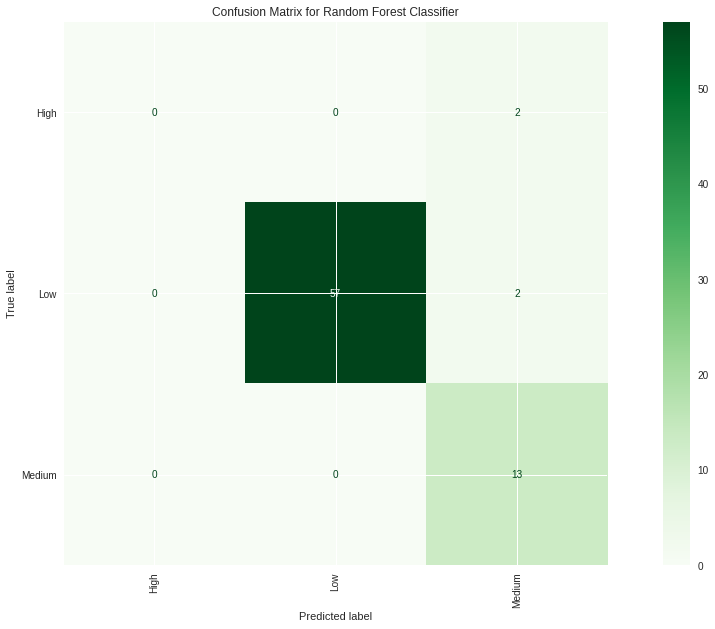

In [243]:
#confusion matrix plot
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for Random Forest Classifier")
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc,display_labels = rfc.classes_)
lgbm_display.plot(cmap = 'Greens', xticks_rotation ='vertical', ax=ax1)

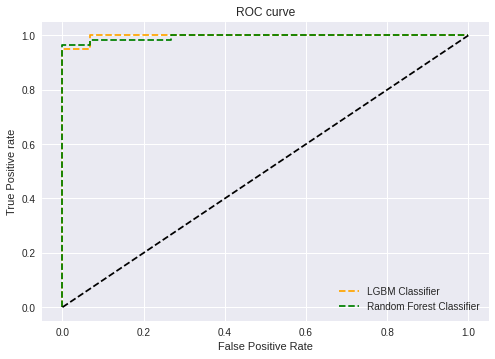

In [244]:
#ROC curve
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
#predict probability
pred_prob1 = lgbm.predict_proba(X_test)[:,1]
pred_prob2 = rfc.predict_proba(X_test)[:,1]
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LGBM Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

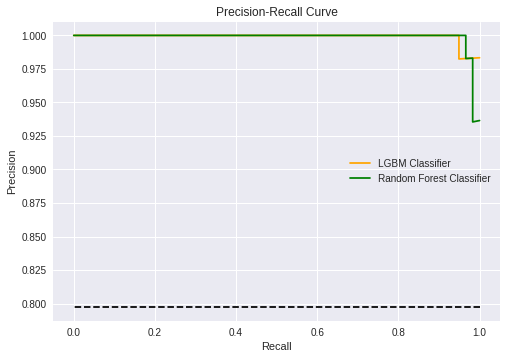

In [245]:
#Precision-Recall Curve
prec_lgbm, rec_lgbm, threshold_lgbm = precision_recall_curve(y_test, pred_prob1, pos_label=1)
prec_rfc, rec_rfc, threshold_rfc = precision_recall_curve(y_test, pred_prob2, pos_label=1)
plt.plot(rec_lgbm,prec_lgbm, color='orange', label='LGBM Classifier') 
plt.plot(rec_rfc, prec_rfc, color='green', label='Random Forest Classifier') 
baseline1 = len(y_test[y_test==1]) / len(y_test)
plt.plot([1, 0], [baseline1,baseline1], color='black', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

### 4.2.2 After SMOTE

In [246]:
X_resampled, y_resampled = SMOTE(k_neighbors=4).fit_resample(X_RFE_deaths, y_RFE_deaths)
print(sorted(Counter(y_resampled).items()))

[('High', 197), ('Low', 197), ('Medium', 197)]


In [247]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [248]:
#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)
#with open(path +'Model/lgbm_deaths_2', 'wb') as file:  
#    pickle.dump(lgbm, file)
y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

LGBM Classifier
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        60
         Low       1.00      0.97      0.98        60
      Medium       0.97      1.00      0.98        58

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178

---------------------------



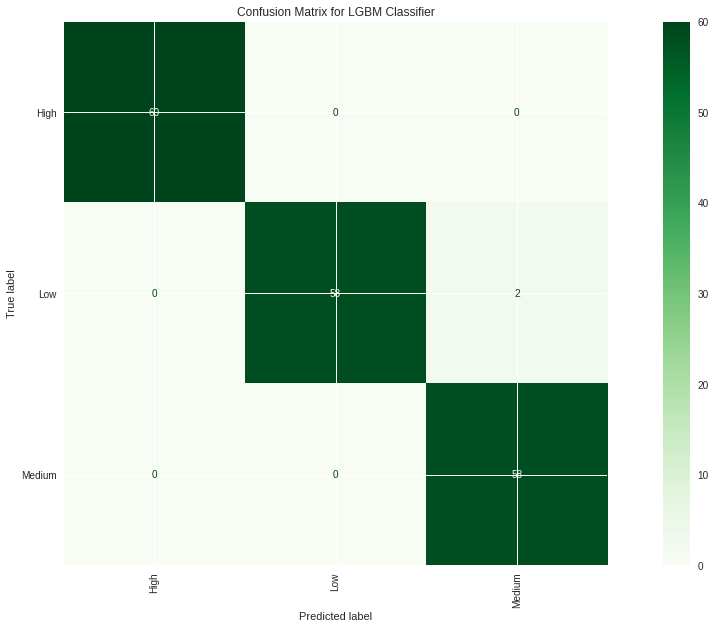

In [249]:
#confusion matrix plot
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for LGBM Classifier")
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lgbm,display_labels = lgbm.classes_)
lgbm_display.plot(cmap = 'Greens',xticks_rotation ='vertical',ax=ax1)

In [250]:
#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
#with open(path +'Model/rfc_deaths_2', 'wb') as file:  
#    pickle.dump(rfc, file)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

Random Forest Classifier
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        60
         Low       0.97      0.97      0.97        60
      Medium       0.97      0.97      0.97        58

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



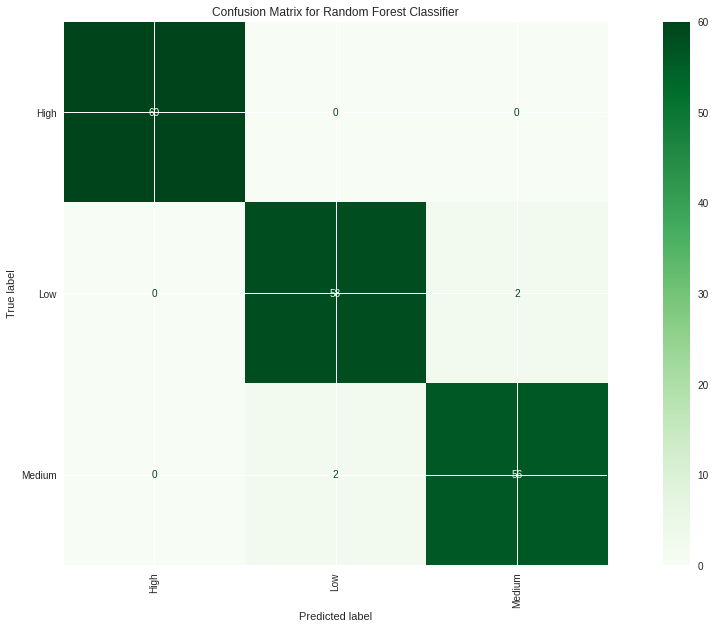

In [251]:
#confusion matrix plot
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for Random Forest Classifier")
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc,display_labels = rfc.classes_)
lgbm_display.plot(cmap = 'Greens', xticks_rotation ='vertical', ax=ax1)

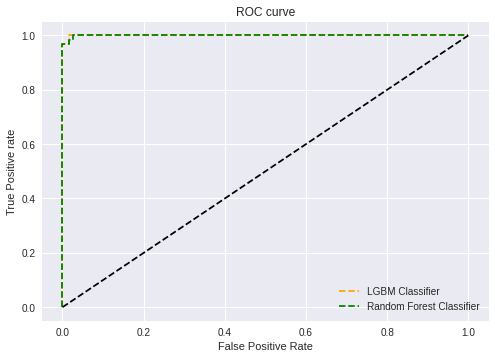

In [252]:
#ROC curve
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
#predict probability
pred_prob1 = lgbm.predict_proba(X_test)[:,1]
pred_prob2 = rfc.predict_proba(X_test)[:,1]
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LGBM Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

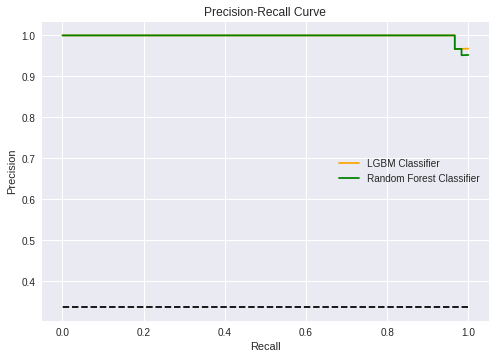

In [253]:
#Precision-Recall Curve
prec_lgbm, rec_lgbm, threshold_lgbm = precision_recall_curve(y_test, pred_prob1, pos_label=1)
prec_rfc, rec_rfc, threshold_rfc = precision_recall_curve(y_test, pred_prob2, pos_label=1)
plt.plot(rec_lgbm,prec_lgbm, color='orange', label='LGBM Classifier') 
plt.plot(rec_rfc, prec_rfc, color='green', label='Random Forest Classifier') 
baseline1 = len(y_test[y_test==1]) / len(y_test)
plt.plot([1, 0], [baseline1,baseline1], color='black', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

## 4.3 State Prediction

In [254]:
X_boruta_state = X_boruta_state[boruta_strong_features_state].copy()
X_boruta_state

cases_new  vent_used  vent_pui  ...  pkrc_covid  pkrc_pui  pkrc_noncovid
0           318        100         1  ...         428         2              0
1            17         59         0  ...         119         0              0
2            53         67         0  ...          98         2              2
3            26         29         0  ...          41         0              0
4          1392         22         0  ...           7         0              0
...         ...        ...       ...  ...         ...       ...            ...
3409        450         71         0  ...        1023        59              0
3410        493        119         0  ...        1694       685              0
3411        756        151         0  ...        1410         8              0
3412        298         33         0  ...         837        51              0
3413          0          3         0  ...          13        10              0

[3414 rows x 71 columns]

In [255]:
y_boruta_state.value_counts()

Perlis             244
Sarawak            244
Perak              244
Selangor           244
Kedah              244
Kelantan           244
Sabah              244
W.P. Labuan        244
Negeri Sembilan    244
Johor              244
Terengganu         244
Pahang             244
Melaka             243
Pulau Pinang       243
Name: state, dtype: int64

### 4.3.1 Before SMOTE

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X_boruta_state, y_boruta_state, test_size=0.3, random_state=1)

In [257]:
#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)
#with open(path +'Model/lgbm_state_1', 'wb') as file:  
#    pickle.dump(lgbm, file)
y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

LGBM Classifier
                 precision    recall  f1-score   support

          Johor       1.00      1.00      1.00        75
          Kedah       1.00      1.00      1.00        64
       Kelantan       1.00      1.00      1.00        64
         Melaka       1.00      1.00      1.00        75
Negeri Sembilan       1.00      1.00      1.00        65
         Pahang       1.00      1.00      1.00        79
          Perak       1.00      1.00      1.00        74
         Perlis       1.00      1.00      1.00        81
   Pulau Pinang       1.00      1.00      1.00        74
          Sabah       1.00      1.00      1.00        79
        Sarawak       1.00      1.00      1.00        73
       Selangor       1.00      1.00      1.00        69
     Terengganu       1.00      1.00      1.00        78
    W.P. Labuan       1.00      1.00      1.00        75

       accuracy                           1.00      1025
      macro avg       1.00      1.00      1.00      1025
   weighted a

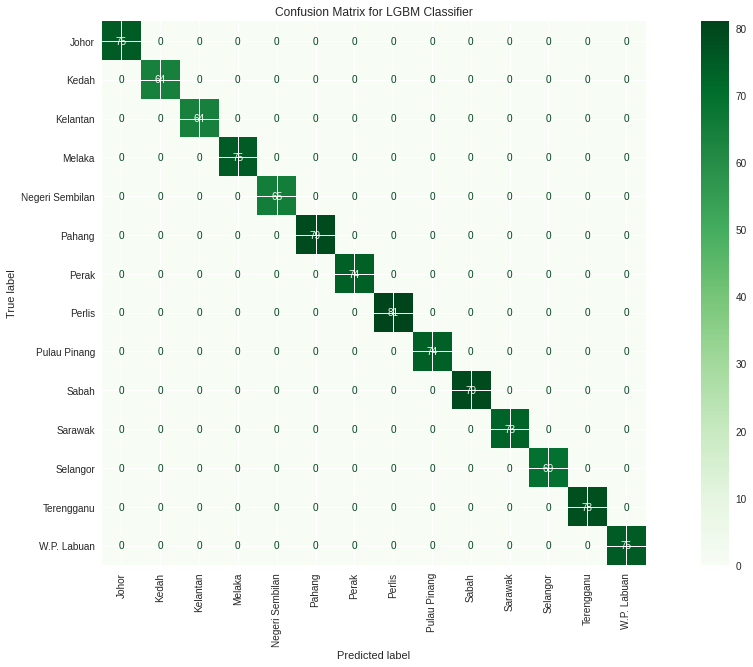

In [258]:
#confusion matrix plot
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for LGBM Classifier")
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lgbm,display_labels = lgbm.classes_)
lgbm_display.plot(cmap = 'Greens',xticks_rotation ='vertical',ax=ax1)

In [259]:
#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
#with open(path +'Model/rfc_state_1', 'wb') as file:  
#    pickle.dump(rfc, file)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

Random Forest Classifier
                 precision    recall  f1-score   support

          Johor       1.00      1.00      1.00        75
          Kedah       1.00      1.00      1.00        64
       Kelantan       1.00      1.00      1.00        64
         Melaka       1.00      1.00      1.00        75
Negeri Sembilan       1.00      1.00      1.00        65
         Pahang       1.00      1.00      1.00        79
          Perak       1.00      1.00      1.00        74
         Perlis       1.00      1.00      1.00        81
   Pulau Pinang       1.00      1.00      1.00        74
          Sabah       1.00      1.00      1.00        79
        Sarawak       1.00      1.00      1.00        73
       Selangor       1.00      1.00      1.00        69
     Terengganu       1.00      1.00      1.00        78
    W.P. Labuan       1.00      1.00      1.00        75

       accuracy                           1.00      1025
      macro avg       1.00      1.00      1.00      1025
   w

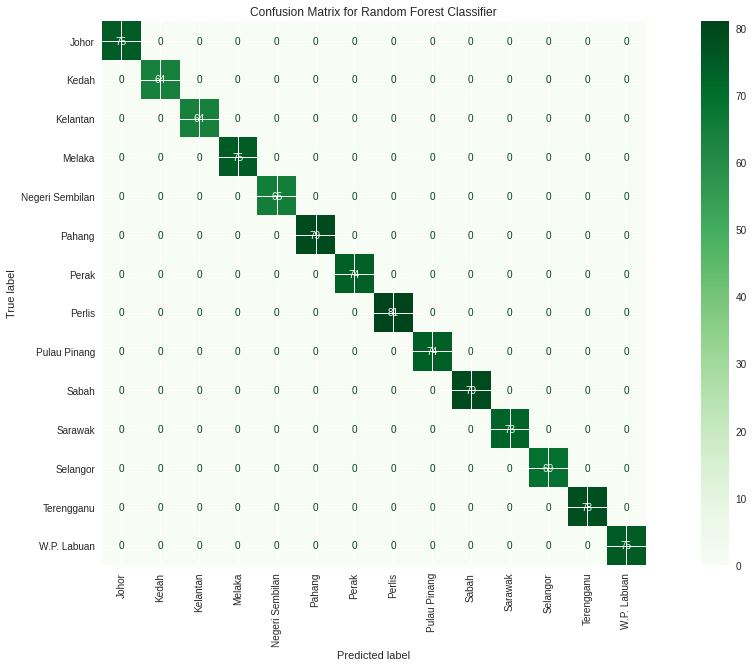

In [260]:
#confusion matrix plot
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for Random Forest Classifier")
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc,display_labels = rfc.classes_)
lgbm_display.plot(cmap = 'Greens', xticks_rotation ='vertical', ax=ax1)

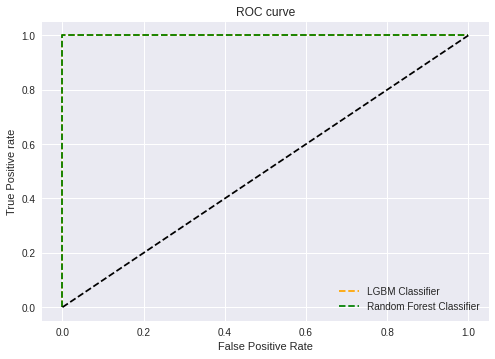

In [261]:
#ROC curve
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
#predict probability
pred_prob1 = lgbm.predict_proba(X_test)[:,1]
pred_prob2 = rfc.predict_proba(X_test)[:,1]
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LGBM Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

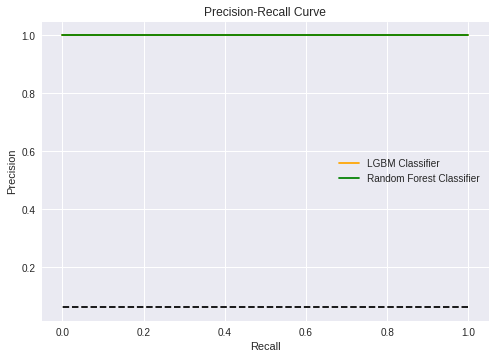

In [262]:
#Precision-Recall Curve
prec_lgbm, rec_lgbm, threshold_lgbm = precision_recall_curve(y_test, pred_prob1, pos_label=1)
prec_rfc, rec_rfc, threshold_rfc = precision_recall_curve(y_test, pred_prob2, pos_label=1)
plt.plot(rec_lgbm,prec_lgbm, color='orange', label='LGBM Classifier') 
plt.plot(rec_rfc, prec_rfc, color='green', label='Random Forest Classifier') 
baseline1 = len(y_test[y_test==1]) / len(y_test)
plt.plot([1, 0], [baseline1,baseline1], color='black', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

### 4.3.2 After SMOTE

In [263]:
X_resampled, y_resampled = SMOTE(k_neighbors=4).fit_resample(X_RFE_state, y_RFE_state)
print(sorted(Counter(y_resampled).items()))

[('Johor', 244), ('Kedah', 244), ('Kelantan', 244), ('Melaka', 244), ('Negeri Sembilan', 244), ('Pahang', 244), ('Perak', 244), ('Perlis', 244), ('Pulau Pinang', 244), ('Sabah', 244), ('Sarawak', 244), ('Selangor', 244), ('Terengganu', 244), ('W.P. Labuan', 244)]


In [264]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [265]:
#model 1: LGBM Classifier
print('=================')
print('LGBM Classifier')
print('=================')
lgbm =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.52, n_estimators=15, max_depth=12,
                                bagging_fraction=0.2, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train, y_train)
#with open(path +'Model/lgbm_state_2', 'wb') as file:  
#    pickle.dump(lgbm, file)
y_pred_lgbm  = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print('---------------------------\n')

LGBM Classifier
                 precision    recall  f1-score   support

          Johor       1.00      1.00      1.00        84
          Kedah       0.99      1.00      0.99        68
       Kelantan       0.98      1.00      0.99        58
         Melaka       1.00      1.00      1.00        74
Negeri Sembilan       1.00      1.00      1.00        64
         Pahang       1.00      1.00      1.00        81
          Perak       1.00      0.97      0.99        74
         Perlis       1.00      1.00      1.00        89
   Pulau Pinang       1.00      1.00      1.00        76
          Sabah       1.00      1.00      1.00        72
        Sarawak       1.00      1.00      1.00        66
       Selangor       1.00      1.00      1.00        70
     Terengganu       1.00      1.00      1.00        77
    W.P. Labuan       1.00      1.00      1.00        72

       accuracy                           1.00      1025
      macro avg       1.00      1.00      1.00      1025
   weighted a

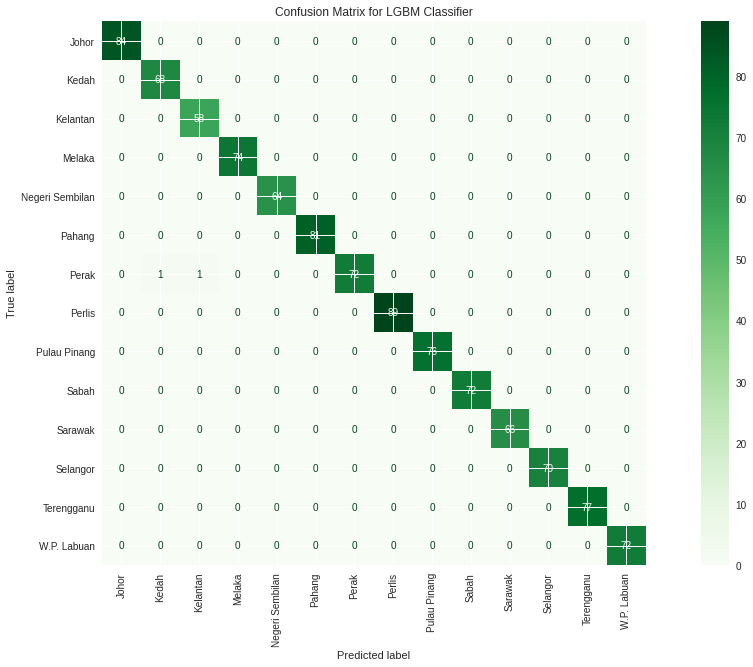

In [266]:
#confusion matrix plot
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for LGBM Classifier")
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lgbm,display_labels = lgbm.classes_)
lgbm_display.plot(cmap = 'Greens',xticks_rotation ='vertical',ax=ax1)

In [267]:
#model 2: Random Forest Classifier
print('=================')
print('Random Forest Classifier')
print('=================')
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
#with open(path +'Model/rfc_state_2', 'wb') as file:  
#    pickle.dump(rfc, file)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

Random Forest Classifier
                 precision    recall  f1-score   support

          Johor       1.00      1.00      1.00        84
          Kedah       1.00      1.00      1.00        68
       Kelantan       1.00      1.00      1.00        58
         Melaka       1.00      1.00      1.00        74
Negeri Sembilan       1.00      1.00      1.00        64
         Pahang       1.00      1.00      1.00        81
          Perak       1.00      1.00      1.00        74
         Perlis       1.00      1.00      1.00        89
   Pulau Pinang       1.00      1.00      1.00        76
          Sabah       1.00      1.00      1.00        72
        Sarawak       1.00      1.00      1.00        66
       Selangor       1.00      1.00      1.00        70
     Terengganu       1.00      1.00      1.00        77
    W.P. Labuan       1.00      1.00      1.00        72

       accuracy                           1.00      1025
      macro avg       1.00      1.00      1.00      1025
   w

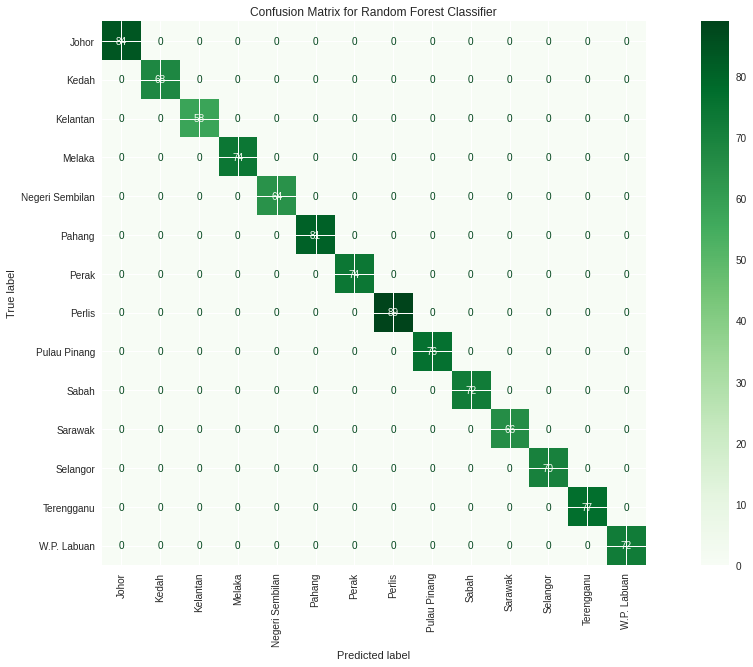

In [268]:
#confusion matrix plot
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for Random Forest Classifier")
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc,display_labels = rfc.classes_)
lgbm_display.plot(cmap = 'Greens', xticks_rotation ='vertical', ax=ax1)

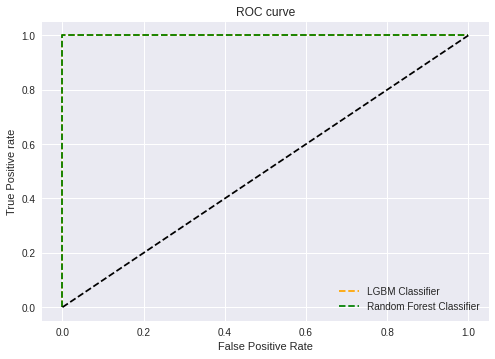

In [269]:
#ROC curve
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
#predict probability
pred_prob1 = lgbm.predict_proba(X_test)[:,1]
pred_prob2 = rfc.predict_proba(X_test)[:,1]
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LGBM Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

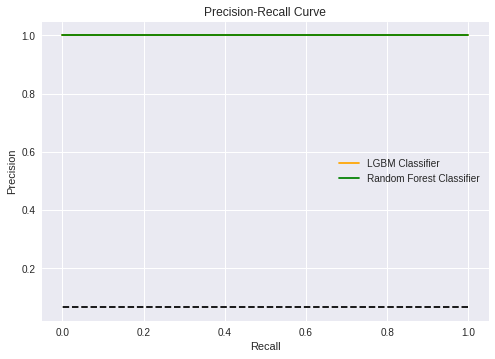

In [270]:
#Precision-Recall Curve
prec_lgbm, rec_lgbm, threshold_lgbm = precision_recall_curve(y_test, pred_prob1, pos_label=1)
prec_rfc, rec_rfc, threshold_rfc = precision_recall_curve(y_test, pred_prob2, pos_label=1)
plt.plot(rec_lgbm,prec_lgbm, color='orange', label='LGBM Classifier') 
plt.plot(rec_rfc, prec_rfc, color='green', label='Random Forest Classifier') 
baseline1 = len(y_test[y_test==1]) / len(y_test)
plt.plot([1, 0], [baseline1,baseline1], color='black', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# 5.0 Association Rule Mining

In [271]:
data = pd.read_csv(path + 'Datasets/COVID Dataset.csv')
data

Breathing Problem Fever  ... Sanitization from Market COVID-19
0                  Yes   Yes  ...                       No      Yes
1                  Yes   Yes  ...                       No      Yes
2                  Yes   Yes  ...                       No      Yes
3                  Yes   Yes  ...                       No      Yes
4                  Yes   Yes  ...                       No      Yes
...                ...   ...  ...                      ...      ...
5429               Yes   Yes  ...                       No      Yes
5430               Yes   Yes  ...                       No      Yes
5431               Yes   Yes  ...                       No       No
5432               Yes   Yes  ...                       No       No
5433               Yes   Yes  ...                       No       No

[5434 rows x 21 columns]

In [272]:
for i in data.columns:
    data[i] = data[i].map(dict(Yes=True, No=False))
data

Breathing Problem  Fever  ...  Sanitization from Market  COVID-19
0                  True   True  ...                     False      True
1                  True   True  ...                     False      True
2                  True   True  ...                     False      True
3                  True   True  ...                     False      True
4                  True   True  ...                     False      True
...                 ...    ...  ...                       ...       ...
5429               True   True  ...                     False      True
5430               True   True  ...                     False      True
5431               True   True  ...                     False     False
5432               True   True  ...                     False     False
5433               True   True  ...                     False     False

[5434 rows x 21 columns]

In [273]:
itemsets = apriori(data, min_support=0.5, use_colnames=True)
itemsets[['COVID-19' in i for i in itemsets['itemsets']]].sort_values('support', ascending=False)

support                                    itemsets
9   0.806588                                  (COVID-19)
18  0.713655                       (COVID-19, Dry Cough)
16  0.691388                           (COVID-19, Fever)
19  0.675193                     (Sore throat, COVID-19)
13  0.619985               (COVID-19, Breathing Problem)
24  0.611152                (COVID-19, Dry Cough, Fever)
25  0.596430              (Sore throat, COVID-19, Fever)
26  0.593301          (Sore throat, COVID-19, Dry Cough)
21  0.530180    (COVID-19, Breathing Problem, Dry Cough)
22  0.525580  (COVID-19, Sore throat, Breathing Problem)
27  0.519139   (Sore throat, COVID-19, Dry Cough, Fever)
20  0.509937        (COVID-19, Breathing Problem, Fever)

In [274]:
rules = association_rules(itemsets, min_threshold=0.9)
rules[['COVID-19' in i for i in rules['consequents']]].sort_values('support', ascending=False)

antecedents consequents  ...  leverage  conviction
1                       (Dry Cough)  (COVID-19)  ...  0.074351    1.941783
2                     (Sore throat)  (COVID-19)  ...  0.088435    2.692102
0               (Breathing Problem)  (COVID-19)  ...  0.082656    2.789446
6                (Dry Cough, Fever)  (COVID-19)  ...  0.091338    3.742145
7              (Sore throat, Fever)  (COVID-19)  ...  0.087600    3.545539
8          (Sore throat, Dry Cough)  (COVID-19)  ...  0.097088    5.433410
4    (Breathing Problem, Dry Cough)  (COVID-19)  ...  0.079684    3.811721
5  (Sore throat, Breathing Problem)  (COVID-19)  ...  0.083248    4.648124
9   (Sore throat, Dry Cough, Fever)  (COVID-19)  ...  0.094767   14.551697
3        (Breathing Problem, Fever)  (COVID-19)  ...  0.073394    3.346025

[10 rows x 9 columns]

# 6.0 Clustering

In [275]:
cases_clustering = cases_malaysia[['date','cases_new']].copy()
death_clustering = final_death_my[['date','deaths_new']].copy()
clustering = cases_clustering.merge(death_clustering, how='inner', on=['date'])
#clustering = clustering[clustering['date']>'2020-12-31']
clustering

date  cases_new  deaths_new
0   2020-03-17        120           2
1   2020-03-18        117           0
2   2020-03-19        110           0
3   2020-03-20        130           1
4   2020-03-21        153           4
..         ...        ...         ...
583 2021-10-21       6210          96
584 2021-10-22       6630          78
585 2021-10-23       5828          42
586 2021-10-24       5666          46
587 2021-10-25       4782          92

[588 rows x 3 columns]

In [276]:
clustering_X = clustering.drop(['date'], axis=1)

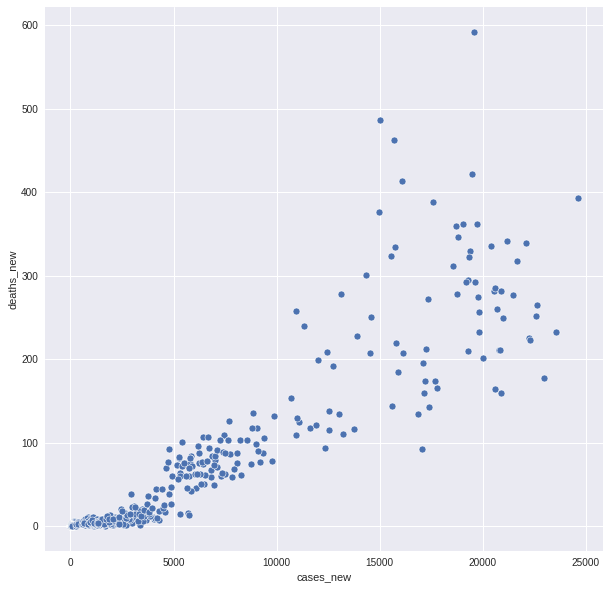

In [277]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='cases_new', y='deaths_new', data=clustering)
plt.show()

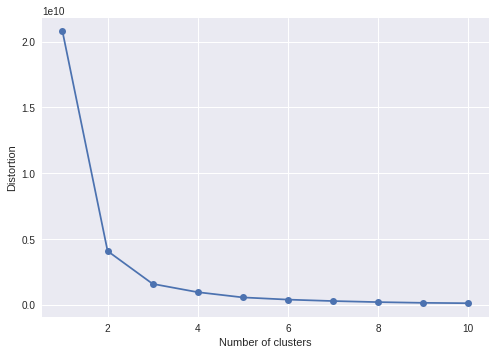

In [278]:
distortions = []

# your codes here...
for i in range(1,11):
    km1 = KMeans(n_clusters=i, random_state=1).fit(clustering_X)
    distortions.append(km1.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [279]:
km = KMeans(n_clusters=6, random_state=1).fit(clustering_X)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [280]:
clustering_new = clustering.copy()
clustering_new['cluster']=km.labels_
clustering_new

date  cases_new  deaths_new  cluster
0   2020-03-17        120           2        0
1   2020-03-18        117           0        0
2   2020-03-19        110           0        0
3   2020-03-20        130           1        0
4   2020-03-21        153           4        0
..         ...        ...         ...      ...
583 2021-10-21       6210          96        2
584 2021-10-22       6630          78        2
585 2021-10-23       5828          42        2
586 2021-10-24       5666          46        2
587 2021-10-25       4782          92        2

[588 rows x 4 columns]

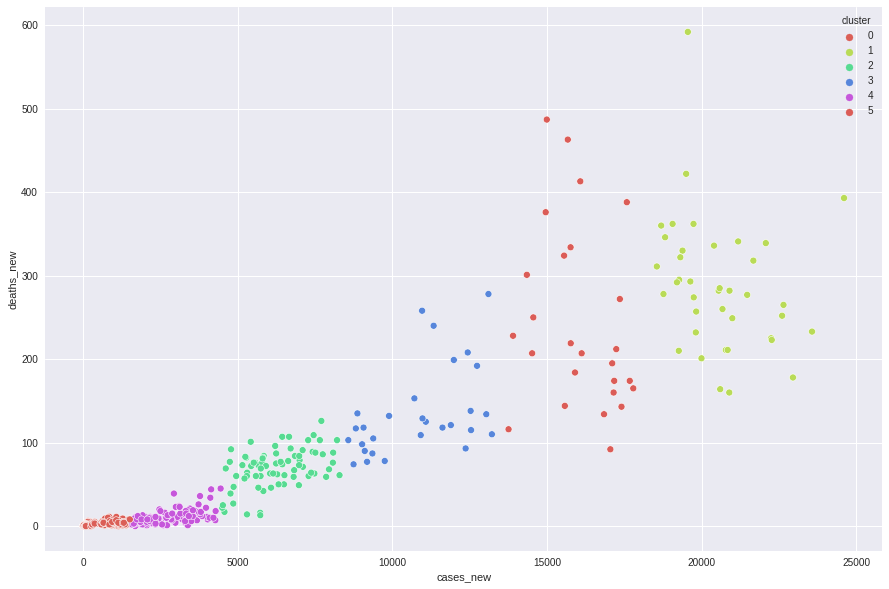

In [281]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='cases_new', y='deaths_new', hue='cluster', data=clustering_new, palette="hls")